In [1]:
import tensorflow as tf
import numpy
import pandas as pd 
from tensorflow.keras import layers 
from tensorflow.keras.utils import to_categorical

from numpy import random

from sklearn import metrics
from sklearn.metrics import confusion_matrix
import matplotlib.pyplot as plt

import cPickle as pickle


data = pd.read_csv('raw.txt', sep='\t')
types = pd.read_csv('types-numeric.txt', sep='\t')
labels = pd.read_csv('types-labels.txt', sep='\t')


In [2]:
random.seed(69)
ii = numpy.random.rand(len(data)) < 0.7 

np_data = data.values
np_types = types.values
np_labels = labels.values

train = np_data[ii]
test = np_data[~ii]

# types = numbers assigned (0-16)
train_types = np_types[ii]
test_types = np_types[~ii]

# labels = string values assigned (then one-hot encoded later)
train_labels = np_labels[ii]
test_labels = np_labels[~ii] 

# ravel 
r_train_types = train_types.ravel()
r_test_types = test_types.ravel()

r_train_labels = train_labels.ravel()
r_test_labels = test_labels.ravel()

# One hot encoding of string labels for keras model 
encoded_train = to_categorical(r_train_types)
encoded_test = to_categorical(r_test_types)


In [3]:
# random forest baseline 
from sklearn.ensemble import RandomForestClassifier

rfmodel = RandomForestClassifier(n_estimators=100)
rf = rfmodel.fit(train, r_train_labels)

rf_pred = rf.predict(test)

# Model Accuracy, how often is the classifier correct
print("Accuracy: ", metrics.accuracy_score(r_test_labels, rf_pred))

rf_cm = confusion_matrix(r_test_labels, rf_pred,)
print(rf_cm)

y_true = pd.Series(r_test_labels)
rf_pred = pd.Series(rf_pred)

pd.crosstab(y_true, rf_pred, rownames=['True'], colnames=['Predicted'], margins=True)

('Accuracy: ', 0.9537037037037037)
[[128   4   0   0   0   0   0   0   0   0   0   0   0   0   0   0   0]
 [  1 372   0   0   0   0   0   0   0   0   0   0   0   0   0   0   0]
 [  0   2  10   0   0   0   0   0   0   0   0   0   0   0   0   0   0]
 [  0   2   0 152   0   0   0   0   0   0   0   0   0   0   0   0   0]
 [ 24   3   0   5  33   0   0   0   0   0   0   0   0   0   1   0   0]
 [  1   1   0   0   0 154   0   0   0   0   0   0   0   0   0   0   1]
 [  0   0   0   0   0   0  28   1   0   0   0   0   0   0   0   0   1]
 [  1   1   0   0   0   0   1 175   0   0   0   0   0   0   0   0   0]
 [  0   0   0   0   1   0   0   0 118   0   0   0   0   1   0   0   0]
 [  1   7   0   0   0   1   0   0   0 157   1   0   0   0   1   0   5]
 [  0   0   0   0   0   0   0   0   0   0 140   0   0   0   0   0   4]
 [  0   0   0   0   0   1   0   1   0   2   0  39   0   0   6   1   0]
 [  0   2   0   0   0   0   0   0   0   0   0   0 168   0   0   0   0]
 [  0   0   0   0   0   0   0   0   0   0 

Predicted  blca  brca  chol  coad  esca  hnsc  kich  kirc  lich  luad   ov  \
True                                                                         
blca        128     4     0     0     0     0     0     0     0     0    0   
brca          1   372     0     0     0     0     0     0     0     0    0   
chol          0     2    10     0     0     0     0     0     0     0    0   
coad          0     2     0   152     0     0     0     0     0     0    0   
esca         24     3     0     5    33     0     0     0     0     0    0   
hnsc          1     1     0     0     0   154     0     0     0     0    0   
kich          0     0     0     0     0     0    28     1     0     0    0   
kirc          1     1     0     0     0     0     1   175     0     0    0   
lich          0     0     0     0     1     0     0     0   118     0    0   
luad          1     7     0     0     0     1     0     0     0   157    1   
ov            0     0     0     0     0     0     0     0     0     0  140   
paad          0     0     0     0     0     1     0     1     0     2    0   
prad          0     2     0     0     0     0     0     0     0     0    0   
skcm          0     0     0     0     0     0     0     0     0     0    0   
stad          1     0     0     8     0     1     0     0     0     3    0   
thca          0     1     0     0     0     0     0     0     0     1    0   
ucec          0     7     0     0     0     0     0     0     0     1    0   
All         157   402    10   165    34   157    29   177   118   164  141   

Predicted  paad  prad  skcm  stad  thca  ucec   All  
True                                                 
blca          0     0     0     0     0     0   132  
brca          0     0     0     0     0     0   373  
chol          0     0     0     0     0     0    12  
coad          0     0     0     0     0     0   154  
esca          0     0     0     1     0     0    66  
hnsc          0     0     0     0     0     1   157  
kich          0     0     0     0     0     1    30  
kirc          0     0     0     0     0     0   178  
lich          0     0     1     0     0     0   120  
luad          0     0     0     1     0     5   173  
ov            0     0     0     0     0     4   144  
paad         39     0     0     6     1     0    50  
prad          0   168     0     0     0     0   170  
skcm          0     0   123     0     0     0   123  
stad          1     1     0   131     0     0   146  
thca          0     0     0     0   167     0   169  
ucec          0     0     0     0     0   171   179  
All          40   169   124   139   168   182  2376

In [4]:
from sklearn.metrics import classification_report

print(classification_report(y_true, rf_pred))


              precision    recall  f1-score   support

        blca       0.82      0.97      0.89       132
        brca       0.93      1.00      0.96       373
        chol       1.00      0.83      0.91        12
        coad       0.92      0.99      0.95       154
        esca       0.97      0.50      0.66        66
        hnsc       0.98      0.98      0.98       157
        kich       0.97      0.93      0.95        30
        kirc       0.99      0.98      0.99       178
        lich       1.00      0.98      0.99       120
        luad       0.96      0.91      0.93       173
          ov       0.99      0.97      0.98       144
        paad       0.97      0.78      0.87        50
        prad       0.99      0.99      0.99       170
        skcm       0.99      1.00      1.00       123
        stad       0.94      0.90      0.92       146
        thca       0.99      0.99      0.99       169
        ucec       0.94      0.96      0.95       179

   micro avg       0.95   

In [11]:
train.shape

(5574, 2403)

In [16]:
# KNN 
from sklearn.neighbors import KNeighborsClassifier

# n_neighbors rule of thumb... num_features^(1/2)
knnmodel = KNeighborsClassifier(n_neighbors=10)
knn = knnmodel.fit(train, r_train_labels) 

knn_pred = knn.predict(test)

## 3 n_neighbors got accuracy of 83% 
## 49 neighbors got accuracy of 75% 
## 25 neighbors got 79% 
## 10 neighbors got 81% 

In [17]:
# Model Accuracy, how often is the classifier correct
print("Accuracy: ", metrics.accuracy_score(r_test_labels, knn_pred))

knn_cm = confusion_matrix(r_test_labels, knn_pred,)
print(knn_cm)

('Accuracy: ', 0.8186026936026936)
[[106  16   1   4   5   0   0   0   0   0   0   0   0   0   0   0   0]
 [ 12 358   1   0   0   0   0   0   0   0   0   0   0   0   0   0   2]
 [  3   1   8   0   0   0   0   0   0   0   0   0   0   0   0   0   0]
 [  3   6   0 144   1   0   0   0   0   0   0   0   0   0   0   0   0]
 [ 33   2   0  12  19   0   0   0   0   0   0   0   0   0   0   0   0]
 [  5   0   0   1   1 131   0   1   1   6   0   1   2   0   7   1   0]
 [  0   0   0   0   0   0  27   3   0   0   0   0   0   0   0   0   0]
 [  1   9   0   0   0   1   1 164   0   0   0   0   1   0   0   0   1]
 [  1   1   0   1   0   4   0   0  88  10   0   1   3   1   7   2   1]
 [  4   8   0   1   1   2   0   2   0 124   1   4   4   1  10   7   4]
 [  0   1   0   0   0   0   0   2   0   2 139   0   0   0   0   0   0]
 [  0   1   0   0   0   1   0   0   0  15   0  26   5   0   2   0   0]
 [  0   2   0   1   0   0   0   1   0   2   0   0 160   0   3   0   1]
 [  3   8   0   0   0   6   0   3   3   5 

In [ ]:
## SVM 

In [18]:
from sklearn import svm

svmmodel = svm.SVC(gamma='scale', decision_function_shape='ovo')
svm = svmmodel.fit(train, r_train_labels)

svm_pred = svm.predict(test)

# Model Accuracy, how often is the classifier correct
print("Accuracy: ", metrics.accuracy_score(r_test_labels, svm_pred))

svm_cm = confusion_matrix(r_test_labels, svm_pred,)
print(svm_cm)


('Accuracy: ', 0.15698653198653198)
[[  0 132   0   0   0   0   0   0   0   0   0   0   0   0   0   0   0]
 [  0 373   0   0   0   0   0   0   0   0   0   0   0   0   0   0   0]
 [  0  12   0   0   0   0   0   0   0   0   0   0   0   0   0   0   0]
 [  0 154   0   0   0   0   0   0   0   0   0   0   0   0   0   0   0]
 [  0  66   0   0   0   0   0   0   0   0   0   0   0   0   0   0   0]
 [  0 157   0   0   0   0   0   0   0   0   0   0   0   0   0   0   0]
 [  0  30   0   0   0   0   0   0   0   0   0   0   0   0   0   0   0]
 [  0 178   0   0   0   0   0   0   0   0   0   0   0   0   0   0   0]
 [  0 120   0   0   0   0   0   0   0   0   0   0   0   0   0   0   0]
 [  0 173   0   0   0   0   0   0   0   0   0   0   0   0   0   0   0]
 [  0 144   0   0   0   0   0   0   0   0   0   0   0   0   0   0   0]
 [  0  50   0   0   0   0   0   0   0   0   0   0   0   0   0   0   0]
 [  0 170   0   0   0   0   0   0   0   0   0   0   0   0   0   0   0]
 [  0 123   0   0   0   0   0   0   0   0

In [19]:
importances = rfmodel.feature_importances_
indices = numpy.argsort(importances)[::-1]

In [45]:
# Top 10 most important features, ranked by random forest 

#for f in range(train.shape[1]):
for f in range(0,10):
    print("%d. feature %s (%f)" % (f + 1 , data.columns[indices[f]], importances[indices[f]]))


1. feature hsa_miR_205_5p (0.011021)
2. feature hsa_miR_135a_5p (0.010891)
3. feature hsa_miR_194_5p (0.010295)
4. feature hsa_miR_192_5p (0.010200)
5. feature hsa_miR_375 (0.009484)
6. feature hsa_miR_205_3p (0.009425)
7. feature hsa_miR_944 (0.008933)
8. feature hsa_miR_200c_5p (0.008926)
9. feature hsa_miR_122_5p (0.008564)
10. feature hsa_miR_194_3p (0.008348)


In [42]:
print(data.iloc[:,356])
print(data.columns[356])


7bbdea1b.c0e1.4d89.a680.8308b91a71e2         4.000000
996880c0.7892.4765.8ed3.f42ef60d248e      6016.548729
1d026d7a.c963.4c32.b821.b0d15fb2d2df        22.000000
a60fd4de.1ed4.475b.89a4.b9b54addf30c       293.000000
f282702a.0681.40e2.8bd3.c3c9aa5daecb         0.000000
387af269.0ac3.44b1.b7cf.67d19ca664e0       137.000000
71e9e746.b78f.4c07.8afb.acc3da378d88       736.000000
21847061.2f16.42b2.b636.0b7e4b6cbe2a         0.000000
450198c1.92fc.4460.9430.eb9ab8458b50         1.000000
3a52c147.c498.477f.8c2a.35b4240b3364         1.000000
d1d4a7a2.ae22.425a.9893.806dcd0afec9      1984.753072
ad2ba637.bb29.4f9a.b391.327723defd73      4116.000000
1bc1926c.1269.4189.8e3b.c371a7797911         0.000000
be18c3df.4d80.4e08.9243.39c455348b69       544.000000
fffa6e8d.615e.483c.99a0.4705ccde8dc6         4.000000
5cf0ff95.60be.4894.8eef.5f0ec17da1e8        26.000000
2d9e4aca.631e.4921.992b.039b902493eb       340.000000
062184e2.d589.42de.966b.d88ad1773828     21815.000000
c5580440.b191.46c0.baae.cf00

In [8]:
#### CAREFUL
#### You are about to load in new variables from the cluster 
#### To use for further visualization 
filename='400epoch50learn'
with open(filename, 'rb') as fp:
    learnloss = pickle.load(fp)
    histories = pickle.load(fp)

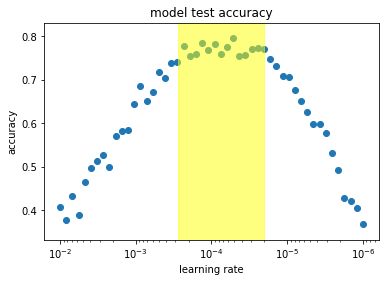

In [79]:
## First plot accuracy vs learning rate to decide on a good range 

def visualizeLearnLossRange(learnloss): 
    plt.title('model test accuracy')
    plt.xscale('log')
    plt.ylabel('accuracy')
    plt.xlabel('learning rate')
    plt.scatter(list(learnloss.keys()),list(learnloss.values()))
    plt.gca().invert_xaxis()
    plt.axvspan(2.8e-04, 2e-05, color='yellow', alpha=0.5)
    plt.savefig("accuracy_learningrate_range.pdf")
    plt.show()

visualizeLearnLossRange(learnloss)


In [10]:
## Look at rates and decide lower/upper bound 
max_acc = max(learnloss.values())  # maximum value
max_lr = [k for k, v in learnloss.items() if v == max_acc] # getting all keys containing the `maximum`
print("Max test accuracy: ")
print(max_acc, max_lr)

# print(ll)
# print("Mean Accuracy: " + str(numpy.mean(histories[ll]['acc'])))
# print("Max Accuracy: " + str(max(histories[ll]['acc'])))
orderedkeys = []
for ll in learnloss:
    orderedkeys.append(ll)
orderedkeys = sorted(orderedkeys)

# get numbers for plotting
# good rates are above 0.77 when training 
counter = 0
goodrates = []
for ll in orderedkeys: 
#    if ll < 3e-04 and ll > 2.5e-05: 
    if learnloss[ll] > 0.77: 
        counter+=1
        goodrates.append(ll)
        print("Rate: " + str(ll) + "\tAccuracy: "+ str(learnloss[ll]))
print(counter)


filename='goodrates'
with open(filename, 'wb') as fp:
    pickle.dump(goodrates, fp)


Max test accuracy: 
(0.7946127946127947, [5.1794746792312125e-05])
Rate: 2.4420530945486548e-05	Accuracy: 0.7727272727272727
Rate: 5.1794746792312125e-05	Accuracy: 0.7946127946127947
Rate: 6.250551925273976e-05	Accuracy: 0.773989898989899
Rate: 9.102981779915228e-05	Accuracy: 0.7815656565656566
Rate: 0.00013257113655901095	Accuracy: 0.7849326599326599
Rate: 0.00023299518105153718	Accuracy: 0.7781986531986532
6


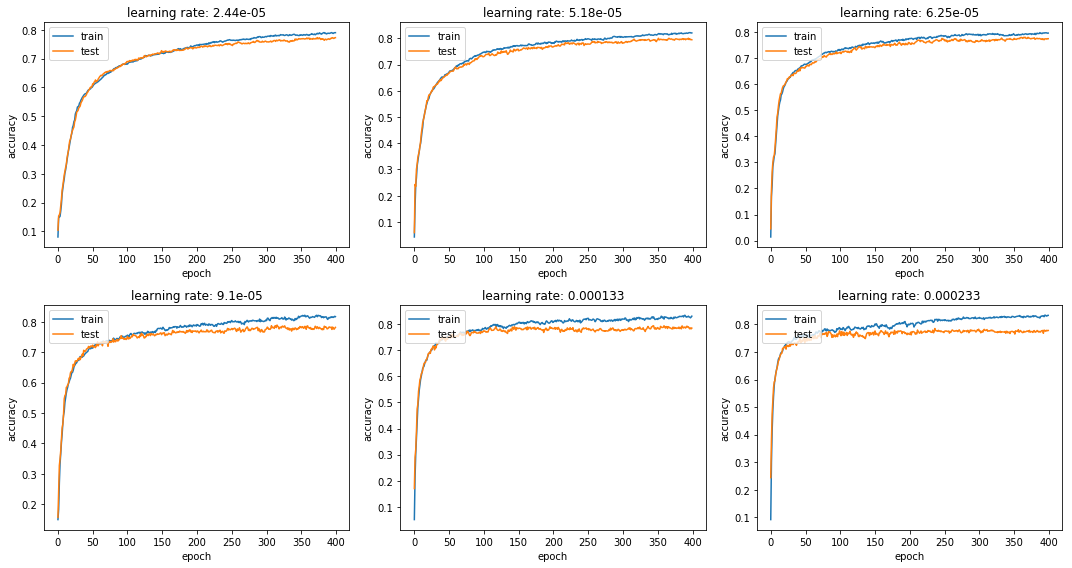

In [98]:
def visualizeEpochs(learnloss, histories):
    fig = plt.figure(figsize=(10,3))
    counter = 0
    nrRows = 2
    nrCols = 3
    for lr in goodrates: 
        # generate subplots 
        ax = fig.add_subplot(nrRows, nrCols, counter+1)
        ax.plot(histories[lr]['acc'])
        ax.plot(histories[lr]['val_acc'])
        plt.title('learning rate: ' + '{:.3g}'.format(lr))
        ax.set_ylabel('accuracy')
        ax.set_xlabel('epoch')
        ax.legend(['train', 'test'], loc='upper left')
        counter +=1
    fig.set_figheight(8)
    fig.set_figwidth(15)
    plt.tight_layout()
    plt.savefig("accuracy_epochs.pdf")
    plt.show()
            

visualizeEpochs(learnloss, histories)

In [102]:
# Learning rate: 0.01 to 0.000001
# encoded labels are one-hot encoded 
# Test labels are treated with ravel
learnloss = {} 
histories = {}
def learnLoss(learningRate, epochs, train, encoded_train, test, encoded_test, test_labels):
    model = tf.keras.Sequential()
    model.add(layers.Dense(128, activation='sigmoid'))
    model.add(layers.Dense(128, activation='sigmoid'))
    model.add(layers.Dense(17, activation='softmax'))
    model.compile(optimizer=tf.train.RMSPropOptimizer(learningRate),
              loss='categorical_crossentropy',
              metrics=['accuracy'])
    
    model.fit(train, encoded_train, validation_data=(test, encoded_test), epochs=epochs, batch_size=32)
    
    
    # test 
    pred_y = model.predict_classes(test)
    nnyhat = confusion_matrix(test_types, pred_y)
    accuracy = metrics.accuracy_score(test_labels, pred_y)
    print("Accuracy: ", accuracy)
    learnloss[learningRate] = accuracy 
    histories[learningRate] = model.history.history

In [120]:
learningRates =  numpy.geomspace(0.01, 0.000001, num=50)
print(learningRates)
for lr in learningRates:
    learnLoss(lr, 500, train, encoded_train, test, encoded_test, r_test_types)


[1.00000000e-02 7.90604321e-03 6.25055193e-03 4.94171336e-03
 3.90693994e-03 3.08884360e-03 2.44205309e-03 1.93069773e-03
 1.52641797e-03 1.20679264e-03 9.54095476e-04 7.54312006e-04
 5.96362332e-04 4.71486636e-04 3.72759372e-04 2.94705170e-04
 2.32995181e-04 1.84206997e-04 1.45634848e-04 1.15139540e-04
 9.10298178e-05 7.19685673e-05 5.68986603e-05 4.49843267e-05
 3.55648031e-05 2.81176870e-05 2.22299648e-05 1.75751062e-05
 1.38949549e-05 1.09854114e-05 8.68511374e-06 6.86648845e-06
 5.42867544e-06 4.29193426e-06 3.39322177e-06 2.68269580e-06
 2.12095089e-06 1.67683294e-06 1.32571137e-06 1.04811313e-06
 8.28642773e-07 6.55128557e-07 5.17947468e-07 4.09491506e-07
 3.23745754e-07 2.55954792e-07 2.02358965e-07 1.59985872e-07
 1.26485522e-07 1.00000000e-07]
Train on 5574 samples, validate on 2376 samples
Epoch 1/500
5574/5574 [==============================] - 4s 712us/step - loss: 2.4258 - acc: 0.2359 - val_loss: 2.5949 - val_acc: 0.2605
Epoch 2/500
5574/5574 [============================

5574/5574 [==============================] - 1s 217us/step - loss: 1.8436 - acc: 0.4186 - val_loss: 2.1970 - val_acc: 0.3914
Epoch 114/500
5574/5574 [==============================] - 1s 220us/step - loss: 1.8510 - acc: 0.4236 - val_loss: 2.1551 - val_acc: 0.3880
Epoch 115/500
5574/5574 [==============================] - 1s 216us/step - loss: 1.8595 - acc: 0.4198 - val_loss: 2.1788 - val_acc: 0.3902
Epoch 116/500
5574/5574 [==============================] - 1s 217us/step - loss: 1.8408 - acc: 0.4220 - val_loss: 2.1953 - val_acc: 0.3805
Epoch 117/500
5574/5574 [==============================] - 1s 214us/step - loss: 1.8452 - acc: 0.4245 - val_loss: 2.2255 - val_acc: 0.3708
Epoch 118/500
5574/5574 [==============================] - 1s 215us/step - loss: 1.8403 - acc: 0.4227 - val_loss: 2.1586 - val_acc: 0.3897
Epoch 119/500
5574/5574 [==============================] - 1s 216us/step - loss: 1.8485 - acc: 0.4225 - val_loss: 2.1152 - val_acc: 0.3830
Epoch 120/500
5574/5574 [================

5574/5574 [==============================] - 1s 214us/step - loss: 1.8531 - acc: 0.4264 - val_loss: 2.1571 - val_acc: 0.3893
Epoch 173/500
5574/5574 [==============================] - 1s 215us/step - loss: 1.8446 - acc: 0.4279 - val_loss: 2.2310 - val_acc: 0.3864
Epoch 174/500
5574/5574 [==============================] - 1s 211us/step - loss: 1.8511 - acc: 0.4230 - val_loss: 2.3952 - val_acc: 0.3005
Epoch 175/500
5574/5574 [==============================] - 1s 214us/step - loss: 1.8498 - acc: 0.4281 - val_loss: 2.2876 - val_acc: 0.3893
Epoch 176/500
5574/5574 [==============================] - 1s 213us/step - loss: 1.8550 - acc: 0.4272 - val_loss: 2.4878 - val_acc: 0.3013
Epoch 177/500
5574/5574 [==============================] - 1s 213us/step - loss: 1.8499 - acc: 0.4243 - val_loss: 2.2641 - val_acc: 0.3872
Epoch 178/500
5574/5574 [==============================] - 1s 213us/step - loss: 1.8483 - acc: 0.4250 - val_loss: 2.2657 - val_acc: 0.3859
Epoch 179/500
5574/5574 [================

5574/5574 [==============================] - 1s 268us/step - loss: 1.8734 - acc: 0.4255 - val_loss: 2.3001 - val_acc: 0.3885
Epoch 232/500
5574/5574 [==============================] - 2s 315us/step - loss: 1.8647 - acc: 0.4297 - val_loss: 2.3856 - val_acc: 0.3687
Epoch 233/500
5574/5574 [==============================] - 2s 325us/step - loss: 1.8574 - acc: 0.4234 - val_loss: 2.5634 - val_acc: 0.3056
Epoch 234/500
5574/5574 [==============================] - 1s 210us/step - loss: 1.8695 - acc: 0.4225 - val_loss: 2.6899 - val_acc: 0.3405
Epoch 235/500
5574/5574 [==============================] - 1s 209us/step - loss: 1.8673 - acc: 0.4272 - val_loss: 2.2719 - val_acc: 0.3868
Epoch 236/500
5574/5574 [==============================] - 1s 230us/step - loss: 1.8724 - acc: 0.4259 - val_loss: 2.4405 - val_acc: 0.3708
Epoch 237/500
5574/5574 [==============================] - 1s 208us/step - loss: 1.8517 - acc: 0.4275 - val_loss: 2.4170 - val_acc: 0.3729
Epoch 238/500
5574/5574 [================

5574/5574 [==============================] - 1s 252us/step - loss: 1.8611 - acc: 0.4273 - val_loss: 2.5334 - val_acc: 0.3805
Epoch 291/500
5574/5574 [==============================] - 1s 219us/step - loss: 1.8699 - acc: 0.4234 - val_loss: 2.3742 - val_acc: 0.3742
Epoch 292/500
5574/5574 [==============================] - 2s 298us/step - loss: 1.8542 - acc: 0.4277 - val_loss: 2.4265 - val_acc: 0.3590
Epoch 293/500
5574/5574 [==============================] - 2s 304us/step - loss: 1.8651 - acc: 0.4266 - val_loss: 2.3517 - val_acc: 0.3830
Epoch 294/500
5574/5574 [==============================] - 2s 286us/step - loss: 1.8502 - acc: 0.4273 - val_loss: 2.4347 - val_acc: 0.3830
Epoch 295/500
5574/5574 [==============================] - 2s 284us/step - loss: 1.8649 - acc: 0.4252 - val_loss: 2.3924 - val_acc: 0.3708
Epoch 296/500
5574/5574 [==============================] - 1s 209us/step - loss: 1.8450 - acc: 0.4306 - val_loss: 2.4459 - val_acc: 0.3792
Epoch 297/500
5574/5574 [================

5574/5574 [==============================] - 2s 278us/step - loss: 1.8805 - acc: 0.4270 - val_loss: 2.4891 - val_acc: 0.3733
Epoch 350/500
5574/5574 [==============================] - 2s 280us/step - loss: 1.8711 - acc: 0.4252 - val_loss: 2.5049 - val_acc: 0.3822
Epoch 351/500
5574/5574 [==============================] - 1s 225us/step - loss: 1.8680 - acc: 0.4252 - val_loss: 2.3884 - val_acc: 0.3775
Epoch 352/500
5574/5574 [==============================] - 1s 243us/step - loss: 1.8759 - acc: 0.4255 - val_loss: 2.5363 - val_acc: 0.3695
Epoch 353/500
5574/5574 [==============================] - 1s 233us/step - loss: 1.8573 - acc: 0.4277 - val_loss: 2.4854 - val_acc: 0.3750
Epoch 354/500
5574/5574 [==============================] - 1s 238us/step - loss: 1.8644 - acc: 0.4284 - val_loss: 2.4749 - val_acc: 0.3620
Epoch 355/500
5574/5574 [==============================] - 1s 225us/step - loss: 1.8579 - acc: 0.4282 - val_loss: 2.5314 - val_acc: 0.3396
Epoch 356/500
5574/5574 [================

5574/5574 [==============================] - 1s 256us/step - loss: 1.8921 - acc: 0.4175 - val_loss: 2.5344 - val_acc: 0.3657
Epoch 409/500
5574/5574 [==============================] - 2s 306us/step - loss: 1.9090 - acc: 0.4205 - val_loss: 2.3656 - val_acc: 0.3729
Epoch 410/500
5574/5574 [==============================] - 2s 285us/step - loss: 1.9051 - acc: 0.4159 - val_loss: 2.4341 - val_acc: 0.3771
Epoch 411/500
5574/5574 [==============================] - 1s 222us/step - loss: 1.8934 - acc: 0.4186 - val_loss: 2.4667 - val_acc: 0.3704
Epoch 412/500
5574/5574 [==============================] - 1s 207us/step - loss: 1.9024 - acc: 0.4184 - val_loss: 2.4234 - val_acc: 0.3687
Epoch 413/500
5574/5574 [==============================] - 1s 202us/step - loss: 1.8978 - acc: 0.4164 - val_loss: 2.4713 - val_acc: 0.3695
Epoch 414/500
5574/5574 [==============================] - 1s 202us/step - loss: 1.9047 - acc: 0.4160 - val_loss: 2.4495 - val_acc: 0.3754
Epoch 415/500
5574/5574 [================

5574/5574 [==============================] - 1s 205us/step - loss: 1.9273 - acc: 0.4194 - val_loss: 2.4791 - val_acc: 0.3695
Epoch 468/500
5574/5574 [==============================] - 1s 205us/step - loss: 1.9035 - acc: 0.4212 - val_loss: 2.4498 - val_acc: 0.3704
Epoch 469/500
5574/5574 [==============================] - 1s 205us/step - loss: 1.9216 - acc: 0.4216 - val_loss: 2.5633 - val_acc: 0.3729
Epoch 470/500
5574/5574 [==============================] - 1s 206us/step - loss: 1.9049 - acc: 0.4182 - val_loss: 2.4837 - val_acc: 0.3733
Epoch 471/500
5574/5574 [==============================] - 1s 207us/step - loss: 1.9014 - acc: 0.4187 - val_loss: 2.4658 - val_acc: 0.3750
Epoch 472/500
5574/5574 [==============================] - 1s 206us/step - loss: 1.9166 - acc: 0.4209 - val_loss: 2.5107 - val_acc: 0.3657
Epoch 473/500
5574/5574 [==============================] - 1s 205us/step - loss: 1.8992 - acc: 0.4189 - val_loss: 2.4713 - val_acc: 0.3670
Epoch 474/500
5574/5574 [================

5574/5574 [==============================] - 1s 214us/step - loss: 1.7912 - acc: 0.4304 - val_loss: 2.0551 - val_acc: 0.3994
Epoch 85/500
5574/5574 [==============================] - 1s 205us/step - loss: 1.7942 - acc: 0.4300 - val_loss: 2.0369 - val_acc: 0.3973
Epoch 86/500
5574/5574 [==============================] - 1s 205us/step - loss: 1.7908 - acc: 0.4316 - val_loss: 2.0756 - val_acc: 0.3939
Epoch 87/500
5574/5574 [==============================] - 1s 205us/step - loss: 1.7864 - acc: 0.4361 - val_loss: 2.0789 - val_acc: 0.3889
Epoch 88/500
5574/5574 [==============================] - 1s 206us/step - loss: 1.7909 - acc: 0.4293 - val_loss: 2.0937 - val_acc: 0.3969
Epoch 89/500
5574/5574 [==============================] - 1s 208us/step - loss: 1.7974 - acc: 0.4282 - val_loss: 2.0782 - val_acc: 0.3981
Epoch 90/500
5574/5574 [==============================] - 1s 206us/step - loss: 1.7887 - acc: 0.4313 - val_loss: 2.1930 - val_acc: 0.3792
Epoch 91/500
5574/5574 [=======================

5574/5574 [==============================] - 1s 206us/step - loss: 1.7850 - acc: 0.4352 - val_loss: 2.2494 - val_acc: 0.3990
Epoch 203/500
5574/5574 [==============================] - 1s 205us/step - loss: 1.7918 - acc: 0.4354 - val_loss: 2.2604 - val_acc: 0.3851
Epoch 204/500
5574/5574 [==============================] - 1s 206us/step - loss: 1.7955 - acc: 0.4318 - val_loss: 2.2278 - val_acc: 0.3830
Epoch 205/500
5574/5574 [==============================] - 1s 205us/step - loss: 1.7778 - acc: 0.4333 - val_loss: 2.2425 - val_acc: 0.3981
Epoch 206/500
5574/5574 [==============================] - 1s 207us/step - loss: 1.7852 - acc: 0.4352 - val_loss: 2.2652 - val_acc: 0.3876
Epoch 207/500
5574/5574 [==============================] - 1s 205us/step - loss: 1.7838 - acc: 0.4349 - val_loss: 2.2212 - val_acc: 0.3935
Epoch 208/500
5574/5574 [==============================] - 1s 205us/step - loss: 1.7911 - acc: 0.4347 - val_loss: 2.2065 - val_acc: 0.3948
Epoch 209/500
5574/5574 [================

5574/5574 [==============================] - 1s 203us/step - loss: 1.7903 - acc: 0.4372 - val_loss: 2.2782 - val_acc: 0.3906
Epoch 262/500
5574/5574 [==============================] - 1s 204us/step - loss: 1.7906 - acc: 0.4370 - val_loss: 2.2442 - val_acc: 0.3859
Epoch 263/500
5574/5574 [==============================] - 1s 206us/step - loss: 1.7986 - acc: 0.4363 - val_loss: 2.2049 - val_acc: 0.3935
Epoch 264/500
5574/5574 [==============================] - 1s 205us/step - loss: 1.7858 - acc: 0.4347 - val_loss: 2.2624 - val_acc: 0.3944
Epoch 265/500
5574/5574 [==============================] - 1s 206us/step - loss: 1.7924 - acc: 0.4336 - val_loss: 2.2623 - val_acc: 0.3918
Epoch 266/500
5574/5574 [==============================] - 1s 205us/step - loss: 1.7868 - acc: 0.4374 - val_loss: 2.3776 - val_acc: 0.3737
Epoch 267/500
5574/5574 [==============================] - 1s 206us/step - loss: 1.7898 - acc: 0.4358 - val_loss: 2.2361 - val_acc: 0.3998
Epoch 268/500
5574/5574 [================

5574/5574 [==============================] - 1s 204us/step - loss: 1.7904 - acc: 0.4361 - val_loss: 2.3033 - val_acc: 0.3944
Epoch 321/500
5574/5574 [==============================] - 1s 205us/step - loss: 1.7901 - acc: 0.4354 - val_loss: 2.3256 - val_acc: 0.3864
Epoch 322/500
5574/5574 [==============================] - 1s 204us/step - loss: 1.7938 - acc: 0.4336 - val_loss: 2.2825 - val_acc: 0.3981
Epoch 323/500
5574/5574 [==============================] - 1s 205us/step - loss: 1.7941 - acc: 0.4327 - val_loss: 2.2935 - val_acc: 0.3965
Epoch 324/500
5574/5574 [==============================] - 1s 204us/step - loss: 1.8037 - acc: 0.4360 - val_loss: 2.3423 - val_acc: 0.3855
Epoch 325/500
5574/5574 [==============================] - 1s 204us/step - loss: 1.7944 - acc: 0.4347 - val_loss: 2.2809 - val_acc: 0.3809
Epoch 326/500
5574/5574 [==============================] - 1s 204us/step - loss: 1.7926 - acc: 0.4349 - val_loss: 2.3567 - val_acc: 0.3855
Epoch 327/500
5574/5574 [================

5574/5574 [==============================] - 1s 205us/step - loss: 1.8021 - acc: 0.4363 - val_loss: 2.2922 - val_acc: 0.3914
Epoch 380/500
5574/5574 [==============================] - 1s 207us/step - loss: 1.7959 - acc: 0.4367 - val_loss: 2.3578 - val_acc: 0.3872
Epoch 381/500
5574/5574 [==============================] - 1s 203us/step - loss: 1.7953 - acc: 0.4399 - val_loss: 2.2893 - val_acc: 0.3981
Epoch 382/500
5574/5574 [==============================] - 1s 205us/step - loss: 1.7905 - acc: 0.4404 - val_loss: 2.3317 - val_acc: 0.3939
Epoch 383/500
5574/5574 [==============================] - 1s 204us/step - loss: 1.7925 - acc: 0.4361 - val_loss: 2.2897 - val_acc: 0.3927
Epoch 384/500
5574/5574 [==============================] - 1s 206us/step - loss: 1.8018 - acc: 0.4343 - val_loss: 2.3104 - val_acc: 0.3885
Epoch 385/500
5574/5574 [==============================] - 1s 206us/step - loss: 1.7879 - acc: 0.4376 - val_loss: 2.2865 - val_acc: 0.3981
Epoch 386/500
5574/5574 [================

5574/5574 [==============================] - 1s 205us/step - loss: 1.8055 - acc: 0.4397 - val_loss: 2.4159 - val_acc: 0.3775
Epoch 439/500
5574/5574 [==============================] - 1s 205us/step - loss: 1.8059 - acc: 0.4363 - val_loss: 2.3952 - val_acc: 0.3906
Epoch 440/500
5574/5574 [==============================] - 1s 205us/step - loss: 1.7987 - acc: 0.4395 - val_loss: 2.3566 - val_acc: 0.3923
Epoch 441/500
5574/5574 [==============================] - 1s 206us/step - loss: 1.7880 - acc: 0.4406 - val_loss: 2.3948 - val_acc: 0.3910
Epoch 442/500
5574/5574 [==============================] - 1s 205us/step - loss: 1.7998 - acc: 0.4360 - val_loss: 2.3248 - val_acc: 0.3914
Epoch 443/500
5574/5574 [==============================] - 1s 204us/step - loss: 1.7969 - acc: 0.4356 - val_loss: 2.3508 - val_acc: 0.3902
Epoch 444/500
5574/5574 [==============================] - 1s 204us/step - loss: 1.7921 - acc: 0.4392 - val_loss: 2.3596 - val_acc: 0.3948
Epoch 445/500
5574/5574 [================

5574/5574 [==============================] - 1s 205us/step - loss: 1.8056 - acc: 0.4345 - val_loss: 2.4170 - val_acc: 0.3902
Epoch 498/500
5574/5574 [==============================] - 1s 205us/step - loss: 1.8069 - acc: 0.4374 - val_loss: 2.4639 - val_acc: 0.3771
Epoch 499/500
5574/5574 [==============================] - 1s 204us/step - loss: 1.7997 - acc: 0.4367 - val_loss: 2.3834 - val_acc: 0.3944
Epoch 500/500
5574/5574 [==============================] - 1s 206us/step - loss: 1.7960 - acc: 0.4399 - val_loss: 2.4626 - val_acc: 0.3859
('Accuracy: ', 0.3859427609427609)
Train on 5574 samples, validate on 2376 samples
Epoch 1/500
5574/5574 [==============================] - 3s 607us/step - loss: 2.4310 - acc: 0.2435 - val_loss: 2.3249 - val_acc: 0.3270
Epoch 2/500
5574/5574 [==============================] - 1s 206us/step - loss: 1.8306 - acc: 0.4263 - val_loss: 2.3627 - val_acc: 0.2887
Epoch 3/500
5574/5574 [==============================] - 1s 206us/step - loss: 1.8981 - acc: 0.4011 -

Epoch 56/500
5574/5574 [==============================] - 1s 206us/step - loss: 1.6689 - acc: 0.4706 - val_loss: 2.2047 - val_acc: 0.4116
Epoch 57/500
5574/5574 [==============================] - 1s 207us/step - loss: 1.6673 - acc: 0.4668 - val_loss: 1.9546 - val_acc: 0.4272
Epoch 58/500
5574/5574 [==============================] - 1s 206us/step - loss: 1.6633 - acc: 0.4675 - val_loss: 1.9437 - val_acc: 0.4356
Epoch 59/500
5574/5574 [==============================] - 1s 205us/step - loss: 1.6643 - acc: 0.4690 - val_loss: 1.8952 - val_acc: 0.4407
Epoch 60/500
5574/5574 [==============================] - 1s 206us/step - loss: 1.6666 - acc: 0.4715 - val_loss: 1.8404 - val_acc: 0.4373
Epoch 61/500
5574/5574 [==============================] - 1s 208us/step - loss: 1.6603 - acc: 0.4682 - val_loss: 1.9270 - val_acc: 0.4348
Epoch 62/500
5574/5574 [==============================] - 1s 207us/step - loss: 1.6588 - acc: 0.4691 - val_loss: 1.9797 - val_acc: 0.4263
Epoch 63/500
5574/5574 [==========

5574/5574 [==============================] - 1s 209us/step - loss: 1.6349 - acc: 0.4813 - val_loss: 2.1064 - val_acc: 0.4297
Epoch 175/500
5574/5574 [==============================] - 2s 272us/step - loss: 1.6203 - acc: 0.4856 - val_loss: 2.0786 - val_acc: 0.4268
Epoch 176/500
5574/5574 [==============================] - 2s 272us/step - loss: 1.6188 - acc: 0.4835 - val_loss: 2.0780 - val_acc: 0.4398
Epoch 177/500
5574/5574 [==============================] - 2s 309us/step - loss: 1.6268 - acc: 0.4828 - val_loss: 2.1026 - val_acc: 0.4386
Epoch 178/500
5574/5574 [==============================] - 2s 299us/step - loss: 1.6235 - acc: 0.4856 - val_loss: 2.0486 - val_acc: 0.4411
Epoch 179/500
5574/5574 [==============================] - 1s 244us/step - loss: 1.6158 - acc: 0.4848 - val_loss: 2.2187 - val_acc: 0.4091
Epoch 180/500
5574/5574 [==============================] - 1s 242us/step - loss: 1.6178 - acc: 0.4839 - val_loss: 2.0805 - val_acc: 0.4263
Epoch 181/500
5574/5574 [================

5574/5574 [==============================] - 1s 222us/step - loss: 1.6238 - acc: 0.4855 - val_loss: 2.1532 - val_acc: 0.4339
Epoch 234/500
5574/5574 [==============================] - 1s 220us/step - loss: 1.6206 - acc: 0.4848 - val_loss: 2.1775 - val_acc: 0.4301
Epoch 235/500
5574/5574 [==============================] - 1s 221us/step - loss: 1.6284 - acc: 0.4833 - val_loss: 2.1130 - val_acc: 0.4343
Epoch 236/500
5574/5574 [==============================] - 1s 220us/step - loss: 1.6262 - acc: 0.4844 - val_loss: 2.1505 - val_acc: 0.4306
Epoch 237/500
5574/5574 [==============================] - 1s 221us/step - loss: 1.6207 - acc: 0.4878 - val_loss: 2.2201 - val_acc: 0.4179
Epoch 238/500
5574/5574 [==============================] - 1s 218us/step - loss: 1.6205 - acc: 0.4828 - val_loss: 2.2539 - val_acc: 0.4310
Epoch 239/500
5574/5574 [==============================] - 1s 221us/step - loss: 1.6278 - acc: 0.4810 - val_loss: 2.1892 - val_acc: 0.4348
Epoch 240/500
5574/5574 [================

5574/5574 [==============================] - 1s 222us/step - loss: 1.6256 - acc: 0.4876 - val_loss: 2.2219 - val_acc: 0.4390
Epoch 293/500
5574/5574 [==============================] - 1s 221us/step - loss: 1.6324 - acc: 0.4865 - val_loss: 2.2423 - val_acc: 0.4306
Epoch 294/500
5574/5574 [==============================] - 1s 244us/step - loss: 1.6274 - acc: 0.4869 - val_loss: 2.2278 - val_acc: 0.4360
Epoch 295/500
5574/5574 [==============================] - 2s 298us/step - loss: 1.6334 - acc: 0.4867 - val_loss: 2.2053 - val_acc: 0.4390
Epoch 296/500
5574/5574 [==============================] - 2s 377us/step - loss: 1.6248 - acc: 0.4880 - val_loss: 2.3422 - val_acc: 0.4230
Epoch 297/500
5574/5574 [==============================] - 2s 271us/step - loss: 1.6387 - acc: 0.4869 - val_loss: 2.2503 - val_acc: 0.4259
Epoch 298/500
5574/5574 [==============================] - 2s 360us/step - loss: 1.6179 - acc: 0.4907 - val_loss: 2.2511 - val_acc: 0.4360
Epoch 299/500
5574/5574 [================

5574/5574 [==============================] - 1s 232us/step - loss: 1.6463 - acc: 0.4813 - val_loss: 2.2922 - val_acc: 0.4373
Epoch 352/500
5574/5574 [==============================] - 1s 262us/step - loss: 1.6343 - acc: 0.4848 - val_loss: 2.5030 - val_acc: 0.4099
Epoch 353/500
5574/5574 [==============================] - 1s 234us/step - loss: 1.6356 - acc: 0.4878 - val_loss: 2.3253 - val_acc: 0.4322
Epoch 354/500
5574/5574 [==============================] - 1s 233us/step - loss: 1.6326 - acc: 0.4844 - val_loss: 2.2924 - val_acc: 0.4348
Epoch 355/500
5574/5574 [==============================] - 1s 250us/step - loss: 1.6429 - acc: 0.4828 - val_loss: 2.3224 - val_acc: 0.4234
Epoch 356/500
5574/5574 [==============================] - 1s 241us/step - loss: 1.6409 - acc: 0.4860 - val_loss: 2.3056 - val_acc: 0.4331
Epoch 357/500
5574/5574 [==============================] - 1s 237us/step - loss: 1.6425 - acc: 0.4878 - val_loss: 2.2739 - val_acc: 0.4386
Epoch 358/500
5574/5574 [================

5574/5574 [==============================] - 1s 258us/step - loss: 1.6224 - acc: 0.4853 - val_loss: 2.3582 - val_acc: 0.4327
Epoch 411/500
5574/5574 [==============================] - 1s 261us/step - loss: 1.6453 - acc: 0.4867 - val_loss: 2.3640 - val_acc: 0.4263
Epoch 412/500
5574/5574 [==============================] - 1s 234us/step - loss: 1.6390 - acc: 0.4844 - val_loss: 2.3863 - val_acc: 0.4251
Epoch 413/500
5574/5574 [==============================] - 1s 244us/step - loss: 1.6472 - acc: 0.4799 - val_loss: 2.3379 - val_acc: 0.4360
Epoch 414/500
5574/5574 [==============================] - 1s 234us/step - loss: 1.6388 - acc: 0.4797 - val_loss: 2.3110 - val_acc: 0.4289
Epoch 415/500
5574/5574 [==============================] - 1s 232us/step - loss: 1.6336 - acc: 0.4842 - val_loss: 2.3241 - val_acc: 0.4318
Epoch 416/500
5574/5574 [==============================] - 1s 228us/step - loss: 1.6403 - acc: 0.4869 - val_loss: 2.3439 - val_acc: 0.4188
Epoch 417/500
5574/5574 [================

5574/5574 [==============================] - 1s 259us/step - loss: 1.6381 - acc: 0.4860 - val_loss: 2.3218 - val_acc: 0.4276
Epoch 470/500
5574/5574 [==============================] - 2s 279us/step - loss: 1.6400 - acc: 0.4849 - val_loss: 2.3991 - val_acc: 0.4251
Epoch 471/500
5574/5574 [==============================] - 2s 339us/step - loss: 1.6369 - acc: 0.4860 - val_loss: 2.3935 - val_acc: 0.4293
Epoch 472/500
5574/5574 [==============================] - 2s 289us/step - loss: 1.6320 - acc: 0.4824 - val_loss: 2.3592 - val_acc: 0.4310
Epoch 473/500
5574/5574 [==============================] - 2s 343us/step - loss: 1.6499 - acc: 0.4891 - val_loss: 2.3540 - val_acc: 0.4276
Epoch 474/500
5574/5574 [==============================] - 1s 238us/step - loss: 1.6518 - acc: 0.4840 - val_loss: 2.3479 - val_acc: 0.4272
Epoch 475/500
5574/5574 [==============================] - 1s 224us/step - loss: 1.6364 - acc: 0.4855 - val_loss: 2.3485 - val_acc: 0.4205
Epoch 476/500
5574/5574 [================

Epoch 28/500
5574/5574 [==============================] - 1s 256us/step - loss: 1.5964 - acc: 0.4874 - val_loss: 1.9617 - val_acc: 0.3990
Epoch 29/500
5574/5574 [==============================] - 2s 273us/step - loss: 1.5886 - acc: 0.4887 - val_loss: 1.7319 - val_acc: 0.4701
Epoch 30/500
5574/5574 [==============================] - 1s 241us/step - loss: 1.5811 - acc: 0.4898 - val_loss: 1.8002 - val_acc: 0.4095
Epoch 31/500
5574/5574 [==============================] - 2s 271us/step - loss: 1.5737 - acc: 0.4957 - val_loss: 1.9838 - val_acc: 0.4550
Epoch 32/500
5574/5574 [==============================] - 1s 267us/step - loss: 1.5756 - acc: 0.4891 - val_loss: 1.6832 - val_acc: 0.4710
Epoch 33/500
5574/5574 [==============================] - 1s 234us/step - loss: 1.5683 - acc: 0.4962 - val_loss: 1.7590 - val_acc: 0.4638
Epoch 34/500
5574/5574 [==============================] - 1s 258us/step - loss: 1.5677 - acc: 0.4953 - val_loss: 1.8808 - val_acc: 0.3944
Epoch 35/500
5574/5574 [==========

5574/5574 [==============================] - 1s 227us/step - loss: 1.5061 - acc: 0.5056 - val_loss: 1.9486 - val_acc: 0.4407
Epoch 147/500
5574/5574 [==============================] - 1s 227us/step - loss: 1.5030 - acc: 0.5075 - val_loss: 2.0584 - val_acc: 0.4449
Epoch 148/500
5574/5574 [==============================] - 1s 227us/step - loss: 1.5045 - acc: 0.5056 - val_loss: 1.9630 - val_acc: 0.4520
Epoch 149/500
5574/5574 [==============================] - 1s 226us/step - loss: 1.5136 - acc: 0.5048 - val_loss: 1.9121 - val_acc: 0.4558
Epoch 150/500
5574/5574 [==============================] - 1s 227us/step - loss: 1.5048 - acc: 0.5074 - val_loss: 1.9176 - val_acc: 0.4583
Epoch 151/500
5574/5574 [==============================] - 1s 231us/step - loss: 1.5020 - acc: 0.5061 - val_loss: 1.9020 - val_acc: 0.4491
Epoch 152/500
5574/5574 [==============================] - 1s 226us/step - loss: 1.5041 - acc: 0.5061 - val_loss: 1.9430 - val_acc: 0.4609
Epoch 153/500
5574/5574 [================

5574/5574 [==============================] - 1s 228us/step - loss: 1.4862 - acc: 0.5122 - val_loss: 2.0618 - val_acc: 0.4558
Epoch 206/500
5574/5574 [==============================] - 1s 224us/step - loss: 1.4888 - acc: 0.5126 - val_loss: 2.0266 - val_acc: 0.4503
Epoch 207/500
5574/5574 [==============================] - 1s 225us/step - loss: 1.4896 - acc: 0.5174 - val_loss: 2.0309 - val_acc: 0.4562
Epoch 208/500
5574/5574 [==============================] - 1s 227us/step - loss: 1.4830 - acc: 0.5151 - val_loss: 2.0712 - val_acc: 0.4487
Epoch 209/500
5574/5574 [==============================] - 2s 307us/step - loss: 1.4868 - acc: 0.5154 - val_loss: 2.0378 - val_acc: 0.4499
Epoch 210/500
5574/5574 [==============================] - 2s 276us/step - loss: 1.4800 - acc: 0.5149 - val_loss: 2.0634 - val_acc: 0.4503
Epoch 211/500
5574/5574 [==============================] - 1s 234us/step - loss: 1.4951 - acc: 0.5138 - val_loss: 2.0511 - val_acc: 0.4508
Epoch 212/500
5574/5574 [================

5574/5574 [==============================] - 1s 251us/step - loss: 1.4749 - acc: 0.5172 - val_loss: 2.1171 - val_acc: 0.4457
Epoch 265/500
5574/5574 [==============================] - 1s 243us/step - loss: 1.4704 - acc: 0.5203 - val_loss: 2.0950 - val_acc: 0.4487
Epoch 266/500
5574/5574 [==============================] - 2s 357us/step - loss: 1.4761 - acc: 0.5187 - val_loss: 2.1126 - val_acc: 0.4554
Epoch 267/500
5574/5574 [==============================] - 2s 328us/step - loss: 1.4786 - acc: 0.5192 - val_loss: 2.1228 - val_acc: 0.4436
Epoch 268/500
5574/5574 [==============================] - 2s 287us/step - loss: 1.4782 - acc: 0.5222 - val_loss: 2.0671 - val_acc: 0.4512
Epoch 269/500
5574/5574 [==============================] - 2s 307us/step - loss: 1.4804 - acc: 0.5244 - val_loss: 2.0696 - val_acc: 0.4520
Epoch 270/500
5574/5574 [==============================] - 2s 292us/step - loss: 1.4744 - acc: 0.5228 - val_loss: 2.1008 - val_acc: 0.4520
Epoch 271/500
5574/5574 [================

5574/5574 [==============================] - 1s 243us/step - loss: 1.4813 - acc: 0.5213 - val_loss: 2.1640 - val_acc: 0.4428
Epoch 324/500
5574/5574 [==============================] - 1s 248us/step - loss: 1.4784 - acc: 0.5174 - val_loss: 2.1908 - val_acc: 0.4478
Epoch 325/500
5574/5574 [==============================] - 1s 235us/step - loss: 1.4810 - acc: 0.5199 - val_loss: 2.2144 - val_acc: 0.4415
Epoch 326/500
5574/5574 [==============================] - 1s 251us/step - loss: 1.4785 - acc: 0.5190 - val_loss: 2.1905 - val_acc: 0.4575
Epoch 327/500
5574/5574 [==============================] - 1s 248us/step - loss: 1.4779 - acc: 0.5237 - val_loss: 2.2373 - val_acc: 0.4444
Epoch 328/500
5574/5574 [==============================] - 1s 268us/step - loss: 1.4754 - acc: 0.5172 - val_loss: 2.1782 - val_acc: 0.4423
Epoch 329/500
5574/5574 [==============================] - 1s 233us/step - loss: 1.4762 - acc: 0.5192 - val_loss: 2.1986 - val_acc: 0.4487
Epoch 330/500
5574/5574 [================

5574/5574 [==============================] - 1s 228us/step - loss: 1.4754 - acc: 0.5205 - val_loss: 2.3117 - val_acc: 0.4310
Epoch 383/500
5574/5574 [==============================] - 1s 238us/step - loss: 1.4823 - acc: 0.5158 - val_loss: 2.2048 - val_acc: 0.4428
Epoch 384/500
5574/5574 [==============================] - 1s 252us/step - loss: 1.4803 - acc: 0.5258 - val_loss: 2.1901 - val_acc: 0.4411
Epoch 385/500
5574/5574 [==============================] - 1s 253us/step - loss: 1.4766 - acc: 0.5183 - val_loss: 2.3006 - val_acc: 0.4449
Epoch 386/500
5574/5574 [==============================] - 1s 228us/step - loss: 1.4696 - acc: 0.5249 - val_loss: 2.2696 - val_acc: 0.4482
Epoch 387/500
5574/5574 [==============================] - 1s 230us/step - loss: 1.4760 - acc: 0.5174 - val_loss: 2.2775 - val_acc: 0.4461
Epoch 388/500
5574/5574 [==============================] - 1s 227us/step - loss: 1.4804 - acc: 0.5230 - val_loss: 2.2310 - val_acc: 0.4558
Epoch 389/500
5574/5574 [================

5574/5574 [==============================] - 1s 231us/step - loss: 1.4804 - acc: 0.5170 - val_loss: 2.3329 - val_acc: 0.4394
Epoch 442/500
5574/5574 [==============================] - 1s 233us/step - loss: 1.4740 - acc: 0.5206 - val_loss: 2.3618 - val_acc: 0.4461
Epoch 443/500
5574/5574 [==============================] - 1s 233us/step - loss: 1.4823 - acc: 0.5208 - val_loss: 2.3205 - val_acc: 0.4217
Epoch 444/500
5574/5574 [==============================] - 1s 230us/step - loss: 1.4805 - acc: 0.5192 - val_loss: 2.2655 - val_acc: 0.4524
Epoch 445/500
5574/5574 [==============================] - 1s 236us/step - loss: 1.4816 - acc: 0.5217 - val_loss: 2.3106 - val_acc: 0.4508
Epoch 446/500
5574/5574 [==============================] - 1s 230us/step - loss: 1.4790 - acc: 0.5201 - val_loss: 2.3563 - val_acc: 0.4495
Epoch 447/500
5574/5574 [==============================] - 1s 228us/step - loss: 1.4797 - acc: 0.5228 - val_loss: 2.3368 - val_acc: 0.4306
Epoch 448/500
5574/5574 [================

5574/5574 [==============================] - 1s 230us/step - loss: 1.5063 - acc: 0.5172 - val_loss: 2.3662 - val_acc: 0.4482
('Accuracy: ', 0.44823232323232326)
Train on 5574 samples, validate on 2376 samples
Epoch 1/500
5574/5574 [==============================] - 4s 670us/step - loss: 2.4697 - acc: 0.2332 - val_loss: 2.2341 - val_acc: 0.2875
Epoch 2/500
5574/5574 [==============================] - 1s 244us/step - loss: 1.7913 - acc: 0.4343 - val_loss: 1.9214 - val_acc: 0.3152
Epoch 3/500
5574/5574 [==============================] - 1s 256us/step - loss: 1.7948 - acc: 0.4261 - val_loss: 1.9897 - val_acc: 0.3350
Epoch 4/500
5574/5574 [==============================] - 1s 238us/step - loss: 1.8051 - acc: 0.4072 - val_loss: 1.9218 - val_acc: 0.3733
Epoch 5/500
5574/5574 [==============================] - 1s 244us/step - loss: 1.7861 - acc: 0.4225 - val_loss: 1.9358 - val_acc: 0.3544
Epoch 6/500
5574/5574 [==============================] - 1s 232us/step - loss: 1.8150 - acc: 0.4108 - val_

Epoch 59/500
5574/5574 [==============================] - 1s 232us/step - loss: 1.6211 - acc: 0.4885 - val_loss: 1.8358 - val_acc: 0.4470
Epoch 60/500
5574/5574 [==============================] - 1s 228us/step - loss: 1.6211 - acc: 0.4873 - val_loss: 1.8342 - val_acc: 0.4360
Epoch 61/500
5574/5574 [==============================] - 1s 230us/step - loss: 1.6201 - acc: 0.4889 - val_loss: 1.9134 - val_acc: 0.3674
Epoch 62/500
5574/5574 [==============================] - 1s 228us/step - loss: 1.6224 - acc: 0.4849 - val_loss: 1.9076 - val_acc: 0.4348
Epoch 63/500
5574/5574 [==============================] - 1s 232us/step - loss: 1.6199 - acc: 0.4871 - val_loss: 1.8044 - val_acc: 0.4562
Epoch 64/500
5574/5574 [==============================] - 1s 230us/step - loss: 1.6193 - acc: 0.4873 - val_loss: 1.9085 - val_acc: 0.4360
Epoch 65/500
5574/5574 [==============================] - 1s 232us/step - loss: 1.6122 - acc: 0.4892 - val_loss: 1.8480 - val_acc: 0.4436
Epoch 66/500
5574/5574 [==========

5574/5574 [==============================] - 1s 228us/step - loss: 1.5241 - acc: 0.5142 - val_loss: 2.0085 - val_acc: 0.4394
Epoch 178/500
5574/5574 [==============================] - 1s 229us/step - loss: 1.5255 - acc: 0.5169 - val_loss: 1.9743 - val_acc: 0.4419
Epoch 179/500
5574/5574 [==============================] - 1s 228us/step - loss: 1.5234 - acc: 0.5154 - val_loss: 1.9606 - val_acc: 0.4478
Epoch 180/500
5574/5574 [==============================] - 1s 228us/step - loss: 1.5257 - acc: 0.5174 - val_loss: 2.0153 - val_acc: 0.4318
Epoch 181/500
5574/5574 [==============================] - 1s 230us/step - loss: 1.5251 - acc: 0.5152 - val_loss: 1.9726 - val_acc: 0.4432
Epoch 182/500
5574/5574 [==============================] - 1s 229us/step - loss: 1.5221 - acc: 0.5163 - val_loss: 1.9805 - val_acc: 0.4478
Epoch 183/500
5574/5574 [==============================] - 1s 230us/step - loss: 1.5252 - acc: 0.5118 - val_loss: 2.0014 - val_acc: 0.4419
Epoch 184/500
5574/5574 [================

5574/5574 [==============================] - 1s 232us/step - loss: 1.5122 - acc: 0.5167 - val_loss: 2.0747 - val_acc: 0.4407
Epoch 237/500
5574/5574 [==============================] - 1s 227us/step - loss: 1.5121 - acc: 0.5194 - val_loss: 2.1432 - val_acc: 0.4369
Epoch 238/500
5574/5574 [==============================] - 1s 228us/step - loss: 1.5106 - acc: 0.5169 - val_loss: 2.0680 - val_acc: 0.4407
Epoch 239/500
5574/5574 [==============================] - 1s 227us/step - loss: 1.5123 - acc: 0.5187 - val_loss: 2.1455 - val_acc: 0.4356
Epoch 240/500
5574/5574 [==============================] - 1s 226us/step - loss: 1.5073 - acc: 0.5190 - val_loss: 2.0355 - val_acc: 0.4440
Epoch 241/500
5574/5574 [==============================] - 1s 229us/step - loss: 1.5117 - acc: 0.5161 - val_loss: 2.1054 - val_acc: 0.4314
Epoch 242/500
5574/5574 [==============================] - 1s 232us/step - loss: 1.5076 - acc: 0.5138 - val_loss: 2.1058 - val_acc: 0.4381
Epoch 243/500
5574/5574 [================

5574/5574 [==============================] - 1s 252us/step - loss: 1.5065 - acc: 0.5205 - val_loss: 2.1407 - val_acc: 0.4364
Epoch 296/500
5574/5574 [==============================] - 1s 231us/step - loss: 1.5036 - acc: 0.5212 - val_loss: 2.1191 - val_acc: 0.4440
Epoch 297/500
5574/5574 [==============================] - 1s 257us/step - loss: 1.5076 - acc: 0.5208 - val_loss: 2.1328 - val_acc: 0.4381
Epoch 298/500
5574/5574 [==============================] - 1s 231us/step - loss: 1.5079 - acc: 0.5174 - val_loss: 2.2086 - val_acc: 0.4158
Epoch 299/500
5574/5574 [==============================] - 1s 229us/step - loss: 1.5095 - acc: 0.5192 - val_loss: 2.1403 - val_acc: 0.4297
Epoch 300/500
5574/5574 [==============================] - 2s 275us/step - loss: 1.4986 - acc: 0.5231 - val_loss: 2.1567 - val_acc: 0.4301
Epoch 301/500
5574/5574 [==============================] - 2s 336us/step - loss: 1.5068 - acc: 0.5239 - val_loss: 2.1391 - val_acc: 0.4322
Epoch 302/500
5574/5574 [================

5574/5574 [==============================] - 1s 225us/step - loss: 1.5049 - acc: 0.5203 - val_loss: 2.2615 - val_acc: 0.4297
Epoch 355/500
5574/5574 [==============================] - 1s 226us/step - loss: 1.5038 - acc: 0.5217 - val_loss: 2.1925 - val_acc: 0.4335
Epoch 356/500
5574/5574 [==============================] - 1s 225us/step - loss: 1.5028 - acc: 0.5237 - val_loss: 2.1837 - val_acc: 0.4377
Epoch 357/500
5574/5574 [==============================] - 1s 226us/step - loss: 1.5003 - acc: 0.5242 - val_loss: 2.1956 - val_acc: 0.4356
Epoch 358/500
5574/5574 [==============================] - 1s 226us/step - loss: 1.5020 - acc: 0.5190 - val_loss: 2.2719 - val_acc: 0.4276
Epoch 359/500
5574/5574 [==============================] - 1s 225us/step - loss: 1.5015 - acc: 0.5226 - val_loss: 2.2521 - val_acc: 0.4263
Epoch 360/500
5574/5574 [==============================] - 1s 225us/step - loss: 1.5021 - acc: 0.5237 - val_loss: 2.1882 - val_acc: 0.4356
Epoch 361/500
5574/5574 [================

5574/5574 [==============================] - 2s 310us/step - loss: 1.5080 - acc: 0.5251 - val_loss: 2.2710 - val_acc: 0.4310
Epoch 414/500
5574/5574 [==============================] - 2s 329us/step - loss: 1.5061 - acc: 0.5215 - val_loss: 2.2524 - val_acc: 0.4360
Epoch 415/500
5574/5574 [==============================] - 1s 229us/step - loss: 1.5063 - acc: 0.5170 - val_loss: 2.2516 - val_acc: 0.4390
Epoch 416/500
5574/5574 [==============================] - 1s 232us/step - loss: 1.5067 - acc: 0.5237 - val_loss: 2.2774 - val_acc: 0.4386
Epoch 417/500
5574/5574 [==============================] - 1s 230us/step - loss: 1.5135 - acc: 0.5222 - val_loss: 2.2644 - val_acc: 0.4364
Epoch 418/500
5574/5574 [==============================] - 1s 240us/step - loss: 1.5085 - acc: 0.5197 - val_loss: 2.2614 - val_acc: 0.4331
Epoch 419/500
5574/5574 [==============================] - 1s 229us/step - loss: 1.5054 - acc: 0.5217 - val_loss: 2.2389 - val_acc: 0.4289
Epoch 420/500
5574/5574 [================

5574/5574 [==============================] - 1s 239us/step - loss: 1.5140 - acc: 0.5231 - val_loss: 2.3650 - val_acc: 0.4339
Epoch 473/500
5574/5574 [==============================] - 1s 233us/step - loss: 1.5152 - acc: 0.5230 - val_loss: 2.3600 - val_acc: 0.4327
Epoch 474/500
5574/5574 [==============================] - 1s 233us/step - loss: 1.5166 - acc: 0.5221 - val_loss: 2.3630 - val_acc: 0.4293
Epoch 475/500
5574/5574 [==============================] - 1s 229us/step - loss: 1.5143 - acc: 0.5213 - val_loss: 2.3612 - val_acc: 0.4310
Epoch 476/500
5574/5574 [==============================] - 1s 233us/step - loss: 1.5153 - acc: 0.5176 - val_loss: 2.3217 - val_acc: 0.4322
Epoch 477/500
5574/5574 [==============================] - 1s 232us/step - loss: 1.5224 - acc: 0.5194 - val_loss: 2.3232 - val_acc: 0.4390
Epoch 478/500
5574/5574 [==============================] - 1s 235us/step - loss: 1.5173 - acc: 0.5178 - val_loss: 2.3549 - val_acc: 0.4390
Epoch 479/500
5574/5574 [================

Epoch 31/500
5574/5574 [==============================] - 1s 230us/step - loss: 1.5062 - acc: 0.5109 - val_loss: 1.6301 - val_acc: 0.5067
Epoch 32/500
5574/5574 [==============================] - 1s 254us/step - loss: 1.5004 - acc: 0.5190 - val_loss: 1.8287 - val_acc: 0.4343
Epoch 33/500
5574/5574 [==============================] - 2s 335us/step - loss: 1.5011 - acc: 0.5154 - val_loss: 1.6621 - val_acc: 0.5160
Epoch 34/500
5574/5574 [==============================] - 2s 282us/step - loss: 1.4937 - acc: 0.5165 - val_loss: 1.7329 - val_acc: 0.4474
Epoch 35/500
5574/5574 [==============================] - 1s 253us/step - loss: 1.4935 - acc: 0.5230 - val_loss: 1.6653 - val_acc: 0.4360
Epoch 36/500
5574/5574 [==============================] - 1s 243us/step - loss: 1.4977 - acc: 0.5203 - val_loss: 1.7037 - val_acc: 0.5025
Epoch 37/500
5574/5574 [==============================] - 1s 225us/step - loss: 1.5001 - acc: 0.5154 - val_loss: 1.6493 - val_acc: 0.5135
Epoch 38/500
5574/5574 [==========

5574/5574 [==============================] - 1s 230us/step - loss: 1.3453 - acc: 0.5630 - val_loss: 1.6730 - val_acc: 0.4806
Epoch 150/500
5574/5574 [==============================] - 1s 229us/step - loss: 1.3492 - acc: 0.5617 - val_loss: 1.7913 - val_acc: 0.5076
Epoch 151/500
5574/5574 [==============================] - 1s 229us/step - loss: 1.3490 - acc: 0.5624 - val_loss: 1.6474 - val_acc: 0.5114
Epoch 152/500
5574/5574 [==============================] - 1s 229us/step - loss: 1.3463 - acc: 0.5637 - val_loss: 1.7151 - val_acc: 0.5017
Epoch 153/500
5574/5574 [==============================] - 1s 228us/step - loss: 1.3452 - acc: 0.5630 - val_loss: 1.6856 - val_acc: 0.5122
Epoch 154/500
5574/5574 [==============================] - 1s 228us/step - loss: 1.3468 - acc: 0.5635 - val_loss: 1.7028 - val_acc: 0.5059
Epoch 155/500
5574/5574 [==============================] - 1s 227us/step - loss: 1.3448 - acc: 0.5669 - val_loss: 1.7345 - val_acc: 0.5227
Epoch 156/500
5574/5574 [================

5574/5574 [==============================] - 1s 229us/step - loss: 1.3198 - acc: 0.5727 - val_loss: 1.7609 - val_acc: 0.5063
Epoch 209/500
5574/5574 [==============================] - 1s 229us/step - loss: 1.3189 - acc: 0.5712 - val_loss: 1.7702 - val_acc: 0.5139
Epoch 210/500
5574/5574 [==============================] - 1s 237us/step - loss: 1.3193 - acc: 0.5723 - val_loss: 1.7796 - val_acc: 0.4949
Epoch 211/500
5574/5574 [==============================] - 2s 281us/step - loss: 1.3221 - acc: 0.5752 - val_loss: 1.7799 - val_acc: 0.5164
Epoch 212/500
5574/5574 [==============================] - 2s 332us/step - loss: 1.3204 - acc: 0.5736 - val_loss: 1.7563 - val_acc: 0.5101
Epoch 213/500
5574/5574 [==============================] - 2s 324us/step - loss: 1.3163 - acc: 0.5759 - val_loss: 1.7437 - val_acc: 0.5105
Epoch 214/500
5574/5574 [==============================] - 2s 383us/step - loss: 1.3208 - acc: 0.5712 - val_loss: 1.7386 - val_acc: 0.5130
Epoch 215/500
5574/5574 [================

5574/5574 [==============================] - 1s 236us/step - loss: 1.3029 - acc: 0.5795 - val_loss: 1.8442 - val_acc: 0.5034
Epoch 268/500
5574/5574 [==============================] - 1s 235us/step - loss: 1.3047 - acc: 0.5752 - val_loss: 1.8710 - val_acc: 0.4407
Epoch 269/500
5574/5574 [==============================] - 1s 236us/step - loss: 1.3016 - acc: 0.5806 - val_loss: 1.8976 - val_acc: 0.4912
Epoch 270/500
5574/5574 [==============================] - 1s 238us/step - loss: 1.2993 - acc: 0.5791 - val_loss: 1.8466 - val_acc: 0.5101
Epoch 271/500
5574/5574 [==============================] - 1s 239us/step - loss: 1.2991 - acc: 0.5802 - val_loss: 1.8088 - val_acc: 0.5135
Epoch 272/500
5574/5574 [==============================] - 1s 239us/step - loss: 1.3053 - acc: 0.5800 - val_loss: 1.8381 - val_acc: 0.4992
Epoch 273/500
5574/5574 [==============================] - 1s 245us/step - loss: 1.3042 - acc: 0.5780 - val_loss: 1.8074 - val_acc: 0.5046
Epoch 274/500
5574/5574 [================

5574/5574 [==============================] - 1s 232us/step - loss: 1.2981 - acc: 0.5786 - val_loss: 1.8831 - val_acc: 0.5076
Epoch 327/500
5574/5574 [==============================] - 1s 232us/step - loss: 1.2936 - acc: 0.5841 - val_loss: 1.9432 - val_acc: 0.4550
Epoch 328/500
5574/5574 [==============================] - 1s 232us/step - loss: 1.2972 - acc: 0.5800 - val_loss: 1.8981 - val_acc: 0.4996
Epoch 329/500
5574/5574 [==============================] - 1s 232us/step - loss: 1.2963 - acc: 0.5806 - val_loss: 1.9264 - val_acc: 0.5055
Epoch 330/500
5574/5574 [==============================] - 1s 230us/step - loss: 1.2910 - acc: 0.5779 - val_loss: 1.9640 - val_acc: 0.5013
Epoch 331/500
5574/5574 [==============================] - 1s 229us/step - loss: 1.2938 - acc: 0.5800 - val_loss: 1.9233 - val_acc: 0.5025
Epoch 332/500
5574/5574 [==============================] - 1s 227us/step - loss: 1.2961 - acc: 0.5806 - val_loss: 1.8876 - val_acc: 0.5029
Epoch 333/500
5574/5574 [================

5574/5574 [==============================] - 2s 273us/step - loss: 1.2895 - acc: 0.5818 - val_loss: 1.9956 - val_acc: 0.5072
Epoch 386/500
5574/5574 [==============================] - 1s 267us/step - loss: 1.2923 - acc: 0.5788 - val_loss: 1.9511 - val_acc: 0.5038
Epoch 387/500
5574/5574 [==============================] - 1s 268us/step - loss: 1.2883 - acc: 0.5852 - val_loss: 2.0268 - val_acc: 0.5025
Epoch 388/500
5574/5574 [==============================] - 2s 272us/step - loss: 1.2914 - acc: 0.5809 - val_loss: 1.9516 - val_acc: 0.5109
Epoch 389/500
5574/5574 [==============================] - 2s 286us/step - loss: 1.2923 - acc: 0.5823 - val_loss: 1.9863 - val_acc: 0.5017
Epoch 390/500
5574/5574 [==============================] - 1s 265us/step - loss: 1.2891 - acc: 0.5822 - val_loss: 1.9733 - val_acc: 0.5063
Epoch 391/500
5574/5574 [==============================] - 2s 297us/step - loss: 1.2928 - acc: 0.5841 - val_loss: 1.9285 - val_acc: 0.5067
Epoch 392/500
5574/5574 [================

5574/5574 [==============================] - 2s 271us/step - loss: 1.2875 - acc: 0.5840 - val_loss: 2.0065 - val_acc: 0.4987
Epoch 445/500
5574/5574 [==============================] - 2s 272us/step - loss: 1.2903 - acc: 0.5820 - val_loss: 1.9977 - val_acc: 0.5021
Epoch 446/500
5574/5574 [==============================] - 2s 271us/step - loss: 1.2827 - acc: 0.5814 - val_loss: 1.9870 - val_acc: 0.4962
Epoch 447/500
5574/5574 [==============================] - 1s 258us/step - loss: 1.2861 - acc: 0.5840 - val_loss: 1.9976 - val_acc: 0.5055
Epoch 448/500
5574/5574 [==============================] - 1s 241us/step - loss: 1.2901 - acc: 0.5813 - val_loss: 2.0380 - val_acc: 0.5067
Epoch 449/500
5574/5574 [==============================] - 1s 240us/step - loss: 1.2888 - acc: 0.5825 - val_loss: 1.9715 - val_acc: 0.5046
Epoch 450/500
5574/5574 [==============================] - 1s 240us/step - loss: 1.2889 - acc: 0.5825 - val_loss: 1.9861 - val_acc: 0.5042
Epoch 451/500
5574/5574 [================

5574/5574 [==============================] - 1s 250us/step - loss: 1.3404 - acc: 0.5689 - val_loss: 1.4805 - val_acc: 0.5303
Epoch 62/500
5574/5574 [==============================] - 1s 246us/step - loss: 1.3417 - acc: 0.5675 - val_loss: 1.5041 - val_acc: 0.5311
Epoch 63/500
5574/5574 [==============================] - 1s 242us/step - loss: 1.3367 - acc: 0.5687 - val_loss: 1.4908 - val_acc: 0.5316
Epoch 64/500
5574/5574 [==============================] - 1s 229us/step - loss: 1.3359 - acc: 0.5684 - val_loss: 1.5117 - val_acc: 0.5000
Epoch 65/500
5574/5574 [==============================] - 1s 242us/step - loss: 1.3346 - acc: 0.5678 - val_loss: 1.5249 - val_acc: 0.5332
Epoch 66/500
5574/5574 [==============================] - 1s 225us/step - loss: 1.3342 - acc: 0.5739 - val_loss: 1.5260 - val_acc: 0.5223
Epoch 67/500
5574/5574 [==============================] - 1s 223us/step - loss: 1.3285 - acc: 0.5719 - val_loss: 1.5694 - val_acc: 0.4769
Epoch 68/500
5574/5574 [=======================

5574/5574 [==============================] - 1s 219us/step - loss: 1.2374 - acc: 0.5985 - val_loss: 1.6554 - val_acc: 0.5299
Epoch 180/500
5574/5574 [==============================] - 1s 218us/step - loss: 1.2302 - acc: 0.6003 - val_loss: 1.6770 - val_acc: 0.5290
Epoch 181/500
5574/5574 [==============================] - 1s 237us/step - loss: 1.2299 - acc: 0.6014 - val_loss: 1.6484 - val_acc: 0.5366
Epoch 182/500
5574/5574 [==============================] - 1s 232us/step - loss: 1.2342 - acc: 0.6012 - val_loss: 1.6478 - val_acc: 0.5240
Epoch 183/500
5574/5574 [==============================] - 1s 249us/step - loss: 1.2294 - acc: 0.5996 - val_loss: 1.6506 - val_acc: 0.5345
Epoch 184/500
5574/5574 [==============================] - 1s 217us/step - loss: 1.2329 - acc: 0.6050 - val_loss: 1.6581 - val_acc: 0.5295
Epoch 185/500
5574/5574 [==============================] - 1s 219us/step - loss: 1.2302 - acc: 0.6014 - val_loss: 1.7041 - val_acc: 0.5168
Epoch 186/500
5574/5574 [================

5574/5574 [==============================] - 1s 226us/step - loss: 1.2161 - acc: 0.6050 - val_loss: 1.7313 - val_acc: 0.5265
Epoch 239/500
5574/5574 [==============================] - 1s 224us/step - loss: 1.2172 - acc: 0.6102 - val_loss: 1.7101 - val_acc: 0.5311
Epoch 240/500
5574/5574 [==============================] - 1s 233us/step - loss: 1.2207 - acc: 0.6037 - val_loss: 1.7485 - val_acc: 0.5223
Epoch 241/500
5574/5574 [==============================] - 1s 238us/step - loss: 1.2139 - acc: 0.6087 - val_loss: 1.7444 - val_acc: 0.5051
Epoch 242/500
5574/5574 [==============================] - 1s 227us/step - loss: 1.2131 - acc: 0.6044 - val_loss: 1.7340 - val_acc: 0.5358
Epoch 243/500
5574/5574 [==============================] - 1s 241us/step - loss: 1.2156 - acc: 0.6103 - val_loss: 1.7254 - val_acc: 0.5253
Epoch 244/500
5574/5574 [==============================] - 1s 234us/step - loss: 1.2149 - acc: 0.6069 - val_loss: 1.7089 - val_acc: 0.5303
Epoch 245/500
5574/5574 [================

5574/5574 [==============================] - 2s 321us/step - loss: 1.1993 - acc: 0.6078 - val_loss: 1.7794 - val_acc: 0.5236
Epoch 298/500
5574/5574 [==============================] - 2s 357us/step - loss: 1.2053 - acc: 0.6085 - val_loss: 1.7920 - val_acc: 0.4983
Epoch 299/500
5574/5574 [==============================] - 2s 292us/step - loss: 1.2007 - acc: 0.6109 - val_loss: 1.8402 - val_acc: 0.5269
Epoch 300/500
5574/5574 [==============================] - 2s 327us/step - loss: 1.2003 - acc: 0.6069 - val_loss: 1.7972 - val_acc: 0.5021
Epoch 301/500
5574/5574 [==============================] - 2s 397us/step - loss: 1.2002 - acc: 0.6105 - val_loss: 1.8189 - val_acc: 0.5076
Epoch 302/500
5574/5574 [==============================] - 3s 566us/step - loss: 1.2012 - acc: 0.6093 - val_loss: 1.7967 - val_acc: 0.5282
Epoch 303/500
5574/5574 [==============================] - 2s 441us/step - loss: 1.2002 - acc: 0.6062 - val_loss: 1.8407 - val_acc: 0.5227
Epoch 304/500
5574/5574 [================

5574/5574 [==============================] - 1s 215us/step - loss: 1.1908 - acc: 0.6154 - val_loss: 1.9037 - val_acc: 0.5261
Epoch 357/500
5574/5574 [==============================] - 1s 217us/step - loss: 1.1900 - acc: 0.6141 - val_loss: 1.8923 - val_acc: 0.5215
Epoch 358/500
5574/5574 [==============================] - 1s 216us/step - loss: 1.1948 - acc: 0.6114 - val_loss: 1.8755 - val_acc: 0.5269
Epoch 359/500
5574/5574 [==============================] - 1s 217us/step - loss: 1.1970 - acc: 0.6089 - val_loss: 1.8765 - val_acc: 0.5248
Epoch 360/500
5574/5574 [==============================] - 1s 216us/step - loss: 1.1971 - acc: 0.6121 - val_loss: 1.8791 - val_acc: 0.5147
Epoch 361/500
5574/5574 [==============================] - 1s 216us/step - loss: 1.1932 - acc: 0.6094 - val_loss: 1.8733 - val_acc: 0.5253
Epoch 362/500
5574/5574 [==============================] - 1s 247us/step - loss: 1.1907 - acc: 0.6137 - val_loss: 1.9599 - val_acc: 0.5223
Epoch 363/500
5574/5574 [================

5574/5574 [==============================] - 1s 223us/step - loss: 1.1864 - acc: 0.6166 - val_loss: 1.9868 - val_acc: 0.5025
Epoch 416/500
5574/5574 [==============================] - 1s 218us/step - loss: 1.1913 - acc: 0.6146 - val_loss: 1.9269 - val_acc: 0.5013
Epoch 417/500
5574/5574 [==============================] - 1s 226us/step - loss: 1.1919 - acc: 0.6139 - val_loss: 2.0461 - val_acc: 0.5240
Epoch 418/500
5574/5574 [==============================] - 1s 218us/step - loss: 1.1887 - acc: 0.6114 - val_loss: 1.9618 - val_acc: 0.5223
Epoch 419/500
5574/5574 [==============================] - 1s 260us/step - loss: 1.1877 - acc: 0.6143 - val_loss: 1.9671 - val_acc: 0.5088
Epoch 420/500
5574/5574 [==============================] - 1s 216us/step - loss: 1.1892 - acc: 0.6159 - val_loss: 1.9351 - val_acc: 0.5206
Epoch 421/500
5574/5574 [==============================] - 1s 218us/step - loss: 1.1871 - acc: 0.6125 - val_loss: 1.9152 - val_acc: 0.5206
Epoch 422/500
5574/5574 [================

5574/5574 [==============================] - 1s 217us/step - loss: 1.1884 - acc: 0.6145 - val_loss: 2.0095 - val_acc: 0.5076
Epoch 475/500
5574/5574 [==============================] - 1s 216us/step - loss: 1.1880 - acc: 0.6136 - val_loss: 1.9741 - val_acc: 0.5278
Epoch 476/500
5574/5574 [==============================] - 1s 218us/step - loss: 1.1863 - acc: 0.6172 - val_loss: 2.0263 - val_acc: 0.4912
Epoch 477/500
5574/5574 [==============================] - 1s 218us/step - loss: 1.1864 - acc: 0.6139 - val_loss: 1.9716 - val_acc: 0.5269
Epoch 478/500
5574/5574 [==============================] - 1s 217us/step - loss: 1.1862 - acc: 0.6146 - val_loss: 1.9974 - val_acc: 0.5227
Epoch 479/500
5574/5574 [==============================] - 1s 218us/step - loss: 1.1864 - acc: 0.6154 - val_loss: 2.0368 - val_acc: 0.5240
Epoch 480/500
5574/5574 [==============================] - 1s 219us/step - loss: 1.1868 - acc: 0.6145 - val_loss: 2.0037 - val_acc: 0.5181
Epoch 481/500
5574/5574 [================

Epoch 33/500
5574/5574 [==============================] - 1s 229us/step - loss: 1.2506 - acc: 0.5777 - val_loss: 1.4315 - val_acc: 0.5513
Epoch 34/500
5574/5574 [==============================] - 1s 232us/step - loss: 1.2476 - acc: 0.5773 - val_loss: 1.4422 - val_acc: 0.5581
Epoch 35/500
5574/5574 [==============================] - 1s 228us/step - loss: 1.2441 - acc: 0.5829 - val_loss: 1.4057 - val_acc: 0.5164
Epoch 36/500
5574/5574 [==============================] - 1s 233us/step - loss: 1.2431 - acc: 0.5890 - val_loss: 1.3768 - val_acc: 0.5745
Epoch 37/500
5574/5574 [==============================] - 1s 229us/step - loss: 1.2389 - acc: 0.5807 - val_loss: 1.3677 - val_acc: 0.5640
Epoch 38/500
5574/5574 [==============================] - 1s 230us/step - loss: 1.2359 - acc: 0.5908 - val_loss: 1.4451 - val_acc: 0.5088
Epoch 39/500
5574/5574 [==============================] - 1s 228us/step - loss: 1.2338 - acc: 0.5888 - val_loss: 1.3907 - val_acc: 0.5585
Epoch 40/500
5574/5574 [==========

5574/5574 [==============================] - 1s 240us/step - loss: 1.1117 - acc: 0.6263 - val_loss: 1.4065 - val_acc: 0.5623
Epoch 152/500
5574/5574 [==============================] - 1s 245us/step - loss: 1.1122 - acc: 0.6268 - val_loss: 1.3990 - val_acc: 0.5766
Epoch 153/500
5574/5574 [==============================] - 1s 242us/step - loss: 1.1075 - acc: 0.6299 - val_loss: 1.4314 - val_acc: 0.5547
Epoch 154/500
5574/5574 [==============================] - 1s 243us/step - loss: 1.1059 - acc: 0.6215 - val_loss: 1.4423 - val_acc: 0.5598
Epoch 155/500
5574/5574 [==============================] - 1s 239us/step - loss: 1.1072 - acc: 0.6256 - val_loss: 1.4695 - val_acc: 0.5488
Epoch 156/500
5574/5574 [==============================] - 1s 237us/step - loss: 1.1037 - acc: 0.6281 - val_loss: 1.4362 - val_acc: 0.5703
Epoch 157/500
5574/5574 [==============================] - 1s 252us/step - loss: 1.1045 - acc: 0.6281 - val_loss: 1.4665 - val_acc: 0.5556
Epoch 158/500
5574/5574 [================

5574/5574 [==============================] - 1s 269us/step - loss: 1.0778 - acc: 0.6416 - val_loss: 1.4815 - val_acc: 0.5686
Epoch 211/500
5574/5574 [==============================] - 1s 251us/step - loss: 1.0771 - acc: 0.6365 - val_loss: 1.5614 - val_acc: 0.5097
Epoch 212/500
5574/5574 [==============================] - 1s 249us/step - loss: 1.0775 - acc: 0.6315 - val_loss: 1.4769 - val_acc: 0.5661
Epoch 213/500
5574/5574 [==============================] - 1s 246us/step - loss: 1.0752 - acc: 0.6358 - val_loss: 1.4861 - val_acc: 0.5678
Epoch 214/500
5574/5574 [==============================] - 1s 248us/step - loss: 1.0790 - acc: 0.6381 - val_loss: 1.4821 - val_acc: 0.5623
Epoch 215/500
5574/5574 [==============================] - 1s 246us/step - loss: 1.0786 - acc: 0.6390 - val_loss: 1.5049 - val_acc: 0.5690
Epoch 216/500
5574/5574 [==============================] - 1s 254us/step - loss: 1.0774 - acc: 0.6385 - val_loss: 1.5511 - val_acc: 0.5063
Epoch 217/500
5574/5574 [================

5574/5574 [==============================] - 1s 234us/step - loss: 1.0705 - acc: 0.6390 - val_loss: 1.5356 - val_acc: 0.5665
Epoch 270/500
5574/5574 [==============================] - 1s 261us/step - loss: 1.0701 - acc: 0.6385 - val_loss: 1.5403 - val_acc: 0.5543
Epoch 271/500
5574/5574 [==============================] - 1s 251us/step - loss: 1.0673 - acc: 0.6405 - val_loss: 1.5648 - val_acc: 0.5210
Epoch 272/500
5574/5574 [==============================] - 2s 327us/step - loss: 1.0751 - acc: 0.6381 - val_loss: 1.5219 - val_acc: 0.5720
Epoch 273/500
5574/5574 [==============================] - 2s 285us/step - loss: 1.0724 - acc: 0.6408 - val_loss: 1.5833 - val_acc: 0.5202
Epoch 274/500
5574/5574 [==============================] - 1s 260us/step - loss: 1.0679 - acc: 0.6442 - val_loss: 1.5887 - val_acc: 0.5354
Epoch 275/500
5574/5574 [==============================] - 1s 249us/step - loss: 1.0692 - acc: 0.6392 - val_loss: 1.5872 - val_acc: 0.5589
Epoch 276/500
5574/5574 [================

5574/5574 [==============================] - 2s 275us/step - loss: 1.0515 - acc: 0.6511 - val_loss: 1.5868 - val_acc: 0.5644
Epoch 329/500
5574/5574 [==============================] - 2s 299us/step - loss: 1.0523 - acc: 0.6444 - val_loss: 1.6548 - val_acc: 0.5375
Epoch 330/500
5574/5574 [==============================] - 1s 266us/step - loss: 1.0527 - acc: 0.6485 - val_loss: 1.6661 - val_acc: 0.5598
Epoch 331/500
5574/5574 [==============================] - 1s 250us/step - loss: 1.0529 - acc: 0.6494 - val_loss: 1.6053 - val_acc: 0.5589
Epoch 332/500
5574/5574 [==============================] - 1s 246us/step - loss: 1.0514 - acc: 0.6448 - val_loss: 1.6545 - val_acc: 0.5589
Epoch 333/500
5574/5574 [==============================] - 1s 233us/step - loss: 1.0860 - acc: 0.6381 - val_loss: 1.6692 - val_acc: 0.5383
Epoch 334/500
5574/5574 [==============================] - 1s 242us/step - loss: 1.1305 - acc: 0.6191 - val_loss: 1.6398 - val_acc: 0.5467
Epoch 335/500
5574/5574 [================

5574/5574 [==============================] - 1s 258us/step - loss: 1.0981 - acc: 0.6317 - val_loss: 1.7282 - val_acc: 0.5400
Epoch 388/500
5574/5574 [==============================] - 1s 267us/step - loss: 1.0984 - acc: 0.6308 - val_loss: 1.7276 - val_acc: 0.5455
Epoch 389/500
5574/5574 [==============================] - 1s 239us/step - loss: 1.0996 - acc: 0.6311 - val_loss: 1.7734 - val_acc: 0.5227
Epoch 390/500
5574/5574 [==============================] - 2s 287us/step - loss: 1.1013 - acc: 0.6319 - val_loss: 1.7149 - val_acc: 0.5366
Epoch 391/500
5574/5574 [==============================] - 1s 254us/step - loss: 1.0994 - acc: 0.6304 - val_loss: 1.7276 - val_acc: 0.5518
Epoch 392/500
5574/5574 [==============================] - 1s 242us/step - loss: 1.0965 - acc: 0.6353 - val_loss: 1.6872 - val_acc: 0.5518
Epoch 393/500
5574/5574 [==============================] - 1s 231us/step - loss: 1.0967 - acc: 0.6326 - val_loss: 1.7229 - val_acc: 0.5480
Epoch 394/500
5574/5574 [================

5574/5574 [==============================] - 1s 256us/step - loss: 1.0892 - acc: 0.6313 - val_loss: 1.7609 - val_acc: 0.5480
Epoch 447/500
5574/5574 [==============================] - 1s 242us/step - loss: 1.0888 - acc: 0.6392 - val_loss: 1.7681 - val_acc: 0.5539
Epoch 448/500
5574/5574 [==============================] - 1s 247us/step - loss: 1.0893 - acc: 0.6367 - val_loss: 1.7856 - val_acc: 0.5438
Epoch 449/500
5574/5574 [==============================] - 1s 245us/step - loss: 1.0896 - acc: 0.6329 - val_loss: 1.7367 - val_acc: 0.5556
Epoch 450/500
5574/5574 [==============================] - 1s 235us/step - loss: 1.0869 - acc: 0.6387 - val_loss: 1.8064 - val_acc: 0.5286
Epoch 451/500
5574/5574 [==============================] - 1s 233us/step - loss: 1.0887 - acc: 0.6351 - val_loss: 1.7698 - val_acc: 0.5455
Epoch 452/500
5574/5574 [==============================] - 2s 270us/step - loss: 1.0867 - acc: 0.6381 - val_loss: 1.7594 - val_acc: 0.5484
Epoch 453/500
5574/5574 [================

5574/5574 [==============================] - 1s 218us/step - loss: 1.0520 - acc: 0.6509 - val_loss: 1.2334 - val_acc: 0.6120
Epoch 64/500
5574/5574 [==============================] - 1s 218us/step - loss: 1.0545 - acc: 0.6537 - val_loss: 1.2908 - val_acc: 0.5551
Epoch 65/500
5574/5574 [==============================] - 1s 217us/step - loss: 1.0484 - acc: 0.6473 - val_loss: 1.2378 - val_acc: 0.5808
Epoch 66/500
5574/5574 [==============================] - 1s 218us/step - loss: 1.0475 - acc: 0.6566 - val_loss: 1.2492 - val_acc: 0.6056
Epoch 67/500
5574/5574 [==============================] - 1s 220us/step - loss: 1.0464 - acc: 0.6516 - val_loss: 1.1943 - val_acc: 0.6149
Epoch 68/500
5574/5574 [==============================] - 1s 218us/step - loss: 1.0447 - acc: 0.6536 - val_loss: 1.1908 - val_acc: 0.6157
Epoch 69/500
5574/5574 [==============================] - 1s 220us/step - loss: 1.0409 - acc: 0.6525 - val_loss: 1.2397 - val_acc: 0.6132
Epoch 70/500
5574/5574 [=======================

5574/5574 [==============================] - 1s 221us/step - loss: 0.9346 - acc: 0.6842 - val_loss: 1.2428 - val_acc: 0.6141
Epoch 182/500
5574/5574 [==============================] - 1s 227us/step - loss: 0.9300 - acc: 0.6866 - val_loss: 1.2876 - val_acc: 0.6191
Epoch 183/500
5574/5574 [==============================] - 1s 227us/step - loss: 0.9294 - acc: 0.6923 - val_loss: 1.2949 - val_acc: 0.6094
Epoch 184/500
5574/5574 [==============================] - 1s 263us/step - loss: 0.9265 - acc: 0.6911 - val_loss: 1.2515 - val_acc: 0.6221
Epoch 185/500
5574/5574 [==============================] - 1s 231us/step - loss: 0.9297 - acc: 0.6918 - val_loss: 1.3023 - val_acc: 0.6073
Epoch 186/500
5574/5574 [==============================] - 2s 275us/step - loss: 0.9276 - acc: 0.6932 - val_loss: 1.2424 - val_acc: 0.6107
Epoch 187/500
5574/5574 [==============================] - 1s 223us/step - loss: 0.9276 - acc: 0.6882 - val_loss: 1.2635 - val_acc: 0.6208
Epoch 188/500
5574/5574 [================

5574/5574 [==============================] - 1s 247us/step - loss: 0.8887 - acc: 0.6977 - val_loss: 1.2842 - val_acc: 0.6208
Epoch 241/500
5574/5574 [==============================] - 1s 247us/step - loss: 0.8864 - acc: 0.7002 - val_loss: 1.3990 - val_acc: 0.5896
Epoch 242/500
5574/5574 [==============================] - 2s 298us/step - loss: 0.8860 - acc: 0.7047 - val_loss: 1.3263 - val_acc: 0.6035
Epoch 243/500
5574/5574 [==============================] - 2s 325us/step - loss: 0.8857 - acc: 0.7099 - val_loss: 1.2972 - val_acc: 0.6174
Epoch 244/500
5574/5574 [==============================] - 2s 294us/step - loss: 0.8854 - acc: 0.7000 - val_loss: 1.3329 - val_acc: 0.6208
Epoch 245/500
5574/5574 [==============================] - 2s 282us/step - loss: 0.8818 - acc: 0.7027 - val_loss: 1.3190 - val_acc: 0.6073
Epoch 246/500
5574/5574 [==============================] - 1s 244us/step - loss: 0.8782 - acc: 0.7047 - val_loss: 1.3115 - val_acc: 0.6204
Epoch 247/500
5574/5574 [================

5574/5574 [==============================] - 2s 385us/step - loss: 0.9919 - acc: 0.6746 - val_loss: 1.5102 - val_acc: 0.5888
Epoch 300/500
5574/5574 [==============================] - 2s 371us/step - loss: 0.9841 - acc: 0.6677 - val_loss: 1.4947 - val_acc: 0.5804
Epoch 301/500
5574/5574 [==============================] - 2s 338us/step - loss: 0.9833 - acc: 0.6683 - val_loss: 1.4675 - val_acc: 0.5842
Epoch 302/500
5574/5574 [==============================] - 2s 432us/step - loss: 0.9825 - acc: 0.6728 - val_loss: 1.4466 - val_acc: 0.5854
Epoch 303/500
5574/5574 [==============================] - 2s 296us/step - loss: 0.9784 - acc: 0.6773 - val_loss: 1.4762 - val_acc: 0.5783
Epoch 304/500
5574/5574 [==============================] - 2s 305us/step - loss: 0.9748 - acc: 0.6765 - val_loss: 1.4692 - val_acc: 0.5884
Epoch 305/500
5574/5574 [==============================] - 2s 270us/step - loss: 0.9770 - acc: 0.6737 - val_loss: 1.4887 - val_acc: 0.5816
Epoch 306/500
5574/5574 [================

5574/5574 [==============================] - 1s 258us/step - loss: 0.9480 - acc: 0.6884 - val_loss: 1.5889 - val_acc: 0.5286
Epoch 359/500
5574/5574 [==============================] - 1s 245us/step - loss: 0.9473 - acc: 0.6857 - val_loss: 1.5402 - val_acc: 0.5905
Epoch 360/500
5574/5574 [==============================] - 1s 245us/step - loss: 0.9457 - acc: 0.6862 - val_loss: 1.5007 - val_acc: 0.5598
Epoch 361/500
5574/5574 [==============================] - 1s 253us/step - loss: 0.9457 - acc: 0.6805 - val_loss: 1.5080 - val_acc: 0.5892
Epoch 362/500
5574/5574 [==============================] - 1s 267us/step - loss: 0.9495 - acc: 0.6864 - val_loss: 1.5491 - val_acc: 0.5320
Epoch 363/500
5574/5574 [==============================] - 2s 366us/step - loss: 0.9444 - acc: 0.6857 - val_loss: 1.5002 - val_acc: 0.5846
Epoch 364/500
5574/5574 [==============================] - 2s 302us/step - loss: 0.9437 - acc: 0.6891 - val_loss: 1.5208 - val_acc: 0.5854
Epoch 365/500
5574/5574 [================

5574/5574 [==============================] - 2s 347us/step - loss: 0.9180 - acc: 0.6964 - val_loss: 1.5246 - val_acc: 0.5425
Epoch 418/500
5574/5574 [==============================] - 2s 293us/step - loss: 0.9177 - acc: 0.6956 - val_loss: 1.5444 - val_acc: 0.5829
Epoch 419/500
5574/5574 [==============================] - 2s 300us/step - loss: 0.9175 - acc: 0.6982 - val_loss: 1.5064 - val_acc: 0.5922
Epoch 420/500
5574/5574 [==============================] - 2s 330us/step - loss: 0.9178 - acc: 0.6939 - val_loss: 1.5263 - val_acc: 0.5884
Epoch 421/500
5574/5574 [==============================] - 2s 283us/step - loss: 0.9173 - acc: 0.6952 - val_loss: 1.5281 - val_acc: 0.5846
Epoch 422/500
5574/5574 [==============================] - 1s 248us/step - loss: 0.9159 - acc: 0.6889 - val_loss: 1.5425 - val_acc: 0.5926
Epoch 423/500
5574/5574 [==============================] - 1s 229us/step - loss: 0.9176 - acc: 0.6966 - val_loss: 1.5108 - val_acc: 0.5976
Epoch 424/500
5574/5574 [================

5574/5574 [==============================] - 1s 232us/step - loss: 0.9270 - acc: 0.6938 - val_loss: 1.5906 - val_acc: 0.5783
Epoch 477/500
5574/5574 [==============================] - 1s 237us/step - loss: 0.9251 - acc: 0.6920 - val_loss: 1.6050 - val_acc: 0.5816
Epoch 478/500
5574/5574 [==============================] - 1s 236us/step - loss: 0.9236 - acc: 0.6977 - val_loss: 1.5887 - val_acc: 0.5833
Epoch 479/500
5574/5574 [==============================] - 1s 231us/step - loss: 0.9267 - acc: 0.6936 - val_loss: 1.5838 - val_acc: 0.5846
Epoch 480/500
5574/5574 [==============================] - 1s 235us/step - loss: 0.9246 - acc: 0.6984 - val_loss: 1.5970 - val_acc: 0.5669
Epoch 481/500
5574/5574 [==============================] - 1s 233us/step - loss: 0.9255 - acc: 0.6961 - val_loss: 1.5814 - val_acc: 0.5825
Epoch 482/500
5574/5574 [==============================] - 1s 246us/step - loss: 0.9210 - acc: 0.6973 - val_loss: 1.6091 - val_acc: 0.5791
Epoch 483/500
5574/5574 [================

Epoch 35/500
5574/5574 [==============================] - 1s 256us/step - loss: 1.0645 - acc: 0.6590 - val_loss: 1.2095 - val_acc: 0.5960
Epoch 36/500
5574/5574 [==============================] - 1s 241us/step - loss: 1.0714 - acc: 0.6514 - val_loss: 1.2421 - val_acc: 0.6246
Epoch 37/500
5574/5574 [==============================] - 1s 237us/step - loss: 1.0720 - acc: 0.6500 - val_loss: 1.2498 - val_acc: 0.5913
Epoch 38/500
5574/5574 [==============================] - 1s 237us/step - loss: 1.0678 - acc: 0.6546 - val_loss: 1.2017 - val_acc: 0.5997
Epoch 39/500
5574/5574 [==============================] - 1s 238us/step - loss: 1.0782 - acc: 0.6491 - val_loss: 1.2428 - val_acc: 0.6115
Epoch 40/500
5574/5574 [==============================] - 1s 233us/step - loss: 1.0947 - acc: 0.6469 - val_loss: 1.2676 - val_acc: 0.5581
Epoch 41/500
5574/5574 [==============================] - 1s 233us/step - loss: 1.0911 - acc: 0.6489 - val_loss: 1.1979 - val_acc: 0.6233
Epoch 42/500
5574/5574 [==========

5574/5574 [==============================] - 1s 235us/step - loss: 0.9592 - acc: 0.6812 - val_loss: 1.2481 - val_acc: 0.6242
Epoch 154/500
5574/5574 [==============================] - 1s 236us/step - loss: 0.9545 - acc: 0.6819 - val_loss: 1.2195 - val_acc: 0.6313
Epoch 155/500
5574/5574 [==============================] - 1s 240us/step - loss: 0.9558 - acc: 0.6814 - val_loss: 1.1925 - val_acc: 0.6406
Epoch 156/500
5574/5574 [==============================] - 1s 234us/step - loss: 0.9526 - acc: 0.6855 - val_loss: 1.2086 - val_acc: 0.6351
Epoch 157/500
5574/5574 [==============================] - 1s 235us/step - loss: 0.9528 - acc: 0.6857 - val_loss: 1.2386 - val_acc: 0.6279
Epoch 158/500
5574/5574 [==============================] - 1s 241us/step - loss: 0.9522 - acc: 0.6884 - val_loss: 1.2187 - val_acc: 0.6284
Epoch 159/500
5574/5574 [==============================] - 1s 255us/step - loss: 0.9474 - acc: 0.6853 - val_loss: 1.2332 - val_acc: 0.6216
Epoch 160/500
5574/5574 [================

5574/5574 [==============================] - 1s 228us/step - loss: 0.9074 - acc: 0.6968 - val_loss: 1.2378 - val_acc: 0.6410
Epoch 213/500
5574/5574 [==============================] - 1s 225us/step - loss: 0.9058 - acc: 0.6966 - val_loss: 1.2793 - val_acc: 0.6334
Epoch 214/500
5574/5574 [==============================] - 1s 226us/step - loss: 0.9031 - acc: 0.6997 - val_loss: 1.2611 - val_acc: 0.6380
Epoch 215/500
5574/5574 [==============================] - 1s 227us/step - loss: 0.9055 - acc: 0.6988 - val_loss: 1.2690 - val_acc: 0.6301
Epoch 216/500
5574/5574 [==============================] - 1s 226us/step - loss: 0.9016 - acc: 0.6990 - val_loss: 1.2893 - val_acc: 0.6292
Epoch 217/500
5574/5574 [==============================] - 1s 228us/step - loss: 0.9059 - acc: 0.6961 - val_loss: 1.2218 - val_acc: 0.6439
Epoch 218/500
5574/5574 [==============================] - 1s 230us/step - loss: 0.9030 - acc: 0.6995 - val_loss: 1.2509 - val_acc: 0.6343
Epoch 219/500
5574/5574 [================

5574/5574 [==============================] - 2s 275us/step - loss: 0.9073 - acc: 0.6907 - val_loss: 1.2876 - val_acc: 0.6385
Epoch 272/500
5574/5574 [==============================] - 1s 268us/step - loss: 0.8834 - acc: 0.7083 - val_loss: 1.2967 - val_acc: 0.6309
Epoch 273/500
5574/5574 [==============================] - 1s 243us/step - loss: 0.9079 - acc: 0.6999 - val_loss: 1.3063 - val_acc: 0.6258
Epoch 274/500
5574/5574 [==============================] - 1s 229us/step - loss: 0.9080 - acc: 0.6963 - val_loss: 1.3111 - val_acc: 0.6208
Epoch 275/500
5574/5574 [==============================] - 1s 241us/step - loss: 0.9085 - acc: 0.6956 - val_loss: 1.3128 - val_acc: 0.6292
Epoch 276/500
5574/5574 [==============================] - 1s 246us/step - loss: 0.9064 - acc: 0.6923 - val_loss: 1.3495 - val_acc: 0.6263
Epoch 277/500
5574/5574 [==============================] - 1s 226us/step - loss: 0.9060 - acc: 0.6984 - val_loss: 1.3209 - val_acc: 0.6246
Epoch 278/500
5574/5574 [================

5574/5574 [==============================] - 1s 226us/step - loss: 0.8947 - acc: 0.7025 - val_loss: 1.3815 - val_acc: 0.6187
Epoch 331/500
5574/5574 [==============================] - 1s 266us/step - loss: 0.8941 - acc: 0.7025 - val_loss: 1.3712 - val_acc: 0.6267
Epoch 332/500
5574/5574 [==============================] - 1s 257us/step - loss: 0.8927 - acc: 0.7022 - val_loss: 1.3879 - val_acc: 0.6229
Epoch 333/500
5574/5574 [==============================] - 1s 257us/step - loss: 0.8930 - acc: 0.7040 - val_loss: 1.3815 - val_acc: 0.6237
Epoch 334/500
5574/5574 [==============================] - 1s 263us/step - loss: 0.8909 - acc: 0.7038 - val_loss: 1.3732 - val_acc: 0.6254
Epoch 335/500
5574/5574 [==============================] - 1s 230us/step - loss: 0.8911 - acc: 0.7031 - val_loss: 1.3868 - val_acc: 0.6250
Epoch 336/500
5574/5574 [==============================] - 1s 226us/step - loss: 0.8912 - acc: 0.7060 - val_loss: 1.3751 - val_acc: 0.6309
Epoch 337/500
5574/5574 [================

5574/5574 [==============================] - 1s 247us/step - loss: 0.8736 - acc: 0.7063 - val_loss: 1.4073 - val_acc: 0.6301
Epoch 390/500
5574/5574 [==============================] - 2s 271us/step - loss: 0.8740 - acc: 0.7088 - val_loss: 1.4344 - val_acc: 0.6225
Epoch 391/500
5574/5574 [==============================] - 1s 244us/step - loss: 0.8698 - acc: 0.7112 - val_loss: 1.4206 - val_acc: 0.6225
Epoch 392/500
5574/5574 [==============================] - 1s 237us/step - loss: 0.8738 - acc: 0.7112 - val_loss: 1.4516 - val_acc: 0.6170
Epoch 393/500
5574/5574 [==============================] - 1s 237us/step - loss: 0.8737 - acc: 0.7110 - val_loss: 1.4279 - val_acc: 0.6128
Epoch 394/500
5574/5574 [==============================] - 1s 227us/step - loss: 0.8727 - acc: 0.7095 - val_loss: 1.4069 - val_acc: 0.6212
Epoch 395/500
5574/5574 [==============================] - 1s 226us/step - loss: 0.8685 - acc: 0.7113 - val_loss: 1.4094 - val_acc: 0.6208
Epoch 396/500
5574/5574 [================

5574/5574 [==============================] - 1s 247us/step - loss: 0.8518 - acc: 0.7122 - val_loss: 1.4979 - val_acc: 0.6115
Epoch 449/500
5574/5574 [==============================] - 1s 266us/step - loss: 0.8527 - acc: 0.7198 - val_loss: 1.4621 - val_acc: 0.6178
Epoch 450/500
5574/5574 [==============================] - 2s 272us/step - loss: 0.8508 - acc: 0.7162 - val_loss: 1.5140 - val_acc: 0.6107
Epoch 451/500
5574/5574 [==============================] - 1s 256us/step - loss: 0.8500 - acc: 0.7155 - val_loss: 1.4751 - val_acc: 0.6166
Epoch 452/500
5574/5574 [==============================] - 1s 239us/step - loss: 0.8496 - acc: 0.7165 - val_loss: 1.4692 - val_acc: 0.6124
Epoch 453/500
5574/5574 [==============================] - 1s 243us/step - loss: 0.8534 - acc: 0.7173 - val_loss: 1.4608 - val_acc: 0.6170
Epoch 454/500
5574/5574 [==============================] - 1s 242us/step - loss: 0.8512 - acc: 0.7174 - val_loss: 1.4542 - val_acc: 0.6229
Epoch 455/500
5574/5574 [================

5574/5574 [==============================] - 1s 240us/step - loss: 0.9668 - acc: 0.6790 - val_loss: 1.1299 - val_acc: 0.6439
Epoch 66/500
5574/5574 [==============================] - 1s 239us/step - loss: 0.9657 - acc: 0.6799 - val_loss: 1.0908 - val_acc: 0.6582
Epoch 67/500
5574/5574 [==============================] - 1s 238us/step - loss: 0.9659 - acc: 0.6794 - val_loss: 1.0974 - val_acc: 0.6481
Epoch 68/500
5574/5574 [==============================] - 1s 239us/step - loss: 0.9614 - acc: 0.6780 - val_loss: 1.0810 - val_acc: 0.6582
Epoch 69/500
5574/5574 [==============================] - 1s 239us/step - loss: 0.9504 - acc: 0.6844 - val_loss: 1.0719 - val_acc: 0.6654
Epoch 70/500
5574/5574 [==============================] - 1s 238us/step - loss: 0.9480 - acc: 0.6825 - val_loss: 1.0616 - val_acc: 0.6692
Epoch 71/500
5574/5574 [==============================] - 1s 246us/step - loss: 0.9581 - acc: 0.6823 - val_loss: 1.0707 - val_acc: 0.6662
Epoch 72/500
5574/5574 [=======================

5574/5574 [==============================] - 1s 238us/step - loss: 0.8663 - acc: 0.7047 - val_loss: 1.1266 - val_acc: 0.6578
Epoch 184/500
5574/5574 [==============================] - 1s 238us/step - loss: 0.8644 - acc: 0.7065 - val_loss: 1.1460 - val_acc: 0.6469
Epoch 185/500
5574/5574 [==============================] - 1s 237us/step - loss: 0.8633 - acc: 0.7047 - val_loss: 1.1991 - val_acc: 0.6271
Epoch 186/500
5574/5574 [==============================] - 1s 237us/step - loss: 0.8630 - acc: 0.7060 - val_loss: 1.1352 - val_acc: 0.6465
Epoch 187/500
5574/5574 [==============================] - 1s 238us/step - loss: 0.8626 - acc: 0.7085 - val_loss: 1.1668 - val_acc: 0.6397
Epoch 188/500
5574/5574 [==============================] - 1s 236us/step - loss: 0.8582 - acc: 0.7117 - val_loss: 1.1514 - val_acc: 0.6528
Epoch 189/500
5574/5574 [==============================] - 1s 239us/step - loss: 0.8554 - acc: 0.7099 - val_loss: 1.1535 - val_acc: 0.6473
Epoch 190/500
5574/5574 [================

5574/5574 [==============================] - 1s 238us/step - loss: 0.8493 - acc: 0.7115 - val_loss: 1.1885 - val_acc: 0.6397
Epoch 243/500
5574/5574 [==============================] - 1s 239us/step - loss: 0.8472 - acc: 0.7092 - val_loss: 1.2183 - val_acc: 0.6448
Epoch 244/500
5574/5574 [==============================] - 1s 237us/step - loss: 0.8463 - acc: 0.7101 - val_loss: 1.2637 - val_acc: 0.6326
Epoch 245/500
5574/5574 [==============================] - 1s 237us/step - loss: 0.8458 - acc: 0.7139 - val_loss: 1.1997 - val_acc: 0.6456
Epoch 246/500
5574/5574 [==============================] - 1s 259us/step - loss: 0.8441 - acc: 0.7142 - val_loss: 1.1995 - val_acc: 0.6410
Epoch 247/500
5574/5574 [==============================] - 1s 266us/step - loss: 0.8431 - acc: 0.7130 - val_loss: 1.2329 - val_acc: 0.6296
Epoch 248/500
5574/5574 [==============================] - 1s 254us/step - loss: 0.8429 - acc: 0.7171 - val_loss: 1.2030 - val_acc: 0.6364
Epoch 249/500
5574/5574 [================

5574/5574 [==============================] - 1s 238us/step - loss: 0.8133 - acc: 0.7259 - val_loss: 1.2454 - val_acc: 0.6343
Epoch 302/500
5574/5574 [==============================] - 1s 237us/step - loss: 0.8112 - acc: 0.7252 - val_loss: 1.2481 - val_acc: 0.6359
Epoch 303/500
5574/5574 [==============================] - 1s 237us/step - loss: 0.8136 - acc: 0.7282 - val_loss: 1.2573 - val_acc: 0.6393
Epoch 304/500
5574/5574 [==============================] - 1s 240us/step - loss: 0.8116 - acc: 0.7237 - val_loss: 1.2398 - val_acc: 0.6380
Epoch 305/500
5574/5574 [==============================] - 1s 237us/step - loss: 0.8132 - acc: 0.7250 - val_loss: 1.2349 - val_acc: 0.6397
Epoch 306/500
5574/5574 [==============================] - 1s 238us/step - loss: 0.8121 - acc: 0.7250 - val_loss: 1.2373 - val_acc: 0.6338
Epoch 307/500
5574/5574 [==============================] - 1s 244us/step - loss: 0.8104 - acc: 0.7230 - val_loss: 1.2349 - val_acc: 0.6444
Epoch 308/500
5574/5574 [================

5574/5574 [==============================] - 3s 455us/step - loss: 0.7886 - acc: 0.7300 - val_loss: 1.2820 - val_acc: 0.6288
Epoch 361/500
5574/5574 [==============================] - 2s 373us/step - loss: 0.7868 - acc: 0.7345 - val_loss: 1.2658 - val_acc: 0.6402
Epoch 362/500
5574/5574 [==============================] - 2s 303us/step - loss: 0.7837 - acc: 0.7318 - val_loss: 1.2892 - val_acc: 0.6402
Epoch 363/500
5574/5574 [==============================] - 2s 275us/step - loss: 0.7858 - acc: 0.7320 - val_loss: 1.2861 - val_acc: 0.6309
Epoch 364/500
5574/5574 [==============================] - 2s 315us/step - loss: 0.7856 - acc: 0.7321 - val_loss: 1.2831 - val_acc: 0.6414
Epoch 365/500
5574/5574 [==============================] - 2s 354us/step - loss: 0.7840 - acc: 0.7318 - val_loss: 1.2797 - val_acc: 0.6343
Epoch 366/500
5574/5574 [==============================] - 2s 284us/step - loss: 0.7826 - acc: 0.7390 - val_loss: 1.3273 - val_acc: 0.6271
Epoch 367/500
5574/5574 [================

5574/5574 [==============================] - 2s 322us/step - loss: 0.7662 - acc: 0.7420 - val_loss: 1.3225 - val_acc: 0.6326
Epoch 420/500
5574/5574 [==============================] - 2s 298us/step - loss: 0.7649 - acc: 0.7366 - val_loss: 1.3371 - val_acc: 0.6317
Epoch 421/500
5574/5574 [==============================] - 2s 272us/step - loss: 0.7636 - acc: 0.7365 - val_loss: 1.3264 - val_acc: 0.6347
Epoch 422/500
5574/5574 [==============================] - 2s 286us/step - loss: 0.7634 - acc: 0.7334 - val_loss: 1.3344 - val_acc: 0.6191
Epoch 423/500
5574/5574 [==============================] - 1s 259us/step - loss: 0.7630 - acc: 0.7408 - val_loss: 1.3133 - val_acc: 0.6393
Epoch 424/500
5574/5574 [==============================] - 1s 261us/step - loss: 0.7643 - acc: 0.7352 - val_loss: 1.3155 - val_acc: 0.6313
Epoch 425/500
5574/5574 [==============================] - 1s 253us/step - loss: 0.7651 - acc: 0.7343 - val_loss: 1.3242 - val_acc: 0.6368
Epoch 426/500
5574/5574 [================

5574/5574 [==============================] - 2s 273us/step - loss: 0.7504 - acc: 0.7433 - val_loss: 1.3758 - val_acc: 0.6338
Epoch 479/500
5574/5574 [==============================] - 1s 268us/step - loss: 0.7513 - acc: 0.7411 - val_loss: 1.3632 - val_acc: 0.6376
Epoch 480/500
5574/5574 [==============================] - 2s 292us/step - loss: 0.7499 - acc: 0.7388 - val_loss: 1.3813 - val_acc: 0.6338
Epoch 481/500
5574/5574 [==============================] - 2s 302us/step - loss: 0.7513 - acc: 0.7375 - val_loss: 1.3830 - val_acc: 0.6288
Epoch 482/500
5574/5574 [==============================] - 2s 299us/step - loss: 0.7481 - acc: 0.7397 - val_loss: 1.4025 - val_acc: 0.6258
Epoch 483/500
5574/5574 [==============================] - 2s 270us/step - loss: 0.7487 - acc: 0.7427 - val_loss: 1.3836 - val_acc: 0.6376
Epoch 484/500
5574/5574 [==============================] - 1s 264us/step - loss: 0.7472 - acc: 0.7442 - val_loss: 1.3821 - val_acc: 0.6296
Epoch 485/500
5574/5574 [================

Epoch 37/500
5574/5574 [==============================] - 1s 228us/step - loss: 0.8791 - acc: 0.7097 - val_loss: 0.9521 - val_acc: 0.6886
Epoch 38/500
5574/5574 [==============================] - 1s 228us/step - loss: 0.8696 - acc: 0.7205 - val_loss: 0.9875 - val_acc: 0.6793
Epoch 39/500
5574/5574 [==============================] - 1s 229us/step - loss: 0.8912 - acc: 0.7101 - val_loss: 0.9365 - val_acc: 0.6970
Epoch 40/500
5574/5574 [==============================] - 1s 229us/step - loss: 0.8834 - acc: 0.7165 - val_loss: 0.9770 - val_acc: 0.6831
Epoch 41/500
5574/5574 [==============================] - 1s 228us/step - loss: 0.9060 - acc: 0.7115 - val_loss: 0.9960 - val_acc: 0.6810
Epoch 42/500
5574/5574 [==============================] - 1s 227us/step - loss: 0.9162 - acc: 0.7027 - val_loss: 0.9963 - val_acc: 0.6633
Epoch 43/500
5574/5574 [==============================] - 1s 228us/step - loss: 0.9268 - acc: 0.7008 - val_loss: 1.0063 - val_acc: 0.6721
Epoch 44/500
5574/5574 [==========

5574/5574 [==============================] - 1s 230us/step - loss: 0.8095 - acc: 0.7347 - val_loss: 1.0317 - val_acc: 0.6637
Epoch 156/500
5574/5574 [==============================] - 1s 229us/step - loss: 0.8084 - acc: 0.7329 - val_loss: 1.0413 - val_acc: 0.6654
Epoch 157/500
5574/5574 [==============================] - 1s 226us/step - loss: 0.8070 - acc: 0.7321 - val_loss: 1.0252 - val_acc: 0.6679
Epoch 158/500
5574/5574 [==============================] - 1s 229us/step - loss: 0.8079 - acc: 0.7379 - val_loss: 1.0191 - val_acc: 0.6717
Epoch 159/500
5574/5574 [==============================] - 1s 227us/step - loss: 0.8044 - acc: 0.7363 - val_loss: 1.0297 - val_acc: 0.6662
Epoch 160/500
5574/5574 [==============================] - 1s 228us/step - loss: 0.8062 - acc: 0.7377 - val_loss: 1.0230 - val_acc: 0.6650
Epoch 161/500
5574/5574 [==============================] - 1s 228us/step - loss: 0.8045 - acc: 0.7377 - val_loss: 1.0204 - val_acc: 0.6696
Epoch 162/500
5574/5574 [================

5574/5574 [==============================] - 1s 231us/step - loss: 0.7815 - acc: 0.7397 - val_loss: 1.0405 - val_acc: 0.6692
Epoch 215/500
5574/5574 [==============================] - 1s 228us/step - loss: 0.7672 - acc: 0.7470 - val_loss: 1.0315 - val_acc: 0.6717
Epoch 216/500
5574/5574 [==============================] - 1s 229us/step - loss: 0.7972 - acc: 0.7365 - val_loss: 1.0366 - val_acc: 0.6684
Epoch 217/500
5574/5574 [==============================] - 1s 229us/step - loss: 0.7767 - acc: 0.7422 - val_loss: 1.0641 - val_acc: 0.6646
Epoch 218/500
5574/5574 [==============================] - 1s 229us/step - loss: 0.7851 - acc: 0.7409 - val_loss: 1.0530 - val_acc: 0.6709
Epoch 219/500
5574/5574 [==============================] - 1s 232us/step - loss: 0.7728 - acc: 0.7435 - val_loss: 1.0700 - val_acc: 0.6658
Epoch 220/500
5574/5574 [==============================] - 1s 233us/step - loss: 0.7803 - acc: 0.7391 - val_loss: 1.0612 - val_acc: 0.6595
Epoch 221/500
5574/5574 [================

5574/5574 [==============================] - 1s 229us/step - loss: 0.7262 - acc: 0.7578 - val_loss: 1.0695 - val_acc: 0.6738
Epoch 274/500
5574/5574 [==============================] - 1s 229us/step - loss: 0.7246 - acc: 0.7585 - val_loss: 1.0664 - val_acc: 0.6595
Epoch 275/500
5574/5574 [==============================] - 1s 228us/step - loss: 0.7256 - acc: 0.7591 - val_loss: 1.0526 - val_acc: 0.6785
Epoch 276/500
5574/5574 [==============================] - 1s 227us/step - loss: 0.7256 - acc: 0.7580 - val_loss: 1.0564 - val_acc: 0.6730
Epoch 277/500
5574/5574 [==============================] - 1s 230us/step - loss: 0.7256 - acc: 0.7589 - val_loss: 1.0632 - val_acc: 0.6747
Epoch 278/500
5574/5574 [==============================] - 1s 228us/step - loss: 0.7256 - acc: 0.7576 - val_loss: 1.0634 - val_acc: 0.6810
Epoch 279/500
5574/5574 [==============================] - 1s 228us/step - loss: 0.7230 - acc: 0.7619 - val_loss: 1.0720 - val_acc: 0.6709
Epoch 280/500
5574/5574 [================

5574/5574 [==============================] - 1s 229us/step - loss: 0.6985 - acc: 0.7680 - val_loss: 1.0915 - val_acc: 0.6759
Epoch 333/500
5574/5574 [==============================] - 1s 258us/step - loss: 0.6973 - acc: 0.7691 - val_loss: 1.1179 - val_acc: 0.6532
Epoch 334/500
5574/5574 [==============================] - 1s 236us/step - loss: 0.6967 - acc: 0.7637 - val_loss: 1.1214 - val_acc: 0.6696
Epoch 335/500
5574/5574 [==============================] - 1s 228us/step - loss: 0.6939 - acc: 0.7696 - val_loss: 1.1185 - val_acc: 0.6667
Epoch 336/500
5574/5574 [==============================] - 1s 230us/step - loss: 0.6948 - acc: 0.7687 - val_loss: 1.1008 - val_acc: 0.6705
Epoch 337/500
5574/5574 [==============================] - 1s 229us/step - loss: 0.6952 - acc: 0.7705 - val_loss: 1.1026 - val_acc: 0.6751
Epoch 338/500
5574/5574 [==============================] - 1s 230us/step - loss: 0.6947 - acc: 0.7691 - val_loss: 1.1115 - val_acc: 0.6574
Epoch 339/500
5574/5574 [================

5574/5574 [==============================] - 1s 231us/step - loss: 0.6727 - acc: 0.7761 - val_loss: 1.1395 - val_acc: 0.6679
Epoch 392/500
5574/5574 [==============================] - 1s 228us/step - loss: 0.6710 - acc: 0.7772 - val_loss: 1.1436 - val_acc: 0.6654
Epoch 393/500
5574/5574 [==============================] - 1s 228us/step - loss: 0.6736 - acc: 0.7775 - val_loss: 1.1531 - val_acc: 0.6650
Epoch 394/500
5574/5574 [==============================] - 1s 230us/step - loss: 0.6729 - acc: 0.7748 - val_loss: 1.1382 - val_acc: 0.6625
Epoch 395/500
5574/5574 [==============================] - 1s 230us/step - loss: 0.6706 - acc: 0.7738 - val_loss: 1.1390 - val_acc: 0.6490
Epoch 396/500
5574/5574 [==============================] - 1s 229us/step - loss: 0.6693 - acc: 0.7774 - val_loss: 1.1571 - val_acc: 0.6679
Epoch 397/500
5574/5574 [==============================] - 1s 229us/step - loss: 0.6707 - acc: 0.7757 - val_loss: 1.1233 - val_acc: 0.6776
Epoch 398/500
5574/5574 [================

5574/5574 [==============================] - 1s 230us/step - loss: 0.6537 - acc: 0.7822 - val_loss: 1.1644 - val_acc: 0.6684
Epoch 451/500
5574/5574 [==============================] - 1s 229us/step - loss: 0.6595 - acc: 0.7809 - val_loss: 1.1812 - val_acc: 0.6629
Epoch 452/500
5574/5574 [==============================] - 1s 230us/step - loss: 0.6705 - acc: 0.7797 - val_loss: 1.1702 - val_acc: 0.6709
Epoch 453/500
5574/5574 [==============================] - 1s 229us/step - loss: 0.6651 - acc: 0.7790 - val_loss: 1.2079 - val_acc: 0.6671
Epoch 454/500
5574/5574 [==============================] - 1s 229us/step - loss: 0.6569 - acc: 0.7835 - val_loss: 1.1718 - val_acc: 0.6717
Epoch 455/500
5574/5574 [==============================] - 1s 232us/step - loss: 0.6420 - acc: 0.7849 - val_loss: 1.1852 - val_acc: 0.6671
Epoch 456/500
5574/5574 [==============================] - 1s 227us/step - loss: 0.6572 - acc: 0.7813 - val_loss: 1.1797 - val_acc: 0.6658
Epoch 457/500
5574/5574 [================

5574/5574 [==============================] - 1s 226us/step - loss: 0.8330 - acc: 0.7275 - val_loss: 0.9329 - val_acc: 0.7003
Epoch 68/500
5574/5574 [==============================] - 1s 229us/step - loss: 0.8494 - acc: 0.7266 - val_loss: 0.9455 - val_acc: 0.7029
Epoch 69/500
5574/5574 [==============================] - 1s 227us/step - loss: 0.8540 - acc: 0.7226 - val_loss: 0.9317 - val_acc: 0.7029
Epoch 70/500
5574/5574 [==============================] - 1s 226us/step - loss: 0.8236 - acc: 0.7330 - val_loss: 0.9120 - val_acc: 0.7075
Epoch 71/500
5574/5574 [==============================] - 1s 223us/step - loss: 0.8602 - acc: 0.7185 - val_loss: 0.9599 - val_acc: 0.6898
Epoch 72/500
5574/5574 [==============================] - 1s 223us/step - loss: 0.8442 - acc: 0.7185 - val_loss: 0.9487 - val_acc: 0.6902
Epoch 73/500
5574/5574 [==============================] - 1s 225us/step - loss: 0.8358 - acc: 0.7235 - val_loss: 0.9252 - val_acc: 0.6957
Epoch 74/500
5574/5574 [=======================

Epoch 185/500
5574/5574 [==============================] - 1s 226us/step - loss: 0.7739 - acc: 0.7374 - val_loss: 0.9952 - val_acc: 0.6995
Epoch 186/500
5574/5574 [==============================] - 1s 227us/step - loss: 0.7797 - acc: 0.7386 - val_loss: 0.9874 - val_acc: 0.6970
Epoch 187/500
5574/5574 [==============================] - 1s 225us/step - loss: 0.7799 - acc: 0.7415 - val_loss: 1.0036 - val_acc: 0.6978
Epoch 188/500
5574/5574 [==============================] - 1s 225us/step - loss: 0.7559 - acc: 0.7531 - val_loss: 0.9744 - val_acc: 0.6940
Epoch 189/500
5574/5574 [==============================] - 1s 224us/step - loss: 0.7521 - acc: 0.7442 - val_loss: 0.9524 - val_acc: 0.7029
Epoch 190/500
5574/5574 [==============================] - 1s 226us/step - loss: 0.7456 - acc: 0.7479 - val_loss: 1.0041 - val_acc: 0.6881
Epoch 191/500
5574/5574 [==============================] - 1s 226us/step - loss: 0.7606 - acc: 0.7399 - val_loss: 0.9779 - val_acc: 0.6923
Epoch 192/500
5574/5574 [==

Epoch 244/500
5574/5574 [==============================] - 1s 227us/step - loss: 0.7372 - acc: 0.7528 - val_loss: 1.0020 - val_acc: 0.6890
Epoch 245/500
5574/5574 [==============================] - 1s 223us/step - loss: 0.7366 - acc: 0.7546 - val_loss: 0.9931 - val_acc: 0.6869
Epoch 246/500
5574/5574 [==============================] - 1s 227us/step - loss: 0.7359 - acc: 0.7548 - val_loss: 0.9973 - val_acc: 0.6911
Epoch 247/500
5574/5574 [==============================] - 1s 224us/step - loss: 0.7361 - acc: 0.7540 - val_loss: 0.9909 - val_acc: 0.6907
Epoch 248/500
5574/5574 [==============================] - 1s 223us/step - loss: 0.7365 - acc: 0.7578 - val_loss: 0.9854 - val_acc: 0.6907
Epoch 249/500
5574/5574 [==============================] - 1s 225us/step - loss: 0.7396 - acc: 0.7549 - val_loss: 0.9892 - val_acc: 0.6953
Epoch 250/500
5574/5574 [==============================] - 1s 225us/step - loss: 0.7391 - acc: 0.7567 - val_loss: 0.9879 - val_acc: 0.6923
Epoch 251/500
5574/5574 [==

Epoch 303/500
5574/5574 [==============================] - 1s 226us/step - loss: 0.7108 - acc: 0.7616 - val_loss: 1.0135 - val_acc: 0.6822
Epoch 304/500
5574/5574 [==============================] - 1s 224us/step - loss: 0.7092 - acc: 0.7650 - val_loss: 1.0084 - val_acc: 0.6890
Epoch 305/500
5574/5574 [==============================] - 1s 226us/step - loss: 0.7057 - acc: 0.7670 - val_loss: 1.0023 - val_acc: 0.6894
Epoch 306/500
5574/5574 [==============================] - 1s 225us/step - loss: 0.7107 - acc: 0.7652 - val_loss: 0.9975 - val_acc: 0.6923
Epoch 307/500
5574/5574 [==============================] - 1s 226us/step - loss: 0.7067 - acc: 0.7686 - val_loss: 1.0133 - val_acc: 0.6869
Epoch 308/500
5574/5574 [==============================] - 1s 223us/step - loss: 0.7086 - acc: 0.7671 - val_loss: 0.9988 - val_acc: 0.6965
Epoch 309/500
5574/5574 [==============================] - 1s 226us/step - loss: 0.7067 - acc: 0.7664 - val_loss: 1.0003 - val_acc: 0.6915
Epoch 310/500
5574/5574 [==

Epoch 362/500
5574/5574 [==============================] - 1s 226us/step - loss: 0.6898 - acc: 0.7731 - val_loss: 1.0228 - val_acc: 0.6848
Epoch 363/500
5574/5574 [==============================] - 1s 225us/step - loss: 0.6873 - acc: 0.7766 - val_loss: 1.0533 - val_acc: 0.6801
Epoch 364/500
5574/5574 [==============================] - 1s 224us/step - loss: 0.6899 - acc: 0.7696 - val_loss: 1.0405 - val_acc: 0.6848
Epoch 365/500
5574/5574 [==============================] - 1s 226us/step - loss: 0.6886 - acc: 0.7696 - val_loss: 1.0242 - val_acc: 0.6936
Epoch 366/500
5574/5574 [==============================] - 1s 224us/step - loss: 0.6875 - acc: 0.7723 - val_loss: 1.0560 - val_acc: 0.6848
Epoch 367/500
5574/5574 [==============================] - 1s 223us/step - loss: 0.6864 - acc: 0.7765 - val_loss: 1.0332 - val_acc: 0.6898
Epoch 368/500
5574/5574 [==============================] - 1s 225us/step - loss: 0.6854 - acc: 0.7686 - val_loss: 1.0548 - val_acc: 0.6776
Epoch 369/500
5574/5574 [==

Epoch 421/500
5574/5574 [==============================] - 1s 227us/step - loss: 0.6641 - acc: 0.7802 - val_loss: 1.0509 - val_acc: 0.6919
Epoch 422/500
5574/5574 [==============================] - 1s 229us/step - loss: 0.6632 - acc: 0.7795 - val_loss: 1.0469 - val_acc: 0.6873
Epoch 423/500
5574/5574 [==============================] - 1s 223us/step - loss: 0.6588 - acc: 0.7845 - val_loss: 1.0610 - val_acc: 0.6915
Epoch 424/500
5574/5574 [==============================] - 1s 225us/step - loss: 0.6613 - acc: 0.7831 - val_loss: 1.0494 - val_acc: 0.6877
Epoch 425/500
5574/5574 [==============================] - 1s 225us/step - loss: 0.6601 - acc: 0.7820 - val_loss: 1.0662 - val_acc: 0.6806
Epoch 426/500
5574/5574 [==============================] - 1s 225us/step - loss: 0.6609 - acc: 0.7815 - val_loss: 1.0520 - val_acc: 0.6890
Epoch 427/500
5574/5574 [==============================] - 1s 225us/step - loss: 0.6603 - acc: 0.7824 - val_loss: 1.0574 - val_acc: 0.6839
Epoch 428/500
5574/5574 [==

Epoch 480/500
5574/5574 [==============================] - 1s 226us/step - loss: 0.6376 - acc: 0.7894 - val_loss: 1.0735 - val_acc: 0.6894
Epoch 481/500
5574/5574 [==============================] - 1s 224us/step - loss: 0.6373 - acc: 0.7912 - val_loss: 1.0699 - val_acc: 0.6810
Epoch 482/500
5574/5574 [==============================] - 1s 224us/step - loss: 0.6343 - acc: 0.7926 - val_loss: 1.0738 - val_acc: 0.6894
Epoch 483/500
5574/5574 [==============================] - 1s 229us/step - loss: 0.6361 - acc: 0.7905 - val_loss: 1.0785 - val_acc: 0.6923
Epoch 484/500
5574/5574 [==============================] - 1s 228us/step - loss: 0.6344 - acc: 0.7874 - val_loss: 1.0883 - val_acc: 0.6907
Epoch 485/500
5574/5574 [==============================] - 1s 227us/step - loss: 0.6374 - acc: 0.7910 - val_loss: 1.0687 - val_acc: 0.6877
Epoch 486/500
5574/5574 [==============================] - 1s 235us/step - loss: 0.6340 - acc: 0.7919 - val_loss: 1.0774 - val_acc: 0.6856
Epoch 487/500
5574/5574 [==

5574/5574 [==============================] - 1s 240us/step - loss: 0.7360 - acc: 0.7530 - val_loss: 0.8333 - val_acc: 0.7142
Epoch 98/500
5574/5574 [==============================] - 1s 242us/step - loss: 0.7286 - acc: 0.7557 - val_loss: 0.8340 - val_acc: 0.7264
Epoch 99/500
5574/5574 [==============================] - 1s 245us/step - loss: 0.7229 - acc: 0.7571 - val_loss: 0.8215 - val_acc: 0.7290
Epoch 100/500
5574/5574 [==============================] - 1s 240us/step - loss: 0.7160 - acc: 0.7592 - val_loss: 0.8193 - val_acc: 0.7218
Epoch 101/500
5574/5574 [==============================] - 1s 241us/step - loss: 0.7146 - acc: 0.7585 - val_loss: 0.8324 - val_acc: 0.7269
Epoch 102/500
5574/5574 [==============================] - 1s 240us/step - loss: 0.7114 - acc: 0.7578 - val_loss: 0.8221 - val_acc: 0.7264
Epoch 103/500
5574/5574 [==============================] - 1s 240us/step - loss: 0.7137 - acc: 0.7549 - val_loss: 0.8207 - val_acc: 0.7222
Epoch 104/500
5574/5574 [==================

5574/5574 [==============================] - 1s 244us/step - loss: 0.7134 - acc: 0.7562 - val_loss: 0.8552 - val_acc: 0.7201
Epoch 157/500
5574/5574 [==============================] - 1s 239us/step - loss: 0.6987 - acc: 0.7621 - val_loss: 0.8567 - val_acc: 0.7142
Epoch 158/500
5574/5574 [==============================] - 1s 241us/step - loss: 0.7095 - acc: 0.7582 - val_loss: 0.8654 - val_acc: 0.7096
Epoch 159/500
5574/5574 [==============================] - 1s 243us/step - loss: 0.7189 - acc: 0.7504 - val_loss: 0.8685 - val_acc: 0.7083
Epoch 160/500
5574/5574 [==============================] - 1s 261us/step - loss: 0.7101 - acc: 0.7503 - val_loss: 0.8658 - val_acc: 0.7033
Epoch 161/500
5574/5574 [==============================] - 1s 264us/step - loss: 0.7093 - acc: 0.7555 - val_loss: 0.8590 - val_acc: 0.7075
Epoch 162/500
5574/5574 [==============================] - 1s 254us/step - loss: 0.7014 - acc: 0.7553 - val_loss: 0.8655 - val_acc: 0.7037
Epoch 163/500
5574/5574 [================

5574/5574 [==============================] - 2s 277us/step - loss: 0.6999 - acc: 0.7594 - val_loss: 0.9136 - val_acc: 0.7050
Epoch 216/500
5574/5574 [==============================] - 1s 249us/step - loss: 0.6944 - acc: 0.7666 - val_loss: 0.8976 - val_acc: 0.7142
Epoch 217/500
5574/5574 [==============================] - 1s 242us/step - loss: 0.6929 - acc: 0.7644 - val_loss: 0.9172 - val_acc: 0.7016
Epoch 218/500
5574/5574 [==============================] - 1s 240us/step - loss: 0.6956 - acc: 0.7634 - val_loss: 0.9248 - val_acc: 0.7012
Epoch 219/500
5574/5574 [==============================] - 1s 247us/step - loss: 0.6963 - acc: 0.7655 - val_loss: 0.9086 - val_acc: 0.7066
Epoch 220/500
5574/5574 [==============================] - 1s 243us/step - loss: 0.6963 - acc: 0.7661 - val_loss: 0.9075 - val_acc: 0.7066
Epoch 221/500
5574/5574 [==============================] - 1s 249us/step - loss: 0.6954 - acc: 0.7598 - val_loss: 0.9042 - val_acc: 0.7012
Epoch 222/500
5574/5574 [================

5574/5574 [==============================] - 1s 242us/step - loss: 0.6735 - acc: 0.7643 - val_loss: 0.9280 - val_acc: 0.7058
Epoch 275/500
5574/5574 [==============================] - 1s 243us/step - loss: 0.6725 - acc: 0.7680 - val_loss: 0.9223 - val_acc: 0.7016
Epoch 276/500
5574/5574 [==============================] - 2s 299us/step - loss: 0.6710 - acc: 0.7652 - val_loss: 0.9249 - val_acc: 0.6982
Epoch 277/500
5574/5574 [==============================] - 2s 309us/step - loss: 0.6630 - acc: 0.7707 - val_loss: 0.9068 - val_acc: 0.7138
Epoch 278/500
5574/5574 [==============================] - 1s 244us/step - loss: 0.6584 - acc: 0.7741 - val_loss: 0.9076 - val_acc: 0.7024
Epoch 279/500
5574/5574 [==============================] - 1s 231us/step - loss: 0.6595 - acc: 0.7705 - val_loss: 0.9161 - val_acc: 0.7029
Epoch 280/500
5574/5574 [==============================] - 1s 240us/step - loss: 0.6570 - acc: 0.7734 - val_loss: 0.9070 - val_acc: 0.7050
Epoch 281/500
5574/5574 [================

5574/5574 [==============================] - 1s 233us/step - loss: 0.6417 - acc: 0.7790 - val_loss: 0.9206 - val_acc: 0.7037
Epoch 334/500
5574/5574 [==============================] - 1s 243us/step - loss: 0.6405 - acc: 0.7781 - val_loss: 0.9315 - val_acc: 0.7075
Epoch 335/500
5574/5574 [==============================] - 1s 224us/step - loss: 0.6396 - acc: 0.7804 - val_loss: 0.9368 - val_acc: 0.7012
Epoch 336/500
5574/5574 [==============================] - 1s 221us/step - loss: 0.6399 - acc: 0.7768 - val_loss: 0.9317 - val_acc: 0.6940
Epoch 337/500
5574/5574 [==============================] - 1s 221us/step - loss: 0.6394 - acc: 0.7770 - val_loss: 0.9469 - val_acc: 0.6965
Epoch 338/500
5574/5574 [==============================] - 1s 222us/step - loss: 0.6391 - acc: 0.7781 - val_loss: 0.9364 - val_acc: 0.6995
Epoch 339/500
5574/5574 [==============================] - 1s 222us/step - loss: 0.6393 - acc: 0.7768 - val_loss: 0.9266 - val_acc: 0.7092
Epoch 340/500
5574/5574 [================

5574/5574 [==============================] - 1s 221us/step - loss: 0.6122 - acc: 0.7870 - val_loss: 0.9575 - val_acc: 0.7050
Epoch 393/500
5574/5574 [==============================] - 1s 220us/step - loss: 0.6095 - acc: 0.7869 - val_loss: 0.9405 - val_acc: 0.7033
Epoch 394/500
5574/5574 [==============================] - 1s 220us/step - loss: 0.6102 - acc: 0.7870 - val_loss: 0.9395 - val_acc: 0.7100
Epoch 395/500
5574/5574 [==============================] - 1s 220us/step - loss: 0.6104 - acc: 0.7897 - val_loss: 0.9576 - val_acc: 0.6957
Epoch 396/500
5574/5574 [==============================] - 1s 222us/step - loss: 0.6089 - acc: 0.7906 - val_loss: 0.9502 - val_acc: 0.7029
Epoch 397/500
5574/5574 [==============================] - 1s 220us/step - loss: 0.6110 - acc: 0.7881 - val_loss: 0.9391 - val_acc: 0.7041
Epoch 398/500
5574/5574 [==============================] - 1s 220us/step - loss: 0.6076 - acc: 0.7876 - val_loss: 0.9388 - val_acc: 0.7104
Epoch 399/500
5574/5574 [================

5574/5574 [==============================] - 1s 220us/step - loss: 0.5896 - acc: 0.7971 - val_loss: 0.9495 - val_acc: 0.7117
Epoch 452/500
5574/5574 [==============================] - 1s 218us/step - loss: 0.5852 - acc: 0.7976 - val_loss: 0.9467 - val_acc: 0.7071
Epoch 453/500
5574/5574 [==============================] - 1s 220us/step - loss: 0.5863 - acc: 0.8000 - val_loss: 0.9510 - val_acc: 0.7075
Epoch 454/500
5574/5574 [==============================] - 1s 220us/step - loss: 0.5851 - acc: 0.7978 - val_loss: 0.9581 - val_acc: 0.7058
Epoch 455/500
5574/5574 [==============================] - 1s 220us/step - loss: 0.5868 - acc: 0.7971 - val_loss: 0.9615 - val_acc: 0.7062
Epoch 456/500
5574/5574 [==============================] - 1s 226us/step - loss: 0.5845 - acc: 0.8007 - val_loss: 0.9539 - val_acc: 0.7079
Epoch 457/500
5574/5574 [==============================] - 1s 221us/step - loss: 0.5847 - acc: 0.7980 - val_loss: 0.9547 - val_acc: 0.7071
Epoch 458/500
5574/5574 [================

5574/5574 [==============================] - 1s 226us/step - loss: 0.7370 - acc: 0.7592 - val_loss: 0.8414 - val_acc: 0.7176
Epoch 69/500
5574/5574 [==============================] - 1s 226us/step - loss: 0.7481 - acc: 0.7539 - val_loss: 0.8160 - val_acc: 0.7336
Epoch 70/500
5574/5574 [==============================] - 1s 229us/step - loss: 0.7243 - acc: 0.7637 - val_loss: 0.8046 - val_acc: 0.7247
Epoch 71/500
5574/5574 [==============================] - 1s 230us/step - loss: 0.7037 - acc: 0.7680 - val_loss: 0.8033 - val_acc: 0.7277
Epoch 72/500
5574/5574 [==============================] - 1s 229us/step - loss: 0.7116 - acc: 0.7652 - val_loss: 0.8102 - val_acc: 0.7319
Epoch 73/500
5574/5574 [==============================] - 1s 229us/step - loss: 0.7182 - acc: 0.7673 - val_loss: 0.8157 - val_acc: 0.7348
Epoch 74/500
5574/5574 [==============================] - 1s 227us/step - loss: 0.7342 - acc: 0.7558 - val_loss: 0.8354 - val_acc: 0.7281
Epoch 75/500
5574/5574 [=======================

5574/5574 [==============================] - 1s 225us/step - loss: 0.6216 - acc: 0.7878 - val_loss: 0.8258 - val_acc: 0.7273
Epoch 187/500
5574/5574 [==============================] - 1s 225us/step - loss: 0.6260 - acc: 0.7842 - val_loss: 0.8392 - val_acc: 0.7226
Epoch 188/500
5574/5574 [==============================] - 1s 226us/step - loss: 0.6486 - acc: 0.7772 - val_loss: 0.8483 - val_acc: 0.7256
Epoch 189/500
5574/5574 [==============================] - 1s 226us/step - loss: 0.6646 - acc: 0.7757 - val_loss: 0.8543 - val_acc: 0.7193
Epoch 190/500
5574/5574 [==============================] - 1s 226us/step - loss: 0.6620 - acc: 0.7766 - val_loss: 0.8522 - val_acc: 0.7218
Epoch 191/500
5574/5574 [==============================] - 1s 225us/step - loss: 0.6604 - acc: 0.7783 - val_loss: 0.8501 - val_acc: 0.7247
Epoch 192/500
5574/5574 [==============================] - 1s 225us/step - loss: 0.6540 - acc: 0.7772 - val_loss: 0.8475 - val_acc: 0.7247
Epoch 193/500
5574/5574 [================

5574/5574 [==============================] - 1s 226us/step - loss: 0.6052 - acc: 0.7951 - val_loss: 0.8300 - val_acc: 0.7294
Epoch 246/500
5574/5574 [==============================] - 1s 226us/step - loss: 0.5984 - acc: 0.7985 - val_loss: 0.8264 - val_acc: 0.7264
Epoch 247/500
5574/5574 [==============================] - 1s 226us/step - loss: 0.5927 - acc: 0.7983 - val_loss: 0.8274 - val_acc: 0.7311
Epoch 248/500
5574/5574 [==============================] - 1s 226us/step - loss: 0.5931 - acc: 0.8027 - val_loss: 0.8257 - val_acc: 0.7264
Epoch 249/500
5574/5574 [==============================] - 1s 225us/step - loss: 0.5938 - acc: 0.8000 - val_loss: 0.8377 - val_acc: 0.7264
Epoch 250/500
5574/5574 [==============================] - 1s 226us/step - loss: 0.6000 - acc: 0.7966 - val_loss: 0.8252 - val_acc: 0.7294
Epoch 251/500
5574/5574 [==============================] - 1s 228us/step - loss: 0.5963 - acc: 0.8000 - val_loss: 0.8181 - val_acc: 0.7315
Epoch 252/500
5574/5574 [================

5574/5574 [==============================] - 1s 227us/step - loss: 0.5626 - acc: 0.8077 - val_loss: 0.8370 - val_acc: 0.7264
Epoch 305/500
5574/5574 [==============================] - 1s 226us/step - loss: 0.5709 - acc: 0.8053 - val_loss: 0.8494 - val_acc: 0.7189
Epoch 306/500
5574/5574 [==============================] - 1s 226us/step - loss: 0.5650 - acc: 0.8089 - val_loss: 0.8410 - val_acc: 0.7294
Epoch 307/500
5574/5574 [==============================] - 1s 227us/step - loss: 0.5581 - acc: 0.8098 - val_loss: 0.8337 - val_acc: 0.7226
Epoch 308/500
5574/5574 [==============================] - 1s 235us/step - loss: 0.5561 - acc: 0.8097 - val_loss: 0.8324 - val_acc: 0.7302
Epoch 309/500
5574/5574 [==============================] - 1s 229us/step - loss: 0.5572 - acc: 0.8120 - val_loss: 0.8323 - val_acc: 0.7344
Epoch 310/500
5574/5574 [==============================] - 1s 243us/step - loss: 0.5573 - acc: 0.8093 - val_loss: 0.8348 - val_acc: 0.7365
Epoch 311/500
5574/5574 [================

5574/5574 [==============================] - 1s 224us/step - loss: 0.5498 - acc: 0.8131 - val_loss: 0.8547 - val_acc: 0.7336
Epoch 364/500
5574/5574 [==============================] - 1s 224us/step - loss: 0.5610 - acc: 0.8070 - val_loss: 0.8648 - val_acc: 0.7260
Epoch 365/500
5574/5574 [==============================] - 1s 223us/step - loss: 0.5636 - acc: 0.8079 - val_loss: 0.8630 - val_acc: 0.7260
Epoch 366/500
5574/5574 [==============================] - 1s 223us/step - loss: 0.5602 - acc: 0.8097 - val_loss: 0.8618 - val_acc: 0.7256
Epoch 367/500
5574/5574 [==============================] - 1s 224us/step - loss: 0.5749 - acc: 0.8032 - val_loss: 0.8786 - val_acc: 0.7336
Epoch 368/500
5574/5574 [==============================] - 1s 225us/step - loss: 0.5909 - acc: 0.7973 - val_loss: 0.8671 - val_acc: 0.7327
Epoch 369/500
5574/5574 [==============================] - 1s 224us/step - loss: 0.5871 - acc: 0.7978 - val_loss: 0.8889 - val_acc: 0.7214
Epoch 370/500
5574/5574 [================

5574/5574 [==============================] - 1s 224us/step - loss: 0.5238 - acc: 0.8192 - val_loss: 0.8684 - val_acc: 0.7319
Epoch 423/500
5574/5574 [==============================] - 1s 224us/step - loss: 0.5206 - acc: 0.8220 - val_loss: 0.8677 - val_acc: 0.7353
Epoch 424/500
5574/5574 [==============================] - 1s 224us/step - loss: 0.5127 - acc: 0.8301 - val_loss: 0.8780 - val_acc: 0.7298
Epoch 425/500
5574/5574 [==============================] - 1s 224us/step - loss: 0.5286 - acc: 0.8217 - val_loss: 0.8785 - val_acc: 0.7231
Epoch 426/500
5574/5574 [==============================] - 1s 225us/step - loss: 0.5343 - acc: 0.8161 - val_loss: 0.8724 - val_acc: 0.7243
Epoch 427/500
5574/5574 [==============================] - 1s 224us/step - loss: 0.5208 - acc: 0.8233 - val_loss: 0.8652 - val_acc: 0.7361
Epoch 428/500
5574/5574 [==============================] - 1s 224us/step - loss: 0.5126 - acc: 0.8274 - val_loss: 0.8502 - val_acc: 0.7403
Epoch 429/500
5574/5574 [================

5574/5574 [==============================] - 1s 218us/step - loss: 0.5215 - acc: 0.8201 - val_loss: 0.8925 - val_acc: 0.7231
Epoch 482/500
5574/5574 [==============================] - 1s 215us/step - loss: 0.5224 - acc: 0.8224 - val_loss: 0.8971 - val_acc: 0.7214
Epoch 483/500
5574/5574 [==============================] - 1s 216us/step - loss: 0.5301 - acc: 0.8204 - val_loss: 0.8968 - val_acc: 0.7256
Epoch 484/500
5574/5574 [==============================] - 1s 217us/step - loss: 0.5286 - acc: 0.8206 - val_loss: 0.8914 - val_acc: 0.7243
Epoch 485/500
5574/5574 [==============================] - 1s 216us/step - loss: 0.5307 - acc: 0.8188 - val_loss: 0.9138 - val_acc: 0.7155
Epoch 486/500
5574/5574 [==============================] - 1s 216us/step - loss: 0.5564 - acc: 0.8030 - val_loss: 0.9277 - val_acc: 0.7104
Epoch 487/500
5574/5574 [==============================] - 1s 216us/step - loss: 0.5483 - acc: 0.8089 - val_loss: 0.8997 - val_acc: 0.7172
Epoch 488/500
5574/5574 [================

Epoch 40/500
5574/5574 [==============================] - 1s 223us/step - loss: 0.8188 - acc: 0.7384 - val_loss: 0.8572 - val_acc: 0.7428
Epoch 41/500
5574/5574 [==============================] - 1s 224us/step - loss: 0.8137 - acc: 0.7445 - val_loss: 0.8687 - val_acc: 0.7260
Epoch 42/500
5574/5574 [==============================] - 1s 225us/step - loss: 0.8066 - acc: 0.7447 - val_loss: 0.8612 - val_acc: 0.7247
Epoch 43/500
5574/5574 [==============================] - 1s 224us/step - loss: 0.8089 - acc: 0.7357 - val_loss: 0.8544 - val_acc: 0.7340
Epoch 44/500
5574/5574 [==============================] - 1s 225us/step - loss: 0.8038 - acc: 0.7357 - val_loss: 0.8446 - val_acc: 0.7378
Epoch 45/500
5574/5574 [==============================] - 1s 225us/step - loss: 0.8007 - acc: 0.7386 - val_loss: 0.8569 - val_acc: 0.7235
Epoch 46/500
5574/5574 [==============================] - 1s 222us/step - loss: 0.8029 - acc: 0.7381 - val_loss: 0.8756 - val_acc: 0.7222
Epoch 47/500
5574/5574 [==========

5574/5574 [==============================] - 1s 226us/step - loss: 0.6403 - acc: 0.7831 - val_loss: 0.7583 - val_acc: 0.7424
Epoch 159/500
5574/5574 [==============================] - 1s 224us/step - loss: 0.6393 - acc: 0.7853 - val_loss: 0.7655 - val_acc: 0.7500
Epoch 160/500
5574/5574 [==============================] - 1s 223us/step - loss: 0.6422 - acc: 0.7811 - val_loss: 0.7671 - val_acc: 0.7525
Epoch 161/500
5574/5574 [==============================] - 1s 225us/step - loss: 0.6369 - acc: 0.7827 - val_loss: 0.7654 - val_acc: 0.7458
Epoch 162/500
5574/5574 [==============================] - 1s 225us/step - loss: 0.6446 - acc: 0.7824 - val_loss: 0.7690 - val_acc: 0.7416
Epoch 163/500
5574/5574 [==============================] - 1s 224us/step - loss: 0.6405 - acc: 0.7831 - val_loss: 0.7558 - val_acc: 0.7441
Epoch 164/500
5574/5574 [==============================] - 1s 225us/step - loss: 0.6296 - acc: 0.7883 - val_loss: 0.7578 - val_acc: 0.7483
Epoch 165/500
5574/5574 [================

5574/5574 [==============================] - 1s 228us/step - loss: 0.6123 - acc: 0.7942 - val_loss: 0.7810 - val_acc: 0.7475
Epoch 218/500
5574/5574 [==============================] - 1s 228us/step - loss: 0.6149 - acc: 0.7966 - val_loss: 0.7811 - val_acc: 0.7525
Epoch 219/500
5574/5574 [==============================] - 1s 227us/step - loss: 0.6184 - acc: 0.7948 - val_loss: 0.7727 - val_acc: 0.7513
Epoch 220/500
5574/5574 [==============================] - 1s 228us/step - loss: 0.6033 - acc: 0.8005 - val_loss: 0.7630 - val_acc: 0.7529
Epoch 221/500
5574/5574 [==============================] - 1s 226us/step - loss: 0.6044 - acc: 0.7980 - val_loss: 0.7644 - val_acc: 0.7572
Epoch 222/500
5574/5574 [==============================] - 1s 228us/step - loss: 0.5937 - acc: 0.8052 - val_loss: 0.7504 - val_acc: 0.7639
Epoch 223/500
5574/5574 [==============================] - 1s 230us/step - loss: 0.6012 - acc: 0.8001 - val_loss: 0.7706 - val_acc: 0.7529
Epoch 224/500
5574/5574 [================

5574/5574 [==============================] - 1s 229us/step - loss: 0.5771 - acc: 0.8055 - val_loss: 0.7597 - val_acc: 0.7580
Epoch 277/500
5574/5574 [==============================] - 1s 228us/step - loss: 0.5695 - acc: 0.8053 - val_loss: 0.7580 - val_acc: 0.7538
Epoch 278/500
5574/5574 [==============================] - 1s 228us/step - loss: 0.5634 - acc: 0.8068 - val_loss: 0.7570 - val_acc: 0.7643
Epoch 279/500
5574/5574 [==============================] - 1s 236us/step - loss: 0.5631 - acc: 0.8064 - val_loss: 0.7591 - val_acc: 0.7630
Epoch 280/500
5574/5574 [==============================] - 1s 234us/step - loss: 0.5639 - acc: 0.8082 - val_loss: 0.7555 - val_acc: 0.7572
Epoch 281/500
5574/5574 [==============================] - 1s 228us/step - loss: 0.5572 - acc: 0.8116 - val_loss: 0.7587 - val_acc: 0.7555
Epoch 282/500
5574/5574 [==============================] - 1s 229us/step - loss: 0.5737 - acc: 0.8052 - val_loss: 0.7728 - val_acc: 0.7559
Epoch 283/500
5574/5574 [================

5574/5574 [==============================] - 1s 228us/step - loss: 0.5615 - acc: 0.8079 - val_loss: 0.7655 - val_acc: 0.7563
Epoch 336/500
5574/5574 [==============================] - 1s 227us/step - loss: 0.5403 - acc: 0.8172 - val_loss: 0.7662 - val_acc: 0.7555
Epoch 337/500
5574/5574 [==============================] - 1s 228us/step - loss: 0.5393 - acc: 0.8161 - val_loss: 0.7568 - val_acc: 0.7618
Epoch 338/500
5574/5574 [==============================] - 1s 228us/step - loss: 0.5400 - acc: 0.8161 - val_loss: 0.7701 - val_acc: 0.7609
Epoch 339/500
5574/5574 [==============================] - 1s 226us/step - loss: 0.5369 - acc: 0.8175 - val_loss: 0.7581 - val_acc: 0.7639
Epoch 340/500
5574/5574 [==============================] - 1s 227us/step - loss: 0.5328 - acc: 0.8192 - val_loss: 0.7590 - val_acc: 0.7630
Epoch 341/500
5574/5574 [==============================] - 1s 228us/step - loss: 0.5326 - acc: 0.8181 - val_loss: 0.7612 - val_acc: 0.7559
Epoch 342/500
5574/5574 [================

5574/5574 [==============================] - 1s 229us/step - loss: 0.5146 - acc: 0.8235 - val_loss: 0.7750 - val_acc: 0.7546
Epoch 395/500
5574/5574 [==============================] - 1s 226us/step - loss: 0.5140 - acc: 0.8242 - val_loss: 0.7690 - val_acc: 0.7538
Epoch 396/500
5574/5574 [==============================] - 1s 227us/step - loss: 0.5118 - acc: 0.8236 - val_loss: 0.7726 - val_acc: 0.7551
Epoch 397/500
5574/5574 [==============================] - 1s 228us/step - loss: 0.5124 - acc: 0.8240 - val_loss: 0.7666 - val_acc: 0.7609
Epoch 398/500
5574/5574 [==============================] - 1s 228us/step - loss: 0.5125 - acc: 0.8251 - val_loss: 0.7747 - val_acc: 0.7567
Epoch 399/500
5574/5574 [==============================] - 1s 228us/step - loss: 0.5126 - acc: 0.8249 - val_loss: 0.7702 - val_acc: 0.7542
Epoch 400/500
5574/5574 [==============================] - 1s 228us/step - loss: 0.5126 - acc: 0.8229 - val_loss: 0.7701 - val_acc: 0.7605
Epoch 401/500
5574/5574 [================

5574/5574 [==============================] - 1s 229us/step - loss: 0.4939 - acc: 0.8271 - val_loss: 0.7790 - val_acc: 0.7601
Epoch 454/500
5574/5574 [==============================] - 1s 228us/step - loss: 0.4938 - acc: 0.8312 - val_loss: 0.7733 - val_acc: 0.7605
Epoch 455/500
5574/5574 [==============================] - 1s 228us/step - loss: 0.4927 - acc: 0.8305 - val_loss: 0.7722 - val_acc: 0.7618
Epoch 456/500
5574/5574 [==============================] - 1s 230us/step - loss: 0.4931 - acc: 0.8310 - val_loss: 0.7783 - val_acc: 0.7576
Epoch 457/500
5574/5574 [==============================] - 1s 227us/step - loss: 0.4927 - acc: 0.8306 - val_loss: 0.7787 - val_acc: 0.7576
Epoch 458/500
5574/5574 [==============================] - 1s 229us/step - loss: 0.4912 - acc: 0.8321 - val_loss: 0.7773 - val_acc: 0.7609
Epoch 459/500
5574/5574 [==============================] - 1s 230us/step - loss: 0.4927 - acc: 0.8285 - val_loss: 0.7704 - val_acc: 0.7588
Epoch 460/500
5574/5574 [================

5574/5574 [==============================] - 1s 234us/step - loss: 0.7881 - acc: 0.7433 - val_loss: 0.8537 - val_acc: 0.7298
Epoch 71/500
5574/5574 [==============================] - 1s 231us/step - loss: 0.7907 - acc: 0.7431 - val_loss: 0.8417 - val_acc: 0.7412
Epoch 72/500
5574/5574 [==============================] - 1s 232us/step - loss: 0.7779 - acc: 0.7479 - val_loss: 0.8438 - val_acc: 0.7311
Epoch 73/500
5574/5574 [==============================] - 1s 232us/step - loss: 0.7834 - acc: 0.7461 - val_loss: 0.8553 - val_acc: 0.7302
Epoch 74/500
5574/5574 [==============================] - 1s 230us/step - loss: 0.7990 - acc: 0.7391 - val_loss: 0.8394 - val_acc: 0.7336
Epoch 75/500
5574/5574 [==============================] - 1s 231us/step - loss: 0.7903 - acc: 0.7395 - val_loss: 0.8389 - val_acc: 0.7378
Epoch 76/500
5574/5574 [==============================] - 1s 230us/step - loss: 0.7760 - acc: 0.7438 - val_loss: 0.8347 - val_acc: 0.7353
Epoch 77/500
5574/5574 [=======================

5574/5574 [==============================] - 1s 232us/step - loss: 0.6600 - acc: 0.7779 - val_loss: 0.7891 - val_acc: 0.7424
Epoch 189/500
5574/5574 [==============================] - 1s 233us/step - loss: 0.6561 - acc: 0.7804 - val_loss: 0.7778 - val_acc: 0.7496
Epoch 190/500
5574/5574 [==============================] - 1s 231us/step - loss: 0.6583 - acc: 0.7759 - val_loss: 0.7837 - val_acc: 0.7466
Epoch 191/500
5574/5574 [==============================] - 1s 232us/step - loss: 0.6713 - acc: 0.7686 - val_loss: 0.8011 - val_acc: 0.7365
Epoch 192/500
5574/5574 [==============================] - 1s 233us/step - loss: 0.6783 - acc: 0.7709 - val_loss: 0.7972 - val_acc: 0.7433
Epoch 193/500
5574/5574 [==============================] - 1s 231us/step - loss: 0.6619 - acc: 0.7777 - val_loss: 0.7708 - val_acc: 0.7492
Epoch 194/500
5574/5574 [==============================] - 1s 231us/step - loss: 0.6640 - acc: 0.7768 - val_loss: 0.7785 - val_acc: 0.7538
Epoch 195/500
5574/5574 [================

5574/5574 [==============================] - 1s 233us/step - loss: 0.6344 - acc: 0.7865 - val_loss: 0.7956 - val_acc: 0.7513
Epoch 248/500
5574/5574 [==============================] - 1s 232us/step - loss: 0.6306 - acc: 0.7897 - val_loss: 0.7900 - val_acc: 0.7458
Epoch 249/500
5574/5574 [==============================] - 1s 232us/step - loss: 0.6319 - acc: 0.7903 - val_loss: 0.7867 - val_acc: 0.7458
Epoch 250/500
5574/5574 [==============================] - 1s 232us/step - loss: 0.6288 - acc: 0.7908 - val_loss: 0.7870 - val_acc: 0.7529
Epoch 251/500
5574/5574 [==============================] - 1s 234us/step - loss: 0.6256 - acc: 0.7906 - val_loss: 0.7859 - val_acc: 0.7513
Epoch 252/500
5574/5574 [==============================] - 1s 231us/step - loss: 0.6279 - acc: 0.7917 - val_loss: 0.7964 - val_acc: 0.7466
Epoch 253/500
5574/5574 [==============================] - 1s 232us/step - loss: 0.6278 - acc: 0.7903 - val_loss: 0.7842 - val_acc: 0.7525
Epoch 254/500
5574/5574 [================

5574/5574 [==============================] - 1s 231us/step - loss: 0.6227 - acc: 0.7910 - val_loss: 0.8209 - val_acc: 0.7386
Epoch 307/500
5574/5574 [==============================] - 1s 231us/step - loss: 0.6240 - acc: 0.7876 - val_loss: 0.8273 - val_acc: 0.7454
Epoch 308/500
5574/5574 [==============================] - 1s 231us/step - loss: 0.6287 - acc: 0.7847 - val_loss: 0.8311 - val_acc: 0.7416
Epoch 309/500
5574/5574 [==============================] - 1s 232us/step - loss: 0.6324 - acc: 0.7838 - val_loss: 0.8309 - val_acc: 0.7428
Epoch 310/500
5574/5574 [==============================] - 1s 235us/step - loss: 0.6308 - acc: 0.7872 - val_loss: 0.8256 - val_acc: 0.7407
Epoch 311/500
5574/5574 [==============================] - 1s 232us/step - loss: 0.6350 - acc: 0.7858 - val_loss: 0.8266 - val_acc: 0.7420
Epoch 312/500
5574/5574 [==============================] - 1s 233us/step - loss: 0.6507 - acc: 0.7829 - val_loss: 0.8439 - val_acc: 0.7357
Epoch 313/500
5574/5574 [================

5574/5574 [==============================] - 1s 233us/step - loss: 0.6174 - acc: 0.7903 - val_loss: 0.8301 - val_acc: 0.7454
Epoch 366/500
5574/5574 [==============================] - 1s 232us/step - loss: 0.6172 - acc: 0.7926 - val_loss: 0.8254 - val_acc: 0.7395
Epoch 367/500
5574/5574 [==============================] - 1s 231us/step - loss: 0.6012 - acc: 0.7996 - val_loss: 0.8155 - val_acc: 0.7433
Epoch 368/500
5574/5574 [==============================] - 1s 232us/step - loss: 0.5984 - acc: 0.7980 - val_loss: 0.8173 - val_acc: 0.7424
Epoch 369/500
5574/5574 [==============================] - 1s 231us/step - loss: 0.5961 - acc: 0.7971 - val_loss: 0.8182 - val_acc: 0.7471
Epoch 370/500
5574/5574 [==============================] - 1s 231us/step - loss: 0.5985 - acc: 0.7982 - val_loss: 0.8191 - val_acc: 0.7416
Epoch 371/500
5574/5574 [==============================] - 1s 232us/step - loss: 0.5978 - acc: 0.7980 - val_loss: 0.8225 - val_acc: 0.7433
Epoch 372/500
5574/5574 [================

5574/5574 [==============================] - 1s 231us/step - loss: 0.5731 - acc: 0.8098 - val_loss: 0.8081 - val_acc: 0.7487
Epoch 425/500
5574/5574 [==============================] - 1s 232us/step - loss: 0.5782 - acc: 0.8064 - val_loss: 0.8172 - val_acc: 0.7420
Epoch 426/500
5574/5574 [==============================] - 1s 235us/step - loss: 0.5891 - acc: 0.8016 - val_loss: 0.8160 - val_acc: 0.7475
Epoch 427/500
5574/5574 [==============================] - 1s 258us/step - loss: 0.5881 - acc: 0.8018 - val_loss: 0.8377 - val_acc: 0.7386
Epoch 428/500
5574/5574 [==============================] - 1s 236us/step - loss: 0.5984 - acc: 0.7973 - val_loss: 0.8379 - val_acc: 0.7420
Epoch 429/500
5574/5574 [==============================] - 1s 233us/step - loss: 0.5931 - acc: 0.8009 - val_loss: 0.8150 - val_acc: 0.7458
Epoch 430/500
5574/5574 [==============================] - 1s 232us/step - loss: 0.5888 - acc: 0.8034 - val_loss: 0.8279 - val_acc: 0.7407
Epoch 431/500
5574/5574 [================

5574/5574 [==============================] - 1s 234us/step - loss: 0.5456 - acc: 0.8143 - val_loss: 0.8054 - val_acc: 0.7529
Epoch 484/500
5574/5574 [==============================] - 1s 234us/step - loss: 0.5460 - acc: 0.8165 - val_loss: 0.8144 - val_acc: 0.7483
Epoch 485/500
5574/5574 [==============================] - 1s 232us/step - loss: 0.5483 - acc: 0.8134 - val_loss: 0.8107 - val_acc: 0.7525
Epoch 486/500
5574/5574 [==============================] - 1s 232us/step - loss: 0.5490 - acc: 0.8105 - val_loss: 0.8086 - val_acc: 0.7534
Epoch 487/500
5574/5574 [==============================] - 1s 232us/step - loss: 0.5503 - acc: 0.8111 - val_loss: 0.8074 - val_acc: 0.7500
Epoch 488/500
5574/5574 [==============================] - 1s 232us/step - loss: 0.5513 - acc: 0.8075 - val_loss: 0.8106 - val_acc: 0.7517
Epoch 489/500
5574/5574 [==============================] - 1s 235us/step - loss: 0.5488 - acc: 0.8138 - val_loss: 0.8035 - val_acc: 0.7525
Epoch 490/500
5574/5574 [================

Epoch 42/500
5574/5574 [==============================] - 1s 225us/step - loss: 0.7759 - acc: 0.7673 - val_loss: 0.8209 - val_acc: 0.7471
Epoch 43/500
5574/5574 [==============================] - 1s 224us/step - loss: 0.7803 - acc: 0.7628 - val_loss: 0.8281 - val_acc: 0.7496
Epoch 44/500
5574/5574 [==============================] - 1s 224us/step - loss: 0.7908 - acc: 0.7551 - val_loss: 0.8261 - val_acc: 0.7399
Epoch 45/500
5574/5574 [==============================] - 1s 223us/step - loss: 0.7742 - acc: 0.7625 - val_loss: 0.8011 - val_acc: 0.7555
Epoch 46/500
5574/5574 [==============================] - 1s 228us/step - loss: 0.7638 - acc: 0.7639 - val_loss: 0.7965 - val_acc: 0.7563
Epoch 47/500
5574/5574 [==============================] - 1s 225us/step - loss: 0.7534 - acc: 0.7662 - val_loss: 0.7726 - val_acc: 0.7630
Epoch 48/500
5574/5574 [==============================] - 1s 225us/step - loss: 0.7480 - acc: 0.7625 - val_loss: 0.7816 - val_acc: 0.7538
Epoch 49/500
5574/5574 [==========

5574/5574 [==============================] - 1s 224us/step - loss: 0.6184 - acc: 0.7888 - val_loss: 0.6864 - val_acc: 0.7786
Epoch 161/500
5574/5574 [==============================] - 1s 226us/step - loss: 0.6035 - acc: 0.7922 - val_loss: 0.6851 - val_acc: 0.7790
Epoch 162/500
5574/5574 [==============================] - 1s 224us/step - loss: 0.6052 - acc: 0.7930 - val_loss: 0.6936 - val_acc: 0.7757
Epoch 163/500
5574/5574 [==============================] - 1s 225us/step - loss: 0.6058 - acc: 0.7924 - val_loss: 0.6963 - val_acc: 0.7719
Epoch 164/500
5574/5574 [==============================] - 1s 225us/step - loss: 0.6187 - acc: 0.7917 - val_loss: 0.6976 - val_acc: 0.7736
Epoch 165/500
5574/5574 [==============================] - 1s 225us/step - loss: 0.6060 - acc: 0.7960 - val_loss: 0.6922 - val_acc: 0.7736
Epoch 166/500
5574/5574 [==============================] - 1s 226us/step - loss: 0.6060 - acc: 0.7922 - val_loss: 0.6977 - val_acc: 0.7740
Epoch 167/500
5574/5574 [================

5574/5574 [==============================] - 1s 224us/step - loss: 0.5698 - acc: 0.8082 - val_loss: 0.6821 - val_acc: 0.7849
Epoch 220/500
5574/5574 [==============================] - 1s 224us/step - loss: 0.5596 - acc: 0.8134 - val_loss: 0.6819 - val_acc: 0.7807
Epoch 221/500
5574/5574 [==============================] - 1s 225us/step - loss: 0.5557 - acc: 0.8181 - val_loss: 0.6848 - val_acc: 0.7790
Epoch 222/500
5574/5574 [==============================] - 1s 225us/step - loss: 0.5569 - acc: 0.8170 - val_loss: 0.6766 - val_acc: 0.7870
Epoch 223/500
5574/5574 [==============================] - 1s 226us/step - loss: 0.5501 - acc: 0.8141 - val_loss: 0.6798 - val_acc: 0.7858
Epoch 224/500
5574/5574 [==============================] - 1s 225us/step - loss: 0.5595 - acc: 0.8131 - val_loss: 0.6887 - val_acc: 0.7790
Epoch 225/500
5574/5574 [==============================] - 1s 225us/step - loss: 0.5601 - acc: 0.8172 - val_loss: 0.6904 - val_acc: 0.7740
Epoch 226/500
5574/5574 [================

5574/5574 [==============================] - 1s 224us/step - loss: 0.5666 - acc: 0.8034 - val_loss: 0.7192 - val_acc: 0.7715
Epoch 279/500
5574/5574 [==============================] - 1s 225us/step - loss: 0.5739 - acc: 0.8071 - val_loss: 0.7112 - val_acc: 0.7677
Epoch 280/500
5574/5574 [==============================] - 1s 224us/step - loss: 0.5629 - acc: 0.8053 - val_loss: 0.6821 - val_acc: 0.7799
Epoch 281/500
5574/5574 [==============================] - 1s 226us/step - loss: 0.5532 - acc: 0.8079 - val_loss: 0.7016 - val_acc: 0.7639
Epoch 282/500
5574/5574 [==============================] - 1s 227us/step - loss: 0.5678 - acc: 0.8053 - val_loss: 0.7224 - val_acc: 0.7622
Epoch 283/500
5574/5574 [==============================] - 1s 225us/step - loss: 0.5767 - acc: 0.8043 - val_loss: 0.7099 - val_acc: 0.7694
Epoch 284/500
5574/5574 [==============================] - 1s 226us/step - loss: 0.5517 - acc: 0.8093 - val_loss: 0.6843 - val_acc: 0.7753
Epoch 285/500
5574/5574 [================

5574/5574 [==============================] - 1s 225us/step - loss: 0.5198 - acc: 0.8202 - val_loss: 0.6798 - val_acc: 0.7862
Epoch 338/500
5574/5574 [==============================] - 1s 224us/step - loss: 0.5185 - acc: 0.8186 - val_loss: 0.6757 - val_acc: 0.7837
Epoch 339/500
5574/5574 [==============================] - 1s 225us/step - loss: 0.5166 - acc: 0.8235 - val_loss: 0.6834 - val_acc: 0.7811
Epoch 340/500
5574/5574 [==============================] - 1s 224us/step - loss: 0.5178 - acc: 0.8220 - val_loss: 0.6804 - val_acc: 0.7820
Epoch 341/500
5574/5574 [==============================] - 1s 224us/step - loss: 0.5203 - acc: 0.8210 - val_loss: 0.6744 - val_acc: 0.7887
Epoch 342/500
5574/5574 [==============================] - 1s 225us/step - loss: 0.5082 - acc: 0.8269 - val_loss: 0.6840 - val_acc: 0.7879
Epoch 343/500
5574/5574 [==============================] - 1s 227us/step - loss: 0.5158 - acc: 0.8236 - val_loss: 0.6829 - val_acc: 0.7849
Epoch 344/500
5574/5574 [================

5574/5574 [==============================] - 1s 225us/step - loss: 0.5025 - acc: 0.8294 - val_loss: 0.7023 - val_acc: 0.7807
Epoch 397/500
5574/5574 [==============================] - 1s 241us/step - loss: 0.5023 - acc: 0.8281 - val_loss: 0.6928 - val_acc: 0.7795
Epoch 398/500
5574/5574 [==============================] - 1s 230us/step - loss: 0.4978 - acc: 0.8299 - val_loss: 0.6971 - val_acc: 0.7790
Epoch 399/500
5574/5574 [==============================] - 1s 227us/step - loss: 0.4968 - acc: 0.8281 - val_loss: 0.6887 - val_acc: 0.7811
Epoch 400/500
5574/5574 [==============================] - 1s 227us/step - loss: 0.4963 - acc: 0.8290 - val_loss: 0.6951 - val_acc: 0.7837
Epoch 401/500
5574/5574 [==============================] - 1s 228us/step - loss: 0.4993 - acc: 0.8287 - val_loss: 0.6933 - val_acc: 0.7832
Epoch 402/500
5574/5574 [==============================] - 1s 230us/step - loss: 0.4960 - acc: 0.8288 - val_loss: 0.6883 - val_acc: 0.7816
Epoch 403/500
5574/5574 [================

5574/5574 [==============================] - 1s 231us/step - loss: 0.4730 - acc: 0.8382 - val_loss: 0.6910 - val_acc: 0.7832
Epoch 456/500
5574/5574 [==============================] - 1s 229us/step - loss: 0.4769 - acc: 0.8375 - val_loss: 0.6910 - val_acc: 0.7811
Epoch 457/500
5574/5574 [==============================] - 1s 231us/step - loss: 0.4793 - acc: 0.8348 - val_loss: 0.6952 - val_acc: 0.7795
Epoch 458/500
5574/5574 [==============================] - 1s 229us/step - loss: 0.4733 - acc: 0.8369 - val_loss: 0.6936 - val_acc: 0.7816
Epoch 459/500
5574/5574 [==============================] - 1s 229us/step - loss: 0.4734 - acc: 0.8394 - val_loss: 0.6929 - val_acc: 0.7816
Epoch 460/500
5574/5574 [==============================] - 1s 229us/step - loss: 0.4771 - acc: 0.8384 - val_loss: 0.6906 - val_acc: 0.7811
Epoch 461/500
5574/5574 [==============================] - 1s 232us/step - loss: 0.4736 - acc: 0.8355 - val_loss: 0.6962 - val_acc: 0.7832
Epoch 462/500
5574/5574 [================

5574/5574 [==============================] - 1s 229us/step - loss: 0.8539 - acc: 0.7304 - val_loss: 0.8749 - val_acc: 0.7247
Epoch 73/500
5574/5574 [==============================] - 1s 230us/step - loss: 0.8407 - acc: 0.7325 - val_loss: 0.8706 - val_acc: 0.7243
Epoch 74/500
5574/5574 [==============================] - 1s 231us/step - loss: 0.8394 - acc: 0.7366 - val_loss: 0.8842 - val_acc: 0.7231
Epoch 75/500
5574/5574 [==============================] - 1s 228us/step - loss: 0.8414 - acc: 0.7334 - val_loss: 0.8772 - val_acc: 0.7222
Epoch 76/500
5574/5574 [==============================] - 1s 230us/step - loss: 0.8369 - acc: 0.7329 - val_loss: 0.8716 - val_acc: 0.7201
Epoch 77/500
5574/5574 [==============================] - 1s 228us/step - loss: 0.8273 - acc: 0.7352 - val_loss: 0.8666 - val_acc: 0.7269
Epoch 78/500
5574/5574 [==============================] - 1s 229us/step - loss: 0.8168 - acc: 0.7400 - val_loss: 0.8611 - val_acc: 0.7277
Epoch 79/500
5574/5574 [=======================

5574/5574 [==============================] - 1s 229us/step - loss: 0.6812 - acc: 0.7799 - val_loss: 0.7808 - val_acc: 0.7479
Epoch 191/500
5574/5574 [==============================] - 1s 231us/step - loss: 0.6902 - acc: 0.7768 - val_loss: 0.7716 - val_acc: 0.7513
Epoch 192/500
5574/5574 [==============================] - 1s 228us/step - loss: 0.6842 - acc: 0.7777 - val_loss: 0.7710 - val_acc: 0.7551
Epoch 193/500
5574/5574 [==============================] - 1s 228us/step - loss: 0.6814 - acc: 0.7775 - val_loss: 0.7613 - val_acc: 0.7500
Epoch 194/500
5574/5574 [==============================] - 1s 228us/step - loss: 0.6829 - acc: 0.7734 - val_loss: 0.7726 - val_acc: 0.7529
Epoch 195/500
5574/5574 [==============================] - 1s 228us/step - loss: 0.6790 - acc: 0.7745 - val_loss: 0.7725 - val_acc: 0.7454
Epoch 196/500
5574/5574 [==============================] - 1s 229us/step - loss: 0.6792 - acc: 0.7765 - val_loss: 0.7695 - val_acc: 0.7559
Epoch 197/500
5574/5574 [================

5574/5574 [==============================] - 1s 229us/step - loss: 0.6595 - acc: 0.7861 - val_loss: 0.7395 - val_acc: 0.7652
Epoch 250/500
5574/5574 [==============================] - 1s 230us/step - loss: 0.6472 - acc: 0.7885 - val_loss: 0.7527 - val_acc: 0.7584
Epoch 251/500
5574/5574 [==============================] - 1s 234us/step - loss: 0.6556 - acc: 0.7865 - val_loss: 0.7548 - val_acc: 0.7521
Epoch 252/500
5574/5574 [==============================] - 1s 229us/step - loss: 0.6518 - acc: 0.7865 - val_loss: 0.7471 - val_acc: 0.7639
Epoch 253/500
5574/5574 [==============================] - 1s 230us/step - loss: 0.6395 - acc: 0.7930 - val_loss: 0.7362 - val_acc: 0.7689
Epoch 254/500
5574/5574 [==============================] - 1s 229us/step - loss: 0.6327 - acc: 0.7949 - val_loss: 0.7343 - val_acc: 0.7601
Epoch 255/500
5574/5574 [==============================] - 1s 227us/step - loss: 0.6327 - acc: 0.7937 - val_loss: 0.7502 - val_acc: 0.7614
Epoch 256/500
5574/5574 [================

5574/5574 [==============================] - 1s 229us/step - loss: 0.6153 - acc: 0.8027 - val_loss: 0.7391 - val_acc: 0.7635
Epoch 309/500
5574/5574 [==============================] - 1s 229us/step - loss: 0.6187 - acc: 0.7996 - val_loss: 0.7505 - val_acc: 0.7673
Epoch 310/500
5574/5574 [==============================] - 1s 229us/step - loss: 0.6208 - acc: 0.7971 - val_loss: 0.7607 - val_acc: 0.7542
Epoch 311/500
5574/5574 [==============================] - 1s 227us/step - loss: 0.6316 - acc: 0.7949 - val_loss: 0.7598 - val_acc: 0.7572
Epoch 312/500
5574/5574 [==============================] - 1s 228us/step - loss: 0.6420 - acc: 0.7919 - val_loss: 0.7681 - val_acc: 0.7525
Epoch 313/500
5574/5574 [==============================] - 1s 229us/step - loss: 0.6353 - acc: 0.7951 - val_loss: 0.7744 - val_acc: 0.7559
Epoch 314/500
5574/5574 [==============================] - 1s 229us/step - loss: 0.6464 - acc: 0.7899 - val_loss: 0.7864 - val_acc: 0.7454
Epoch 315/500
5574/5574 [================

5574/5574 [==============================] - 1s 229us/step - loss: 0.6240 - acc: 0.7933 - val_loss: 0.7773 - val_acc: 0.7466
Epoch 368/500
5574/5574 [==============================] - 1s 228us/step - loss: 0.6169 - acc: 0.7939 - val_loss: 0.7430 - val_acc: 0.7609
Epoch 369/500
5574/5574 [==============================] - 1s 229us/step - loss: 0.6041 - acc: 0.8032 - val_loss: 0.7642 - val_acc: 0.7588
Epoch 370/500
5574/5574 [==============================] - 1s 229us/step - loss: 0.6204 - acc: 0.7962 - val_loss: 0.7556 - val_acc: 0.7542
Epoch 371/500
5574/5574 [==============================] - 1s 229us/step - loss: 0.6170 - acc: 0.7992 - val_loss: 0.7720 - val_acc: 0.7551
Epoch 372/500
5574/5574 [==============================] - 1s 229us/step - loss: 0.6211 - acc: 0.7953 - val_loss: 0.7607 - val_acc: 0.7504
Epoch 373/500
5574/5574 [==============================] - 1s 228us/step - loss: 0.6052 - acc: 0.8000 - val_loss: 0.7672 - val_acc: 0.7534
Epoch 374/500
5574/5574 [================

5574/5574 [==============================] - 1s 228us/step - loss: 0.5961 - acc: 0.8079 - val_loss: 0.7338 - val_acc: 0.7677
Epoch 427/500
5574/5574 [==============================] - 1s 229us/step - loss: 0.5830 - acc: 0.8086 - val_loss: 0.7370 - val_acc: 0.7618
Epoch 428/500
5574/5574 [==============================] - 1s 228us/step - loss: 0.5838 - acc: 0.8044 - val_loss: 0.7411 - val_acc: 0.7630
Epoch 429/500
5574/5574 [==============================] - 1s 228us/step - loss: 0.5791 - acc: 0.8064 - val_loss: 0.7451 - val_acc: 0.7643
Epoch 430/500
5574/5574 [==============================] - 1s 227us/step - loss: 0.5865 - acc: 0.8070 - val_loss: 0.7529 - val_acc: 0.7572
Epoch 431/500
5574/5574 [==============================] - 1s 230us/step - loss: 0.5893 - acc: 0.8037 - val_loss: 0.7436 - val_acc: 0.7635
Epoch 432/500
5574/5574 [==============================] - 1s 227us/step - loss: 0.5901 - acc: 0.8070 - val_loss: 0.7249 - val_acc: 0.7719
Epoch 433/500
5574/5574 [================

5574/5574 [==============================] - 1s 229us/step - loss: 0.5393 - acc: 0.8206 - val_loss: 0.7227 - val_acc: 0.7748
Epoch 486/500
5574/5574 [==============================] - 1s 228us/step - loss: 0.5431 - acc: 0.8150 - val_loss: 0.7304 - val_acc: 0.7710
Epoch 487/500
5574/5574 [==============================] - 1s 228us/step - loss: 0.5428 - acc: 0.8192 - val_loss: 0.7225 - val_acc: 0.7681
Epoch 488/500
5574/5574 [==============================] - 1s 228us/step - loss: 0.5520 - acc: 0.8174 - val_loss: 0.7244 - val_acc: 0.7660
Epoch 489/500
5574/5574 [==============================] - 1s 228us/step - loss: 0.5693 - acc: 0.8070 - val_loss: 0.7432 - val_acc: 0.7605
Epoch 490/500
5574/5574 [==============================] - 1s 227us/step - loss: 0.5611 - acc: 0.8113 - val_loss: 0.7485 - val_acc: 0.7601
Epoch 491/500
5574/5574 [==============================] - 1s 228us/step - loss: 0.5641 - acc: 0.8105 - val_loss: 0.7291 - val_acc: 0.7664
Epoch 492/500
5574/5574 [================

Epoch 44/500
5574/5574 [==============================] - 1s 242us/step - loss: 0.9535 - acc: 0.7063 - val_loss: 0.9675 - val_acc: 0.7062
Epoch 45/500
5574/5574 [==============================] - 1s 238us/step - loss: 0.9542 - acc: 0.7112 - val_loss: 0.9784 - val_acc: 0.6919
Epoch 46/500
5574/5574 [==============================] - 1s 234us/step - loss: 0.9579 - acc: 0.7094 - val_loss: 0.9772 - val_acc: 0.6949
Epoch 47/500
5574/5574 [==============================] - 1s 234us/step - loss: 0.9628 - acc: 0.7065 - val_loss: 0.9794 - val_acc: 0.6978
Epoch 48/500
5574/5574 [==============================] - 1s 235us/step - loss: 0.9550 - acc: 0.7115 - val_loss: 0.9685 - val_acc: 0.7024
Epoch 49/500
5574/5574 [==============================] - 1s 232us/step - loss: 0.9443 - acc: 0.7119 - val_loss: 0.9535 - val_acc: 0.7121
Epoch 50/500
5574/5574 [==============================] - 1s 233us/step - loss: 0.9336 - acc: 0.7176 - val_loss: 0.9587 - val_acc: 0.7045
Epoch 51/500
5574/5574 [==========

5574/5574 [==============================] - 1s 233us/step - loss: 0.7189 - acc: 0.7655 - val_loss: 0.7820 - val_acc: 0.7445
Epoch 163/500
5574/5574 [==============================] - 1s 233us/step - loss: 0.7204 - acc: 0.7630 - val_loss: 0.7920 - val_acc: 0.7466
Epoch 164/500
5574/5574 [==============================] - 1s 233us/step - loss: 0.7210 - acc: 0.7646 - val_loss: 0.7771 - val_acc: 0.7471
Epoch 165/500
5574/5574 [==============================] - 1s 234us/step - loss: 0.7165 - acc: 0.7657 - val_loss: 0.7768 - val_acc: 0.7441
Epoch 166/500
5574/5574 [==============================] - 1s 232us/step - loss: 0.7117 - acc: 0.7704 - val_loss: 0.7806 - val_acc: 0.7445
Epoch 167/500
5574/5574 [==============================] - 1s 232us/step - loss: 0.7100 - acc: 0.7689 - val_loss: 0.7793 - val_acc: 0.7479
Epoch 168/500
5574/5574 [==============================] - 1s 233us/step - loss: 0.7063 - acc: 0.7702 - val_loss: 0.7698 - val_acc: 0.7513
Epoch 169/500
5574/5574 [================

5574/5574 [==============================] - 1s 243us/step - loss: 0.6516 - acc: 0.7894 - val_loss: 0.7330 - val_acc: 0.7572
Epoch 222/500
5574/5574 [==============================] - 1s 231us/step - loss: 0.6455 - acc: 0.7878 - val_loss: 0.7405 - val_acc: 0.7551
Epoch 223/500
5574/5574 [==============================] - 1s 232us/step - loss: 0.6432 - acc: 0.7921 - val_loss: 0.7410 - val_acc: 0.7588
Epoch 224/500
5574/5574 [==============================] - 1s 233us/step - loss: 0.6341 - acc: 0.7942 - val_loss: 0.7385 - val_acc: 0.7605
Epoch 225/500
5574/5574 [==============================] - 1s 232us/step - loss: 0.6341 - acc: 0.7957 - val_loss: 0.7375 - val_acc: 0.7584
Epoch 226/500
5574/5574 [==============================] - 1s 233us/step - loss: 0.6353 - acc: 0.7942 - val_loss: 0.7363 - val_acc: 0.7609
Epoch 227/500
5574/5574 [==============================] - 1s 233us/step - loss: 0.6315 - acc: 0.7969 - val_loss: 0.7280 - val_acc: 0.7580
Epoch 228/500
5574/5574 [================

5574/5574 [==============================] - 1s 233us/step - loss: 0.6072 - acc: 0.8023 - val_loss: 0.7306 - val_acc: 0.7567
Epoch 281/500
5574/5574 [==============================] - 1s 233us/step - loss: 0.6079 - acc: 0.8009 - val_loss: 0.7231 - val_acc: 0.7609
Epoch 282/500
5574/5574 [==============================] - 1s 233us/step - loss: 0.6088 - acc: 0.7985 - val_loss: 0.7276 - val_acc: 0.7664
Epoch 283/500
5574/5574 [==============================] - 1s 234us/step - loss: 0.6105 - acc: 0.7983 - val_loss: 0.7313 - val_acc: 0.7656
Epoch 284/500
5574/5574 [==============================] - 1s 233us/step - loss: 0.6051 - acc: 0.8010 - val_loss: 0.7339 - val_acc: 0.7660
Epoch 285/500
5574/5574 [==============================] - 1s 233us/step - loss: 0.6081 - acc: 0.7998 - val_loss: 0.7394 - val_acc: 0.7643
Epoch 286/500
5574/5574 [==============================] - 1s 233us/step - loss: 0.6156 - acc: 0.7973 - val_loss: 0.7398 - val_acc: 0.7664
Epoch 287/500
5574/5574 [================

5574/5574 [==============================] - 1s 243us/step - loss: 0.5786 - acc: 0.8097 - val_loss: 0.7132 - val_acc: 0.7677
Epoch 340/500
5574/5574 [==============================] - 1s 243us/step - loss: 0.5787 - acc: 0.8114 - val_loss: 0.7099 - val_acc: 0.7727
Epoch 341/500
5574/5574 [==============================] - 1s 244us/step - loss: 0.5712 - acc: 0.8125 - val_loss: 0.7046 - val_acc: 0.7706
Epoch 342/500
5574/5574 [==============================] - 1s 246us/step - loss: 0.5732 - acc: 0.8111 - val_loss: 0.7170 - val_acc: 0.7723
Epoch 343/500
5574/5574 [==============================] - 1s 245us/step - loss: 0.5814 - acc: 0.8093 - val_loss: 0.7111 - val_acc: 0.7748
Epoch 344/500
5574/5574 [==============================] - 1s 245us/step - loss: 0.5820 - acc: 0.8077 - val_loss: 0.7079 - val_acc: 0.7719
Epoch 345/500
5574/5574 [==============================] - 1s 243us/step - loss: 0.5785 - acc: 0.8104 - val_loss: 0.7178 - val_acc: 0.7731
Epoch 346/500
5574/5574 [================

5574/5574 [==============================] - 1s 244us/step - loss: 0.5625 - acc: 0.8163 - val_loss: 0.7200 - val_acc: 0.7618
Epoch 399/500
5574/5574 [==============================] - 1s 245us/step - loss: 0.5567 - acc: 0.8201 - val_loss: 0.7112 - val_acc: 0.7635
Epoch 400/500
5574/5574 [==============================] - 1s 245us/step - loss: 0.5700 - acc: 0.8122 - val_loss: 0.7189 - val_acc: 0.7673
Epoch 401/500
5574/5574 [==============================] - 1s 244us/step - loss: 0.5671 - acc: 0.8102 - val_loss: 0.7172 - val_acc: 0.7719
Epoch 402/500
5574/5574 [==============================] - 1s 244us/step - loss: 0.5701 - acc: 0.8105 - val_loss: 0.7119 - val_acc: 0.7715
Epoch 403/500
5574/5574 [==============================] - 1s 244us/step - loss: 0.5640 - acc: 0.8140 - val_loss: 0.7190 - val_acc: 0.7723
Epoch 404/500
5574/5574 [==============================] - 1s 245us/step - loss: 0.5639 - acc: 0.8172 - val_loss: 0.7277 - val_acc: 0.7673
Epoch 405/500
5574/5574 [================

5574/5574 [==============================] - 1s 244us/step - loss: 0.5395 - acc: 0.8215 - val_loss: 0.7155 - val_acc: 0.7727
Epoch 458/500
5574/5574 [==============================] - 1s 245us/step - loss: 0.5416 - acc: 0.8249 - val_loss: 0.7292 - val_acc: 0.7677
Epoch 459/500
5574/5574 [==============================] - 1s 244us/step - loss: 0.5467 - acc: 0.8215 - val_loss: 0.7333 - val_acc: 0.7647
Epoch 460/500
5574/5574 [==============================] - 1s 244us/step - loss: 0.5454 - acc: 0.8238 - val_loss: 0.7367 - val_acc: 0.7635
Epoch 461/500
5574/5574 [==============================] - 1s 244us/step - loss: 0.5478 - acc: 0.8204 - val_loss: 0.7364 - val_acc: 0.7660
Epoch 462/500
5574/5574 [==============================] - 1s 243us/step - loss: 0.5393 - acc: 0.8213 - val_loss: 0.7261 - val_acc: 0.7656
Epoch 463/500
5574/5574 [==============================] - 1s 244us/step - loss: 0.5401 - acc: 0.8222 - val_loss: 0.7265 - val_acc: 0.7660
Epoch 464/500
5574/5574 [================

5574/5574 [==============================] - 1s 238us/step - loss: 0.8459 - acc: 0.7443 - val_loss: 0.8835 - val_acc: 0.7260
Epoch 75/500
5574/5574 [==============================] - 1s 238us/step - loss: 0.8399 - acc: 0.7447 - val_loss: 0.8795 - val_acc: 0.7290
Epoch 76/500
5574/5574 [==============================] - 1s 235us/step - loss: 0.8336 - acc: 0.7474 - val_loss: 0.8789 - val_acc: 0.7285
Epoch 77/500
5574/5574 [==============================] - 1s 236us/step - loss: 0.8253 - acc: 0.7517 - val_loss: 0.8747 - val_acc: 0.7269
Epoch 78/500
5574/5574 [==============================] - 1s 240us/step - loss: 0.8213 - acc: 0.7531 - val_loss: 0.8713 - val_acc: 0.7323
Epoch 79/500
5574/5574 [==============================] - 1s 252us/step - loss: 0.8171 - acc: 0.7513 - val_loss: 0.8744 - val_acc: 0.7260
Epoch 80/500
5574/5574 [==============================] - 1s 238us/step - loss: 0.8173 - acc: 0.7515 - val_loss: 0.8668 - val_acc: 0.7302
Epoch 81/500
5574/5574 [=======================

5574/5574 [==============================] - 1s 237us/step - loss: 0.6324 - acc: 0.7926 - val_loss: 0.7358 - val_acc: 0.7626
Epoch 193/500
5574/5574 [==============================] - 1s 236us/step - loss: 0.6373 - acc: 0.7946 - val_loss: 0.7377 - val_acc: 0.7605
Epoch 194/500
5574/5574 [==============================] - 1s 239us/step - loss: 0.6350 - acc: 0.7944 - val_loss: 0.7299 - val_acc: 0.7647
Epoch 195/500
5574/5574 [==============================] - 1s 236us/step - loss: 0.6369 - acc: 0.7960 - val_loss: 0.7316 - val_acc: 0.7681
Epoch 196/500
5574/5574 [==============================] - 1s 237us/step - loss: 0.6450 - acc: 0.7917 - val_loss: 0.7345 - val_acc: 0.7618
Epoch 197/500
5574/5574 [==============================] - 1s 238us/step - loss: 0.6505 - acc: 0.7919 - val_loss: 0.7373 - val_acc: 0.7614
Epoch 198/500
5574/5574 [==============================] - 1s 236us/step - loss: 0.6431 - acc: 0.7946 - val_loss: 0.7330 - val_acc: 0.7609
Epoch 199/500
5574/5574 [================

5574/5574 [==============================] - 1s 237us/step - loss: 0.5778 - acc: 0.8077 - val_loss: 0.6934 - val_acc: 0.7753
Epoch 252/500
5574/5574 [==============================] - 1s 236us/step - loss: 0.5795 - acc: 0.8084 - val_loss: 0.6912 - val_acc: 0.7748
Epoch 253/500
5574/5574 [==============================] - 1s 236us/step - loss: 0.5757 - acc: 0.8127 - val_loss: 0.6916 - val_acc: 0.7782
Epoch 254/500
5574/5574 [==============================] - 1s 236us/step - loss: 0.5794 - acc: 0.8118 - val_loss: 0.6986 - val_acc: 0.7748
Epoch 255/500
5574/5574 [==============================] - 1s 236us/step - loss: 0.5815 - acc: 0.8097 - val_loss: 0.6913 - val_acc: 0.7736
Epoch 256/500
5574/5574 [==============================] - 1s 236us/step - loss: 0.5815 - acc: 0.8111 - val_loss: 0.6971 - val_acc: 0.7782
Epoch 257/500
5574/5574 [==============================] - 1s 235us/step - loss: 0.5778 - acc: 0.8107 - val_loss: 0.6951 - val_acc: 0.7786
Epoch 258/500
5574/5574 [================

5574/5574 [==============================] - 1s 237us/step - loss: 0.5431 - acc: 0.8220 - val_loss: 0.6746 - val_acc: 0.7824
Epoch 311/500
5574/5574 [==============================] - 1s 237us/step - loss: 0.5456 - acc: 0.8170 - val_loss: 0.6812 - val_acc: 0.7782
Epoch 312/500
5574/5574 [==============================] - 1s 236us/step - loss: 0.5467 - acc: 0.8231 - val_loss: 0.6887 - val_acc: 0.7769
Epoch 313/500
5574/5574 [==============================] - 1s 236us/step - loss: 0.5504 - acc: 0.8183 - val_loss: 0.6929 - val_acc: 0.7757
Epoch 314/500
5574/5574 [==============================] - 1s 236us/step - loss: 0.5510 - acc: 0.8197 - val_loss: 0.6873 - val_acc: 0.7795
Epoch 315/500
5574/5574 [==============================] - 1s 236us/step - loss: 0.5434 - acc: 0.8215 - val_loss: 0.6806 - val_acc: 0.7820
Epoch 316/500
5574/5574 [==============================] - 1s 235us/step - loss: 0.5430 - acc: 0.8236 - val_loss: 0.6778 - val_acc: 0.7816
Epoch 317/500
5574/5574 [================

5574/5574 [==============================] - 1s 236us/step - loss: 0.5367 - acc: 0.8229 - val_loss: 0.6958 - val_acc: 0.7782
Epoch 370/500
5574/5574 [==============================] - 1s 235us/step - loss: 0.5357 - acc: 0.8215 - val_loss: 0.7077 - val_acc: 0.7668
Epoch 371/500
5574/5574 [==============================] - 1s 237us/step - loss: 0.5402 - acc: 0.8211 - val_loss: 0.7056 - val_acc: 0.7748
Epoch 372/500
5574/5574 [==============================] - 1s 237us/step - loss: 0.5324 - acc: 0.8224 - val_loss: 0.6932 - val_acc: 0.7811
Epoch 373/500
5574/5574 [==============================] - 1s 236us/step - loss: 0.5280 - acc: 0.8253 - val_loss: 0.6925 - val_acc: 0.7740
Epoch 374/500
5574/5574 [==============================] - 1s 236us/step - loss: 0.5326 - acc: 0.8240 - val_loss: 0.6926 - val_acc: 0.7740
Epoch 375/500
5574/5574 [==============================] - 1s 236us/step - loss: 0.5310 - acc: 0.8281 - val_loss: 0.6882 - val_acc: 0.7790
Epoch 376/500
5574/5574 [================

5574/5574 [==============================] - 1s 235us/step - loss: 0.5102 - acc: 0.8297 - val_loss: 0.6956 - val_acc: 0.7790
Epoch 429/500
5574/5574 [==============================] - 1s 236us/step - loss: 0.5089 - acc: 0.8323 - val_loss: 0.6925 - val_acc: 0.7774
Epoch 430/500
5574/5574 [==============================] - 1s 236us/step - loss: 0.5123 - acc: 0.8319 - val_loss: 0.6847 - val_acc: 0.7786
Epoch 431/500
5574/5574 [==============================] - 1s 236us/step - loss: 0.5089 - acc: 0.8323 - val_loss: 0.6815 - val_acc: 0.7807
Epoch 432/500
5574/5574 [==============================] - 1s 236us/step - loss: 0.5065 - acc: 0.8349 - val_loss: 0.6886 - val_acc: 0.7799
Epoch 433/500
5574/5574 [==============================] - 1s 237us/step - loss: 0.5083 - acc: 0.8358 - val_loss: 0.6879 - val_acc: 0.7795
Epoch 434/500
5574/5574 [==============================] - 1s 237us/step - loss: 0.5066 - acc: 0.8335 - val_loss: 0.6861 - val_acc: 0.7803
Epoch 435/500
5574/5574 [================

5574/5574 [==============================] - 1s 237us/step - loss: 0.5127 - acc: 0.8312 - val_loss: 0.6991 - val_acc: 0.7723
Epoch 488/500
5574/5574 [==============================] - 1s 236us/step - loss: 0.5143 - acc: 0.8315 - val_loss: 0.6956 - val_acc: 0.7723
Epoch 489/500
5574/5574 [==============================] - 1s 237us/step - loss: 0.5128 - acc: 0.8269 - val_loss: 0.6977 - val_acc: 0.7795
Epoch 490/500
5574/5574 [==============================] - 1s 243us/step - loss: 0.5141 - acc: 0.8310 - val_loss: 0.6918 - val_acc: 0.7761
Epoch 491/500
5574/5574 [==============================] - 1s 239us/step - loss: 0.5126 - acc: 0.8319 - val_loss: 0.6990 - val_acc: 0.7778
Epoch 492/500
5574/5574 [==============================] - 1s 240us/step - loss: 0.5097 - acc: 0.8301 - val_loss: 0.6897 - val_acc: 0.7761
Epoch 493/500
5574/5574 [==============================] - 1s 237us/step - loss: 0.5049 - acc: 0.8348 - val_loss: 0.6940 - val_acc: 0.7744
Epoch 494/500
5574/5574 [================

Epoch 46/500
5574/5574 [==============================] - 1s 248us/step - loss: 1.0115 - acc: 0.7076 - val_loss: 1.0251 - val_acc: 0.7045
Epoch 47/500
5574/5574 [==============================] - 1s 249us/step - loss: 1.0045 - acc: 0.7103 - val_loss: 1.0163 - val_acc: 0.7062
Epoch 48/500
5574/5574 [==============================] - 1s 250us/step - loss: 0.9957 - acc: 0.7110 - val_loss: 1.0084 - val_acc: 0.7083
Epoch 49/500
5574/5574 [==============================] - 1s 249us/step - loss: 0.9854 - acc: 0.7147 - val_loss: 1.0007 - val_acc: 0.7083
Epoch 50/500
5574/5574 [==============================] - 1s 249us/step - loss: 0.9796 - acc: 0.7144 - val_loss: 0.9947 - val_acc: 0.7083
Epoch 51/500
5574/5574 [==============================] - 1s 249us/step - loss: 0.9704 - acc: 0.7158 - val_loss: 0.9908 - val_acc: 0.7071
Epoch 52/500
5574/5574 [==============================] - 1s 249us/step - loss: 0.9640 - acc: 0.7153 - val_loss: 0.9774 - val_acc: 0.7113
Epoch 53/500
5574/5574 [==========

5574/5574 [==============================] - 1s 249us/step - loss: 0.6943 - acc: 0.7870 - val_loss: 0.7505 - val_acc: 0.7673
Epoch 165/500
5574/5574 [==============================] - 1s 250us/step - loss: 0.6914 - acc: 0.7847 - val_loss: 0.7453 - val_acc: 0.7677
Epoch 166/500
5574/5574 [==============================] - 1s 248us/step - loss: 0.6887 - acc: 0.7854 - val_loss: 0.7432 - val_acc: 0.7736
Epoch 167/500
5574/5574 [==============================] - 1s 249us/step - loss: 0.6902 - acc: 0.7845 - val_loss: 0.7424 - val_acc: 0.7681
Epoch 168/500
5574/5574 [==============================] - 1s 249us/step - loss: 0.6837 - acc: 0.7885 - val_loss: 0.7468 - val_acc: 0.7643
Epoch 169/500
5574/5574 [==============================] - 1s 250us/step - loss: 0.6839 - acc: 0.7878 - val_loss: 0.7468 - val_acc: 0.7656
Epoch 170/500
5574/5574 [==============================] - 1s 250us/step - loss: 0.6849 - acc: 0.7845 - val_loss: 0.7483 - val_acc: 0.7635
Epoch 171/500
5574/5574 [================

5574/5574 [==============================] - 1s 249us/step - loss: 0.6557 - acc: 0.7955 - val_loss: 0.7409 - val_acc: 0.7643
Epoch 224/500
5574/5574 [==============================] - 1s 249us/step - loss: 0.6594 - acc: 0.7935 - val_loss: 0.7386 - val_acc: 0.7673
Epoch 225/500
5574/5574 [==============================] - 1s 249us/step - loss: 0.6582 - acc: 0.7955 - val_loss: 0.7376 - val_acc: 0.7677
Epoch 226/500
5574/5574 [==============================] - 1s 248us/step - loss: 0.6553 - acc: 0.7937 - val_loss: 0.7470 - val_acc: 0.7685
Epoch 227/500
5574/5574 [==============================] - 1s 249us/step - loss: 0.6526 - acc: 0.7953 - val_loss: 0.7380 - val_acc: 0.7689
Epoch 228/500
5574/5574 [==============================] - 1s 248us/step - loss: 0.6495 - acc: 0.7975 - val_loss: 0.7416 - val_acc: 0.7673
Epoch 229/500
5574/5574 [==============================] - 1s 249us/step - loss: 0.6516 - acc: 0.7942 - val_loss: 0.7412 - val_acc: 0.7660
Epoch 230/500
5574/5574 [================

5574/5574 [==============================] - 1s 254us/step - loss: 0.6252 - acc: 0.8005 - val_loss: 0.7312 - val_acc: 0.7643
Epoch 283/500
5574/5574 [==============================] - 1s 248us/step - loss: 0.6223 - acc: 0.8018 - val_loss: 0.7355 - val_acc: 0.7635
Epoch 284/500
5574/5574 [==============================] - 1s 266us/step - loss: 0.6210 - acc: 0.8039 - val_loss: 0.7328 - val_acc: 0.7694
Epoch 285/500
5574/5574 [==============================] - 1s 252us/step - loss: 0.6212 - acc: 0.8037 - val_loss: 0.7310 - val_acc: 0.7660
Epoch 286/500
5574/5574 [==============================] - 1s 250us/step - loss: 0.6182 - acc: 0.8043 - val_loss: 0.7326 - val_acc: 0.7668
Epoch 287/500
5574/5574 [==============================] - 1s 250us/step - loss: 0.6150 - acc: 0.8034 - val_loss: 0.7330 - val_acc: 0.7727
Epoch 288/500
5574/5574 [==============================] - 1s 250us/step - loss: 0.6155 - acc: 0.8032 - val_loss: 0.7323 - val_acc: 0.7694
Epoch 289/500
5574/5574 [================

5574/5574 [==============================] - 1s 249us/step - loss: 0.5983 - acc: 0.8077 - val_loss: 0.7303 - val_acc: 0.7689
Epoch 342/500
5574/5574 [==============================] - 1s 248us/step - loss: 0.5962 - acc: 0.8082 - val_loss: 0.7304 - val_acc: 0.7727
Epoch 343/500
5574/5574 [==============================] - 1s 249us/step - loss: 0.5950 - acc: 0.8095 - val_loss: 0.7304 - val_acc: 0.7706
Epoch 344/500
5574/5574 [==============================] - 1s 248us/step - loss: 0.5967 - acc: 0.8104 - val_loss: 0.7222 - val_acc: 0.7744
Epoch 345/500
5574/5574 [==============================] - 1s 248us/step - loss: 0.5951 - acc: 0.8102 - val_loss: 0.7265 - val_acc: 0.7740
Epoch 346/500
5574/5574 [==============================] - 1s 249us/step - loss: 0.5938 - acc: 0.8084 - val_loss: 0.7197 - val_acc: 0.7727
Epoch 347/500
5574/5574 [==============================] - 1s 259us/step - loss: 0.5916 - acc: 0.8111 - val_loss: 0.7215 - val_acc: 0.7702
Epoch 348/500
5574/5574 [================

5574/5574 [==============================] - 1s 238us/step - loss: 0.5636 - acc: 0.8183 - val_loss: 0.7168 - val_acc: 0.7774
Epoch 401/500
5574/5574 [==============================] - 1s 237us/step - loss: 0.5639 - acc: 0.8192 - val_loss: 0.7147 - val_acc: 0.7811
Epoch 402/500
5574/5574 [==============================] - 1s 237us/step - loss: 0.5619 - acc: 0.8177 - val_loss: 0.7147 - val_acc: 0.7782
Epoch 403/500
5574/5574 [==============================] - 1s 238us/step - loss: 0.5630 - acc: 0.8161 - val_loss: 0.7133 - val_acc: 0.7761
Epoch 404/500
5574/5574 [==============================] - 1s 237us/step - loss: 0.5604 - acc: 0.8199 - val_loss: 0.7100 - val_acc: 0.7799
Epoch 405/500
5574/5574 [==============================] - 1s 240us/step - loss: 0.5578 - acc: 0.8186 - val_loss: 0.7123 - val_acc: 0.7816
Epoch 406/500
5574/5574 [==============================] - 1s 239us/step - loss: 0.5600 - acc: 0.8201 - val_loss: 0.7180 - val_acc: 0.7790
Epoch 407/500
5574/5574 [================

5574/5574 [==============================] - 1s 238us/step - loss: 0.5446 - acc: 0.8233 - val_loss: 0.7172 - val_acc: 0.7811
Epoch 460/500
5574/5574 [==============================] - 1s 247us/step - loss: 0.5462 - acc: 0.8222 - val_loss: 0.7157 - val_acc: 0.7795
Epoch 461/500
5574/5574 [==============================] - 1s 243us/step - loss: 0.5478 - acc: 0.8244 - val_loss: 0.7178 - val_acc: 0.7790
Epoch 462/500
5574/5574 [==============================] - 1s 239us/step - loss: 0.5469 - acc: 0.8227 - val_loss: 0.7199 - val_acc: 0.7769
Epoch 463/500
5574/5574 [==============================] - 1s 239us/step - loss: 0.5516 - acc: 0.8201 - val_loss: 0.7167 - val_acc: 0.7803
Epoch 464/500
5574/5574 [==============================] - 1s 238us/step - loss: 0.5504 - acc: 0.8192 - val_loss: 0.7182 - val_acc: 0.7790
Epoch 465/500
5574/5574 [==============================] - 1s 238us/step - loss: 0.5494 - acc: 0.8224 - val_loss: 0.7184 - val_acc: 0.7748
Epoch 466/500
5574/5574 [================

5574/5574 [==============================] - 1s 242us/step - loss: 1.0225 - acc: 0.6941 - val_loss: 1.0325 - val_acc: 0.7008
Epoch 77/500
5574/5574 [==============================] - 1s 242us/step - loss: 1.0204 - acc: 0.6936 - val_loss: 1.0297 - val_acc: 0.7029
Epoch 78/500
5574/5574 [==============================] - 1s 243us/step - loss: 1.0218 - acc: 0.6956 - val_loss: 1.0345 - val_acc: 0.7012
Epoch 79/500
5574/5574 [==============================] - 1s 245us/step - loss: 1.0184 - acc: 0.6941 - val_loss: 1.0288 - val_acc: 0.7008
Epoch 80/500
5574/5574 [==============================] - 1s 243us/step - loss: 1.0130 - acc: 0.6959 - val_loss: 1.0242 - val_acc: 0.6999
Epoch 81/500
5574/5574 [==============================] - 1s 243us/step - loss: 1.0092 - acc: 0.6995 - val_loss: 1.0231 - val_acc: 0.6991
Epoch 82/500
5574/5574 [==============================] - 1s 243us/step - loss: 1.0052 - acc: 0.6950 - val_loss: 1.0153 - val_acc: 0.7037
Epoch 83/500
5574/5574 [=======================

5574/5574 [==============================] - 1s 244us/step - loss: 0.7671 - acc: 0.7569 - val_loss: 0.8097 - val_acc: 0.7449
Epoch 195/500
5574/5574 [==============================] - 1s 243us/step - loss: 0.7675 - acc: 0.7587 - val_loss: 0.8092 - val_acc: 0.7504
Epoch 196/500
5574/5574 [==============================] - 1s 243us/step - loss: 0.7688 - acc: 0.7592 - val_loss: 0.8127 - val_acc: 0.7521
Epoch 197/500
5574/5574 [==============================] - 1s 254us/step - loss: 0.7721 - acc: 0.7558 - val_loss: 0.8196 - val_acc: 0.7471
Epoch 198/500
5574/5574 [==============================] - 1s 243us/step - loss: 0.7669 - acc: 0.7555 - val_loss: 0.8111 - val_acc: 0.7496
Epoch 199/500
5574/5574 [==============================] - 1s 245us/step - loss: 0.7660 - acc: 0.7560 - val_loss: 0.8133 - val_acc: 0.7504
Epoch 200/500
5574/5574 [==============================] - 1s 243us/step - loss: 0.7649 - acc: 0.7558 - val_loss: 0.8117 - val_acc: 0.7513
Epoch 201/500
5574/5574 [================

5574/5574 [==============================] - 1s 243us/step - loss: 0.7073 - acc: 0.7761 - val_loss: 0.7697 - val_acc: 0.7508
Epoch 254/500
5574/5574 [==============================] - 1s 243us/step - loss: 0.7177 - acc: 0.7718 - val_loss: 0.7684 - val_acc: 0.7504
Epoch 255/500
5574/5574 [==============================] - 1s 243us/step - loss: 0.7164 - acc: 0.7748 - val_loss: 0.7648 - val_acc: 0.7572
Epoch 256/500
5574/5574 [==============================] - 1s 242us/step - loss: 0.7126 - acc: 0.7775 - val_loss: 0.7626 - val_acc: 0.7576
Epoch 257/500
5574/5574 [==============================] - 1s 244us/step - loss: 0.7102 - acc: 0.7768 - val_loss: 0.7608 - val_acc: 0.7580
Epoch 258/500
5574/5574 [==============================] - 1s 243us/step - loss: 0.7082 - acc: 0.7797 - val_loss: 0.7578 - val_acc: 0.7584
Epoch 259/500
5574/5574 [==============================] - 1s 245us/step - loss: 0.7123 - acc: 0.7775 - val_loss: 0.7594 - val_acc: 0.7580
Epoch 260/500
5574/5574 [================

5574/5574 [==============================] - 1s 244us/step - loss: 0.6543 - acc: 0.7896 - val_loss: 0.7205 - val_acc: 0.7731
Epoch 313/500
5574/5574 [==============================] - 1s 245us/step - loss: 0.6614 - acc: 0.7838 - val_loss: 0.7226 - val_acc: 0.7660
Epoch 314/500
5574/5574 [==============================] - 1s 244us/step - loss: 0.6552 - acc: 0.7879 - val_loss: 0.7234 - val_acc: 0.7681
Epoch 315/500
5574/5574 [==============================] - 1s 243us/step - loss: 0.6603 - acc: 0.7870 - val_loss: 0.7270 - val_acc: 0.7664
Epoch 316/500
5574/5574 [==============================] - 1s 244us/step - loss: 0.6632 - acc: 0.7894 - val_loss: 0.7269 - val_acc: 0.7677
Epoch 317/500
5574/5574 [==============================] - 1s 244us/step - loss: 0.6587 - acc: 0.7863 - val_loss: 0.7234 - val_acc: 0.7694
Epoch 318/500
5574/5574 [==============================] - 1s 244us/step - loss: 0.6524 - acc: 0.7899 - val_loss: 0.7253 - val_acc: 0.7639
Epoch 319/500
5574/5574 [================

Epoch 371/500
5574/5574 [==============================] - 1s 246us/step - loss: 0.6202 - acc: 0.7949 - val_loss: 0.7068 - val_acc: 0.7660
Epoch 372/500
5574/5574 [==============================] - 1s 244us/step - loss: 0.6200 - acc: 0.7962 - val_loss: 0.6981 - val_acc: 0.7710
Epoch 373/500
5574/5574 [==============================] - 1s 243us/step - loss: 0.6192 - acc: 0.7994 - val_loss: 0.7005 - val_acc: 0.7685
Epoch 374/500
5574/5574 [==============================] - 1s 243us/step - loss: 0.6186 - acc: 0.8012 - val_loss: 0.7005 - val_acc: 0.7736
Epoch 375/500
5574/5574 [==============================] - 1s 244us/step - loss: 0.6189 - acc: 0.8003 - val_loss: 0.7022 - val_acc: 0.7685
Epoch 376/500
5574/5574 [==============================] - 1s 243us/step - loss: 0.6220 - acc: 0.7953 - val_loss: 0.6987 - val_acc: 0.7719
Epoch 377/500
5574/5574 [==============================] - 1s 243us/step - loss: 0.6199 - acc: 0.7949 - val_loss: 0.6981 - val_acc: 0.7715
Epoch 378/500
5574/5574 [==

Epoch 430/500
5574/5574 [==============================] - 1s 244us/step - loss: 0.5964 - acc: 0.8009 - val_loss: 0.7009 - val_acc: 0.7748
Epoch 431/500
5574/5574 [==============================] - 1s 244us/step - loss: 0.5992 - acc: 0.8025 - val_loss: 0.6990 - val_acc: 0.7736
Epoch 432/500
5574/5574 [==============================] - 1s 243us/step - loss: 0.5970 - acc: 0.8039 - val_loss: 0.6941 - val_acc: 0.7698
Epoch 433/500
5574/5574 [==============================] - 1s 244us/step - loss: 0.5919 - acc: 0.8073 - val_loss: 0.6897 - val_acc: 0.7765
Epoch 434/500
5574/5574 [==============================] - 1s 243us/step - loss: 0.5910 - acc: 0.8041 - val_loss: 0.6882 - val_acc: 0.7790
Epoch 435/500
5574/5574 [==============================] - 1s 245us/step - loss: 0.5892 - acc: 0.8050 - val_loss: 0.6795 - val_acc: 0.7786
Epoch 436/500
5574/5574 [==============================] - 1s 243us/step - loss: 0.5916 - acc: 0.8057 - val_loss: 0.6808 - val_acc: 0.7702
Epoch 437/500
5574/5574 [==

Epoch 489/500
5574/5574 [==============================] - 1s 244us/step - loss: 0.5820 - acc: 0.8088 - val_loss: 0.6832 - val_acc: 0.7740
Epoch 490/500
5574/5574 [==============================] - 1s 243us/step - loss: 0.5844 - acc: 0.8071 - val_loss: 0.6837 - val_acc: 0.7719
Epoch 491/500
5574/5574 [==============================] - 1s 244us/step - loss: 0.5902 - acc: 0.8071 - val_loss: 0.6804 - val_acc: 0.7744
Epoch 492/500
5574/5574 [==============================] - 1s 243us/step - loss: 0.5821 - acc: 0.8098 - val_loss: 0.6787 - val_acc: 0.7748
Epoch 493/500
5574/5574 [==============================] - 1s 243us/step - loss: 0.5830 - acc: 0.8102 - val_loss: 0.6768 - val_acc: 0.7795
Epoch 494/500
5574/5574 [==============================] - 1s 244us/step - loss: 0.5758 - acc: 0.8111 - val_loss: 0.6755 - val_acc: 0.7778
Epoch 495/500
5574/5574 [==============================] - 1s 243us/step - loss: 0.5745 - acc: 0.8102 - val_loss: 0.6792 - val_acc: 0.7753
Epoch 496/500
5574/5574 [==

Epoch 48/500
5574/5574 [==============================] - 1s 256us/step - loss: 1.2337 - acc: 0.6451 - val_loss: 1.2548 - val_acc: 0.6334
Epoch 49/500
5574/5574 [==============================] - 1s 256us/step - loss: 1.2228 - acc: 0.6473 - val_loss: 1.2416 - val_acc: 0.6380
Epoch 50/500
5574/5574 [==============================] - 1s 256us/step - loss: 1.2133 - acc: 0.6514 - val_loss: 1.2313 - val_acc: 0.6435
Epoch 51/500
5574/5574 [==============================] - 1s 257us/step - loss: 1.2030 - acc: 0.6514 - val_loss: 1.2199 - val_acc: 0.6452
Epoch 52/500
5574/5574 [==============================] - 1s 256us/step - loss: 1.1955 - acc: 0.6525 - val_loss: 1.2147 - val_acc: 0.6477
Epoch 53/500
5574/5574 [==============================] - 1s 258us/step - loss: 1.1896 - acc: 0.6511 - val_loss: 1.2066 - val_acc: 0.6439
Epoch 54/500
5574/5574 [==============================] - 1s 255us/step - loss: 1.1810 - acc: 0.6521 - val_loss: 1.1966 - val_acc: 0.6481
Epoch 55/500
5574/5574 [==========

5574/5574 [==============================] - 1s 256us/step - loss: 0.8163 - acc: 0.7433 - val_loss: 0.8726 - val_acc: 0.7260
Epoch 167/500
5574/5574 [==============================] - 1s 255us/step - loss: 0.8195 - acc: 0.7435 - val_loss: 0.8704 - val_acc: 0.7290
Epoch 168/500
5574/5574 [==============================] - 1s 256us/step - loss: 0.8164 - acc: 0.7445 - val_loss: 0.8671 - val_acc: 0.7273
Epoch 169/500
5574/5574 [==============================] - 1s 257us/step - loss: 0.8164 - acc: 0.7438 - val_loss: 0.8715 - val_acc: 0.7285
Epoch 170/500
5574/5574 [==============================] - 1s 257us/step - loss: 0.8169 - acc: 0.7426 - val_loss: 0.8684 - val_acc: 0.7277
Epoch 171/500
5574/5574 [==============================] - 1s 259us/step - loss: 0.8128 - acc: 0.7474 - val_loss: 0.8644 - val_acc: 0.7281
Epoch 172/500
5574/5574 [==============================] - 1s 257us/step - loss: 0.8095 - acc: 0.7456 - val_loss: 0.8642 - val_acc: 0.7256
Epoch 173/500
5574/5574 [================

5574/5574 [==============================] - 1s 256us/step - loss: 0.7517 - acc: 0.7619 - val_loss: 0.8055 - val_acc: 0.7466
Epoch 226/500
5574/5574 [==============================] - 1s 257us/step - loss: 0.7492 - acc: 0.7634 - val_loss: 0.8100 - val_acc: 0.7454
Epoch 227/500
5574/5574 [==============================] - 1s 257us/step - loss: 0.7501 - acc: 0.7621 - val_loss: 0.8095 - val_acc: 0.7462
Epoch 228/500
5574/5574 [==============================] - 1s 258us/step - loss: 0.7496 - acc: 0.7643 - val_loss: 0.8065 - val_acc: 0.7475
Epoch 229/500
5574/5574 [==============================] - 1s 256us/step - loss: 0.7488 - acc: 0.7641 - val_loss: 0.8116 - val_acc: 0.7437
Epoch 230/500
5574/5574 [==============================] - 1s 256us/step - loss: 0.7504 - acc: 0.7614 - val_loss: 0.8139 - val_acc: 0.7412
Epoch 231/500
5574/5574 [==============================] - 1s 257us/step - loss: 0.7488 - acc: 0.7619 - val_loss: 0.8122 - val_acc: 0.7441
Epoch 232/500
5574/5574 [================

5574/5574 [==============================] - 1s 257us/step - loss: 0.7009 - acc: 0.7770 - val_loss: 0.7785 - val_acc: 0.7559
Epoch 285/500
5574/5574 [==============================] - 1s 258us/step - loss: 0.7022 - acc: 0.7784 - val_loss: 0.7758 - val_acc: 0.7496
Epoch 286/500
5574/5574 [==============================] - 1s 257us/step - loss: 0.7009 - acc: 0.7765 - val_loss: 0.7756 - val_acc: 0.7513
Epoch 287/500
5574/5574 [==============================] - 1s 256us/step - loss: 0.7006 - acc: 0.7772 - val_loss: 0.7746 - val_acc: 0.7517
Epoch 288/500
5574/5574 [==============================] - 1s 255us/step - loss: 0.7042 - acc: 0.7761 - val_loss: 0.7812 - val_acc: 0.7458
Epoch 289/500
5574/5574 [==============================] - 1s 257us/step - loss: 0.7012 - acc: 0.7763 - val_loss: 0.7730 - val_acc: 0.7538
Epoch 290/500
5574/5574 [==============================] - 1s 257us/step - loss: 0.6973 - acc: 0.7761 - val_loss: 0.7718 - val_acc: 0.7542
Epoch 291/500
5574/5574 [================

5574/5574 [==============================] - 1s 257us/step - loss: 0.6597 - acc: 0.7919 - val_loss: 0.7485 - val_acc: 0.7609
Epoch 344/500
5574/5574 [==============================] - 1s 256us/step - loss: 0.6606 - acc: 0.7906 - val_loss: 0.7479 - val_acc: 0.7567
Epoch 345/500
5574/5574 [==============================] - 1s 257us/step - loss: 0.6608 - acc: 0.7890 - val_loss: 0.7450 - val_acc: 0.7614
Epoch 346/500
5574/5574 [==============================] - 1s 257us/step - loss: 0.6582 - acc: 0.7915 - val_loss: 0.7501 - val_acc: 0.7609
Epoch 347/500
5574/5574 [==============================] - 1s 257us/step - loss: 0.6578 - acc: 0.7890 - val_loss: 0.7492 - val_acc: 0.7593
Epoch 348/500
5574/5574 [==============================] - 1s 259us/step - loss: 0.6591 - acc: 0.7906 - val_loss: 0.7439 - val_acc: 0.7597
Epoch 349/500
5574/5574 [==============================] - 1s 257us/step - loss: 0.6601 - acc: 0.7888 - val_loss: 0.7498 - val_acc: 0.7542
Epoch 350/500
5574/5574 [================

5574/5574 [==============================] - 1s 257us/step - loss: 0.6409 - acc: 0.7919 - val_loss: 0.7303 - val_acc: 0.7656
Epoch 403/500
5574/5574 [==============================] - 1s 256us/step - loss: 0.6389 - acc: 0.7933 - val_loss: 0.7298 - val_acc: 0.7652
Epoch 404/500
5574/5574 [==============================] - 1s 258us/step - loss: 0.6411 - acc: 0.7928 - val_loss: 0.7316 - val_acc: 0.7647
Epoch 405/500
5574/5574 [==============================] - 1s 258us/step - loss: 0.6393 - acc: 0.7944 - val_loss: 0.7309 - val_acc: 0.7677
Epoch 406/500
5574/5574 [==============================] - 1s 258us/step - loss: 0.6397 - acc: 0.7933 - val_loss: 0.7311 - val_acc: 0.7630
Epoch 407/500
5574/5574 [==============================] - 1s 259us/step - loss: 0.6396 - acc: 0.7957 - val_loss: 0.7297 - val_acc: 0.7689
Epoch 408/500
5574/5574 [==============================] - 1s 256us/step - loss: 0.6356 - acc: 0.7957 - val_loss: 0.7302 - val_acc: 0.7685
Epoch 409/500
5574/5574 [================

5574/5574 [==============================] - 1s 258us/step - loss: 0.6194 - acc: 0.7949 - val_loss: 0.7213 - val_acc: 0.7710
Epoch 462/500
5574/5574 [==============================] - 1s 257us/step - loss: 0.6228 - acc: 0.7939 - val_loss: 0.7231 - val_acc: 0.7710
Epoch 463/500
5574/5574 [==============================] - 1s 258us/step - loss: 0.6231 - acc: 0.7926 - val_loss: 0.7213 - val_acc: 0.7719
Epoch 464/500
5574/5574 [==============================] - 2s 281us/step - loss: 0.6235 - acc: 0.7937 - val_loss: 0.7252 - val_acc: 0.7702
Epoch 465/500
5574/5574 [==============================] - 1s 258us/step - loss: 0.6219 - acc: 0.7922 - val_loss: 0.7201 - val_acc: 0.7719
Epoch 466/500
5574/5574 [==============================] - 1s 256us/step - loss: 0.6231 - acc: 0.7919 - val_loss: 0.7174 - val_acc: 0.7736
Epoch 467/500
5574/5574 [==============================] - 1s 260us/step - loss: 0.6241 - acc: 0.7931 - val_loss: 0.7182 - val_acc: 0.7748
Epoch 468/500
5574/5574 [================

5574/5574 [==============================] - 1s 229us/step - loss: 1.1674 - acc: 0.6485 - val_loss: 1.1748 - val_acc: 0.6448
Epoch 79/500
5574/5574 [==============================] - 1s 229us/step - loss: 1.1616 - acc: 0.6507 - val_loss: 1.1689 - val_acc: 0.6481
Epoch 80/500
5574/5574 [==============================] - 1s 229us/step - loss: 1.1559 - acc: 0.6548 - val_loss: 1.1631 - val_acc: 0.6486
Epoch 81/500
5574/5574 [==============================] - 1s 228us/step - loss: 1.1510 - acc: 0.6534 - val_loss: 1.1583 - val_acc: 0.6515
Epoch 82/500
5574/5574 [==============================] - 1s 230us/step - loss: 1.1477 - acc: 0.6537 - val_loss: 1.1551 - val_acc: 0.6490
Epoch 83/500
5574/5574 [==============================] - 1s 228us/step - loss: 1.1429 - acc: 0.6523 - val_loss: 1.1514 - val_acc: 0.6507
Epoch 84/500
5574/5574 [==============================] - 1s 232us/step - loss: 1.1388 - acc: 0.6584 - val_loss: 1.1487 - val_acc: 0.6507
Epoch 85/500
5574/5574 [=======================

5574/5574 [==============================] - 1s 224us/step - loss: 0.8595 - acc: 0.7318 - val_loss: 0.8789 - val_acc: 0.7247
Epoch 197/500
5574/5574 [==============================] - 1s 226us/step - loss: 0.8572 - acc: 0.7339 - val_loss: 0.8787 - val_acc: 0.7214
Epoch 198/500
5574/5574 [==============================] - 1s 227us/step - loss: 0.8554 - acc: 0.7330 - val_loss: 0.8763 - val_acc: 0.7226
Epoch 199/500
5574/5574 [==============================] - 1s 224us/step - loss: 0.8558 - acc: 0.7330 - val_loss: 0.8784 - val_acc: 0.7243
Epoch 200/500
5574/5574 [==============================] - 1s 222us/step - loss: 0.8571 - acc: 0.7311 - val_loss: 0.8783 - val_acc: 0.7239
Epoch 201/500
5574/5574 [==============================] - 1s 225us/step - loss: 0.8553 - acc: 0.7286 - val_loss: 0.8741 - val_acc: 0.7260
Epoch 202/500
5574/5574 [==============================] - 1s 224us/step - loss: 0.8541 - acc: 0.7309 - val_loss: 0.8742 - val_acc: 0.7247
Epoch 203/500
5574/5574 [================

5574/5574 [==============================] - 1s 225us/step - loss: 0.7988 - acc: 0.7494 - val_loss: 0.8349 - val_acc: 0.7370
Epoch 256/500
5574/5574 [==============================] - 1s 225us/step - loss: 0.7983 - acc: 0.7506 - val_loss: 0.8356 - val_acc: 0.7319
Epoch 257/500
5574/5574 [==============================] - 1s 225us/step - loss: 0.7984 - acc: 0.7494 - val_loss: 0.8358 - val_acc: 0.7311
Epoch 258/500
5574/5574 [==============================] - 1s 225us/step - loss: 0.7955 - acc: 0.7479 - val_loss: 0.8312 - val_acc: 0.7378
Epoch 259/500
5574/5574 [==============================] - 1s 245us/step - loss: 0.7943 - acc: 0.7512 - val_loss: 0.8323 - val_acc: 0.7348
Epoch 260/500
5574/5574 [==============================] - 1s 232us/step - loss: 0.7944 - acc: 0.7508 - val_loss: 0.8282 - val_acc: 0.7374
Epoch 261/500
5574/5574 [==============================] - 1s 220us/step - loss: 0.7927 - acc: 0.7503 - val_loss: 0.8260 - val_acc: 0.7395
Epoch 262/500
5574/5574 [================

5574/5574 [==============================] - 1s 226us/step - loss: 0.7488 - acc: 0.7619 - val_loss: 0.7956 - val_acc: 0.7508
Epoch 315/500
5574/5574 [==============================] - 1s 224us/step - loss: 0.7494 - acc: 0.7603 - val_loss: 0.7943 - val_acc: 0.7521
Epoch 316/500
5574/5574 [==============================] - 1s 223us/step - loss: 0.7484 - acc: 0.7612 - val_loss: 0.7924 - val_acc: 0.7513
Epoch 317/500
5574/5574 [==============================] - 1s 224us/step - loss: 0.7515 - acc: 0.7619 - val_loss: 0.7936 - val_acc: 0.7508
Epoch 318/500
5574/5574 [==============================] - 1s 224us/step - loss: 0.7489 - acc: 0.7626 - val_loss: 0.7949 - val_acc: 0.7504
Epoch 319/500
5574/5574 [==============================] - 1s 226us/step - loss: 0.7484 - acc: 0.7625 - val_loss: 0.7926 - val_acc: 0.7546
Epoch 320/500
5574/5574 [==============================] - 1s 223us/step - loss: 0.7459 - acc: 0.7650 - val_loss: 0.7923 - val_acc: 0.7538
Epoch 321/500
5574/5574 [================

5574/5574 [==============================] - 1s 229us/step - loss: 0.7123 - acc: 0.7748 - val_loss: 0.7721 - val_acc: 0.7580
Epoch 374/500
5574/5574 [==============================] - 1s 226us/step - loss: 0.7111 - acc: 0.7729 - val_loss: 0.7719 - val_acc: 0.7580
Epoch 375/500
5574/5574 [==============================] - 1s 226us/step - loss: 0.7117 - acc: 0.7741 - val_loss: 0.7724 - val_acc: 0.7559
Epoch 376/500
5574/5574 [==============================] - 1s 227us/step - loss: 0.7121 - acc: 0.7736 - val_loss: 0.7714 - val_acc: 0.7576
Epoch 377/500
5574/5574 [==============================] - 1s 229us/step - loss: 0.7096 - acc: 0.7741 - val_loss: 0.7672 - val_acc: 0.7601
Epoch 378/500
5574/5574 [==============================] - 1s 222us/step - loss: 0.7090 - acc: 0.7763 - val_loss: 0.7656 - val_acc: 0.7597
Epoch 379/500
5574/5574 [==============================] - 1s 226us/step - loss: 0.7103 - acc: 0.7748 - val_loss: 0.7644 - val_acc: 0.7559
Epoch 380/500
5574/5574 [================

5574/5574 [==============================] - 1s 227us/step - loss: 0.6779 - acc: 0.7786 - val_loss: 0.7496 - val_acc: 0.7584
Epoch 433/500
5574/5574 [==============================] - 1s 226us/step - loss: 0.6758 - acc: 0.7818 - val_loss: 0.7512 - val_acc: 0.7588
Epoch 434/500
5574/5574 [==============================] - 1s 227us/step - loss: 0.6768 - acc: 0.7820 - val_loss: 0.7514 - val_acc: 0.7614
Epoch 435/500
5574/5574 [==============================] - 1s 227us/step - loss: 0.6752 - acc: 0.7820 - val_loss: 0.7476 - val_acc: 0.7618
Epoch 436/500
5574/5574 [==============================] - 1s 223us/step - loss: 0.6742 - acc: 0.7833 - val_loss: 0.7460 - val_acc: 0.7614
Epoch 437/500
5574/5574 [==============================] - 1s 227us/step - loss: 0.6738 - acc: 0.7833 - val_loss: 0.7460 - val_acc: 0.7639
Epoch 438/500
5574/5574 [==============================] - 1s 224us/step - loss: 0.6739 - acc: 0.7840 - val_loss: 0.7466 - val_acc: 0.7597
Epoch 439/500
5574/5574 [================

5574/5574 [==============================] - 1s 224us/step - loss: 0.6520 - acc: 0.7844 - val_loss: 0.7258 - val_acc: 0.7639
Epoch 492/500
5574/5574 [==============================] - 1s 224us/step - loss: 0.6496 - acc: 0.7874 - val_loss: 0.7342 - val_acc: 0.7618
Epoch 493/500
5574/5574 [==============================] - 1s 229us/step - loss: 0.6506 - acc: 0.7890 - val_loss: 0.7345 - val_acc: 0.7563
Epoch 494/500
5574/5574 [==============================] - 1s 226us/step - loss: 0.6513 - acc: 0.7863 - val_loss: 0.7366 - val_acc: 0.7563
Epoch 495/500
5574/5574 [==============================] - 1s 227us/step - loss: 0.6513 - acc: 0.7881 - val_loss: 0.7328 - val_acc: 0.7576
Epoch 496/500
5574/5574 [==============================] - 1s 227us/step - loss: 0.6491 - acc: 0.7888 - val_loss: 0.7344 - val_acc: 0.7601
Epoch 497/500
5574/5574 [==============================] - 1s 225us/step - loss: 0.6548 - acc: 0.7869 - val_loss: 0.7327 - val_acc: 0.7622
Epoch 498/500
5574/5574 [================

Epoch 50/500
5574/5574 [==============================] - 1s 232us/step - loss: 1.5181 - acc: 0.5929 - val_loss: 1.5286 - val_acc: 0.6014
Epoch 51/500
5574/5574 [==============================] - 1s 232us/step - loss: 1.5056 - acc: 0.5949 - val_loss: 1.5169 - val_acc: 0.5997
Epoch 52/500
5574/5574 [==============================] - 1s 230us/step - loss: 1.4944 - acc: 0.5999 - val_loss: 1.5065 - val_acc: 0.6031
Epoch 53/500
5574/5574 [==============================] - 1s 233us/step - loss: 1.4838 - acc: 0.6015 - val_loss: 1.4954 - val_acc: 0.6090
Epoch 54/500
5574/5574 [==============================] - 1s 231us/step - loss: 1.4723 - acc: 0.6041 - val_loss: 1.4860 - val_acc: 0.6086
Epoch 55/500
5574/5574 [==============================] - 1s 232us/step - loss: 1.4613 - acc: 0.6055 - val_loss: 1.4739 - val_acc: 0.6103
Epoch 56/500
5574/5574 [==============================] - 1s 232us/step - loss: 1.4510 - acc: 0.6073 - val_loss: 1.4651 - val_acc: 0.6120
Epoch 57/500
5574/5574 [==========

5574/5574 [==============================] - 1s 229us/step - loss: 0.9781 - acc: 0.7060 - val_loss: 1.0152 - val_acc: 0.6902
Epoch 169/500
5574/5574 [==============================] - 1s 236us/step - loss: 0.9791 - acc: 0.7063 - val_loss: 1.0157 - val_acc: 0.6881
Epoch 170/500
5574/5574 [==============================] - 1s 232us/step - loss: 0.9776 - acc: 0.7069 - val_loss: 1.0128 - val_acc: 0.6919
Epoch 171/500
5574/5574 [==============================] - 1s 231us/step - loss: 0.9773 - acc: 0.7058 - val_loss: 1.0112 - val_acc: 0.6894
Epoch 172/500
5574/5574 [==============================] - 1s 231us/step - loss: 0.9744 - acc: 0.7047 - val_loss: 1.0095 - val_acc: 0.6877
Epoch 173/500
5574/5574 [==============================] - 1s 242us/step - loss: 0.9721 - acc: 0.7078 - val_loss: 1.0073 - val_acc: 0.6898
Epoch 174/500
5574/5574 [==============================] - 1s 259us/step - loss: 0.9684 - acc: 0.7070 - val_loss: 1.0063 - val_acc: 0.6898
Epoch 175/500
5574/5574 [================

5574/5574 [==============================] - 1s 231us/step - loss: 0.8977 - acc: 0.7295 - val_loss: 0.9340 - val_acc: 0.7075
Epoch 228/500
5574/5574 [==============================] - 1s 230us/step - loss: 0.8973 - acc: 0.7277 - val_loss: 0.9350 - val_acc: 0.7092
Epoch 229/500
5574/5574 [==============================] - 1s 230us/step - loss: 0.8966 - acc: 0.7269 - val_loss: 0.9344 - val_acc: 0.7092
Epoch 230/500
5574/5574 [==============================] - 1s 230us/step - loss: 0.8957 - acc: 0.7289 - val_loss: 0.9351 - val_acc: 0.7092
Epoch 231/500
5574/5574 [==============================] - 1s 231us/step - loss: 0.8952 - acc: 0.7295 - val_loss: 0.9344 - val_acc: 0.7062
Epoch 232/500
5574/5574 [==============================] - 1s 230us/step - loss: 0.8936 - acc: 0.7284 - val_loss: 0.9354 - val_acc: 0.7041
Epoch 233/500
5574/5574 [==============================] - 1s 231us/step - loss: 0.8916 - acc: 0.7321 - val_loss: 0.9336 - val_acc: 0.7109
Epoch 234/500
5574/5574 [================

5574/5574 [==============================] - 1s 232us/step - loss: 0.8411 - acc: 0.7402 - val_loss: 0.8893 - val_acc: 0.7222
Epoch 287/500
5574/5574 [==============================] - 1s 233us/step - loss: 0.8413 - acc: 0.7413 - val_loss: 0.8863 - val_acc: 0.7210
Epoch 288/500
5574/5574 [==============================] - 1s 230us/step - loss: 0.8414 - acc: 0.7413 - val_loss: 0.8883 - val_acc: 0.7235
Epoch 289/500
5574/5574 [==============================] - 1s 232us/step - loss: 0.8400 - acc: 0.7422 - val_loss: 0.8877 - val_acc: 0.7239
Epoch 290/500
5574/5574 [==============================] - 1s 230us/step - loss: 0.8398 - acc: 0.7415 - val_loss: 0.8861 - val_acc: 0.7294
Epoch 291/500
5574/5574 [==============================] - 1s 230us/step - loss: 0.8385 - acc: 0.7427 - val_loss: 0.8847 - val_acc: 0.7269
Epoch 292/500
5574/5574 [==============================] - 1s 231us/step - loss: 0.8391 - acc: 0.7404 - val_loss: 0.8817 - val_acc: 0.7269
Epoch 293/500
5574/5574 [================

5574/5574 [==============================] - 1s 230us/step - loss: 0.8001 - acc: 0.7504 - val_loss: 0.8412 - val_acc: 0.7382
Epoch 346/500
5574/5574 [==============================] - 1s 231us/step - loss: 0.7995 - acc: 0.7503 - val_loss: 0.8411 - val_acc: 0.7395
Epoch 347/500
5574/5574 [==============================] - 1s 232us/step - loss: 0.7989 - acc: 0.7504 - val_loss: 0.8418 - val_acc: 0.7395
Epoch 348/500
5574/5574 [==============================] - 1s 230us/step - loss: 0.7966 - acc: 0.7531 - val_loss: 0.8405 - val_acc: 0.7395
Epoch 349/500
5574/5574 [==============================] - 1s 232us/step - loss: 0.7963 - acc: 0.7521 - val_loss: 0.8390 - val_acc: 0.7374
Epoch 350/500
5574/5574 [==============================] - 1s 231us/step - loss: 0.7951 - acc: 0.7517 - val_loss: 0.8395 - val_acc: 0.7344
Epoch 351/500
5574/5574 [==============================] - 1s 231us/step - loss: 0.7960 - acc: 0.7533 - val_loss: 0.8429 - val_acc: 0.7348
Epoch 352/500
5574/5574 [================

5574/5574 [==============================] - 1s 237us/step - loss: 0.7746 - acc: 0.7565 - val_loss: 0.8307 - val_acc: 0.7416
Epoch 405/500
5574/5574 [==============================] - 1s 233us/step - loss: 0.7754 - acc: 0.7558 - val_loss: 0.8276 - val_acc: 0.7428
Epoch 406/500
5574/5574 [==============================] - 1s 234us/step - loss: 0.7759 - acc: 0.7546 - val_loss: 0.8237 - val_acc: 0.7449
Epoch 407/500
5574/5574 [==============================] - 1s 232us/step - loss: 0.7744 - acc: 0.7564 - val_loss: 0.8243 - val_acc: 0.7445
Epoch 408/500
5574/5574 [==============================] - 1s 233us/step - loss: 0.7746 - acc: 0.7569 - val_loss: 0.8257 - val_acc: 0.7433
Epoch 409/500
5574/5574 [==============================] - 1s 234us/step - loss: 0.7730 - acc: 0.7585 - val_loss: 0.8213 - val_acc: 0.7424
Epoch 410/500
5574/5574 [==============================] - 1s 232us/step - loss: 0.7718 - acc: 0.7582 - val_loss: 0.8194 - val_acc: 0.7437
Epoch 411/500
5574/5574 [================

5574/5574 [==============================] - 1s 231us/step - loss: 0.7415 - acc: 0.7639 - val_loss: 0.8047 - val_acc: 0.7466
Epoch 464/500
5574/5574 [==============================] - 1s 231us/step - loss: 0.7420 - acc: 0.7646 - val_loss: 0.8025 - val_acc: 0.7483
Epoch 465/500
5574/5574 [==============================] - 1s 232us/step - loss: 0.7428 - acc: 0.7655 - val_loss: 0.8049 - val_acc: 0.7445
Epoch 466/500
5574/5574 [==============================] - 1s 233us/step - loss: 0.7426 - acc: 0.7635 - val_loss: 0.8023 - val_acc: 0.7483
Epoch 467/500
5574/5574 [==============================] - 1s 232us/step - loss: 0.7410 - acc: 0.7637 - val_loss: 0.8023 - val_acc: 0.7466
Epoch 468/500
5574/5574 [==============================] - 1s 231us/step - loss: 0.7407 - acc: 0.7648 - val_loss: 0.8021 - val_acc: 0.7479
Epoch 469/500
5574/5574 [==============================] - 1s 231us/step - loss: 0.7410 - acc: 0.7623 - val_loss: 0.8001 - val_acc: 0.7513
Epoch 470/500
5574/5574 [================

5574/5574 [==============================] - 1s 228us/step - loss: 1.3748 - acc: 0.5990 - val_loss: 1.3970 - val_acc: 0.5892
Epoch 81/500
5574/5574 [==============================] - 1s 228us/step - loss: 1.3682 - acc: 0.6012 - val_loss: 1.3912 - val_acc: 0.5934
Epoch 82/500
5574/5574 [==============================] - 1s 229us/step - loss: 1.3624 - acc: 0.6033 - val_loss: 1.3855 - val_acc: 0.5947
Epoch 83/500
5574/5574 [==============================] - 1s 228us/step - loss: 1.3572 - acc: 0.6037 - val_loss: 1.3801 - val_acc: 0.5976
Epoch 84/500
5574/5574 [==============================] - 1s 228us/step - loss: 1.3520 - acc: 0.6037 - val_loss: 1.3748 - val_acc: 0.5968
Epoch 85/500
5574/5574 [==============================] - 1s 230us/step - loss: 1.3464 - acc: 0.6075 - val_loss: 1.3690 - val_acc: 0.5989
Epoch 86/500
5574/5574 [==============================] - 1s 235us/step - loss: 1.3409 - acc: 0.6093 - val_loss: 1.3629 - val_acc: 0.5993
Epoch 87/500
5574/5574 [=======================

5574/5574 [==============================] - 1s 228us/step - loss: 1.0039 - acc: 0.6912 - val_loss: 1.0434 - val_acc: 0.6810
Epoch 199/500
5574/5574 [==============================] - 1s 228us/step - loss: 1.0020 - acc: 0.6929 - val_loss: 1.0416 - val_acc: 0.6852
Epoch 200/500
5574/5574 [==============================] - 1s 229us/step - loss: 1.0008 - acc: 0.6929 - val_loss: 1.0380 - val_acc: 0.6848
Epoch 201/500
5574/5574 [==============================] - 1s 229us/step - loss: 0.9983 - acc: 0.6912 - val_loss: 1.0359 - val_acc: 0.6860
Epoch 202/500
5574/5574 [==============================] - 1s 229us/step - loss: 0.9965 - acc: 0.6918 - val_loss: 1.0353 - val_acc: 0.6822
Epoch 203/500
5574/5574 [==============================] - 1s 228us/step - loss: 0.9944 - acc: 0.6918 - val_loss: 1.0320 - val_acc: 0.6856
Epoch 204/500
5574/5574 [==============================] - 1s 229us/step - loss: 0.9916 - acc: 0.6936 - val_loss: 1.0306 - val_acc: 0.6860
Epoch 205/500
5574/5574 [================

5574/5574 [==============================] - 1s 228us/step - loss: 0.9258 - acc: 0.7169 - val_loss: 0.9701 - val_acc: 0.7075
Epoch 258/500
5574/5574 [==============================] - 1s 229us/step - loss: 0.9237 - acc: 0.7189 - val_loss: 0.9676 - val_acc: 0.7083
Epoch 259/500
5574/5574 [==============================] - 1s 229us/step - loss: 0.9232 - acc: 0.7155 - val_loss: 0.9669 - val_acc: 0.7058
Epoch 260/500
5574/5574 [==============================] - 1s 229us/step - loss: 0.9212 - acc: 0.7180 - val_loss: 0.9630 - val_acc: 0.7092
Epoch 261/500
5574/5574 [==============================] - 1s 229us/step - loss: 0.9200 - acc: 0.7174 - val_loss: 0.9626 - val_acc: 0.7075
Epoch 262/500
5574/5574 [==============================] - 1s 230us/step - loss: 0.9183 - acc: 0.7169 - val_loss: 0.9613 - val_acc: 0.7088
Epoch 263/500
5574/5574 [==============================] - 1s 227us/step - loss: 0.9172 - acc: 0.7180 - val_loss: 0.9604 - val_acc: 0.7092
Epoch 264/500
5574/5574 [================

5574/5574 [==============================] - 1s 228us/step - loss: 0.8736 - acc: 0.7287 - val_loss: 0.9244 - val_acc: 0.7210
Epoch 317/500
5574/5574 [==============================] - 1s 228us/step - loss: 0.8737 - acc: 0.7314 - val_loss: 0.9243 - val_acc: 0.7205
Epoch 318/500
5574/5574 [==============================] - 1s 228us/step - loss: 0.8733 - acc: 0.7289 - val_loss: 0.9257 - val_acc: 0.7193
Epoch 319/500
5574/5574 [==============================] - 1s 229us/step - loss: 0.8721 - acc: 0.7304 - val_loss: 0.9210 - val_acc: 0.7205
Epoch 320/500
5574/5574 [==============================] - 1s 228us/step - loss: 0.8719 - acc: 0.7295 - val_loss: 0.9197 - val_acc: 0.7239
Epoch 321/500
5574/5574 [==============================] - 1s 227us/step - loss: 0.8702 - acc: 0.7277 - val_loss: 0.9181 - val_acc: 0.7239
Epoch 322/500
5574/5574 [==============================] - 1s 228us/step - loss: 0.8687 - acc: 0.7300 - val_loss: 0.9191 - val_acc: 0.7247
Epoch 323/500
5574/5574 [================

Epoch 375/500
5574/5574 [==============================] - 1s 229us/step - loss: 0.8288 - acc: 0.7384 - val_loss: 0.8829 - val_acc: 0.7311
Epoch 376/500
5574/5574 [==============================] - 1s 227us/step - loss: 0.8271 - acc: 0.7393 - val_loss: 0.8833 - val_acc: 0.7302
Epoch 377/500
5574/5574 [==============================] - 1s 229us/step - loss: 0.8269 - acc: 0.7393 - val_loss: 0.8837 - val_acc: 0.7311
Epoch 378/500
5574/5574 [==============================] - 1s 228us/step - loss: 0.8264 - acc: 0.7382 - val_loss: 0.8832 - val_acc: 0.7302
Epoch 379/500
5574/5574 [==============================] - 1s 229us/step - loss: 0.8262 - acc: 0.7399 - val_loss: 0.8843 - val_acc: 0.7290
Epoch 380/500
5574/5574 [==============================] - 1s 229us/step - loss: 0.8241 - acc: 0.7399 - val_loss: 0.8829 - val_acc: 0.7315
Epoch 381/500
5574/5574 [==============================] - 1s 229us/step - loss: 0.8227 - acc: 0.7399 - val_loss: 0.8807 - val_acc: 0.7323
Epoch 382/500
5574/5574 [==

Epoch 434/500
5574/5574 [==============================] - 1s 230us/step - loss: 0.7889 - acc: 0.7487 - val_loss: 0.8529 - val_acc: 0.7391
Epoch 435/500
5574/5574 [==============================] - 1s 229us/step - loss: 0.7878 - acc: 0.7506 - val_loss: 0.8537 - val_acc: 0.7399
Epoch 436/500
5574/5574 [==============================] - 1s 233us/step - loss: 0.7886 - acc: 0.7506 - val_loss: 0.8522 - val_acc: 0.7407
Epoch 437/500
5574/5574 [==============================] - 1s 230us/step - loss: 0.7889 - acc: 0.7506 - val_loss: 0.8522 - val_acc: 0.7416
Epoch 438/500
5574/5574 [==============================] - 1s 227us/step - loss: 0.7868 - acc: 0.7510 - val_loss: 0.8516 - val_acc: 0.7399
Epoch 439/500
5574/5574 [==============================] - 1s 227us/step - loss: 0.7862 - acc: 0.7513 - val_loss: 0.8518 - val_acc: 0.7424
Epoch 440/500
5574/5574 [==============================] - 1s 229us/step - loss: 0.7858 - acc: 0.7506 - val_loss: 0.8521 - val_acc: 0.7412
Epoch 441/500
5574/5574 [==

Epoch 493/500
5574/5574 [==============================] - 1s 228us/step - loss: 0.7613 - acc: 0.7598 - val_loss: 0.8335 - val_acc: 0.7449
Epoch 494/500
5574/5574 [==============================] - 1s 227us/step - loss: 0.7606 - acc: 0.7605 - val_loss: 0.8348 - val_acc: 0.7445
Epoch 495/500
5574/5574 [==============================] - 1s 228us/step - loss: 0.7596 - acc: 0.7605 - val_loss: 0.8327 - val_acc: 0.7454
Epoch 496/500
5574/5574 [==============================] - 1s 228us/step - loss: 0.7571 - acc: 0.7594 - val_loss: 0.8336 - val_acc: 0.7441
Epoch 497/500
5574/5574 [==============================] - 1s 228us/step - loss: 0.7575 - acc: 0.7609 - val_loss: 0.8314 - val_acc: 0.7458
Epoch 498/500
5574/5574 [==============================] - 1s 228us/step - loss: 0.7556 - acc: 0.7614 - val_loss: 0.8306 - val_acc: 0.7445
Epoch 499/500
5574/5574 [==============================] - 1s 229us/step - loss: 0.7559 - acc: 0.7600 - val_loss: 0.8281 - val_acc: 0.7471
Epoch 500/500
5574/5574 [==

Epoch 52/500
5574/5574 [==============================] - 1s 247us/step - loss: 1.6505 - acc: 0.5594 - val_loss: 1.6651 - val_acc: 0.5556
Epoch 53/500
5574/5574 [==============================] - 1s 253us/step - loss: 1.6394 - acc: 0.5623 - val_loss: 1.6538 - val_acc: 0.5602
Epoch 54/500
5574/5574 [==============================] - 1s 246us/step - loss: 1.6286 - acc: 0.5684 - val_loss: 1.6432 - val_acc: 0.5606
Epoch 55/500
5574/5574 [==============================] - 1s 240us/step - loss: 1.6182 - acc: 0.5693 - val_loss: 1.6339 - val_acc: 0.5619
Epoch 56/500
5574/5574 [==============================] - 1s 239us/step - loss: 1.6074 - acc: 0.5716 - val_loss: 1.6233 - val_acc: 0.5644
Epoch 57/500
5574/5574 [==============================] - 1s 241us/step - loss: 1.5969 - acc: 0.5736 - val_loss: 1.6136 - val_acc: 0.5665
Epoch 58/500
5574/5574 [==============================] - 1s 241us/step - loss: 1.5864 - acc: 0.5764 - val_loss: 1.6031 - val_acc: 0.5699
Epoch 59/500
5574/5574 [==========

5574/5574 [==============================] - 1s 240us/step - loss: 1.0619 - acc: 0.6769 - val_loss: 1.0835 - val_acc: 0.6755
Epoch 171/500
5574/5574 [==============================] - 1s 241us/step - loss: 1.0599 - acc: 0.6765 - val_loss: 1.0839 - val_acc: 0.6734
Epoch 172/500
5574/5574 [==============================] - 1s 241us/step - loss: 1.0573 - acc: 0.6781 - val_loss: 1.0794 - val_acc: 0.6726
Epoch 173/500
5574/5574 [==============================] - 1s 242us/step - loss: 1.0549 - acc: 0.6783 - val_loss: 1.0774 - val_acc: 0.6738
Epoch 174/500
5574/5574 [==============================] - 1s 242us/step - loss: 1.0527 - acc: 0.6778 - val_loss: 1.0764 - val_acc: 0.6730
Epoch 175/500
5574/5574 [==============================] - 1s 240us/step - loss: 1.0493 - acc: 0.6808 - val_loss: 1.0737 - val_acc: 0.6742
Epoch 176/500
5574/5574 [==============================] - 1s 241us/step - loss: 1.0472 - acc: 0.6819 - val_loss: 1.0710 - val_acc: 0.6759
Epoch 177/500
5574/5574 [================

5574/5574 [==============================] - 1s 242us/step - loss: 0.9546 - acc: 0.7052 - val_loss: 0.9846 - val_acc: 0.6953
Epoch 230/500
5574/5574 [==============================] - 1s 243us/step - loss: 0.9538 - acc: 0.7040 - val_loss: 0.9813 - val_acc: 0.6970
Epoch 231/500
5574/5574 [==============================] - 1s 243us/step - loss: 0.9517 - acc: 0.7049 - val_loss: 0.9808 - val_acc: 0.6949
Epoch 232/500
5574/5574 [==============================] - 1s 243us/step - loss: 0.9500 - acc: 0.7054 - val_loss: 0.9789 - val_acc: 0.6965
Epoch 233/500
5574/5574 [==============================] - 1s 244us/step - loss: 0.9492 - acc: 0.7058 - val_loss: 0.9777 - val_acc: 0.6953
Epoch 234/500
5574/5574 [==============================] - 1s 243us/step - loss: 0.9484 - acc: 0.7052 - val_loss: 0.9767 - val_acc: 0.6970
Epoch 235/500
5574/5574 [==============================] - 1s 242us/step - loss: 0.9470 - acc: 0.7060 - val_loss: 0.9763 - val_acc: 0.6974
Epoch 236/500
5574/5574 [================

5574/5574 [==============================] - 1s 244us/step - loss: 0.8863 - acc: 0.7243 - val_loss: 0.9190 - val_acc: 0.7121
Epoch 289/500
5574/5574 [==============================] - 1s 243us/step - loss: 0.8865 - acc: 0.7250 - val_loss: 0.9189 - val_acc: 0.7109
Epoch 290/500
5574/5574 [==============================] - 1s 247us/step - loss: 0.8859 - acc: 0.7262 - val_loss: 0.9184 - val_acc: 0.7113
Epoch 291/500
5574/5574 [==============================] - 1s 243us/step - loss: 0.8841 - acc: 0.7259 - val_loss: 0.9173 - val_acc: 0.7083
Epoch 292/500
5574/5574 [==============================] - 1s 247us/step - loss: 0.8823 - acc: 0.7257 - val_loss: 0.9148 - val_acc: 0.7117
Epoch 293/500
5574/5574 [==============================] - 2s 279us/step - loss: 0.8807 - acc: 0.7264 - val_loss: 0.9138 - val_acc: 0.7142
Epoch 294/500
5574/5574 [==============================] - 2s 270us/step - loss: 0.8794 - acc: 0.7262 - val_loss: 0.9125 - val_acc: 0.7121
Epoch 295/500
5574/5574 [================

5574/5574 [==============================] - 1s 247us/step - loss: 0.8375 - acc: 0.7377 - val_loss: 0.8770 - val_acc: 0.7184
Epoch 348/500
5574/5574 [==============================] - 1s 245us/step - loss: 0.8362 - acc: 0.7390 - val_loss: 0.8751 - val_acc: 0.7184
Epoch 349/500
5574/5574 [==============================] - 1s 244us/step - loss: 0.8346 - acc: 0.7391 - val_loss: 0.8761 - val_acc: 0.7193
Epoch 350/500
5574/5574 [==============================] - 1s 243us/step - loss: 0.8342 - acc: 0.7388 - val_loss: 0.8755 - val_acc: 0.7205
Epoch 351/500
5574/5574 [==============================] - 1s 242us/step - loss: 0.8340 - acc: 0.7384 - val_loss: 0.8750 - val_acc: 0.7201
Epoch 352/500
5574/5574 [==============================] - 1s 243us/step - loss: 0.8326 - acc: 0.7393 - val_loss: 0.8737 - val_acc: 0.7184
Epoch 353/500
5574/5574 [==============================] - 1s 242us/step - loss: 0.8321 - acc: 0.7402 - val_loss: 0.8734 - val_acc: 0.7189
Epoch 354/500
5574/5574 [================

Epoch 406/500
5574/5574 [==============================] - 1s 240us/step - loss: 0.7977 - acc: 0.7497 - val_loss: 0.8446 - val_acc: 0.7336
Epoch 407/500
5574/5574 [==============================] - 1s 245us/step - loss: 0.7982 - acc: 0.7483 - val_loss: 0.8435 - val_acc: 0.7353
Epoch 408/500
5574/5574 [==============================] - 1s 249us/step - loss: 0.7972 - acc: 0.7501 - val_loss: 0.8424 - val_acc: 0.7340
Epoch 409/500
5574/5574 [==============================] - 1s 245us/step - loss: 0.7962 - acc: 0.7506 - val_loss: 0.8417 - val_acc: 0.7348
Epoch 410/500
5574/5574 [==============================] - 1s 243us/step - loss: 0.7947 - acc: 0.7508 - val_loss: 0.8402 - val_acc: 0.7348
Epoch 411/500
5574/5574 [==============================] - 1s 244us/step - loss: 0.7941 - acc: 0.7513 - val_loss: 0.8410 - val_acc: 0.7336
Epoch 412/500
5574/5574 [==============================] - 1s 243us/step - loss: 0.7924 - acc: 0.7504 - val_loss: 0.8413 - val_acc: 0.7315
Epoch 413/500
5574/5574 [==

Epoch 465/500
5574/5574 [==============================] - 1s 248us/step - loss: 0.7655 - acc: 0.7592 - val_loss: 0.8196 - val_acc: 0.7382
Epoch 466/500
5574/5574 [==============================] - 1s 246us/step - loss: 0.7648 - acc: 0.7596 - val_loss: 0.8176 - val_acc: 0.7391
Epoch 467/500
5574/5574 [==============================] - 1s 242us/step - loss: 0.7643 - acc: 0.7605 - val_loss: 0.8169 - val_acc: 0.7403
Epoch 468/500
5574/5574 [==============================] - 1s 244us/step - loss: 0.7641 - acc: 0.7601 - val_loss: 0.8184 - val_acc: 0.7399
Epoch 469/500
5574/5574 [==============================] - 1s 243us/step - loss: 0.7635 - acc: 0.7594 - val_loss: 0.8173 - val_acc: 0.7391
Epoch 470/500
5574/5574 [==============================] - 1s 243us/step - loss: 0.7626 - acc: 0.7598 - val_loss: 0.8182 - val_acc: 0.7399
Epoch 471/500
5574/5574 [==============================] - 1s 238us/step - loss: 0.7626 - acc: 0.7596 - val_loss: 0.8177 - val_acc: 0.7391
Epoch 472/500
5574/5574 [==

5574/5574 [==============================] - 1s 247us/step - loss: 1.5745 - acc: 0.5834 - val_loss: 1.5859 - val_acc: 0.5821
Epoch 83/500
5574/5574 [==============================] - 1s 247us/step - loss: 1.5680 - acc: 0.5832 - val_loss: 1.5806 - val_acc: 0.5829
Epoch 84/500
5574/5574 [==============================] - 1s 247us/step - loss: 1.5611 - acc: 0.5847 - val_loss: 1.5737 - val_acc: 0.5829
Epoch 85/500
5574/5574 [==============================] - 1s 246us/step - loss: 1.5543 - acc: 0.5879 - val_loss: 1.5670 - val_acc: 0.5854
Epoch 86/500
5574/5574 [==============================] - 1s 247us/step - loss: 1.5482 - acc: 0.5872 - val_loss: 1.5607 - val_acc: 0.5850
Epoch 87/500
5574/5574 [==============================] - 1s 245us/step - loss: 1.5413 - acc: 0.5901 - val_loss: 1.5550 - val_acc: 0.5867
Epoch 88/500
5574/5574 [==============================] - 1s 247us/step - loss: 1.5354 - acc: 0.5906 - val_loss: 1.5492 - val_acc: 0.5850
Epoch 89/500
5574/5574 [=======================

5574/5574 [==============================] - 1s 247us/step - loss: 1.1214 - acc: 0.6778 - val_loss: 1.1562 - val_acc: 0.6599
Epoch 201/500
5574/5574 [==============================] - 1s 247us/step - loss: 1.1198 - acc: 0.6780 - val_loss: 1.1545 - val_acc: 0.6595
Epoch 202/500
5574/5574 [==============================] - 1s 247us/step - loss: 1.1181 - acc: 0.6778 - val_loss: 1.1525 - val_acc: 0.6587
Epoch 203/500
5574/5574 [==============================] - 1s 250us/step - loss: 1.1163 - acc: 0.6780 - val_loss: 1.1515 - val_acc: 0.6582
Epoch 204/500
5574/5574 [==============================] - 1s 248us/step - loss: 1.1138 - acc: 0.6789 - val_loss: 1.1488 - val_acc: 0.6599
Epoch 205/500
5574/5574 [==============================] - 1s 247us/step - loss: 1.1123 - acc: 0.6790 - val_loss: 1.1493 - val_acc: 0.6591
Epoch 206/500
5574/5574 [==============================] - 1s 248us/step - loss: 1.1101 - acc: 0.6781 - val_loss: 1.1454 - val_acc: 0.6612
Epoch 207/500
5574/5574 [================

5574/5574 [==============================] - 1s 249us/step - loss: 1.0240 - acc: 0.6997 - val_loss: 1.0617 - val_acc: 0.6869
Epoch 260/500
5574/5574 [==============================] - 1s 250us/step - loss: 1.0210 - acc: 0.6991 - val_loss: 1.0599 - val_acc: 0.6864
Epoch 261/500
5574/5574 [==============================] - 1s 248us/step - loss: 1.0195 - acc: 0.7015 - val_loss: 1.0599 - val_acc: 0.6852
Epoch 262/500
5574/5574 [==============================] - 1s 250us/step - loss: 1.0186 - acc: 0.7018 - val_loss: 1.0566 - val_acc: 0.6864
Epoch 263/500
5574/5574 [==============================] - 1s 249us/step - loss: 1.0173 - acc: 0.7008 - val_loss: 1.0561 - val_acc: 0.6877
Epoch 264/500
5574/5574 [==============================] - 1s 249us/step - loss: 1.0164 - acc: 0.7009 - val_loss: 1.0535 - val_acc: 0.6890
Epoch 265/500
5574/5574 [==============================] - 1s 248us/step - loss: 1.0145 - acc: 0.7015 - val_loss: 1.0523 - val_acc: 0.6877
Epoch 266/500
5574/5574 [================

5574/5574 [==============================] - 1s 247us/step - loss: 0.9560 - acc: 0.7158 - val_loss: 0.9997 - val_acc: 0.7029
Epoch 319/500
5574/5574 [==============================] - 1s 247us/step - loss: 0.9554 - acc: 0.7146 - val_loss: 0.9986 - val_acc: 0.7029
Epoch 320/500
5574/5574 [==============================] - 1s 247us/step - loss: 0.9531 - acc: 0.7158 - val_loss: 0.9992 - val_acc: 0.7008
Epoch 321/500
5574/5574 [==============================] - 1s 247us/step - loss: 0.9541 - acc: 0.7167 - val_loss: 0.9969 - val_acc: 0.7045
Epoch 322/500
5574/5574 [==============================] - 1s 247us/step - loss: 0.9523 - acc: 0.7174 - val_loss: 0.9954 - val_acc: 0.7058
Epoch 323/500
5574/5574 [==============================] - 1s 247us/step - loss: 0.9512 - acc: 0.7182 - val_loss: 0.9941 - val_acc: 0.7066
Epoch 324/500
5574/5574 [==============================] - 1s 247us/step - loss: 0.9494 - acc: 0.7176 - val_loss: 0.9948 - val_acc: 0.7037
Epoch 325/500
5574/5574 [================

5574/5574 [==============================] - 1s 259us/step - loss: 0.8961 - acc: 0.7316 - val_loss: 0.9438 - val_acc: 0.7184
Epoch 378/500
5574/5574 [==============================] - 1s 253us/step - loss: 0.8971 - acc: 0.7316 - val_loss: 0.9449 - val_acc: 0.7163
Epoch 379/500
5574/5574 [==============================] - 1s 244us/step - loss: 0.8971 - acc: 0.7307 - val_loss: 0.9414 - val_acc: 0.7168
Epoch 380/500
5574/5574 [==============================] - 1s 248us/step - loss: 0.8957 - acc: 0.7313 - val_loss: 0.9412 - val_acc: 0.7172
Epoch 381/500
5574/5574 [==============================] - 1s 248us/step - loss: 0.8940 - acc: 0.7318 - val_loss: 0.9398 - val_acc: 0.7205
Epoch 382/500
5574/5574 [==============================] - 1s 248us/step - loss: 0.8921 - acc: 0.7338 - val_loss: 0.9390 - val_acc: 0.7197
Epoch 383/500
5574/5574 [==============================] - 1s 250us/step - loss: 0.8919 - acc: 0.7318 - val_loss: 0.9376 - val_acc: 0.7201
Epoch 384/500
5574/5574 [================

5574/5574 [==============================] - 1s 246us/step - loss: 0.8492 - acc: 0.7422 - val_loss: 0.9007 - val_acc: 0.7252
Epoch 437/500
5574/5574 [==============================] - 1s 247us/step - loss: 0.8497 - acc: 0.7424 - val_loss: 0.9013 - val_acc: 0.7264
Epoch 438/500
5574/5574 [==============================] - 1s 246us/step - loss: 0.8488 - acc: 0.7400 - val_loss: 0.8999 - val_acc: 0.7264
Epoch 439/500
5574/5574 [==============================] - 1s 247us/step - loss: 0.8490 - acc: 0.7406 - val_loss: 0.9008 - val_acc: 0.7281
Epoch 440/500
5574/5574 [==============================] - 1s 247us/step - loss: 0.8477 - acc: 0.7418 - val_loss: 0.8995 - val_acc: 0.7281
Epoch 441/500
5574/5574 [==============================] - 1s 269us/step - loss: 0.8461 - acc: 0.7429 - val_loss: 0.8999 - val_acc: 0.7294
Epoch 442/500
5574/5574 [==============================] - 1s 247us/step - loss: 0.8455 - acc: 0.7413 - val_loss: 0.8988 - val_acc: 0.7260
Epoch 443/500
5574/5574 [================

5574/5574 [==============================] - 1s 246us/step - loss: 0.8117 - acc: 0.7512 - val_loss: 0.8680 - val_acc: 0.7386
Epoch 496/500
5574/5574 [==============================] - 1s 247us/step - loss: 0.8108 - acc: 0.7501 - val_loss: 0.8682 - val_acc: 0.7391
Epoch 497/500
5574/5574 [==============================] - 1s 247us/step - loss: 0.8095 - acc: 0.7515 - val_loss: 0.8678 - val_acc: 0.7403
Epoch 498/500
5574/5574 [==============================] - 1s 251us/step - loss: 0.8104 - acc: 0.7515 - val_loss: 0.8671 - val_acc: 0.7386
Epoch 499/500
5574/5574 [==============================] - 1s 251us/step - loss: 0.8086 - acc: 0.7506 - val_loss: 0.8669 - val_acc: 0.7399
Epoch 500/500
5574/5574 [==============================] - 1s 248us/step - loss: 0.8084 - acc: 0.7515 - val_loss: 0.8683 - val_acc: 0.7382
('Accuracy: ', 0.7382154882154882)
Train on 5574 samples, validate on 2376 samples
Epoch 1/500
5574/5574 [==============================] - 5s 885us/step - loss: 3.1442 - acc: 0.05

Epoch 54/500
5574/5574 [==============================] - 1s 238us/step - loss: 1.9307 - acc: 0.4537 - val_loss: 1.9406 - val_acc: 0.4444
Epoch 55/500
5574/5574 [==============================] - 1s 238us/step - loss: 1.9217 - acc: 0.4569 - val_loss: 1.9315 - val_acc: 0.4503
Epoch 56/500
5574/5574 [==============================] - 1s 239us/step - loss: 1.9127 - acc: 0.4605 - val_loss: 1.9224 - val_acc: 0.4537
Epoch 57/500
5574/5574 [==============================] - 1s 237us/step - loss: 1.9036 - acc: 0.4632 - val_loss: 1.9136 - val_acc: 0.4571
Epoch 58/500
5574/5574 [==============================] - 1s 239us/step - loss: 1.8950 - acc: 0.4690 - val_loss: 1.9050 - val_acc: 0.4604
Epoch 59/500
5574/5574 [==============================] - 1s 238us/step - loss: 1.8863 - acc: 0.4708 - val_loss: 1.8965 - val_acc: 0.4625
Epoch 60/500
5574/5574 [==============================] - 1s 238us/step - loss: 1.8780 - acc: 0.4749 - val_loss: 1.8889 - val_acc: 0.4625
Epoch 61/500
5574/5574 [==========

5574/5574 [==============================] - 1s 238us/step - loss: 1.3310 - acc: 0.6254 - val_loss: 1.3577 - val_acc: 0.6258
Epoch 173/500
5574/5574 [==============================] - 1s 237us/step - loss: 1.3280 - acc: 0.6265 - val_loss: 1.3544 - val_acc: 0.6279
Epoch 174/500
5574/5574 [==============================] - 1s 239us/step - loss: 1.3250 - acc: 0.6272 - val_loss: 1.3511 - val_acc: 0.6275
Epoch 175/500
5574/5574 [==============================] - 1s 237us/step - loss: 1.3224 - acc: 0.6276 - val_loss: 1.3488 - val_acc: 0.6275
Epoch 176/500
5574/5574 [==============================] - 1s 239us/step - loss: 1.3199 - acc: 0.6276 - val_loss: 1.3463 - val_acc: 0.6275
Epoch 177/500
5574/5574 [==============================] - 1s 238us/step - loss: 1.3166 - acc: 0.6279 - val_loss: 1.3437 - val_acc: 0.6284
Epoch 178/500
5574/5574 [==============================] - 1s 237us/step - loss: 1.3143 - acc: 0.6283 - val_loss: 1.3406 - val_acc: 0.6292
Epoch 179/500
5574/5574 [================

5574/5574 [==============================] - 1s 239us/step - loss: 1.1948 - acc: 0.6471 - val_loss: 1.2236 - val_acc: 0.6481
Epoch 232/500
5574/5574 [==============================] - 1s 238us/step - loss: 1.1930 - acc: 0.6480 - val_loss: 1.2216 - val_acc: 0.6498
Epoch 233/500
5574/5574 [==============================] - 1s 239us/step - loss: 1.1915 - acc: 0.6475 - val_loss: 1.2206 - val_acc: 0.6494
Epoch 234/500
5574/5574 [==============================] - 1s 238us/step - loss: 1.1897 - acc: 0.6482 - val_loss: 1.2186 - val_acc: 0.6481
Epoch 235/500
5574/5574 [==============================] - 1s 237us/step - loss: 1.1880 - acc: 0.6485 - val_loss: 1.2172 - val_acc: 0.6498
Epoch 236/500
5574/5574 [==============================] - 1s 238us/step - loss: 1.1860 - acc: 0.6487 - val_loss: 1.2160 - val_acc: 0.6494
Epoch 237/500
5574/5574 [==============================] - 1s 237us/step - loss: 1.1839 - acc: 0.6496 - val_loss: 1.2125 - val_acc: 0.6503
Epoch 238/500
5574/5574 [================

5574/5574 [==============================] - 1s 237us/step - loss: 1.0980 - acc: 0.6697 - val_loss: 1.1306 - val_acc: 0.6705
Epoch 291/500
5574/5574 [==============================] - 1s 239us/step - loss: 1.0969 - acc: 0.6695 - val_loss: 1.1292 - val_acc: 0.6700
Epoch 292/500
5574/5574 [==============================] - 1s 238us/step - loss: 1.0958 - acc: 0.6692 - val_loss: 1.1273 - val_acc: 0.6717
Epoch 293/500
5574/5574 [==============================] - 1s 238us/step - loss: 1.0939 - acc: 0.6701 - val_loss: 1.1264 - val_acc: 0.6726
Epoch 294/500
5574/5574 [==============================] - 1s 238us/step - loss: 1.0937 - acc: 0.6695 - val_loss: 1.1245 - val_acc: 0.6726
Epoch 295/500
5574/5574 [==============================] - 1s 238us/step - loss: 1.0929 - acc: 0.6717 - val_loss: 1.1223 - val_acc: 0.6726
Epoch 296/500
5574/5574 [==============================] - 1s 240us/step - loss: 1.0916 - acc: 0.6706 - val_loss: 1.1215 - val_acc: 0.6730
Epoch 297/500
5574/5574 [================

5574/5574 [==============================] - 1s 238us/step - loss: 1.0306 - acc: 0.6844 - val_loss: 1.0606 - val_acc: 0.6831
Epoch 350/500
5574/5574 [==============================] - 1s 238us/step - loss: 1.0294 - acc: 0.6857 - val_loss: 1.0597 - val_acc: 0.6814
Epoch 351/500
5574/5574 [==============================] - 1s 237us/step - loss: 1.0286 - acc: 0.6868 - val_loss: 1.0590 - val_acc: 0.6806
Epoch 352/500
5574/5574 [==============================] - 1s 238us/step - loss: 1.0295 - acc: 0.6860 - val_loss: 1.0575 - val_acc: 0.6827
Epoch 353/500
5574/5574 [==============================] - 1s 238us/step - loss: 1.0280 - acc: 0.6862 - val_loss: 1.0571 - val_acc: 0.6827
Epoch 354/500
5574/5574 [==============================] - 1s 239us/step - loss: 1.0263 - acc: 0.6877 - val_loss: 1.0555 - val_acc: 0.6818
Epoch 355/500
5574/5574 [==============================] - 1s 237us/step - loss: 1.0260 - acc: 0.6873 - val_loss: 1.0549 - val_acc: 0.6831
Epoch 356/500
5574/5574 [================

5574/5574 [==============================] - 1s 239us/step - loss: 0.9768 - acc: 0.7020 - val_loss: 1.0129 - val_acc: 0.6877
Epoch 409/500
5574/5574 [==============================] - 1s 239us/step - loss: 0.9749 - acc: 0.7024 - val_loss: 1.0100 - val_acc: 0.6902
Epoch 410/500
5574/5574 [==============================] - 1s 239us/step - loss: 0.9743 - acc: 0.7036 - val_loss: 1.0103 - val_acc: 0.6894
Epoch 411/500
5574/5574 [==============================] - 1s 238us/step - loss: 0.9739 - acc: 0.7038 - val_loss: 1.0102 - val_acc: 0.6907
Epoch 412/500
5574/5574 [==============================] - 1s 239us/step - loss: 0.9723 - acc: 0.7022 - val_loss: 1.0087 - val_acc: 0.6907
Epoch 413/500
5574/5574 [==============================] - 1s 240us/step - loss: 0.9721 - acc: 0.7042 - val_loss: 1.0080 - val_acc: 0.6911
Epoch 414/500
5574/5574 [==============================] - 1s 238us/step - loss: 0.9716 - acc: 0.7024 - val_loss: 1.0078 - val_acc: 0.6923
Epoch 415/500
5574/5574 [================

5574/5574 [==============================] - 1s 239us/step - loss: 0.9338 - acc: 0.7128 - val_loss: 0.9726 - val_acc: 0.7033
Epoch 468/500
5574/5574 [==============================] - 1s 238us/step - loss: 0.9340 - acc: 0.7126 - val_loss: 0.9728 - val_acc: 0.7037
Epoch 469/500
5574/5574 [==============================] - 1s 237us/step - loss: 0.9332 - acc: 0.7119 - val_loss: 0.9713 - val_acc: 0.7050
Epoch 470/500
5574/5574 [==============================] - 1s 237us/step - loss: 0.9327 - acc: 0.7135 - val_loss: 0.9712 - val_acc: 0.7041
Epoch 471/500
5574/5574 [==============================] - 1s 238us/step - loss: 0.9329 - acc: 0.7131 - val_loss: 0.9705 - val_acc: 0.7071
Epoch 472/500
5574/5574 [==============================] - 1s 238us/step - loss: 0.9323 - acc: 0.7121 - val_loss: 0.9701 - val_acc: 0.7071
Epoch 473/500
5574/5574 [==============================] - 1s 237us/step - loss: 0.9318 - acc: 0.7131 - val_loss: 0.9702 - val_acc: 0.7092
Epoch 474/500
5574/5574 [================

Epoch 26/500
5574/5574 [==============================] - 1s 249us/step - loss: 2.3790 - acc: 0.2820 - val_loss: 2.3724 - val_acc: 0.2854
Epoch 27/500
5574/5574 [==============================] - 1s 253us/step - loss: 2.3663 - acc: 0.2870 - val_loss: 2.3603 - val_acc: 0.2942
Epoch 28/500
5574/5574 [==============================] - 1s 249us/step - loss: 2.3540 - acc: 0.2949 - val_loss: 2.3481 - val_acc: 0.3013
Epoch 29/500
5574/5574 [==============================] - 1s 250us/step - loss: 2.3416 - acc: 0.3009 - val_loss: 2.3360 - val_acc: 0.3072
Epoch 30/500
5574/5574 [==============================] - 1s 249us/step - loss: 2.3293 - acc: 0.3122 - val_loss: 2.3243 - val_acc: 0.3144
Epoch 31/500
5574/5574 [==============================] - 1s 251us/step - loss: 2.3172 - acc: 0.3159 - val_loss: 2.3125 - val_acc: 0.3220
Epoch 32/500
5574/5574 [==============================] - 1s 248us/step - loss: 2.3052 - acc: 0.3210 - val_loss: 2.3007 - val_acc: 0.3245
Epoch 33/500
5574/5574 [==========

5574/5574 [==============================] - 2s 271us/step - loss: 1.5152 - acc: 0.6003 - val_loss: 1.5307 - val_acc: 0.5930
Epoch 145/500
5574/5574 [==============================] - 1s 257us/step - loss: 1.5114 - acc: 0.6010 - val_loss: 1.5268 - val_acc: 0.5930
Epoch 146/500
5574/5574 [==============================] - 2s 287us/step - loss: 1.5074 - acc: 0.6008 - val_loss: 1.5227 - val_acc: 0.5922
Epoch 147/500
5574/5574 [==============================] - 2s 292us/step - loss: 1.5032 - acc: 0.6012 - val_loss: 1.5184 - val_acc: 0.5934
Epoch 148/500
5574/5574 [==============================] - 2s 276us/step - loss: 1.4996 - acc: 0.6023 - val_loss: 1.5150 - val_acc: 0.5964
Epoch 149/500
5574/5574 [==============================] - 1s 261us/step - loss: 1.4955 - acc: 0.6024 - val_loss: 1.5112 - val_acc: 0.5964
Epoch 150/500
5574/5574 [==============================] - 1s 251us/step - loss: 1.4920 - acc: 0.6021 - val_loss: 1.5070 - val_acc: 0.5955
Epoch 151/500
5574/5574 [================

5574/5574 [==============================] - 1s 254us/step - loss: 1.3242 - acc: 0.6342 - val_loss: 1.3419 - val_acc: 0.6288
Epoch 204/500
5574/5574 [==============================] - 1s 253us/step - loss: 1.3216 - acc: 0.6346 - val_loss: 1.3392 - val_acc: 0.6284
Epoch 205/500
5574/5574 [==============================] - 1s 253us/step - loss: 1.3190 - acc: 0.6353 - val_loss: 1.3367 - val_acc: 0.6279: 0s - loss: 1.35
Epoch 206/500
5574/5574 [==============================] - 1s 253us/step - loss: 1.3166 - acc: 0.6340 - val_loss: 1.3339 - val_acc: 0.6288
Epoch 207/500
5574/5574 [==============================] - 1s 257us/step - loss: 1.3135 - acc: 0.6351 - val_loss: 1.3315 - val_acc: 0.6279
Epoch 208/500
5574/5574 [==============================] - 1s 258us/step - loss: 1.3110 - acc: 0.6353 - val_loss: 1.3289 - val_acc: 0.6292
Epoch 209/500
5574/5574 [==============================] - 1s 250us/step - loss: 1.3083 - acc: 0.6351 - val_loss: 1.3257 - val_acc: 0.6301
Epoch 210/500
5574/5574 

Epoch 262/500
5574/5574 [==============================] - 1s 251us/step - loss: 1.1923 - acc: 0.6579 - val_loss: 1.2084 - val_acc: 0.6528
Epoch 263/500
5574/5574 [==============================] - 1s 251us/step - loss: 1.1901 - acc: 0.6579 - val_loss: 1.2061 - val_acc: 0.6532
Epoch 264/500
5574/5574 [==============================] - 1s 250us/step - loss: 1.1886 - acc: 0.6586 - val_loss: 1.2046 - val_acc: 0.6540
Epoch 265/500
5574/5574 [==============================] - 1s 250us/step - loss: 1.1867 - acc: 0.6588 - val_loss: 1.2025 - val_acc: 0.6540
Epoch 266/500
5574/5574 [==============================] - 1s 250us/step - loss: 1.1850 - acc: 0.6595 - val_loss: 1.2001 - val_acc: 0.6549
Epoch 267/500
5574/5574 [==============================] - 1s 249us/step - loss: 1.1829 - acc: 0.6598 - val_loss: 1.1987 - val_acc: 0.6557
Epoch 268/500
5574/5574 [==============================] - 1s 250us/step - loss: 1.1811 - acc: 0.6611 - val_loss: 1.1967 - val_acc: 0.6561
Epoch 269/500
5574/5574 [==

Epoch 321/500
5574/5574 [==============================] - 1s 253us/step - loss: 1.0954 - acc: 0.6753 - val_loss: 1.1130 - val_acc: 0.6705
Epoch 322/500
5574/5574 [==============================] - 1s 250us/step - loss: 1.0942 - acc: 0.6764 - val_loss: 1.1128 - val_acc: 0.6730
Epoch 323/500
5574/5574 [==============================] - 1s 250us/step - loss: 1.0928 - acc: 0.6774 - val_loss: 1.1113 - val_acc: 0.6726
Epoch 324/500
5574/5574 [==============================] - 1s 249us/step - loss: 1.0916 - acc: 0.6774 - val_loss: 1.1093 - val_acc: 0.6742
Epoch 325/500
5574/5574 [==============================] - 1s 250us/step - loss: 1.0908 - acc: 0.6780 - val_loss: 1.1084 - val_acc: 0.6742
Epoch 326/500
5574/5574 [==============================] - 1s 249us/step - loss: 1.0898 - acc: 0.6781 - val_loss: 1.1065 - val_acc: 0.6734
Epoch 327/500
5574/5574 [==============================] - 1s 250us/step - loss: 1.0878 - acc: 0.6798 - val_loss: 1.1054 - val_acc: 0.6730
Epoch 328/500
5574/5574 [==

Epoch 380/500
5574/5574 [==============================] - 1s 249us/step - loss: 1.0246 - acc: 0.6909 - val_loss: 1.0424 - val_acc: 0.6957
Epoch 381/500
5574/5574 [==============================] - 1s 250us/step - loss: 1.0233 - acc: 0.6927 - val_loss: 1.0424 - val_acc: 0.6944
Epoch 382/500
5574/5574 [==============================] - 1s 249us/step - loss: 1.0226 - acc: 0.6930 - val_loss: 1.0414 - val_acc: 0.6961
Epoch 383/500
5574/5574 [==============================] - 1s 250us/step - loss: 1.0219 - acc: 0.6920 - val_loss: 1.0401 - val_acc: 0.6961
Epoch 384/500
5574/5574 [==============================] - 1s 249us/step - loss: 1.0212 - acc: 0.6929 - val_loss: 1.0391 - val_acc: 0.6957
Epoch 385/500
5574/5574 [==============================] - 1s 249us/step - loss: 1.0195 - acc: 0.6930 - val_loss: 1.0375 - val_acc: 0.6970
Epoch 386/500
5574/5574 [==============================] - 1s 251us/step - loss: 1.0178 - acc: 0.6932 - val_loss: 1.0370 - val_acc: 0.6982
Epoch 387/500
5574/5574 [==

Epoch 439/500
5574/5574 [==============================] - 1s 250us/step - loss: 0.9699 - acc: 0.7054 - val_loss: 0.9893 - val_acc: 0.7066
Epoch 440/500
5574/5574 [==============================] - 1s 250us/step - loss: 0.9691 - acc: 0.7061 - val_loss: 0.9893 - val_acc: 0.7054
Epoch 441/500
5574/5574 [==============================] - 1s 249us/step - loss: 0.9686 - acc: 0.7054 - val_loss: 0.9880 - val_acc: 0.7058
Epoch 442/500
5574/5574 [==============================] - 1s 248us/step - loss: 0.9679 - acc: 0.7061 - val_loss: 0.9876 - val_acc: 0.7062
Epoch 443/500
5574/5574 [==============================] - 1s 249us/step - loss: 0.9671 - acc: 0.7058 - val_loss: 0.9865 - val_acc: 0.7071
Epoch 444/500
5574/5574 [==============================] - 1s 251us/step - loss: 0.9662 - acc: 0.7072 - val_loss: 0.9856 - val_acc: 0.7088
Epoch 445/500
5574/5574 [==============================] - 1s 249us/step - loss: 0.9657 - acc: 0.7063 - val_loss: 0.9851 - val_acc: 0.7088
Epoch 446/500
5574/5574 [==

Epoch 498/500
5574/5574 [==============================] - 1s 250us/step - loss: 0.9250 - acc: 0.7183 - val_loss: 0.9473 - val_acc: 0.7172
Epoch 499/500
5574/5574 [==============================] - 1s 249us/step - loss: 0.9253 - acc: 0.7183 - val_loss: 0.9463 - val_acc: 0.7189
Epoch 500/500
5574/5574 [==============================] - 1s 249us/step - loss: 0.9241 - acc: 0.7192 - val_loss: 0.9456 - val_acc: 0.7184
('Accuracy: ', 0.7184343434343434)
Train on 5574 samples, validate on 2376 samples
Epoch 1/500
5574/5574 [==============================] - 5s 917us/step - loss: 2.9137 - acc: 0.0601 - val_loss: 2.8970 - val_acc: 0.0572
Epoch 2/500
5574/5574 [==============================] - 1s 245us/step - loss: 2.8609 - acc: 0.0725 - val_loss: 2.8409 - val_acc: 0.0762
Epoch 3/500
5574/5574 [==============================] - 1s 244us/step - loss: 2.8095 - acc: 0.0954 - val_loss: 2.7926 - val_acc: 0.0997
Epoch 4/500
5574/5574 [==============================] - 1s 243us/step - loss: 2.7660 - a

Epoch 57/500
5574/5574 [==============================] - 1s 253us/step - loss: 2.1461 - acc: 0.3531 - val_loss: 2.1535 - val_acc: 0.3485
Epoch 58/500
5574/5574 [==============================] - 1s 252us/step - loss: 2.1388 - acc: 0.3579 - val_loss: 2.1463 - val_acc: 0.3531
Epoch 59/500
5574/5574 [==============================] - 1s 254us/step - loss: 2.1316 - acc: 0.3619 - val_loss: 2.1394 - val_acc: 0.3556
Epoch 60/500
5574/5574 [==============================] - 1s 254us/step - loss: 2.1244 - acc: 0.3631 - val_loss: 2.1324 - val_acc: 0.3615
Epoch 61/500
5574/5574 [==============================] - 1s 254us/step - loss: 2.1174 - acc: 0.3680 - val_loss: 2.1258 - val_acc: 0.3645
Epoch 62/500
5574/5574 [==============================] - 1s 252us/step - loss: 2.1104 - acc: 0.3699 - val_loss: 2.1186 - val_acc: 0.3683
Epoch 63/500
5574/5574 [==============================] - 1s 252us/step - loss: 2.1036 - acc: 0.3742 - val_loss: 2.1118 - val_acc: 0.3704
Epoch 64/500
5574/5574 [==========

5574/5574 [==============================] - 1s 253us/step - loss: 1.5895 - acc: 0.5662 - val_loss: 1.6049 - val_acc: 0.5564
Epoch 176/500
5574/5574 [==============================] - 1s 253us/step - loss: 1.5863 - acc: 0.5662 - val_loss: 1.6020 - val_acc: 0.5572
Epoch 177/500
5574/5574 [==============================] - 1s 254us/step - loss: 1.5831 - acc: 0.5694 - val_loss: 1.5985 - val_acc: 0.5577
Epoch 178/500
5574/5574 [==============================] - 1s 252us/step - loss: 1.5799 - acc: 0.5694 - val_loss: 1.5953 - val_acc: 0.5581
Epoch 179/500
5574/5574 [==============================] - 1s 253us/step - loss: 1.5765 - acc: 0.5714 - val_loss: 1.5920 - val_acc: 0.5614
Epoch 180/500
5574/5574 [==============================] - 1s 254us/step - loss: 1.5731 - acc: 0.5716 - val_loss: 1.5895 - val_acc: 0.5636
Epoch 181/500
5574/5574 [==============================] - 1s 251us/step - loss: 1.5704 - acc: 0.5727 - val_loss: 1.5863 - val_acc: 0.5636
Epoch 182/500
5574/5574 [================

5574/5574 [==============================] - 1s 254us/step - loss: 1.4251 - acc: 0.6069 - val_loss: 1.4434 - val_acc: 0.5960
Epoch 235/500
5574/5574 [==============================] - 1s 252us/step - loss: 1.4230 - acc: 0.6078 - val_loss: 1.4411 - val_acc: 0.5964
Epoch 236/500
5574/5574 [==============================] - 1s 251us/step - loss: 1.4206 - acc: 0.6082 - val_loss: 1.4389 - val_acc: 0.5960
Epoch 237/500
5574/5574 [==============================] - 1s 254us/step - loss: 1.4181 - acc: 0.6093 - val_loss: 1.4364 - val_acc: 0.5960
Epoch 238/500
5574/5574 [==============================] - 1s 252us/step - loss: 1.4157 - acc: 0.6082 - val_loss: 1.4342 - val_acc: 0.5976
Epoch 239/500
5574/5574 [==============================] - 1s 252us/step - loss: 1.4133 - acc: 0.6103 - val_loss: 1.4311 - val_acc: 0.5993
Epoch 240/500
5574/5574 [==============================] - 1s 254us/step - loss: 1.4107 - acc: 0.6123 - val_loss: 1.4296 - val_acc: 0.5993
Epoch 241/500
5574/5574 [================

5574/5574 [==============================] - 1s 255us/step - loss: 1.3016 - acc: 0.6344 - val_loss: 1.3221 - val_acc: 0.6326
Epoch 294/500
5574/5574 [==============================] - 1s 253us/step - loss: 1.2997 - acc: 0.6347 - val_loss: 1.3205 - val_acc: 0.6330
Epoch 295/500
5574/5574 [==============================] - 1s 253us/step - loss: 1.2981 - acc: 0.6356 - val_loss: 1.3190 - val_acc: 0.6330
Epoch 296/500
5574/5574 [==============================] - 1s 253us/step - loss: 1.2964 - acc: 0.6349 - val_loss: 1.3172 - val_acc: 0.6334
Epoch 297/500
5574/5574 [==============================] - 1s 253us/step - loss: 1.2944 - acc: 0.6355 - val_loss: 1.3155 - val_acc: 0.6338
Epoch 298/500
5574/5574 [==============================] - 1s 252us/step - loss: 1.2928 - acc: 0.6363 - val_loss: 1.3133 - val_acc: 0.6338
Epoch 299/500
5574/5574 [==============================] - 1s 252us/step - loss: 1.2911 - acc: 0.6365 - val_loss: 1.3117 - val_acc: 0.6343
Epoch 300/500
5574/5574 [================

5574/5574 [==============================] - 1s 253us/step - loss: 1.2093 - acc: 0.6546 - val_loss: 1.2308 - val_acc: 0.6511
Epoch 353/500
5574/5574 [==============================] - 1s 255us/step - loss: 1.2081 - acc: 0.6548 - val_loss: 1.2297 - val_acc: 0.6503
Epoch 354/500
5574/5574 [==============================] - 1s 255us/step - loss: 1.2065 - acc: 0.6550 - val_loss: 1.2282 - val_acc: 0.6515
Epoch 355/500
5574/5574 [==============================] - 1s 262us/step - loss: 1.2051 - acc: 0.6555 - val_loss: 1.2270 - val_acc: 0.6515
Epoch 356/500
5574/5574 [==============================] - 2s 301us/step - loss: 1.2036 - acc: 0.6561 - val_loss: 1.2256 - val_acc: 0.6511
Epoch 357/500
5574/5574 [==============================] - 2s 287us/step - loss: 1.2027 - acc: 0.6555 - val_loss: 1.2250 - val_acc: 0.6515
Epoch 358/500
5574/5574 [==============================] - 1s 254us/step - loss: 1.2014 - acc: 0.6566 - val_loss: 1.2236 - val_acc: 0.6519
Epoch 359/500
5574/5574 [================

5574/5574 [==============================] - 1s 253us/step - loss: 1.1377 - acc: 0.6713 - val_loss: 1.1616 - val_acc: 0.6650
Epoch 412/500
5574/5574 [==============================] - 1s 254us/step - loss: 1.1368 - acc: 0.6717 - val_loss: 1.1603 - val_acc: 0.6667
Epoch 413/500
5574/5574 [==============================] - 1s 253us/step - loss: 1.1358 - acc: 0.6710 - val_loss: 1.1587 - val_acc: 0.6662
Epoch 414/500
5574/5574 [==============================] - 1s 253us/step - loss: 1.1348 - acc: 0.6717 - val_loss: 1.1585 - val_acc: 0.6658
Epoch 415/500
5574/5574 [==============================] - 1s 252us/step - loss: 1.1333 - acc: 0.6726 - val_loss: 1.1571 - val_acc: 0.6662
Epoch 416/500
5574/5574 [==============================] - 1s 253us/step - loss: 1.1322 - acc: 0.6728 - val_loss: 1.1557 - val_acc: 0.6667
Epoch 417/500
5574/5574 [==============================] - 1s 253us/step - loss: 1.1310 - acc: 0.6724 - val_loss: 1.1550 - val_acc: 0.6675
Epoch 418/500
5574/5574 [================

5574/5574 [==============================] - 1s 252us/step - loss: 1.0803 - acc: 0.6839 - val_loss: 1.1047 - val_acc: 0.6827
Epoch 471/500
5574/5574 [==============================] - 1s 253us/step - loss: 1.0798 - acc: 0.6841 - val_loss: 1.1033 - val_acc: 0.6827
Epoch 472/500
5574/5574 [==============================] - 1s 254us/step - loss: 1.0783 - acc: 0.6846 - val_loss: 1.1027 - val_acc: 0.6831
Epoch 473/500
5574/5574 [==============================] - 1s 253us/step - loss: 1.0776 - acc: 0.6850 - val_loss: 1.1022 - val_acc: 0.6843
Epoch 474/500
5574/5574 [==============================] - 1s 252us/step - loss: 1.0769 - acc: 0.6857 - val_loss: 1.1003 - val_acc: 0.6843
Epoch 475/500
5574/5574 [==============================] - 1s 253us/step - loss: 1.0758 - acc: 0.6853 - val_loss: 1.0991 - val_acc: 0.6852
Epoch 476/500
5574/5574 [==============================] - 1s 253us/step - loss: 1.0747 - acc: 0.6846 - val_loss: 1.0988 - val_acc: 0.6856
Epoch 477/500
5574/5574 [================

Epoch 29/500
5574/5574 [==============================] - 1s 252us/step - loss: 2.4524 - acc: 0.2539 - val_loss: 2.4545 - val_acc: 0.2580
Epoch 30/500
5574/5574 [==============================] - 1s 251us/step - loss: 2.4436 - acc: 0.2549 - val_loss: 2.4462 - val_acc: 0.2605
Epoch 31/500
5574/5574 [==============================] - 1s 252us/step - loss: 2.4351 - acc: 0.2567 - val_loss: 2.4379 - val_acc: 0.2618
Epoch 32/500
5574/5574 [==============================] - 1s 269us/step - loss: 2.4266 - acc: 0.2582 - val_loss: 2.4296 - val_acc: 0.2639
Epoch 33/500
5574/5574 [==============================] - 1s 253us/step - loss: 2.4182 - acc: 0.2592 - val_loss: 2.4216 - val_acc: 0.2643
Epoch 34/500
5574/5574 [==============================] - 1s 250us/step - loss: 2.4099 - acc: 0.2605 - val_loss: 2.4137 - val_acc: 0.2664
Epoch 35/500
5574/5574 [==============================] - 1s 251us/step - loss: 2.4019 - acc: 0.2618 - val_loss: 2.4057 - val_acc: 0.2698
Epoch 36/500
5574/5574 [==========

5574/5574 [==============================] - 1s 249us/step - loss: 1.8030 - acc: 0.5048 - val_loss: 1.8218 - val_acc: 0.4903
Epoch 148/500
5574/5574 [==============================] - 1s 250us/step - loss: 1.7994 - acc: 0.5063 - val_loss: 1.8187 - val_acc: 0.4928
Epoch 149/500
5574/5574 [==============================] - 1s 250us/step - loss: 1.7959 - acc: 0.5075 - val_loss: 1.8153 - val_acc: 0.4945
Epoch 150/500
5574/5574 [==============================] - 1s 250us/step - loss: 1.7924 - acc: 0.5083 - val_loss: 1.8123 - val_acc: 0.4979
Epoch 151/500
5574/5574 [==============================] - 1s 251us/step - loss: 1.7890 - acc: 0.5100 - val_loss: 1.8088 - val_acc: 0.5004
Epoch 152/500
5574/5574 [==============================] - 1s 252us/step - loss: 1.7856 - acc: 0.5104 - val_loss: 1.8055 - val_acc: 0.5013
Epoch 153/500
5574/5574 [==============================] - 1s 251us/step - loss: 1.7822 - acc: 0.5120 - val_loss: 1.8023 - val_acc: 0.5021
Epoch 154/500
5574/5574 [================

5574/5574 [==============================] - 1s 249us/step - loss: 1.6272 - acc: 0.5527 - val_loss: 1.6504 - val_acc: 0.5488
Epoch 207/500
5574/5574 [==============================] - 1s 250us/step - loss: 1.6248 - acc: 0.5535 - val_loss: 1.6481 - val_acc: 0.5509
Epoch 208/500
5574/5574 [==============================] - 1s 251us/step - loss: 1.6223 - acc: 0.5547 - val_loss: 1.6458 - val_acc: 0.5509
Epoch 209/500
5574/5574 [==============================] - 1s 248us/step - loss: 1.6197 - acc: 0.5542 - val_loss: 1.6434 - val_acc: 0.5522
Epoch 210/500
5574/5574 [==============================] - 1s 249us/step - loss: 1.6174 - acc: 0.5551 - val_loss: 1.6409 - val_acc: 0.5522
Epoch 211/500
5574/5574 [==============================] - 1s 249us/step - loss: 1.6147 - acc: 0.5565 - val_loss: 1.6384 - val_acc: 0.5522
Epoch 212/500
5574/5574 [==============================] - 1s 249us/step - loss: 1.6123 - acc: 0.5562 - val_loss: 1.6359 - val_acc: 0.5530
Epoch 213/500
5574/5574 [================

5574/5574 [==============================] - 1s 252us/step - loss: 1.4967 - acc: 0.5832 - val_loss: 1.5219 - val_acc: 0.5791
Epoch 266/500
5574/5574 [==============================] - 1s 253us/step - loss: 1.4947 - acc: 0.5836 - val_loss: 1.5199 - val_acc: 0.5791
Epoch 267/500
5574/5574 [==============================] - 1s 252us/step - loss: 1.4928 - acc: 0.5852 - val_loss: 1.5180 - val_acc: 0.5791
Epoch 268/500
5574/5574 [==============================] - 1s 251us/step - loss: 1.4909 - acc: 0.5849 - val_loss: 1.5160 - val_acc: 0.5795
Epoch 269/500
5574/5574 [==============================] - 1s 251us/step - loss: 1.4889 - acc: 0.5850 - val_loss: 1.5143 - val_acc: 0.5791
Epoch 270/500
5574/5574 [==============================] - 1s 252us/step - loss: 1.4870 - acc: 0.5850 - val_loss: 1.5124 - val_acc: 0.5795
Epoch 271/500
5574/5574 [==============================] - 1s 251us/step - loss: 1.4850 - acc: 0.5863 - val_loss: 1.5105 - val_acc: 0.5791
Epoch 272/500
5574/5574 [================

5574/5574 [==============================] - 1s 260us/step - loss: 1.3947 - acc: 0.6026 - val_loss: 1.4226 - val_acc: 0.5951
Epoch 325/500
5574/5574 [==============================] - 1s 256us/step - loss: 1.3932 - acc: 0.6024 - val_loss: 1.4213 - val_acc: 0.5951
Epoch 326/500
5574/5574 [==============================] - 2s 282us/step - loss: 1.3919 - acc: 0.6026 - val_loss: 1.4196 - val_acc: 0.5947
Epoch 327/500
5574/5574 [==============================] - 2s 281us/step - loss: 1.3903 - acc: 0.6037 - val_loss: 1.4181 - val_acc: 0.5960
Epoch 328/500
5574/5574 [==============================] - 2s 276us/step - loss: 1.3889 - acc: 0.6033 - val_loss: 1.4167 - val_acc: 0.5964
Epoch 329/500
5574/5574 [==============================] - 2s 289us/step - loss: 1.3874 - acc: 0.6032 - val_loss: 1.4150 - val_acc: 0.5955
Epoch 330/500
5574/5574 [==============================] - 2s 281us/step - loss: 1.3860 - acc: 0.6046 - val_loss: 1.4136 - val_acc: 0.5951
Epoch 331/500
5574/5574 [================

5574/5574 [==============================] - 1s 250us/step - loss: 1.3148 - acc: 0.6207 - val_loss: 1.3436 - val_acc: 0.6124
Epoch 384/500
5574/5574 [==============================] - 1s 251us/step - loss: 1.3137 - acc: 0.6211 - val_loss: 1.3428 - val_acc: 0.6124
Epoch 385/500
5574/5574 [==============================] - 1s 250us/step - loss: 1.3127 - acc: 0.6224 - val_loss: 1.3415 - val_acc: 0.6124
Epoch 386/500
5574/5574 [==============================] - 1s 250us/step - loss: 1.3114 - acc: 0.6218 - val_loss: 1.3400 - val_acc: 0.6120
Epoch 387/500
5574/5574 [==============================] - 1s 251us/step - loss: 1.3100 - acc: 0.6220 - val_loss: 1.3392 - val_acc: 0.6128
Epoch 388/500
5574/5574 [==============================] - 1s 249us/step - loss: 1.3088 - acc: 0.6231 - val_loss: 1.3378 - val_acc: 0.6136
Epoch 389/500
5574/5574 [==============================] - 1s 249us/step - loss: 1.3077 - acc: 0.6225 - val_loss: 1.3368 - val_acc: 0.6136
Epoch 390/500
5574/5574 [================

5574/5574 [==============================] - 1s 250us/step - loss: 1.2505 - acc: 0.6356 - val_loss: 1.2817 - val_acc: 0.6263
Epoch 443/500
5574/5574 [==============================] - 1s 249us/step - loss: 1.2495 - acc: 0.6360 - val_loss: 1.2806 - val_acc: 0.6267
Epoch 444/500
5574/5574 [==============================] - 1s 250us/step - loss: 1.2486 - acc: 0.6358 - val_loss: 1.2797 - val_acc: 0.6263
Epoch 445/500
5574/5574 [==============================] - 1s 250us/step - loss: 1.2478 - acc: 0.6355 - val_loss: 1.2785 - val_acc: 0.6271
Epoch 446/500
5574/5574 [==============================] - 1s 250us/step - loss: 1.2466 - acc: 0.6358 - val_loss: 1.2777 - val_acc: 0.6258
Epoch 447/500
5574/5574 [==============================] - 1s 250us/step - loss: 1.2454 - acc: 0.6355 - val_loss: 1.2767 - val_acc: 0.6271
Epoch 448/500
5574/5574 [==============================] - 1s 251us/step - loss: 1.2446 - acc: 0.6353 - val_loss: 1.2755 - val_acc: 0.6271
Epoch 449/500
5574/5574 [================

Train on 5574 samples, validate on 2376 samples
Epoch 1/500
5574/5574 [==============================] - 5s 923us/step - loss: 2.9301 - acc: 0.1163 - val_loss: 2.9131 - val_acc: 0.1305
Epoch 2/500
5574/5574 [==============================] - 1s 251us/step - loss: 2.8966 - acc: 0.1396 - val_loss: 2.8782 - val_acc: 0.1481
Epoch 3/500
5574/5574 [==============================] - 1s 249us/step - loss: 2.8626 - acc: 0.1450 - val_loss: 2.8464 - val_acc: 0.1540
Epoch 4/500
5574/5574 [==============================] - 1s 252us/step - loss: 2.8314 - acc: 0.1503 - val_loss: 2.8170 - val_acc: 0.1591
Epoch 5/500
5574/5574 [==============================] - 1s 250us/step - loss: 2.8033 - acc: 0.1491 - val_loss: 2.7907 - val_acc: 0.1574
Epoch 6/500
5574/5574 [==============================] - 1s 250us/step - loss: 2.7769 - acc: 0.1496 - val_loss: 2.7661 - val_acc: 0.1566
Epoch 7/500
5574/5574 [==============================] - 1s 252us/step - loss: 2.7531 - acc: 0.1494 - val_loss: 2.7436 - val_acc: 

5574/5574 [==============================] - 1s 252us/step - loss: 2.2839 - acc: 0.3089 - val_loss: 2.2917 - val_acc: 0.3157
Epoch 61/500
5574/5574 [==============================] - 1s 250us/step - loss: 2.2779 - acc: 0.3120 - val_loss: 2.2860 - val_acc: 0.3173
Epoch 62/500
5574/5574 [==============================] - 1s 252us/step - loss: 2.2720 - acc: 0.3154 - val_loss: 2.2802 - val_acc: 0.3203
Epoch 63/500
5574/5574 [==============================] - 1s 252us/step - loss: 2.2660 - acc: 0.3186 - val_loss: 2.2744 - val_acc: 0.3224
Epoch 64/500
5574/5574 [==============================] - 1s 250us/step - loss: 2.2601 - acc: 0.3211 - val_loss: 2.2686 - val_acc: 0.3253
Epoch 65/500
5574/5574 [==============================] - 1s 252us/step - loss: 2.2543 - acc: 0.3262 - val_loss: 2.2630 - val_acc: 0.3266
Epoch 66/500
5574/5574 [==============================] - 1s 252us/step - loss: 2.2486 - acc: 0.3269 - val_loss: 2.2576 - val_acc: 0.3274
Epoch 67/500
5574/5574 [=======================

5574/5574 [==============================] - 1s 251us/step - loss: 1.7906 - acc: 0.4941 - val_loss: 1.8125 - val_acc: 0.4916
Epoch 179/500
5574/5574 [==============================] - 1s 253us/step - loss: 1.7876 - acc: 0.4952 - val_loss: 1.8097 - val_acc: 0.4941
Epoch 180/500
5574/5574 [==============================] - 1s 251us/step - loss: 1.7849 - acc: 0.4953 - val_loss: 1.8069 - val_acc: 0.4945
Epoch 181/500
5574/5574 [==============================] - 1s 252us/step - loss: 1.7821 - acc: 0.4957 - val_loss: 1.8041 - val_acc: 0.4962
Epoch 182/500
5574/5574 [==============================] - 1s 251us/step - loss: 1.7792 - acc: 0.4973 - val_loss: 1.8014 - val_acc: 0.4987
Epoch 183/500
5574/5574 [==============================] - 1s 251us/step - loss: 1.7763 - acc: 0.4982 - val_loss: 1.7988 - val_acc: 0.4992
Epoch 184/500
5574/5574 [==============================] - 1s 254us/step - loss: 1.7735 - acc: 0.4984 - val_loss: 1.7959 - val_acc: 0.4996
Epoch 185/500
5574/5574 [================

5574/5574 [==============================] - 1s 250us/step - loss: 1.6415 - acc: 0.5416 - val_loss: 1.6676 - val_acc: 0.5391
Epoch 238/500
5574/5574 [==============================] - 1s 252us/step - loss: 1.6393 - acc: 0.5418 - val_loss: 1.6653 - val_acc: 0.5391
Epoch 239/500
5574/5574 [==============================] - 1s 252us/step - loss: 1.6373 - acc: 0.5418 - val_loss: 1.6631 - val_acc: 0.5404
Epoch 240/500
5574/5574 [==============================] - 1s 250us/step - loss: 1.6348 - acc: 0.5431 - val_loss: 1.6611 - val_acc: 0.5400
Epoch 241/500
5574/5574 [==============================] - 1s 251us/step - loss: 1.6328 - acc: 0.5429 - val_loss: 1.6588 - val_acc: 0.5421
Epoch 242/500
5574/5574 [==============================] - 1s 251us/step - loss: 1.6307 - acc: 0.5440 - val_loss: 1.6567 - val_acc: 0.5429
Epoch 243/500
5574/5574 [==============================] - 1s 253us/step - loss: 1.6286 - acc: 0.5438 - val_loss: 1.6547 - val_acc: 0.5434
Epoch 244/500
5574/5574 [================

5574/5574 [==============================] - 1s 251us/step - loss: 1.5241 - acc: 0.5766 - val_loss: 1.5525 - val_acc: 0.5669
Epoch 297/500
5574/5574 [==============================] - 1s 251us/step - loss: 1.5223 - acc: 0.5761 - val_loss: 1.5508 - val_acc: 0.5682
Epoch 298/500
5574/5574 [==============================] - 1s 252us/step - loss: 1.5208 - acc: 0.5764 - val_loss: 1.5488 - val_acc: 0.5690
Epoch 299/500
5574/5574 [==============================] - 1s 252us/step - loss: 1.5189 - acc: 0.5775 - val_loss: 1.5471 - val_acc: 0.5690
Epoch 300/500
5574/5574 [==============================] - 1s 251us/step - loss: 1.5170 - acc: 0.5784 - val_loss: 1.5451 - val_acc: 0.5694
Epoch 301/500
5574/5574 [==============================] - 1s 252us/step - loss: 1.5153 - acc: 0.5795 - val_loss: 1.5435 - val_acc: 0.5694
Epoch 302/500
5574/5574 [==============================] - 1s 251us/step - loss: 1.5136 - acc: 0.5793 - val_loss: 1.5420 - val_acc: 0.5690
Epoch 303/500
5574/5574 [================

5574/5574 [==============================] - 1s 251us/step - loss: 1.4290 - acc: 0.6039 - val_loss: 1.4588 - val_acc: 0.5918
Epoch 356/500
5574/5574 [==============================] - 1s 253us/step - loss: 1.4278 - acc: 0.6039 - val_loss: 1.4576 - val_acc: 0.5918
Epoch 357/500
5574/5574 [==============================] - 1s 251us/step - loss: 1.4263 - acc: 0.6042 - val_loss: 1.4561 - val_acc: 0.5913
Epoch 358/500
5574/5574 [==============================] - 1s 251us/step - loss: 1.4247 - acc: 0.6048 - val_loss: 1.4546 - val_acc: 0.5922
Epoch 359/500
5574/5574 [==============================] - 1s 251us/step - loss: 1.4233 - acc: 0.6044 - val_loss: 1.4534 - val_acc: 0.5913
Epoch 360/500
5574/5574 [==============================] - 1s 251us/step - loss: 1.4218 - acc: 0.6055 - val_loss: 1.4520 - val_acc: 0.5922
Epoch 361/500
5574/5574 [==============================] - 1s 251us/step - loss: 1.4203 - acc: 0.6058 - val_loss: 1.4500 - val_acc: 0.5934
Epoch 362/500
5574/5574 [================

5574/5574 [==============================] - 1s 251us/step - loss: 1.3505 - acc: 0.6229 - val_loss: 1.3824 - val_acc: 0.6090
Epoch 415/500
5574/5574 [==============================] - 1s 250us/step - loss: 1.3492 - acc: 0.6233 - val_loss: 1.3808 - val_acc: 0.6090
Epoch 416/500
5574/5574 [==============================] - 1s 250us/step - loss: 1.3481 - acc: 0.6231 - val_loss: 1.3796 - val_acc: 0.6098
Epoch 417/500
5574/5574 [==============================] - 1s 251us/step - loss: 1.3467 - acc: 0.6234 - val_loss: 1.3785 - val_acc: 0.6098
Epoch 418/500
5574/5574 [==============================] - 1s 250us/step - loss: 1.3456 - acc: 0.6240 - val_loss: 1.3778 - val_acc: 0.6098
Epoch 419/500
5574/5574 [==============================] - 1s 251us/step - loss: 1.3443 - acc: 0.6254 - val_loss: 1.3764 - val_acc: 0.6098
Epoch 420/500
5574/5574 [==============================] - 1s 251us/step - loss: 1.3433 - acc: 0.6243 - val_loss: 1.3752 - val_acc: 0.6107
Epoch 421/500
5574/5574 [================

5574/5574 [==============================] - 1s 251us/step - loss: 1.2849 - acc: 0.6374 - val_loss: 1.3188 - val_acc: 0.6212
Epoch 474/500
5574/5574 [==============================] - 1s 251us/step - loss: 1.2840 - acc: 0.6367 - val_loss: 1.3175 - val_acc: 0.6221
Epoch 475/500
5574/5574 [==============================] - 1s 252us/step - loss: 1.2830 - acc: 0.6385 - val_loss: 1.3165 - val_acc: 0.6212
Epoch 476/500
5574/5574 [==============================] - 1s 251us/step - loss: 1.2821 - acc: 0.6378 - val_loss: 1.3157 - val_acc: 0.6212
Epoch 477/500
5574/5574 [==============================] - 1s 252us/step - loss: 1.2810 - acc: 0.6383 - val_loss: 1.3147 - val_acc: 0.6216
Epoch 478/500
5574/5574 [==============================] - 1s 252us/step - loss: 1.2799 - acc: 0.6383 - val_loss: 1.3137 - val_acc: 0.6212
Epoch 479/500
5574/5574 [==============================] - 1s 251us/step - loss: 1.2788 - acc: 0.6392 - val_loss: 1.3129 - val_acc: 0.6233
Epoch 480/500
5574/5574 [================

Epoch 32/500
5574/5574 [==============================] - 1s 261us/step - loss: 2.5345 - acc: 0.2216 - val_loss: 2.5311 - val_acc: 0.2290
Epoch 33/500
5574/5574 [==============================] - 1s 260us/step - loss: 2.5270 - acc: 0.2268 - val_loss: 2.5236 - val_acc: 0.2378
Epoch 34/500
5574/5574 [==============================] - 1s 261us/step - loss: 2.5199 - acc: 0.2341 - val_loss: 2.5167 - val_acc: 0.2428
Epoch 35/500
5574/5574 [==============================] - 1s 262us/step - loss: 2.5128 - acc: 0.2402 - val_loss: 2.5097 - val_acc: 0.2458
Epoch 36/500
5574/5574 [==============================] - 1s 261us/step - loss: 2.5059 - acc: 0.2461 - val_loss: 2.5028 - val_acc: 0.2542
Epoch 37/500
5574/5574 [==============================] - 1s 261us/step - loss: 2.4992 - acc: 0.2548 - val_loss: 2.4963 - val_acc: 0.2597
Epoch 38/500
5574/5574 [==============================] - 1s 261us/step - loss: 2.4926 - acc: 0.2583 - val_loss: 2.4898 - val_acc: 0.2660
Epoch 39/500
5574/5574 [==========

5574/5574 [==============================] - 1s 262us/step - loss: 2.0104 - acc: 0.4212 - val_loss: 2.0179 - val_acc: 0.4179
Epoch 151/500
5574/5574 [==============================] - 1s 263us/step - loss: 2.0074 - acc: 0.4216 - val_loss: 2.0148 - val_acc: 0.4184
Epoch 152/500
5574/5574 [==============================] - 2s 291us/step - loss: 2.0042 - acc: 0.4223 - val_loss: 2.0119 - val_acc: 0.4192
Epoch 153/500
5574/5574 [==============================] - 2s 283us/step - loss: 2.0011 - acc: 0.4230 - val_loss: 2.0089 - val_acc: 0.4209
Epoch 154/500
5574/5574 [==============================] - 2s 279us/step - loss: 1.9980 - acc: 0.4252 - val_loss: 2.0059 - val_acc: 0.4217
Epoch 155/500
5574/5574 [==============================] - 1s 266us/step - loss: 1.9949 - acc: 0.4252 - val_loss: 2.0028 - val_acc: 0.4234
Epoch 156/500
5574/5574 [==============================] - 1s 262us/step - loss: 1.9918 - acc: 0.4252 - val_loss: 1.9998 - val_acc: 0.4242
Epoch 157/500
5574/5574 [================

5574/5574 [==============================] - 1s 263us/step - loss: 1.8477 - acc: 0.4821 - val_loss: 1.8589 - val_acc: 0.4769
Epoch 210/500
5574/5574 [==============================] - 1s 262us/step - loss: 1.8453 - acc: 0.4831 - val_loss: 1.8565 - val_acc: 0.4769
Epoch 211/500
5574/5574 [==============================] - 1s 262us/step - loss: 1.8429 - acc: 0.4840 - val_loss: 1.8543 - val_acc: 0.4777
Epoch 212/500
5574/5574 [==============================] - 1s 261us/step - loss: 1.8405 - acc: 0.4846 - val_loss: 1.8519 - val_acc: 0.4794
Epoch 213/500
5574/5574 [==============================] - 1s 262us/step - loss: 1.8381 - acc: 0.4862 - val_loss: 1.8496 - val_acc: 0.4802
Epoch 214/500
5574/5574 [==============================] - 1s 262us/step - loss: 1.8358 - acc: 0.4864 - val_loss: 1.8473 - val_acc: 0.4819
Epoch 215/500
5574/5574 [==============================] - 1s 261us/step - loss: 1.8334 - acc: 0.4882 - val_loss: 1.8451 - val_acc: 0.4819
Epoch 216/500
5574/5574 [================

5574/5574 [==============================] - 1s 261us/step - loss: 1.7187 - acc: 0.5274 - val_loss: 1.7332 - val_acc: 0.5160
Epoch 269/500
5574/5574 [==============================] - 1s 261us/step - loss: 1.7168 - acc: 0.5276 - val_loss: 1.7312 - val_acc: 0.5168
Epoch 270/500
5574/5574 [==============================] - 1s 261us/step - loss: 1.7148 - acc: 0.5280 - val_loss: 1.7293 - val_acc: 0.5168
Epoch 271/500
5574/5574 [==============================] - 1s 261us/step - loss: 1.7128 - acc: 0.5283 - val_loss: 1.7274 - val_acc: 0.5177
Epoch 272/500
5574/5574 [==============================] - 1s 261us/step - loss: 1.7108 - acc: 0.5291 - val_loss: 1.7255 - val_acc: 0.5181
Epoch 273/500
5574/5574 [==============================] - 1s 261us/step - loss: 1.7090 - acc: 0.5307 - val_loss: 1.7235 - val_acc: 0.5177
Epoch 274/500
5574/5574 [==============================] - 1s 260us/step - loss: 1.7070 - acc: 0.5318 - val_loss: 1.7218 - val_acc: 0.5185
Epoch 275/500
5574/5574 [================

5574/5574 [==============================] - 1s 262us/step - loss: 1.6128 - acc: 0.5576 - val_loss: 1.6299 - val_acc: 0.5438
Epoch 328/500
5574/5574 [==============================] - 1s 262us/step - loss: 1.6111 - acc: 0.5576 - val_loss: 1.6281 - val_acc: 0.5450
Epoch 329/500
5574/5574 [==============================] - 1s 261us/step - loss: 1.6096 - acc: 0.5588 - val_loss: 1.6268 - val_acc: 0.5459
Epoch 330/500
5574/5574 [==============================] - 1s 261us/step - loss: 1.6078 - acc: 0.5590 - val_loss: 1.6251 - val_acc: 0.5471
Epoch 331/500
5574/5574 [==============================] - 1s 261us/step - loss: 1.6062 - acc: 0.5596 - val_loss: 1.6236 - val_acc: 0.5484
Epoch 332/500
5574/5574 [==============================] - 1s 262us/step - loss: 1.6046 - acc: 0.5597 - val_loss: 1.6219 - val_acc: 0.5480
Epoch 333/500
5574/5574 [==============================] - 1s 261us/step - loss: 1.6030 - acc: 0.5597 - val_loss: 1.6205 - val_acc: 0.5484
Epoch 334/500
5574/5574 [================

5574/5574 [==============================] - 1s 261us/step - loss: 1.5228 - acc: 0.5795 - val_loss: 1.5430 - val_acc: 0.5686
Epoch 387/500
5574/5574 [==============================] - 1s 261us/step - loss: 1.5214 - acc: 0.5797 - val_loss: 1.5417 - val_acc: 0.5690
Epoch 388/500
5574/5574 [==============================] - 1s 262us/step - loss: 1.5200 - acc: 0.5802 - val_loss: 1.5403 - val_acc: 0.5703
Epoch 389/500
5574/5574 [==============================] - 1s 262us/step - loss: 1.5186 - acc: 0.5806 - val_loss: 1.5390 - val_acc: 0.5699
Epoch 390/500
5574/5574 [==============================] - 2s 294us/step - loss: 1.5173 - acc: 0.5804 - val_loss: 1.5377 - val_acc: 0.5703
Epoch 391/500
5574/5574 [==============================] - 2s 273us/step - loss: 1.5158 - acc: 0.5804 - val_loss: 1.5364 - val_acc: 0.5699
Epoch 392/500
5574/5574 [==============================] - 1s 262us/step - loss: 1.5145 - acc: 0.5820 - val_loss: 1.5351 - val_acc: 0.5699
Epoch 393/500
5574/5574 [================

5574/5574 [==============================] - 1s 260us/step - loss: 1.4467 - acc: 0.5996 - val_loss: 1.4695 - val_acc: 0.5859
Epoch 446/500
5574/5574 [==============================] - 1s 261us/step - loss: 1.4454 - acc: 0.5996 - val_loss: 1.4684 - val_acc: 0.5863
Epoch 447/500
5574/5574 [==============================] - 1s 261us/step - loss: 1.4443 - acc: 0.6005 - val_loss: 1.4673 - val_acc: 0.5871
Epoch 448/500
5574/5574 [==============================] - 1s 260us/step - loss: 1.4430 - acc: 0.6003 - val_loss: 1.4662 - val_acc: 0.5875
Epoch 449/500
5574/5574 [==============================] - 1s 261us/step - loss: 1.4418 - acc: 0.6006 - val_loss: 1.4650 - val_acc: 0.5880
Epoch 450/500
5574/5574 [==============================] - 1s 261us/step - loss: 1.4407 - acc: 0.6019 - val_loss: 1.4638 - val_acc: 0.5884
Epoch 451/500
5574/5574 [==============================] - 2s 284us/step - loss: 1.4395 - acc: 0.6014 - val_loss: 1.4627 - val_acc: 0.5880
Epoch 452/500
5574/5574 [================

5574/5574 [==============================] - 1s 257us/step - loss: 2.4823 - acc: 0.1866 - val_loss: 2.4843 - val_acc: 0.1965
Epoch 63/500
5574/5574 [==============================] - 1s 256us/step - loss: 2.4785 - acc: 0.1882 - val_loss: 2.4805 - val_acc: 0.1974
Epoch 64/500
5574/5574 [==============================] - 1s 256us/step - loss: 2.4746 - acc: 0.1895 - val_loss: 2.4767 - val_acc: 0.1974
Epoch 65/500
5574/5574 [==============================] - 1s 259us/step - loss: 2.4708 - acc: 0.1909 - val_loss: 2.4730 - val_acc: 0.1978
Epoch 66/500
5574/5574 [==============================] - 1s 255us/step - loss: 2.4670 - acc: 0.1921 - val_loss: 2.4693 - val_acc: 0.1978
Epoch 67/500
5574/5574 [==============================] - 1s 257us/step - loss: 2.4632 - acc: 0.1929 - val_loss: 2.4655 - val_acc: 0.1991
Epoch 68/500
5574/5574 [==============================] - 1s 255us/step - loss: 2.4593 - acc: 0.1936 - val_loss: 2.4619 - val_acc: 0.2003
Epoch 69/500
5574/5574 [=======================

5574/5574 [==============================] - 1s 261us/step - loss: 2.0912 - acc: 0.3893 - val_loss: 2.1018 - val_acc: 0.3918
Epoch 181/500
5574/5574 [==============================] - 1s 255us/step - loss: 2.0883 - acc: 0.3904 - val_loss: 2.0990 - val_acc: 0.3918
Epoch 182/500
5574/5574 [==============================] - 1s 255us/step - loss: 2.0855 - acc: 0.3929 - val_loss: 2.0963 - val_acc: 0.3914
Epoch 183/500
5574/5574 [==============================] - 1s 255us/step - loss: 2.0827 - acc: 0.3925 - val_loss: 2.0935 - val_acc: 0.3931
Epoch 184/500
5574/5574 [==============================] - 1s 255us/step - loss: 2.0799 - acc: 0.3947 - val_loss: 2.0907 - val_acc: 0.3965
Epoch 185/500
5574/5574 [==============================] - 1s 257us/step - loss: 2.0770 - acc: 0.3979 - val_loss: 2.0879 - val_acc: 0.3973
Epoch 186/500
5574/5574 [==============================] - 1s 256us/step - loss: 2.0742 - acc: 0.3983 - val_loss: 2.0852 - val_acc: 0.3990
Epoch 187/500
5574/5574 [================

5574/5574 [==============================] - 1s 256us/step - loss: 1.9385 - acc: 0.4537 - val_loss: 1.9520 - val_acc: 0.4487
Epoch 240/500
5574/5574 [==============================] - 1s 256us/step - loss: 1.9362 - acc: 0.4543 - val_loss: 1.9497 - val_acc: 0.4499
Epoch 241/500
5574/5574 [==============================] - 1s 256us/step - loss: 1.9338 - acc: 0.4555 - val_loss: 1.9474 - val_acc: 0.4516
Epoch 242/500
5574/5574 [==============================] - 1s 255us/step - loss: 1.9314 - acc: 0.4573 - val_loss: 1.9451 - val_acc: 0.4524
Epoch 243/500
5574/5574 [==============================] - 1s 256us/step - loss: 1.9292 - acc: 0.4575 - val_loss: 1.9428 - val_acc: 0.4524
Epoch 244/500
5574/5574 [==============================] - 1s 256us/step - loss: 1.9268 - acc: 0.4582 - val_loss: 1.9405 - val_acc: 0.4529
Epoch 245/500
5574/5574 [==============================] - 1s 255us/step - loss: 1.9245 - acc: 0.4593 - val_loss: 1.9382 - val_acc: 0.4537
Epoch 246/500
5574/5574 [================

5574/5574 [==============================] - 1s 255us/step - loss: 1.8118 - acc: 0.4986 - val_loss: 1.8280 - val_acc: 0.4979
Epoch 299/500
5574/5574 [==============================] - 1s 256us/step - loss: 1.8098 - acc: 0.4993 - val_loss: 1.8260 - val_acc: 0.4983
Epoch 300/500
5574/5574 [==============================] - 1s 256us/step - loss: 1.8078 - acc: 0.4995 - val_loss: 1.8240 - val_acc: 0.4987
Epoch 301/500
5574/5574 [==============================] - 1s 256us/step - loss: 1.8058 - acc: 0.5013 - val_loss: 1.8220 - val_acc: 0.4987
Epoch 302/500
5574/5574 [==============================] - 2s 290us/step - loss: 1.8039 - acc: 0.5027 - val_loss: 1.8202 - val_acc: 0.4992
Epoch 303/500
5574/5574 [==============================] - 1s 258us/step - loss: 1.8021 - acc: 0.5025 - val_loss: 1.8183 - val_acc: 0.4996
Epoch 304/500
5574/5574 [==============================] - 1s 257us/step - loss: 1.8001 - acc: 0.5039 - val_loss: 1.8162 - val_acc: 0.5000
Epoch 305/500
5574/5574 [================

5574/5574 [==============================] - 1s 256us/step - loss: 1.7056 - acc: 0.5325 - val_loss: 1.7243 - val_acc: 0.5316
Epoch 358/500
5574/5574 [==============================] - 1s 257us/step - loss: 1.7040 - acc: 0.5325 - val_loss: 1.7226 - val_acc: 0.5332
Epoch 359/500
5574/5574 [==============================] - 1s 256us/step - loss: 1.7024 - acc: 0.5335 - val_loss: 1.7210 - val_acc: 0.5324
Epoch 360/500
5574/5574 [==============================] - 1s 255us/step - loss: 1.7007 - acc: 0.5341 - val_loss: 1.7195 - val_acc: 0.5337
Epoch 361/500
5574/5574 [==============================] - 1s 257us/step - loss: 1.6991 - acc: 0.5339 - val_loss: 1.7179 - val_acc: 0.5349
Epoch 362/500
5574/5574 [==============================] - 1s 255us/step - loss: 1.6974 - acc: 0.5346 - val_loss: 1.7162 - val_acc: 0.5349
Epoch 363/500
5574/5574 [==============================] - 1s 255us/step - loss: 1.6958 - acc: 0.5353 - val_loss: 1.7147 - val_acc: 0.5345
Epoch 364/500
5574/5574 [================

Epoch 416/500
5574/5574 [==============================] - 1s 256us/step - loss: 1.6158 - acc: 0.5635 - val_loss: 1.6364 - val_acc: 0.5614
Epoch 417/500
5574/5574 [==============================] - 1s 256us/step - loss: 1.6144 - acc: 0.5642 - val_loss: 1.6352 - val_acc: 0.5610
Epoch 418/500
5574/5574 [==============================] - 1s 256us/step - loss: 1.6128 - acc: 0.5644 - val_loss: 1.6337 - val_acc: 0.5614
Epoch 419/500
5574/5574 [==============================] - 1s 256us/step - loss: 1.6116 - acc: 0.5640 - val_loss: 1.6324 - val_acc: 0.5619
Epoch 420/500
5574/5574 [==============================] - 1s 258us/step - loss: 1.6102 - acc: 0.5653 - val_loss: 1.6311 - val_acc: 0.5619
Epoch 421/500
5574/5574 [==============================] - 1s 256us/step - loss: 1.6088 - acc: 0.5655 - val_loss: 1.6297 - val_acc: 0.5619
Epoch 422/500
5574/5574 [==============================] - 1s 256us/step - loss: 1.6074 - acc: 0.5660 - val_loss: 1.6283 - val_acc: 0.5614
Epoch 423/500
5574/5574 [==

Epoch 475/500
5574/5574 [==============================] - 1s 256us/step - loss: 1.5385 - acc: 0.5836 - val_loss: 1.5611 - val_acc: 0.5804
Epoch 476/500
5574/5574 [==============================] - 1s 256us/step - loss: 1.5373 - acc: 0.5841 - val_loss: 1.5599 - val_acc: 0.5804
Epoch 477/500
5574/5574 [==============================] - 1s 258us/step - loss: 1.5362 - acc: 0.5840 - val_loss: 1.5588 - val_acc: 0.5804
Epoch 478/500
5574/5574 [==============================] - 1s 256us/step - loss: 1.5349 - acc: 0.5843 - val_loss: 1.5576 - val_acc: 0.5800
Epoch 479/500
5574/5574 [==============================] - 1s 257us/step - loss: 1.5337 - acc: 0.5841 - val_loss: 1.5561 - val_acc: 0.5816
Epoch 480/500
5574/5574 [==============================] - 1s 256us/step - loss: 1.5325 - acc: 0.5849 - val_loss: 1.5550 - val_acc: 0.5812
Epoch 481/500
5574/5574 [==============================] - 1s 256us/step - loss: 1.5313 - acc: 0.5847 - val_loss: 1.5540 - val_acc: 0.5812
Epoch 482/500
5574/5574 [==

5574/5574 [==============================] - 1s 267us/step - loss: 2.4158 - acc: 0.2673 - val_loss: 2.4176 - val_acc: 0.2757
Epoch 93/500
5574/5574 [==============================] - 1s 267us/step - loss: 2.4126 - acc: 0.2677 - val_loss: 2.4146 - val_acc: 0.2765
Epoch 94/500
5574/5574 [==============================] - 1s 266us/step - loss: 2.4095 - acc: 0.2686 - val_loss: 2.4115 - val_acc: 0.2774
Epoch 95/500
5574/5574 [==============================] - 1s 266us/step - loss: 2.4064 - acc: 0.2698 - val_loss: 2.4086 - val_acc: 0.2778
Epoch 96/500
5574/5574 [==============================] - 1s 267us/step - loss: 2.4033 - acc: 0.2709 - val_loss: 2.4055 - val_acc: 0.2782
Epoch 97/500
5574/5574 [==============================] - 1s 267us/step - loss: 2.4002 - acc: 0.2732 - val_loss: 2.4026 - val_acc: 0.2790
Epoch 98/500
5574/5574 [==============================] - 1s 267us/step - loss: 2.3971 - acc: 0.2741 - val_loss: 2.3995 - val_acc: 0.2811
Epoch 99/500
5574/5574 [=======================

5574/5574 [==============================] - 1s 266us/step - loss: 2.2438 - acc: 0.3317 - val_loss: 2.2496 - val_acc: 0.3388
Epoch 152/500
5574/5574 [==============================] - 1s 266us/step - loss: 2.2411 - acc: 0.3321 - val_loss: 2.2469 - val_acc: 0.3401
Epoch 153/500
5574/5574 [==============================] - 1s 266us/step - loss: 2.2384 - acc: 0.3324 - val_loss: 2.2443 - val_acc: 0.3401
Epoch 154/500
5574/5574 [==============================] - 1s 266us/step - loss: 2.2358 - acc: 0.3330 - val_loss: 2.2417 - val_acc: 0.3405
Epoch 155/500
5574/5574 [==============================] - 1s 266us/step - loss: 2.2331 - acc: 0.3332 - val_loss: 2.2390 - val_acc: 0.3409
Epoch 156/500
5574/5574 [==============================] - 1s 267us/step - loss: 2.2304 - acc: 0.3333 - val_loss: 2.2365 - val_acc: 0.3401
Epoch 157/500
5574/5574 [==============================] - 1s 269us/step - loss: 2.2278 - acc: 0.3341 - val_loss: 2.2338 - val_acc: 0.3413
Epoch 158/500
5574/5574 [================

5574/5574 [==============================] - 1s 266us/step - loss: 2.0959 - acc: 0.3750 - val_loss: 2.1039 - val_acc: 0.3779
Epoch 211/500
5574/5574 [==============================] - 1s 266us/step - loss: 2.0936 - acc: 0.3760 - val_loss: 2.1016 - val_acc: 0.3801
Epoch 212/500
5574/5574 [==============================] - 1s 266us/step - loss: 2.0913 - acc: 0.3762 - val_loss: 2.0995 - val_acc: 0.3813
Epoch 213/500
5574/5574 [==============================] - 1s 267us/step - loss: 2.0891 - acc: 0.3769 - val_loss: 2.0972 - val_acc: 0.3822
Epoch 214/500
5574/5574 [==============================] - 1s 266us/step - loss: 2.0868 - acc: 0.3775 - val_loss: 2.0950 - val_acc: 0.3830
Epoch 215/500
5574/5574 [==============================] - 1s 269us/step - loss: 2.0845 - acc: 0.3793 - val_loss: 2.0928 - val_acc: 0.3834
Epoch 216/500
5574/5574 [==============================] - 1s 266us/step - loss: 2.0822 - acc: 0.3798 - val_loss: 2.0905 - val_acc: 0.3855
Epoch 217/500
5574/5574 [================

5574/5574 [==============================] - 1s 267us/step - loss: 1.9714 - acc: 0.4264 - val_loss: 1.9815 - val_acc: 0.4272
Epoch 270/500
5574/5574 [==============================] - 1s 267us/step - loss: 1.9695 - acc: 0.4268 - val_loss: 1.9797 - val_acc: 0.4280
Epoch 271/500
5574/5574 [==============================] - 1s 265us/step - loss: 1.9676 - acc: 0.4281 - val_loss: 1.9777 - val_acc: 0.4280
Epoch 272/500
5574/5574 [==============================] - 1s 267us/step - loss: 1.9656 - acc: 0.4295 - val_loss: 1.9759 - val_acc: 0.4293
Epoch 273/500
5574/5574 [==============================] - 1s 267us/step - loss: 1.9638 - acc: 0.4291 - val_loss: 1.9740 - val_acc: 0.4297
Epoch 274/500
5574/5574 [==============================] - 1s 266us/step - loss: 1.9619 - acc: 0.4311 - val_loss: 1.9722 - val_acc: 0.4314
Epoch 275/500
5574/5574 [==============================] - 1s 268us/step - loss: 1.9599 - acc: 0.4329 - val_loss: 1.9703 - val_acc: 0.4318
Epoch 276/500
5574/5574 [================

5574/5574 [==============================] - 1s 267us/step - loss: 1.8672 - acc: 0.4754 - val_loss: 1.8786 - val_acc: 0.4705
Epoch 329/500
5574/5574 [==============================] - 1s 266us/step - loss: 1.8656 - acc: 0.4760 - val_loss: 1.8771 - val_acc: 0.4705
Epoch 330/500
5574/5574 [==============================] - 1s 266us/step - loss: 1.8640 - acc: 0.4770 - val_loss: 1.8754 - val_acc: 0.4705
Epoch 331/500
5574/5574 [==============================] - 1s 266us/step - loss: 1.8624 - acc: 0.4778 - val_loss: 1.8737 - val_acc: 0.4731
Epoch 332/500
5574/5574 [==============================] - 1s 266us/step - loss: 1.8607 - acc: 0.4785 - val_loss: 1.8722 - val_acc: 0.4731
Epoch 333/500
5574/5574 [==============================] - 1s 265us/step - loss: 1.8592 - acc: 0.4790 - val_loss: 1.8706 - val_acc: 0.4735
Epoch 334/500
5574/5574 [==============================] - 1s 267us/step - loss: 1.8576 - acc: 0.4801 - val_loss: 1.8691 - val_acc: 0.4743
Epoch 335/500
5574/5574 [================

5574/5574 [==============================] - 1s 266us/step - loss: 1.7778 - acc: 0.5083 - val_loss: 1.7902 - val_acc: 0.5013
Epoch 388/500
5574/5574 [==============================] - 1s 267us/step - loss: 1.7764 - acc: 0.5079 - val_loss: 1.7887 - val_acc: 0.5013
Epoch 389/500
5574/5574 [==============================] - 1s 267us/step - loss: 1.7749 - acc: 0.5084 - val_loss: 1.7874 - val_acc: 0.5021
Epoch 390/500
5574/5574 [==============================] - 1s 266us/step - loss: 1.7736 - acc: 0.5084 - val_loss: 1.7860 - val_acc: 0.5029
Epoch 391/500
5574/5574 [==============================] - 1s 265us/step - loss: 1.7722 - acc: 0.5093 - val_loss: 1.7846 - val_acc: 0.5038
Epoch 392/500
5574/5574 [==============================] - 1s 266us/step - loss: 1.7708 - acc: 0.5099 - val_loss: 1.7832 - val_acc: 0.5038
Epoch 393/500
5574/5574 [==============================] - 1s 266us/step - loss: 1.7694 - acc: 0.5097 - val_loss: 1.7818 - val_acc: 0.5038
Epoch 394/500
5574/5574 [================

5574/5574 [==============================] - 1s 265us/step - loss: 1.6997 - acc: 0.5314 - val_loss: 1.7131 - val_acc: 0.5295
Epoch 447/500
5574/5574 [==============================] - 1s 265us/step - loss: 1.6985 - acc: 0.5314 - val_loss: 1.7118 - val_acc: 0.5295
Epoch 448/500
5574/5574 [==============================] - 1s 267us/step - loss: 1.6973 - acc: 0.5319 - val_loss: 1.7107 - val_acc: 0.5307
Epoch 449/500
5574/5574 [==============================] - 1s 267us/step - loss: 1.6961 - acc: 0.5327 - val_loss: 1.7095 - val_acc: 0.5320
Epoch 450/500
5574/5574 [==============================] - 1s 266us/step - loss: 1.6948 - acc: 0.5327 - val_loss: 1.7083 - val_acc: 0.5320
Epoch 451/500
5574/5574 [==============================] - 1s 265us/step - loss: 1.6936 - acc: 0.5341 - val_loss: 1.7069 - val_acc: 0.5324
Epoch 452/500
5574/5574 [==============================] - 1s 265us/step - loss: 1.6925 - acc: 0.5343 - val_loss: 1.7057 - val_acc: 0.5324
Epoch 453/500
5574/5574 [================

5574/5574 [==============================] - 1s 266us/step - loss: 2.5629 - acc: 0.2060 - val_loss: 2.5689 - val_acc: 0.2096
Epoch 64/500
5574/5574 [==============================] - 1s 268us/step - loss: 2.5594 - acc: 0.2078 - val_loss: 2.5653 - val_acc: 0.2134
Epoch 65/500
5574/5574 [==============================] - 1s 264us/step - loss: 2.5559 - acc: 0.2095 - val_loss: 2.5618 - val_acc: 0.2155
Epoch 66/500
5574/5574 [==============================] - 1s 266us/step - loss: 2.5525 - acc: 0.2117 - val_loss: 2.5584 - val_acc: 0.2184
Epoch 67/500
5574/5574 [==============================] - 1s 264us/step - loss: 2.5491 - acc: 0.2140 - val_loss: 2.5550 - val_acc: 0.2205
Epoch 68/500
5574/5574 [==============================] - 1s 267us/step - loss: 2.5458 - acc: 0.2169 - val_loss: 2.5517 - val_acc: 0.2218
Epoch 69/500
5574/5574 [==============================] - 1s 266us/step - loss: 2.5425 - acc: 0.2183 - val_loss: 2.5484 - val_acc: 0.2231
Epoch 70/500
5574/5574 [=======================

5574/5574 [==============================] - 2s 271us/step - loss: 2.2764 - acc: 0.3053 - val_loss: 2.2850 - val_acc: 0.3005
Epoch 182/500
5574/5574 [==============================] - 2s 271us/step - loss: 2.2742 - acc: 0.3057 - val_loss: 2.2830 - val_acc: 0.3005
Epoch 183/500
5574/5574 [==============================] - 2s 272us/step - loss: 2.2722 - acc: 0.3068 - val_loss: 2.2811 - val_acc: 0.3013
Epoch 184/500
5574/5574 [==============================] - 2s 271us/step - loss: 2.2701 - acc: 0.3073 - val_loss: 2.2790 - val_acc: 0.3022
Epoch 185/500
5574/5574 [==============================] - 2s 271us/step - loss: 2.2681 - acc: 0.3086 - val_loss: 2.2770 - val_acc: 0.3035
Epoch 186/500
5574/5574 [==============================] - 2s 272us/step - loss: 2.2661 - acc: 0.3089 - val_loss: 2.2750 - val_acc: 0.3039
Epoch 187/500
5574/5574 [==============================] - 2s 272us/step - loss: 2.2640 - acc: 0.3098 - val_loss: 2.2730 - val_acc: 0.3056
Epoch 188/500
5574/5574 [================

5574/5574 [==============================] - 1s 263us/step - loss: 2.1602 - acc: 0.3651 - val_loss: 2.1710 - val_acc: 0.3573
Epoch 241/500
5574/5574 [==============================] - 1s 263us/step - loss: 2.1583 - acc: 0.3662 - val_loss: 2.1691 - val_acc: 0.3577
Epoch 242/500
5574/5574 [==============================] - 1s 263us/step - loss: 2.1564 - acc: 0.3667 - val_loss: 2.1672 - val_acc: 0.3582
Epoch 243/500
5574/5574 [==============================] - 2s 273us/step - loss: 2.1545 - acc: 0.3676 - val_loss: 2.1653 - val_acc: 0.3590
Epoch 244/500
5574/5574 [==============================] - 1s 268us/step - loss: 2.1527 - acc: 0.3680 - val_loss: 2.1636 - val_acc: 0.3607
Epoch 245/500
5574/5574 [==============================] - 1s 263us/step - loss: 2.1509 - acc: 0.3690 - val_loss: 2.1616 - val_acc: 0.3624
Epoch 246/500
5574/5574 [==============================] - 1s 261us/step - loss: 2.1490 - acc: 0.3696 - val_loss: 2.1599 - val_acc: 0.3628
Epoch 247/500
5574/5574 [================

5574/5574 [==============================] - 2s 270us/step - loss: 2.0545 - acc: 0.4186 - val_loss: 2.0668 - val_acc: 0.4057
Epoch 300/500
5574/5574 [==============================] - 2s 273us/step - loss: 2.0528 - acc: 0.4200 - val_loss: 2.0651 - val_acc: 0.4061
Epoch 301/500
5574/5574 [==============================] - 1s 262us/step - loss: 2.0511 - acc: 0.4202 - val_loss: 2.0635 - val_acc: 0.4066
Epoch 302/500
5574/5574 [==============================] - 1s 267us/step - loss: 2.0494 - acc: 0.4207 - val_loss: 2.0617 - val_acc: 0.4074
Epoch 303/500
5574/5574 [==============================] - 1s 263us/step - loss: 2.0477 - acc: 0.4214 - val_loss: 2.0601 - val_acc: 0.4078
Epoch 304/500
5574/5574 [==============================] - 1s 261us/step - loss: 2.0460 - acc: 0.4216 - val_loss: 2.0585 - val_acc: 0.4087
Epoch 305/500
5574/5574 [==============================] - 1s 262us/step - loss: 2.0443 - acc: 0.4225 - val_loss: 2.0568 - val_acc: 0.4087
Epoch 306/500
5574/5574 [================

5574/5574 [==============================] - 1s 266us/step - loss: 1.9599 - acc: 0.4591 - val_loss: 1.9734 - val_acc: 0.4444
Epoch 359/500
5574/5574 [==============================] - 1s 263us/step - loss: 1.9585 - acc: 0.4591 - val_loss: 1.9719 - val_acc: 0.4453
Epoch 360/500
5574/5574 [==============================] - 1s 263us/step - loss: 1.9570 - acc: 0.4593 - val_loss: 1.9704 - val_acc: 0.4461
Epoch 361/500
5574/5574 [==============================] - 1s 263us/step - loss: 1.9554 - acc: 0.4604 - val_loss: 1.9689 - val_acc: 0.4474
Epoch 362/500
5574/5574 [==============================] - 1s 262us/step - loss: 1.9539 - acc: 0.4612 - val_loss: 1.9675 - val_acc: 0.4470
Epoch 363/500
5574/5574 [==============================] - 1s 262us/step - loss: 1.9525 - acc: 0.4618 - val_loss: 1.9660 - val_acc: 0.4474
Epoch 364/500
5574/5574 [==============================] - 1s 261us/step - loss: 1.9510 - acc: 0.4629 - val_loss: 1.9645 - val_acc: 0.4474
Epoch 365/500
5574/5574 [================

5574/5574 [==============================] - 1s 264us/step - loss: 1.8754 - acc: 0.4955 - val_loss: 1.8899 - val_acc: 0.4777
Epoch 418/500
5574/5574 [==============================] - 1s 266us/step - loss: 1.8740 - acc: 0.4955 - val_loss: 1.8885 - val_acc: 0.4790
Epoch 419/500
5574/5574 [==============================] - 1s 263us/step - loss: 1.8726 - acc: 0.4961 - val_loss: 1.8872 - val_acc: 0.4790
Epoch 420/500
5574/5574 [==============================] - 1s 261us/step - loss: 1.8713 - acc: 0.4966 - val_loss: 1.8859 - val_acc: 0.4798
Epoch 421/500
5574/5574 [==============================] - 1s 263us/step - loss: 1.8700 - acc: 0.4966 - val_loss: 1.8845 - val_acc: 0.4802
Epoch 422/500
5574/5574 [==============================] - 1s 263us/step - loss: 1.8686 - acc: 0.4973 - val_loss: 1.8832 - val_acc: 0.4806
Epoch 423/500
5574/5574 [==============================] - 1s 262us/step - loss: 1.8673 - acc: 0.4984 - val_loss: 1.8818 - val_acc: 0.4806
Epoch 424/500
5574/5574 [================

5574/5574 [==============================] - 1s 263us/step - loss: 1.7997 - acc: 0.5217 - val_loss: 1.8148 - val_acc: 0.5017
Epoch 477/500
5574/5574 [==============================] - 1s 263us/step - loss: 1.7985 - acc: 0.5222 - val_loss: 1.8137 - val_acc: 0.5025
Epoch 478/500
5574/5574 [==============================] - 1s 263us/step - loss: 1.7973 - acc: 0.5226 - val_loss: 1.8124 - val_acc: 0.5025
Epoch 479/500
5574/5574 [==============================] - 1s 262us/step - loss: 1.7961 - acc: 0.5240 - val_loss: 1.8113 - val_acc: 0.5029
Epoch 480/500
5574/5574 [==============================] - 1s 262us/step - loss: 1.7949 - acc: 0.5237 - val_loss: 1.8101 - val_acc: 0.5029
Epoch 481/500
5574/5574 [==============================] - 1s 262us/step - loss: 1.7937 - acc: 0.5246 - val_loss: 1.8089 - val_acc: 0.5038
Epoch 482/500
5574/5574 [==============================] - 1s 261us/step - loss: 1.7925 - acc: 0.5257 - val_loss: 1.8077 - val_acc: 0.5046
Epoch 483/500
5574/5574 [================

Epoch 35/500
5574/5574 [==============================] - 2s 274us/step - loss: 2.7625 - acc: 0.0432 - val_loss: 2.7680 - val_acc: 0.0455
Epoch 36/500
5574/5574 [==============================] - 2s 274us/step - loss: 2.7551 - acc: 0.0511 - val_loss: 2.7606 - val_acc: 0.0547
Epoch 37/500
5574/5574 [==============================] - 2s 274us/step - loss: 2.7479 - acc: 0.0592 - val_loss: 2.7532 - val_acc: 0.0648
Epoch 38/500
5574/5574 [==============================] - 2s 275us/step - loss: 2.7408 - acc: 0.0698 - val_loss: 2.7461 - val_acc: 0.0732
Epoch 39/500
5574/5574 [==============================] - 2s 277us/step - loss: 2.7340 - acc: 0.0814 - val_loss: 2.7393 - val_acc: 0.0859
Epoch 40/500
5574/5574 [==============================] - 2s 273us/step - loss: 2.7274 - acc: 0.0947 - val_loss: 2.7324 - val_acc: 0.1014
Epoch 41/500
5574/5574 [==============================] - 2s 274us/step - loss: 2.7209 - acc: 0.1091 - val_loss: 2.7261 - val_acc: 0.1149
Epoch 42/500
5574/5574 [==========

5574/5574 [==============================] - 2s 279us/step - loss: 2.4121 - acc: 0.2722 - val_loss: 2.4212 - val_acc: 0.2757
Epoch 154/500
5574/5574 [==============================] - 2s 275us/step - loss: 2.4102 - acc: 0.2725 - val_loss: 2.4193 - val_acc: 0.2769
Epoch 155/500
5574/5574 [==============================] - 2s 274us/step - loss: 2.4083 - acc: 0.2723 - val_loss: 2.4175 - val_acc: 0.2769
Epoch 156/500
5574/5574 [==============================] - 2s 275us/step - loss: 2.4064 - acc: 0.2725 - val_loss: 2.4156 - val_acc: 0.2774
Epoch 157/500
5574/5574 [==============================] - 2s 274us/step - loss: 2.4045 - acc: 0.2731 - val_loss: 2.4138 - val_acc: 0.2778
Epoch 158/500
5574/5574 [==============================] - 2s 274us/step - loss: 2.4026 - acc: 0.2734 - val_loss: 2.4120 - val_acc: 0.2782
Epoch 159/500
5574/5574 [==============================] - 2s 274us/step - loss: 2.4008 - acc: 0.2732 - val_loss: 2.4102 - val_acc: 0.2786
Epoch 160/500
5574/5574 [================

5574/5574 [==============================] - 2s 279us/step - loss: 2.3071 - acc: 0.2980 - val_loss: 2.3192 - val_acc: 0.2984
Epoch 213/500
5574/5574 [==============================] - 2s 282us/step - loss: 2.3054 - acc: 0.2976 - val_loss: 2.3175 - val_acc: 0.2992
Epoch 214/500
5574/5574 [==============================] - 2s 285us/step - loss: 2.3037 - acc: 0.2982 - val_loss: 2.3159 - val_acc: 0.2997
Epoch 215/500
5574/5574 [==============================] - 2s 276us/step - loss: 2.3021 - acc: 0.2991 - val_loss: 2.3142 - val_acc: 0.3001
Epoch 216/500
5574/5574 [==============================] - 2s 274us/step - loss: 2.3005 - acc: 0.2992 - val_loss: 2.3126 - val_acc: 0.3005
Epoch 217/500
5574/5574 [==============================] - 2s 274us/step - loss: 2.2988 - acc: 0.2996 - val_loss: 2.3110 - val_acc: 0.3009
Epoch 218/500
5574/5574 [==============================] - 2s 275us/step - loss: 2.2971 - acc: 0.3003 - val_loss: 2.3094 - val_acc: 0.3022
Epoch 219/500
5574/5574 [================

5574/5574 [==============================] - 2s 275us/step - loss: 2.2140 - acc: 0.3274 - val_loss: 2.2283 - val_acc: 0.3274
Epoch 272/500
5574/5574 [==============================] - 2s 275us/step - loss: 2.2125 - acc: 0.3280 - val_loss: 2.2269 - val_acc: 0.3279
Epoch 273/500
5574/5574 [==============================] - 2s 274us/step - loss: 2.2111 - acc: 0.3283 - val_loss: 2.2254 - val_acc: 0.3283
Epoch 274/500
5574/5574 [==============================] - 2s 275us/step - loss: 2.2096 - acc: 0.3294 - val_loss: 2.2241 - val_acc: 0.3283
Epoch 275/500
5574/5574 [==============================] - 2s 276us/step - loss: 2.2081 - acc: 0.3303 - val_loss: 2.2225 - val_acc: 0.3291
Epoch 276/500
5574/5574 [==============================] - 2s 276us/step - loss: 2.2067 - acc: 0.3310 - val_loss: 2.2212 - val_acc: 0.3295
Epoch 277/500
5574/5574 [==============================] - 2s 275us/step - loss: 2.2052 - acc: 0.3319 - val_loss: 2.2198 - val_acc: 0.3308
Epoch 278/500
5574/5574 [================

5574/5574 [==============================] - 2s 275us/step - loss: 2.1314 - acc: 0.3617 - val_loss: 2.1478 - val_acc: 0.3649
Epoch 331/500
5574/5574 [==============================] - 2s 275us/step - loss: 2.1301 - acc: 0.3633 - val_loss: 2.1465 - val_acc: 0.3649
Epoch 332/500
5574/5574 [==============================] - 2s 274us/step - loss: 2.1288 - acc: 0.3633 - val_loss: 2.1453 - val_acc: 0.3662
Epoch 333/500
5574/5574 [==============================] - 2s 275us/step - loss: 2.1275 - acc: 0.3645 - val_loss: 2.1440 - val_acc: 0.3666
Epoch 334/500
5574/5574 [==============================] - 2s 275us/step - loss: 2.1262 - acc: 0.3649 - val_loss: 2.1427 - val_acc: 0.3666
Epoch 335/500
5574/5574 [==============================] - 2s 275us/step - loss: 2.1249 - acc: 0.3642 - val_loss: 2.1415 - val_acc: 0.3670
Epoch 336/500
5574/5574 [==============================] - 2s 278us/step - loss: 2.1236 - acc: 0.3656 - val_loss: 2.1402 - val_acc: 0.3678
Epoch 337/500
5574/5574 [================

5574/5574 [==============================] - 2s 280us/step - loss: 2.0581 - acc: 0.3965 - val_loss: 2.0761 - val_acc: 0.3902
Epoch 390/500
5574/5574 [==============================] - 2s 275us/step - loss: 2.0569 - acc: 0.3968 - val_loss: 2.0749 - val_acc: 0.3910
Epoch 391/500
5574/5574 [==============================] - 2s 274us/step - loss: 2.0557 - acc: 0.3974 - val_loss: 2.0737 - val_acc: 0.3910
Epoch 392/500
5574/5574 [==============================] - 2s 274us/step - loss: 2.0545 - acc: 0.3988 - val_loss: 2.0726 - val_acc: 0.3918
Epoch 393/500
5574/5574 [==============================] - 2s 274us/step - loss: 2.0533 - acc: 0.3988 - val_loss: 2.0714 - val_acc: 0.3931
Epoch 394/500
5574/5574 [==============================] - 2s 275us/step - loss: 2.0521 - acc: 0.3995 - val_loss: 2.0702 - val_acc: 0.3931
Epoch 395/500
5574/5574 [==============================] - 2s 275us/step - loss: 2.0509 - acc: 0.4003 - val_loss: 2.0691 - val_acc: 0.3935
Epoch 396/500
5574/5574 [================

5574/5574 [==============================] - 2s 275us/step - loss: 1.9919 - acc: 0.4259 - val_loss: 2.0115 - val_acc: 0.4141
Epoch 449/500
5574/5574 [==============================] - 2s 276us/step - loss: 1.9908 - acc: 0.4266 - val_loss: 2.0105 - val_acc: 0.4137
Epoch 450/500
5574/5574 [==============================] - 2s 274us/step - loss: 1.9897 - acc: 0.4270 - val_loss: 2.0094 - val_acc: 0.4150
Epoch 451/500
5574/5574 [==============================] - 2s 275us/step - loss: 1.9886 - acc: 0.4272 - val_loss: 2.0084 - val_acc: 0.4150
Epoch 452/500
5574/5574 [==============================] - 2s 275us/step - loss: 1.9876 - acc: 0.4270 - val_loss: 2.0074 - val_acc: 0.4158
Epoch 453/500
5574/5574 [==============================] - 2s 275us/step - loss: 1.9865 - acc: 0.4272 - val_loss: 2.0064 - val_acc: 0.4162
Epoch 454/500
5574/5574 [==============================] - 2s 274us/step - loss: 1.9855 - acc: 0.4279 - val_loss: 2.0053 - val_acc: 0.4167
Epoch 455/500
5574/5574 [================

5574/5574 [==============================] - 2s 270us/step - loss: 2.6853 - acc: 0.1737 - val_loss: 2.6841 - val_acc: 0.1827
Epoch 66/500
5574/5574 [==============================] - 2s 270us/step - loss: 2.6812 - acc: 0.1798 - val_loss: 2.6799 - val_acc: 0.1839
Epoch 67/500
5574/5574 [==============================] - 2s 270us/step - loss: 2.6771 - acc: 0.1844 - val_loss: 2.6758 - val_acc: 0.1898
Epoch 68/500
5574/5574 [==============================] - 2s 270us/step - loss: 2.6731 - acc: 0.1848 - val_loss: 2.6719 - val_acc: 0.1949
Epoch 69/500
5574/5574 [==============================] - 2s 270us/step - loss: 2.6692 - acc: 0.1898 - val_loss: 2.6679 - val_acc: 0.1940
Epoch 70/500
5574/5574 [==============================] - 2s 270us/step - loss: 2.6653 - acc: 0.1930 - val_loss: 2.6641 - val_acc: 0.1970
Epoch 71/500
5574/5574 [==============================] - 2s 270us/step - loss: 2.6616 - acc: 0.1961 - val_loss: 2.6605 - val_acc: 0.2008
Epoch 72/500
5574/5574 [=======================

5574/5574 [==============================] - 1s 269us/step - loss: 2.4406 - acc: 0.2705 - val_loss: 2.4425 - val_acc: 0.2710
Epoch 184/500
5574/5574 [==============================] - 2s 271us/step - loss: 2.4392 - acc: 0.2713 - val_loss: 2.4411 - val_acc: 0.2719
Epoch 185/500
5574/5574 [==============================] - 2s 271us/step - loss: 2.4378 - acc: 0.2720 - val_loss: 2.4396 - val_acc: 0.2723
Epoch 186/500
5574/5574 [==============================] - 2s 270us/step - loss: 2.4363 - acc: 0.2725 - val_loss: 2.4382 - val_acc: 0.2727
Epoch 187/500
5574/5574 [==============================] - 2s 270us/step - loss: 2.4348 - acc: 0.2734 - val_loss: 2.4368 - val_acc: 0.2740
Epoch 188/500
5574/5574 [==============================] - 2s 273us/step - loss: 2.4334 - acc: 0.2738 - val_loss: 2.4354 - val_acc: 0.2731
Epoch 189/500
5574/5574 [==============================] - 2s 271us/step - loss: 2.4320 - acc: 0.2740 - val_loss: 2.4340 - val_acc: 0.2744
Epoch 190/500
5574/5574 [================

5574/5574 [==============================] - 2s 271us/step - loss: 2.3580 - acc: 0.3005 - val_loss: 2.3618 - val_acc: 0.3026
Epoch 243/500
5574/5574 [==============================] - 2s 271us/step - loss: 2.3566 - acc: 0.3018 - val_loss: 2.3605 - val_acc: 0.3026
Epoch 244/500
5574/5574 [==============================] - 2s 271us/step - loss: 2.3553 - acc: 0.3023 - val_loss: 2.3592 - val_acc: 0.3030
Epoch 245/500
5574/5574 [==============================] - 2s 270us/step - loss: 2.3539 - acc: 0.3023 - val_loss: 2.3579 - val_acc: 0.3030
Epoch 246/500
5574/5574 [==============================] - 2s 271us/step - loss: 2.3526 - acc: 0.3032 - val_loss: 2.3566 - val_acc: 0.3030
Epoch 247/500
5574/5574 [==============================] - 2s 271us/step - loss: 2.3513 - acc: 0.3030 - val_loss: 2.3553 - val_acc: 0.3035
Epoch 248/500
5574/5574 [==============================] - 2s 271us/step - loss: 2.3499 - acc: 0.3032 - val_loss: 2.3540 - val_acc: 0.3035
Epoch 249/500
5574/5574 [================

5574/5574 [==============================] - 2s 271us/step - loss: 2.2812 - acc: 0.3170 - val_loss: 2.2869 - val_acc: 0.3194
Epoch 302/500
5574/5574 [==============================] - 2s 270us/step - loss: 2.2800 - acc: 0.3168 - val_loss: 2.2857 - val_acc: 0.3207
Epoch 303/500
5574/5574 [==============================] - 2s 270us/step - loss: 2.2787 - acc: 0.3168 - val_loss: 2.2844 - val_acc: 0.3211
Epoch 304/500
5574/5574 [==============================] - 2s 270us/step - loss: 2.2775 - acc: 0.3170 - val_loss: 2.2832 - val_acc: 0.3215
Epoch 305/500
5574/5574 [==============================] - 2s 270us/step - loss: 2.2762 - acc: 0.3175 - val_loss: 2.2820 - val_acc: 0.3215
Epoch 306/500
5574/5574 [==============================] - 2s 270us/step - loss: 2.2749 - acc: 0.3183 - val_loss: 2.2807 - val_acc: 0.3220
Epoch 307/500
5574/5574 [==============================] - 2s 271us/step - loss: 2.2736 - acc: 0.3188 - val_loss: 2.2795 - val_acc: 0.3224
Epoch 308/500
5574/5574 [================

5574/5574 [==============================] - 2s 270us/step - loss: 2.2090 - acc: 0.3326 - val_loss: 2.2166 - val_acc: 0.3363
Epoch 361/500
5574/5574 [==============================] - 2s 270us/step - loss: 2.2078 - acc: 0.3330 - val_loss: 2.2155 - val_acc: 0.3363
Epoch 362/500
5574/5574 [==============================] - 2s 271us/step - loss: 2.2067 - acc: 0.3330 - val_loss: 2.2143 - val_acc: 0.3367
Epoch 363/500
5574/5574 [==============================] - 2s 271us/step - loss: 2.2055 - acc: 0.3333 - val_loss: 2.2132 - val_acc: 0.3371
Epoch 364/500
5574/5574 [==============================] - 2s 272us/step - loss: 2.2043 - acc: 0.3333 - val_loss: 2.2120 - val_acc: 0.3371
Epoch 365/500
5574/5574 [==============================] - 2s 270us/step - loss: 2.2031 - acc: 0.3335 - val_loss: 2.2109 - val_acc: 0.3371
Epoch 366/500
5574/5574 [==============================] - 2s 271us/step - loss: 2.2020 - acc: 0.3339 - val_loss: 2.2097 - val_acc: 0.3375
Epoch 367/500
5574/5574 [================

5574/5574 [==============================] - 2s 272us/step - loss: 2.1420 - acc: 0.3477 - val_loss: 2.1513 - val_acc: 0.3561
Epoch 420/500
5574/5574 [==============================] - 2s 272us/step - loss: 2.1409 - acc: 0.3482 - val_loss: 2.1502 - val_acc: 0.3565
Epoch 421/500
5574/5574 [==============================] - 2s 271us/step - loss: 2.1398 - acc: 0.3482 - val_loss: 2.1491 - val_acc: 0.3565
Epoch 422/500
5574/5574 [==============================] - 2s 270us/step - loss: 2.1387 - acc: 0.3488 - val_loss: 2.1480 - val_acc: 0.3565
Epoch 423/500
5574/5574 [==============================] - 2s 272us/step - loss: 2.1376 - acc: 0.3491 - val_loss: 2.1470 - val_acc: 0.3569
Epoch 424/500
5574/5574 [==============================] - 2s 271us/step - loss: 2.1365 - acc: 0.3498 - val_loss: 2.1459 - val_acc: 0.3569
Epoch 425/500
5574/5574 [==============================] - 2s 271us/step - loss: 2.1354 - acc: 0.3497 - val_loss: 2.1449 - val_acc: 0.3573
Epoch 426/500
5574/5574 [================

5574/5574 [==============================] - 2s 272us/step - loss: 2.0797 - acc: 0.3728 - val_loss: 2.0906 - val_acc: 0.3687
Epoch 479/500
5574/5574 [==============================] - 2s 272us/step - loss: 2.0787 - acc: 0.3728 - val_loss: 2.0897 - val_acc: 0.3691
Epoch 480/500
5574/5574 [==============================] - 2s 271us/step - loss: 2.0776 - acc: 0.3741 - val_loss: 2.0887 - val_acc: 0.3691
Epoch 481/500
5574/5574 [==============================] - 2s 272us/step - loss: 2.0766 - acc: 0.3746 - val_loss: 2.0876 - val_acc: 0.3708
Epoch 482/500
5574/5574 [==============================] - 2s 271us/step - loss: 2.0756 - acc: 0.3744 - val_loss: 2.0867 - val_acc: 0.3708
Epoch 483/500
5574/5574 [==============================] - 2s 271us/step - loss: 2.0746 - acc: 0.3759 - val_loss: 2.0857 - val_acc: 0.3721
Epoch 484/500
5574/5574 [==============================] - 2s 270us/step - loss: 2.0736 - acc: 0.3764 - val_loss: 2.0847 - val_acc: 0.3729
Epoch 485/500
5574/5574 [================

Epoch 37/500
5574/5574 [==============================] - 2s 281us/step - loss: 2.7849 - acc: 0.0870 - val_loss: 2.7815 - val_acc: 0.0833
Epoch 38/500
5574/5574 [==============================] - 2s 282us/step - loss: 2.7797 - acc: 0.0877 - val_loss: 2.7763 - val_acc: 0.0846
Epoch 39/500
5574/5574 [==============================] - 2s 282us/step - loss: 2.7746 - acc: 0.0890 - val_loss: 2.7713 - val_acc: 0.0888
Epoch 40/500
5574/5574 [==============================] - 2s 282us/step - loss: 2.7696 - acc: 0.0897 - val_loss: 2.7663 - val_acc: 0.0901
Epoch 41/500
5574/5574 [==============================] - 2s 283us/step - loss: 2.7648 - acc: 0.0926 - val_loss: 2.7614 - val_acc: 0.0934
Epoch 42/500
5574/5574 [==============================] - 2s 282us/step - loss: 2.7600 - acc: 0.0938 - val_loss: 2.7568 - val_acc: 0.0947
Epoch 43/500
5574/5574 [==============================] - 2s 282us/step - loss: 2.7555 - acc: 0.0960 - val_loss: 2.7521 - val_acc: 0.0972
Epoch 44/500
5574/5574 [==========

5574/5574 [==============================] - 2s 281us/step - loss: 2.5204 - acc: 0.2072 - val_loss: 2.5222 - val_acc: 0.2125
Epoch 156/500
5574/5574 [==============================] - 2s 282us/step - loss: 2.5191 - acc: 0.2110 - val_loss: 2.5209 - val_acc: 0.2155
Epoch 157/500
5574/5574 [==============================] - 2s 281us/step - loss: 2.5178 - acc: 0.2124 - val_loss: 2.5197 - val_acc: 0.2176
Epoch 158/500
5574/5574 [==============================] - 2s 283us/step - loss: 2.5165 - acc: 0.2160 - val_loss: 2.5184 - val_acc: 0.2197
Epoch 159/500
5574/5574 [==============================] - 2s 282us/step - loss: 2.5152 - acc: 0.2189 - val_loss: 2.5172 - val_acc: 0.2226
Epoch 160/500
5574/5574 [==============================] - 2s 289us/step - loss: 2.5139 - acc: 0.2226 - val_loss: 2.5160 - val_acc: 0.2239
Epoch 161/500
5574/5574 [==============================] - 2s 302us/step - loss: 2.5126 - acc: 0.2255 - val_loss: 2.5148 - val_acc: 0.2264
Epoch 162/500
5574/5574 [================

5574/5574 [==============================] - 2s 282us/step - loss: 2.4475 - acc: 0.2594 - val_loss: 2.4523 - val_acc: 0.2664
Epoch 215/500
5574/5574 [==============================] - 2s 281us/step - loss: 2.4463 - acc: 0.2603 - val_loss: 2.4512 - val_acc: 0.2664
Epoch 216/500
5574/5574 [==============================] - 2s 290us/step - loss: 2.4451 - acc: 0.2605 - val_loss: 2.4500 - val_acc: 0.2664
Epoch 217/500
5574/5574 [==============================] - 2s 295us/step - loss: 2.4440 - acc: 0.2605 - val_loss: 2.4489 - val_acc: 0.2668
Epoch 218/500
5574/5574 [==============================] - 2s 285us/step - loss: 2.4428 - acc: 0.2607 - val_loss: 2.4478 - val_acc: 0.2673
Epoch 219/500
5574/5574 [==============================] - 2s 282us/step - loss: 2.4416 - acc: 0.2609 - val_loss: 2.4466 - val_acc: 0.2677
Epoch 220/500
5574/5574 [==============================] - 2s 282us/step - loss: 2.4404 - acc: 0.2610 - val_loss: 2.4455 - val_acc: 0.2685
Epoch 221/500
5574/5574 [================

5574/5574 [==============================] - 2s 283us/step - loss: 2.3797 - acc: 0.2768 - val_loss: 2.3869 - val_acc: 0.2824
Epoch 274/500
5574/5574 [==============================] - 2s 280us/step - loss: 2.3786 - acc: 0.2768 - val_loss: 2.3859 - val_acc: 0.2832
Epoch 275/500
5574/5574 [==============================] - 2s 282us/step - loss: 2.3775 - acc: 0.2772 - val_loss: 2.3848 - val_acc: 0.2837
Epoch 276/500
5574/5574 [==============================] - 2s 282us/step - loss: 2.3764 - acc: 0.2774 - val_loss: 2.3838 - val_acc: 0.2841
Epoch 277/500
5574/5574 [==============================] - 2s 281us/step - loss: 2.3753 - acc: 0.2775 - val_loss: 2.3827 - val_acc: 0.2841
Epoch 278/500
5574/5574 [==============================] - 2s 282us/step - loss: 2.3742 - acc: 0.2783 - val_loss: 2.3816 - val_acc: 0.2841
Epoch 279/500
5574/5574 [==============================] - 2s 283us/step - loss: 2.3731 - acc: 0.2783 - val_loss: 2.3806 - val_acc: 0.2849
Epoch 280/500
5574/5574 [================

5574/5574 [==============================] - 2s 283us/step - loss: 2.3159 - acc: 0.2883 - val_loss: 2.3254 - val_acc: 0.2929
Epoch 333/500
5574/5574 [==============================] - 2s 282us/step - loss: 2.3149 - acc: 0.2894 - val_loss: 2.3244 - val_acc: 0.2934
Epoch 334/500
5574/5574 [==============================] - 2s 283us/step - loss: 2.3138 - acc: 0.2890 - val_loss: 2.3234 - val_acc: 0.2934
Epoch 335/500
5574/5574 [==============================] - 2s 283us/step - loss: 2.3128 - acc: 0.2894 - val_loss: 2.3223 - val_acc: 0.2938
Epoch 336/500
5574/5574 [==============================] - 2s 281us/step - loss: 2.3118 - acc: 0.2897 - val_loss: 2.3213 - val_acc: 0.2938
Epoch 337/500
5574/5574 [==============================] - 2s 281us/step - loss: 2.3107 - acc: 0.2903 - val_loss: 2.3203 - val_acc: 0.2934
Epoch 338/500
5574/5574 [==============================] - 2s 282us/step - loss: 2.3097 - acc: 0.2903 - val_loss: 2.3193 - val_acc: 0.2938
Epoch 339/500
5574/5574 [================

5574/5574 [==============================] - 2s 289us/step - loss: 2.2561 - acc: 0.3062 - val_loss: 2.2674 - val_acc: 0.3043
Epoch 392/500
5574/5574 [==============================] - 2s 285us/step - loss: 2.2552 - acc: 0.3064 - val_loss: 2.2665 - val_acc: 0.3039
Epoch 393/500
5574/5574 [==============================] - 2s 285us/step - loss: 2.2542 - acc: 0.3073 - val_loss: 2.2655 - val_acc: 0.3043
Epoch 394/500
5574/5574 [==============================] - 2s 282us/step - loss: 2.2532 - acc: 0.3073 - val_loss: 2.2646 - val_acc: 0.3047
Epoch 395/500
5574/5574 [==============================] - 2s 283us/step - loss: 2.2522 - acc: 0.3071 - val_loss: 2.2636 - val_acc: 0.3047
Epoch 396/500
5574/5574 [==============================] - 2s 281us/step - loss: 2.2512 - acc: 0.3079 - val_loss: 2.2626 - val_acc: 0.3051
Epoch 397/500
5574/5574 [==============================] - 2s 301us/step - loss: 2.2503 - acc: 0.3079 - val_loss: 2.2617 - val_acc: 0.3051
Epoch 398/500
5574/5574 [================

5574/5574 [==============================] - 2s 283us/step - loss: 2.2002 - acc: 0.3251 - val_loss: 2.2131 - val_acc: 0.3190
Epoch 451/500
5574/5574 [==============================] - 2s 283us/step - loss: 2.1992 - acc: 0.3254 - val_loss: 2.2123 - val_acc: 0.3199
Epoch 452/500
5574/5574 [==============================] - 2s 283us/step - loss: 2.1983 - acc: 0.3260 - val_loss: 2.2114 - val_acc: 0.3203
Epoch 453/500
5574/5574 [==============================] - 2s 282us/step - loss: 2.1974 - acc: 0.3265 - val_loss: 2.2105 - val_acc: 0.3207
Epoch 454/500
5574/5574 [==============================] - 2s 284us/step - loss: 2.1965 - acc: 0.3274 - val_loss: 2.2096 - val_acc: 0.3211
Epoch 455/500
5574/5574 [==============================] - 2s 283us/step - loss: 2.1956 - acc: 0.3280 - val_loss: 2.2087 - val_acc: 0.3220
Epoch 456/500
5574/5574 [==============================] - 2s 284us/step - loss: 2.1946 - acc: 0.3283 - val_loss: 2.2078 - val_acc: 0.3220
Epoch 457/500
5574/5574 [================

5574/5574 [==============================] - 1s 256us/step - loss: 2.7622 - acc: 0.1496 - val_loss: 2.7548 - val_acc: 0.1570
Epoch 68/500
5574/5574 [==============================] - 1s 238us/step - loss: 2.7588 - acc: 0.1496 - val_loss: 2.7516 - val_acc: 0.1570
Epoch 69/500
5574/5574 [==============================] - 1s 248us/step - loss: 2.7555 - acc: 0.1496 - val_loss: 2.7484 - val_acc: 0.1570
Epoch 70/500
5574/5574 [==============================] - 1s 259us/step - loss: 2.7522 - acc: 0.1496 - val_loss: 2.7453 - val_acc: 0.1570
Epoch 71/500
5574/5574 [==============================] - 1s 247us/step - loss: 2.7490 - acc: 0.1496 - val_loss: 2.7422 - val_acc: 0.1570
Epoch 72/500
5574/5574 [==============================] - 1s 257us/step - loss: 2.7458 - acc: 0.1496 - val_loss: 2.7391 - val_acc: 0.1570
Epoch 73/500
5574/5574 [==============================] - 1s 255us/step - loss: 2.7427 - acc: 0.1496 - val_loss: 2.7361 - val_acc: 0.1570
Epoch 74/500
5574/5574 [=======================

5574/5574 [==============================] - 1s 242us/step - loss: 2.5388 - acc: 0.2104 - val_loss: 2.5413 - val_acc: 0.2155
Epoch 186/500
5574/5574 [==============================] - 1s 241us/step - loss: 2.5376 - acc: 0.2126 - val_loss: 2.5402 - val_acc: 0.2176
Epoch 187/500
5574/5574 [==============================] - 1s 244us/step - loss: 2.5364 - acc: 0.2142 - val_loss: 2.5391 - val_acc: 0.2184
Epoch 188/500
5574/5574 [==============================] - 1s 242us/step - loss: 2.5353 - acc: 0.2160 - val_loss: 2.5380 - val_acc: 0.2201
Epoch 189/500
5574/5574 [==============================] - 1s 241us/step - loss: 2.5341 - acc: 0.2185 - val_loss: 2.5368 - val_acc: 0.2210
Epoch 190/500
5574/5574 [==============================] - 1s 247us/step - loss: 2.5330 - acc: 0.2198 - val_loss: 2.5357 - val_acc: 0.2222
Epoch 191/500
5574/5574 [==============================] - 1s 243us/step - loss: 2.5318 - acc: 0.2212 - val_loss: 2.5347 - val_acc: 0.2226
Epoch 192/500
5574/5574 [================

5574/5574 [==============================] - 1s 241us/step - loss: 2.4760 - acc: 0.2537 - val_loss: 2.4810 - val_acc: 0.2567
Epoch 245/500
5574/5574 [==============================] - 1s 241us/step - loss: 2.4750 - acc: 0.2544 - val_loss: 2.4801 - val_acc: 0.2567
Epoch 246/500
5574/5574 [==============================] - 1s 241us/step - loss: 2.4740 - acc: 0.2542 - val_loss: 2.4791 - val_acc: 0.2567
Epoch 247/500
5574/5574 [==============================] - 1s 244us/step - loss: 2.4730 - acc: 0.2546 - val_loss: 2.4782 - val_acc: 0.2567
Epoch 248/500
5574/5574 [==============================] - 1s 241us/step - loss: 2.4720 - acc: 0.2548 - val_loss: 2.4772 - val_acc: 0.2567
Epoch 249/500
5574/5574 [==============================] - 1s 243us/step - loss: 2.4711 - acc: 0.2549 - val_loss: 2.4763 - val_acc: 0.2567
Epoch 250/500
5574/5574 [==============================] - 1s 243us/step - loss: 2.4701 - acc: 0.2549 - val_loss: 2.4753 - val_acc: 0.2576
Epoch 251/500
5574/5574 [================

5574/5574 [==============================] - 1s 241us/step - loss: 2.4206 - acc: 0.2824 - val_loss: 2.4276 - val_acc: 0.2900
Epoch 304/500
5574/5574 [==============================] - 1s 242us/step - loss: 2.4197 - acc: 0.2829 - val_loss: 2.4267 - val_acc: 0.2908
Epoch 305/500
5574/5574 [==============================] - 1s 242us/step - loss: 2.4188 - acc: 0.2836 - val_loss: 2.4258 - val_acc: 0.2912
Epoch 306/500
5574/5574 [==============================] - 1s 242us/step - loss: 2.4179 - acc: 0.2844 - val_loss: 2.4249 - val_acc: 0.2921
Epoch 307/500
5574/5574 [==============================] - 1s 241us/step - loss: 2.4170 - acc: 0.2851 - val_loss: 2.4240 - val_acc: 0.2925
Epoch 308/500
5574/5574 [==============================] - 1s 244us/step - loss: 2.4161 - acc: 0.2856 - val_loss: 2.4232 - val_acc: 0.2929
Epoch 309/500
5574/5574 [==============================] - 1s 242us/step - loss: 2.4152 - acc: 0.2858 - val_loss: 2.4223 - val_acc: 0.2929
Epoch 310/500
5574/5574 [================

5574/5574 [==============================] - 1s 241us/step - loss: 2.3691 - acc: 0.3075 - val_loss: 2.3776 - val_acc: 0.3140
Epoch 363/500
5574/5574 [==============================] - 1s 243us/step - loss: 2.3682 - acc: 0.3079 - val_loss: 2.3768 - val_acc: 0.3136
Epoch 364/500
5574/5574 [==============================] - 1s 242us/step - loss: 2.3674 - acc: 0.3082 - val_loss: 2.3760 - val_acc: 0.3136
Epoch 365/500
5574/5574 [==============================] - 1s 241us/step - loss: 2.3665 - acc: 0.3089 - val_loss: 2.3751 - val_acc: 0.3136
Epoch 366/500
5574/5574 [==============================] - 1s 242us/step - loss: 2.3657 - acc: 0.3097 - val_loss: 2.3743 - val_acc: 0.3148
Epoch 367/500
5574/5574 [==============================] - 1s 246us/step - loss: 2.3649 - acc: 0.3105 - val_loss: 2.3735 - val_acc: 0.3157
Epoch 368/500
5574/5574 [==============================] - 1s 242us/step - loss: 2.3640 - acc: 0.3109 - val_loss: 2.3727 - val_acc: 0.3157
Epoch 369/500
5574/5574 [================

5574/5574 [==============================] - 1s 243us/step - loss: 2.3201 - acc: 0.3220 - val_loss: 2.3300 - val_acc: 0.3228
Epoch 422/500
5574/5574 [==============================] - 1s 242us/step - loss: 2.3193 - acc: 0.3224 - val_loss: 2.3292 - val_acc: 0.3232
Epoch 423/500
5574/5574 [==============================] - 1s 242us/step - loss: 2.3185 - acc: 0.3226 - val_loss: 2.3284 - val_acc: 0.3237
Epoch 424/500
5574/5574 [==============================] - 1s 242us/step - loss: 2.3177 - acc: 0.3224 - val_loss: 2.3276 - val_acc: 0.3232
Epoch 425/500
5574/5574 [==============================] - 1s 242us/step - loss: 2.3169 - acc: 0.3224 - val_loss: 2.3268 - val_acc: 0.3228
Epoch 426/500
5574/5574 [==============================] - 1s 241us/step - loss: 2.3161 - acc: 0.3226 - val_loss: 2.3260 - val_acc: 0.3232
Epoch 427/500
5574/5574 [==============================] - 1s 245us/step - loss: 2.3153 - acc: 0.3229 - val_loss: 2.3252 - val_acc: 0.3228
Epoch 428/500
5574/5574 [================

5574/5574 [==============================] - 1s 242us/step - loss: 2.2735 - acc: 0.3367 - val_loss: 2.2845 - val_acc: 0.3329
Epoch 481/500
5574/5574 [==============================] - 1s 242us/step - loss: 2.2727 - acc: 0.3371 - val_loss: 2.2838 - val_acc: 0.3329
Epoch 482/500
5574/5574 [==============================] - 1s 241us/step - loss: 2.2720 - acc: 0.3373 - val_loss: 2.2830 - val_acc: 0.3329
Epoch 483/500
5574/5574 [==============================] - 1s 242us/step - loss: 2.2712 - acc: 0.3376 - val_loss: 2.2823 - val_acc: 0.3329
Epoch 484/500
5574/5574 [==============================] - 1s 241us/step - loss: 2.2704 - acc: 0.3382 - val_loss: 2.2815 - val_acc: 0.3329
Epoch 485/500
5574/5574 [==============================] - 1s 243us/step - loss: 2.2697 - acc: 0.3382 - val_loss: 2.2808 - val_acc: 0.3329
Epoch 486/500
5574/5574 [==============================] - 1s 241us/step - loss: 2.2689 - acc: 0.3384 - val_loss: 2.2801 - val_acc: 0.3338
Epoch 487/500
5574/5574 [================

Epoch 39/500
5574/5574 [==============================] - 1s 258us/step - loss: 3.0024 - acc: 0.0725 - val_loss: 3.0084 - val_acc: 0.0711
Epoch 40/500
5574/5574 [==============================] - 1s 259us/step - loss: 2.9971 - acc: 0.0725 - val_loss: 3.0031 - val_acc: 0.0711
Epoch 41/500
5574/5574 [==============================] - 1s 260us/step - loss: 2.9919 - acc: 0.0725 - val_loss: 2.9979 - val_acc: 0.0711
Epoch 42/500
5574/5574 [==============================] - 1s 258us/step - loss: 2.9868 - acc: 0.0725 - val_loss: 2.9928 - val_acc: 0.0711
Epoch 43/500
5574/5574 [==============================] - 1s 257us/step - loss: 2.9817 - acc: 0.0725 - val_loss: 2.9877 - val_acc: 0.0711
Epoch 44/500
5574/5574 [==============================] - 1s 257us/step - loss: 2.9766 - acc: 0.0725 - val_loss: 2.9827 - val_acc: 0.0711
Epoch 45/500
5574/5574 [==============================] - 1s 258us/step - loss: 2.9716 - acc: 0.0725 - val_loss: 2.9777 - val_acc: 0.0711
Epoch 46/500
5574/5574 [==========

5574/5574 [==============================] - 1s 253us/step - loss: 2.6185 - acc: 0.2155 - val_loss: 2.6249 - val_acc: 0.2066
Epoch 158/500
5574/5574 [==============================] - 1s 251us/step - loss: 2.6168 - acc: 0.2185 - val_loss: 2.6232 - val_acc: 0.2104
Epoch 159/500
5574/5574 [==============================] - 1s 254us/step - loss: 2.6150 - acc: 0.2192 - val_loss: 2.6214 - val_acc: 0.2117
Epoch 160/500
5574/5574 [==============================] - 1s 251us/step - loss: 2.6133 - acc: 0.2194 - val_loss: 2.6197 - val_acc: 0.2121
Epoch 161/500
5574/5574 [==============================] - 1s 255us/step - loss: 2.6116 - acc: 0.2205 - val_loss: 2.6181 - val_acc: 0.2138
Epoch 162/500
5574/5574 [==============================] - 1s 256us/step - loss: 2.6098 - acc: 0.2226 - val_loss: 2.6164 - val_acc: 0.2168
Epoch 163/500
5574/5574 [==============================] - 1s 265us/step - loss: 2.6082 - acc: 0.2241 - val_loss: 2.6147 - val_acc: 0.2189
Epoch 164/500
5574/5574 [================

5574/5574 [==============================] - 1s 254us/step - loss: 2.5363 - acc: 0.2187 - val_loss: 2.5434 - val_acc: 0.2205
Epoch 217/500
5574/5574 [==============================] - 1s 254us/step - loss: 2.5352 - acc: 0.2199 - val_loss: 2.5423 - val_acc: 0.2205
Epoch 218/500
5574/5574 [==============================] - 1s 252us/step - loss: 2.5341 - acc: 0.2212 - val_loss: 2.5412 - val_acc: 0.2214
Epoch 219/500
5574/5574 [==============================] - 1s 253us/step - loss: 2.5330 - acc: 0.2217 - val_loss: 2.5401 - val_acc: 0.2226
Epoch 220/500
5574/5574 [==============================] - 1s 256us/step - loss: 2.5319 - acc: 0.2223 - val_loss: 2.5390 - val_acc: 0.2243
Epoch 221/500
5574/5574 [==============================] - 1s 261us/step - loss: 2.5308 - acc: 0.2232 - val_loss: 2.5380 - val_acc: 0.2243
Epoch 222/500
5574/5574 [==============================] - 1s 261us/step - loss: 2.5297 - acc: 0.2237 - val_loss: 2.5369 - val_acc: 0.2247
Epoch 223/500
5574/5574 [================

5574/5574 [==============================] - 1s 254us/step - loss: 2.4780 - acc: 0.2474 - val_loss: 2.4863 - val_acc: 0.2454
Epoch 276/500
5574/5574 [==============================] - 1s 254us/step - loss: 2.4772 - acc: 0.2474 - val_loss: 2.4855 - val_acc: 0.2466
Epoch 277/500
5574/5574 [==============================] - 1s 251us/step - loss: 2.4763 - acc: 0.2476 - val_loss: 2.4846 - val_acc: 0.2462
Epoch 278/500
5574/5574 [==============================] - 1s 253us/step - loss: 2.4754 - acc: 0.2478 - val_loss: 2.4837 - val_acc: 0.2466
Epoch 279/500
5574/5574 [==============================] - 1s 252us/step - loss: 2.4745 - acc: 0.2490 - val_loss: 2.4829 - val_acc: 0.2471
Epoch 280/500
5574/5574 [==============================] - 1s 253us/step - loss: 2.4736 - acc: 0.2494 - val_loss: 2.4820 - val_acc: 0.2471
Epoch 281/500
5574/5574 [==============================] - 1s 252us/step - loss: 2.4727 - acc: 0.2497 - val_loss: 2.4811 - val_acc: 0.2475
Epoch 282/500
5574/5574 [================

5574/5574 [==============================] - 1s 252us/step - loss: 2.4281 - acc: 0.2698 - val_loss: 2.4379 - val_acc: 0.2698
Epoch 335/500
5574/5574 [==============================] - 1s 252us/step - loss: 2.4273 - acc: 0.2702 - val_loss: 2.4370 - val_acc: 0.2698
Epoch 336/500
5574/5574 [==============================] - 1s 252us/step - loss: 2.4265 - acc: 0.2705 - val_loss: 2.4363 - val_acc: 0.2702
Epoch 337/500
5574/5574 [==============================] - 1s 254us/step - loss: 2.4257 - acc: 0.2704 - val_loss: 2.4355 - val_acc: 0.2706
Epoch 338/500
5574/5574 [==============================] - 1s 252us/step - loss: 2.4249 - acc: 0.2705 - val_loss: 2.4347 - val_acc: 0.2706
Epoch 339/500
5574/5574 [==============================] - 1s 254us/step - loss: 2.4241 - acc: 0.2707 - val_loss: 2.4339 - val_acc: 0.2706
Epoch 340/500
5574/5574 [==============================] - 1s 251us/step - loss: 2.4233 - acc: 0.2711 - val_loss: 2.4332 - val_acc: 0.2710
Epoch 341/500
5574/5574 [================

5574/5574 [==============================] - 2s 270us/step - loss: 2.3822 - acc: 0.2860 - val_loss: 2.3933 - val_acc: 0.2845
Epoch 394/500
5574/5574 [==============================] - 1s 262us/step - loss: 2.3814 - acc: 0.2867 - val_loss: 2.3926 - val_acc: 0.2845
Epoch 395/500
5574/5574 [==============================] - 1s 259us/step - loss: 2.3806 - acc: 0.2867 - val_loss: 2.3918 - val_acc: 0.2849
Epoch 396/500
5574/5574 [==============================] - 1s 259us/step - loss: 2.3799 - acc: 0.2872 - val_loss: 2.3911 - val_acc: 0.2849
Epoch 397/500
5574/5574 [==============================] - 1s 258us/step - loss: 2.3791 - acc: 0.2876 - val_loss: 2.3904 - val_acc: 0.2849
Epoch 398/500
5574/5574 [==============================] - 1s 258us/step - loss: 2.3784 - acc: 0.2879 - val_loss: 2.3897 - val_acc: 0.2849
Epoch 399/500
5574/5574 [==============================] - 1s 257us/step - loss: 2.3776 - acc: 0.2883 - val_loss: 2.3889 - val_acc: 0.2841
Epoch 400/500
5574/5574 [================

5574/5574 [==============================] - 1s 257us/step - loss: 2.3385 - acc: 0.3014 - val_loss: 2.3510 - val_acc: 0.2929
Epoch 453/500
5574/5574 [==============================] - 1s 257us/step - loss: 2.3378 - acc: 0.3010 - val_loss: 2.3503 - val_acc: 0.2934
Epoch 454/500
5574/5574 [==============================] - 1s 257us/step - loss: 2.3371 - acc: 0.3018 - val_loss: 2.3496 - val_acc: 0.2942
Epoch 455/500
5574/5574 [==============================] - 2s 287us/step - loss: 2.3363 - acc: 0.3023 - val_loss: 2.3489 - val_acc: 0.2942
Epoch 456/500
5574/5574 [==============================] - 1s 253us/step - loss: 2.3356 - acc: 0.3025 - val_loss: 2.3482 - val_acc: 0.2950
Epoch 457/500
5574/5574 [==============================] - 1s 259us/step - loss: 2.3349 - acc: 0.3025 - val_loss: 2.3475 - val_acc: 0.2955
Epoch 458/500
5574/5574 [==============================] - 1s 256us/step - loss: 2.3342 - acc: 0.3034 - val_loss: 2.3468 - val_acc: 0.2955
Epoch 459/500
5574/5574 [================

5574/5574 [==============================] - 1s 246us/step - loss: 2.8398 - acc: 0.0745 - val_loss: 2.8283 - val_acc: 0.0800
Epoch 70/500
5574/5574 [==============================] - 1s 245us/step - loss: 2.8365 - acc: 0.0745 - val_loss: 2.8250 - val_acc: 0.0800
Epoch 71/500
5574/5574 [==============================] - 1s 247us/step - loss: 2.8332 - acc: 0.0745 - val_loss: 2.8217 - val_acc: 0.0795
Epoch 72/500
5574/5574 [==============================] - 1s 246us/step - loss: 2.8299 - acc: 0.0748 - val_loss: 2.8186 - val_acc: 0.0795
Epoch 73/500
5574/5574 [==============================] - 1s 246us/step - loss: 2.8267 - acc: 0.0750 - val_loss: 2.8153 - val_acc: 0.0795
Epoch 74/500
5574/5574 [==============================] - 1s 247us/step - loss: 2.8235 - acc: 0.0750 - val_loss: 2.8122 - val_acc: 0.0791
Epoch 75/500
5574/5574 [==============================] - 1s 246us/step - loss: 2.8203 - acc: 0.0750 - val_loss: 2.8091 - val_acc: 0.0795
Epoch 76/500
5574/5574 [=======================

5574/5574 [==============================] - 1s 245us/step - loss: 2.6063 - acc: 0.1496 - val_loss: 2.6014 - val_acc: 0.1570
Epoch 188/500
5574/5574 [==============================] - 1s 245us/step - loss: 2.6052 - acc: 0.1496 - val_loss: 2.6003 - val_acc: 0.1570
Epoch 189/500
5574/5574 [==============================] - 1s 245us/step - loss: 2.6041 - acc: 0.1496 - val_loss: 2.5993 - val_acc: 0.1570
Epoch 190/500
5574/5574 [==============================] - 1s 245us/step - loss: 2.6030 - acc: 0.1496 - val_loss: 2.5982 - val_acc: 0.1570
Epoch 191/500
5574/5574 [==============================] - 1s 247us/step - loss: 2.6019 - acc: 0.1496 - val_loss: 2.5972 - val_acc: 0.1570
Epoch 192/500
5574/5574 [==============================] - 1s 246us/step - loss: 2.6008 - acc: 0.1496 - val_loss: 2.5961 - val_acc: 0.1570
Epoch 193/500
5574/5574 [==============================] - 1s 246us/step - loss: 2.5997 - acc: 0.1496 - val_loss: 2.5951 - val_acc: 0.1570
Epoch 194/500
5574/5574 [================

5574/5574 [==============================] - 1s 245us/step - loss: 2.5506 - acc: 0.1496 - val_loss: 2.5484 - val_acc: 0.1570
Epoch 247/500
5574/5574 [==============================] - 1s 245us/step - loss: 2.5497 - acc: 0.1496 - val_loss: 2.5476 - val_acc: 0.1570
Epoch 248/500
5574/5574 [==============================] - 1s 245us/step - loss: 2.5489 - acc: 0.1496 - val_loss: 2.5468 - val_acc: 0.1570
Epoch 249/500
5574/5574 [==============================] - 1s 245us/step - loss: 2.5481 - acc: 0.1496 - val_loss: 2.5461 - val_acc: 0.1570
Epoch 250/500
5574/5574 [==============================] - 1s 245us/step - loss: 2.5473 - acc: 0.1494 - val_loss: 2.5453 - val_acc: 0.1570
Epoch 251/500
5574/5574 [==============================] - 1s 245us/step - loss: 2.5465 - acc: 0.1494 - val_loss: 2.5445 - val_acc: 0.1570
Epoch 252/500
5574/5574 [==============================] - 1s 246us/step - loss: 2.5457 - acc: 0.1494 - val_loss: 2.5438 - val_acc: 0.1570
Epoch 253/500
5574/5574 [================

5574/5574 [==============================] - 1s 246us/step - loss: 2.5064 - acc: 0.1715 - val_loss: 2.5064 - val_acc: 0.1738
Epoch 306/500
5574/5574 [==============================] - 1s 245us/step - loss: 2.5057 - acc: 0.1719 - val_loss: 2.5057 - val_acc: 0.1747
Epoch 307/500
5574/5574 [==============================] - 1s 247us/step - loss: 2.5050 - acc: 0.1722 - val_loss: 2.5051 - val_acc: 0.1747
Epoch 308/500
5574/5574 [==============================] - 1s 246us/step - loss: 2.5043 - acc: 0.1726 - val_loss: 2.5044 - val_acc: 0.1755
Epoch 309/500
5574/5574 [==============================] - 1s 247us/step - loss: 2.5036 - acc: 0.1738 - val_loss: 2.5037 - val_acc: 0.1768
Epoch 310/500
5574/5574 [==============================] - 1s 249us/step - loss: 2.5029 - acc: 0.1749 - val_loss: 2.5031 - val_acc: 0.1776
Epoch 311/500
5574/5574 [==============================] - 1s 245us/step - loss: 2.5022 - acc: 0.1751 - val_loss: 2.5024 - val_acc: 0.1780
Epoch 312/500
5574/5574 [================

5574/5574 [==============================] - 1s 244us/step - loss: 2.4671 - acc: 0.2060 - val_loss: 2.4689 - val_acc: 0.2138
Epoch 365/500
5574/5574 [==============================] - 1s 246us/step - loss: 2.4664 - acc: 0.2069 - val_loss: 2.4683 - val_acc: 0.2138
Epoch 366/500
5574/5574 [==============================] - 1s 244us/step - loss: 2.4658 - acc: 0.2076 - val_loss: 2.4677 - val_acc: 0.2138
Epoch 367/500
5574/5574 [==============================] - 1s 245us/step - loss: 2.4651 - acc: 0.2083 - val_loss: 2.4671 - val_acc: 0.2142
Epoch 368/500
5574/5574 [==============================] - 1s 244us/step - loss: 2.4645 - acc: 0.2092 - val_loss: 2.4664 - val_acc: 0.2151
Epoch 369/500
5574/5574 [==============================] - 1s 246us/step - loss: 2.4639 - acc: 0.2097 - val_loss: 2.4658 - val_acc: 0.2159
Epoch 370/500
5574/5574 [==============================] - 1s 245us/step - loss: 2.4632 - acc: 0.2113 - val_loss: 2.4652 - val_acc: 0.2168
Epoch 371/500
5574/5574 [================

5574/5574 [==============================] - 1s 242us/step - loss: 2.4304 - acc: 0.2504 - val_loss: 2.4335 - val_acc: 0.2513
Epoch 424/500
5574/5574 [==============================] - 1s 238us/step - loss: 2.4298 - acc: 0.2512 - val_loss: 2.4329 - val_acc: 0.2525
Epoch 425/500
5574/5574 [==============================] - 1s 238us/step - loss: 2.4291 - acc: 0.2515 - val_loss: 2.4323 - val_acc: 0.2542
Epoch 426/500
5574/5574 [==============================] - 1s 237us/step - loss: 2.4285 - acc: 0.2521 - val_loss: 2.4318 - val_acc: 0.2546
Epoch 427/500
5574/5574 [==============================] - 1s 237us/step - loss: 2.4279 - acc: 0.2524 - val_loss: 2.4312 - val_acc: 0.2555
Epoch 428/500
5574/5574 [==============================] - 1s 239us/step - loss: 2.4273 - acc: 0.2535 - val_loss: 2.4306 - val_acc: 0.2559
Epoch 429/500
5574/5574 [==============================] - 1s 239us/step - loss: 2.4267 - acc: 0.2540 - val_loss: 2.4300 - val_acc: 0.2559
Epoch 430/500
5574/5574 [================

5574/5574 [==============================] - 1s 245us/step - loss: 2.3953 - acc: 0.2732 - val_loss: 2.3996 - val_acc: 0.2761
Epoch 483/500
5574/5574 [==============================] - 1s 244us/step - loss: 2.3947 - acc: 0.2736 - val_loss: 2.3990 - val_acc: 0.2761
Epoch 484/500
5574/5574 [==============================] - 1s 245us/step - loss: 2.3942 - acc: 0.2740 - val_loss: 2.3984 - val_acc: 0.2761
Epoch 485/500
5574/5574 [==============================] - 1s 246us/step - loss: 2.3936 - acc: 0.2743 - val_loss: 2.3979 - val_acc: 0.2761
Epoch 486/500
5574/5574 [==============================] - 1s 245us/step - loss: 2.3930 - acc: 0.2745 - val_loss: 2.3973 - val_acc: 0.2761
Epoch 487/500
5574/5574 [==============================] - 1s 245us/step - loss: 2.3924 - acc: 0.2747 - val_loss: 2.3968 - val_acc: 0.2765
Epoch 488/500
5574/5574 [==============================] - 1s 245us/step - loss: 2.3919 - acc: 0.2750 - val_loss: 2.3962 - val_acc: 0.2765
Epoch 489/500
5574/5574 [================

Epoch 41/500
5574/5574 [==============================] - 1s 259us/step - loss: 2.8353 - acc: 0.0185 - val_loss: 2.8277 - val_acc: 0.0160
Epoch 42/500
5574/5574 [==============================] - 1s 256us/step - loss: 2.8331 - acc: 0.0183 - val_loss: 2.8254 - val_acc: 0.0156
Epoch 43/500
5574/5574 [==============================] - 1s 255us/step - loss: 2.8309 - acc: 0.0187 - val_loss: 2.8232 - val_acc: 0.0160
Epoch 44/500
5574/5574 [==============================] - 1s 256us/step - loss: 2.8287 - acc: 0.0190 - val_loss: 2.8210 - val_acc: 0.0164
Epoch 45/500
5574/5574 [==============================] - 1s 264us/step - loss: 2.8265 - acc: 0.0196 - val_loss: 2.8189 - val_acc: 0.0156
Epoch 46/500
5574/5574 [==============================] - 1s 262us/step - loss: 2.8244 - acc: 0.0194 - val_loss: 2.8167 - val_acc: 0.0160
Epoch 47/500
5574/5574 [==============================] - 1s 257us/step - loss: 2.8222 - acc: 0.0201 - val_loss: 2.8146 - val_acc: 0.0160
Epoch 48/500
5574/5574 [==========

5574/5574 [==============================] - 1s 256us/step - loss: 2.6583 - acc: 0.1530 - val_loss: 2.6508 - val_acc: 0.1608
Epoch 160/500
5574/5574 [==============================] - 1s 256us/step - loss: 2.6573 - acc: 0.1530 - val_loss: 2.6498 - val_acc: 0.1608
Epoch 161/500
5574/5574 [==============================] - 1s 257us/step - loss: 2.6563 - acc: 0.1529 - val_loss: 2.6488 - val_acc: 0.1608
Epoch 162/500
5574/5574 [==============================] - 1s 256us/step - loss: 2.6553 - acc: 0.1529 - val_loss: 2.6478 - val_acc: 0.1604
Epoch 163/500
5574/5574 [==============================] - 1s 256us/step - loss: 2.6543 - acc: 0.1529 - val_loss: 2.6469 - val_acc: 0.1604
Epoch 164/500
5574/5574 [==============================] - 1s 256us/step - loss: 2.6533 - acc: 0.1525 - val_loss: 2.6459 - val_acc: 0.1608
Epoch 165/500
5574/5574 [==============================] - 1s 256us/step - loss: 2.6524 - acc: 0.1521 - val_loss: 2.6450 - val_acc: 0.1608
Epoch 166/500
5574/5574 [================

5574/5574 [==============================] - 1s 265us/step - loss: 2.6069 - acc: 0.1502 - val_loss: 2.6005 - val_acc: 0.1578
Epoch 219/500
5574/5574 [==============================] - 1s 256us/step - loss: 2.6062 - acc: 0.1502 - val_loss: 2.5998 - val_acc: 0.1578
Epoch 220/500
5574/5574 [==============================] - 1s 255us/step - loss: 2.6054 - acc: 0.1502 - val_loss: 2.5990 - val_acc: 0.1578
Epoch 221/500
5574/5574 [==============================] - 1s 255us/step - loss: 2.6046 - acc: 0.1502 - val_loss: 2.5983 - val_acc: 0.1578
Epoch 222/500
5574/5574 [==============================] - 1s 256us/step - loss: 2.6039 - acc: 0.1503 - val_loss: 2.5976 - val_acc: 0.1578
Epoch 223/500
5574/5574 [==============================] - 1s 257us/step - loss: 2.6031 - acc: 0.1503 - val_loss: 2.5969 - val_acc: 0.1578
Epoch 224/500
5574/5574 [==============================] - 1s 256us/step - loss: 2.6024 - acc: 0.1505 - val_loss: 2.5961 - val_acc: 0.1578
Epoch 225/500
5574/5574 [================

5574/5574 [==============================] - 1s 255us/step - loss: 2.5660 - acc: 0.1559 - val_loss: 2.5612 - val_acc: 0.1620
Epoch 278/500
5574/5574 [==============================] - 1s 261us/step - loss: 2.5654 - acc: 0.1561 - val_loss: 2.5606 - val_acc: 0.1620
Epoch 279/500
5574/5574 [==============================] - 1s 262us/step - loss: 2.5647 - acc: 0.1561 - val_loss: 2.5600 - val_acc: 0.1620
Epoch 280/500
5574/5574 [==============================] - 1s 259us/step - loss: 2.5641 - acc: 0.1563 - val_loss: 2.5594 - val_acc: 0.1620
Epoch 281/500
5574/5574 [==============================] - 1s 257us/step - loss: 2.5635 - acc: 0.1563 - val_loss: 2.5588 - val_acc: 0.1625
Epoch 282/500
5574/5574 [==============================] - 1s 257us/step - loss: 2.5629 - acc: 0.1564 - val_loss: 2.5582 - val_acc: 0.1629
Epoch 283/500
5574/5574 [==============================] - 1s 256us/step - loss: 2.5622 - acc: 0.1568 - val_loss: 2.5576 - val_acc: 0.1629
Epoch 284/500
5574/5574 [================

5574/5574 [==============================] - 1s 257us/step - loss: 2.5311 - acc: 0.1841 - val_loss: 2.5279 - val_acc: 0.1886
Epoch 337/500
5574/5574 [==============================] - 1s 256us/step - loss: 2.5306 - acc: 0.1846 - val_loss: 2.5274 - val_acc: 0.1886
Epoch 338/500
5574/5574 [==============================] - 1s 256us/step - loss: 2.5300 - acc: 0.1850 - val_loss: 2.5268 - val_acc: 0.1890
Epoch 339/500
5574/5574 [==============================] - 1s 255us/step - loss: 2.5295 - acc: 0.1853 - val_loss: 2.5263 - val_acc: 0.1902
Epoch 340/500
5574/5574 [==============================] - 1s 256us/step - loss: 2.5289 - acc: 0.1862 - val_loss: 2.5258 - val_acc: 0.1902
Epoch 341/500
5574/5574 [==============================] - 1s 255us/step - loss: 2.5283 - acc: 0.1866 - val_loss: 2.5253 - val_acc: 0.1902
Epoch 342/500
5574/5574 [==============================] - 1s 256us/step - loss: 2.5278 - acc: 0.1869 - val_loss: 2.5247 - val_acc: 0.1902
Epoch 343/500
5574/5574 [================

5574/5574 [==============================] - 2s 283us/step - loss: 2.5000 - acc: 0.2042 - val_loss: 2.4982 - val_acc: 0.2088
Epoch 396/500
5574/5574 [==============================] - 2s 282us/step - loss: 2.4995 - acc: 0.2042 - val_loss: 2.4977 - val_acc: 0.2088
Epoch 397/500
5574/5574 [==============================] - 2s 289us/step - loss: 2.4990 - acc: 0.2042 - val_loss: 2.4972 - val_acc: 0.2092
Epoch 398/500
5574/5574 [==============================] - 2s 277us/step - loss: 2.4985 - acc: 0.2042 - val_loss: 2.4968 - val_acc: 0.2092
Epoch 399/500
5574/5574 [==============================] - 1s 259us/step - loss: 2.4980 - acc: 0.2045 - val_loss: 2.4963 - val_acc: 0.2092
Epoch 400/500
5574/5574 [==============================] - 1s 256us/step - loss: 2.4975 - acc: 0.2045 - val_loss: 2.4958 - val_acc: 0.2096
Epoch 401/500
5574/5574 [==============================] - 2s 281us/step - loss: 2.4970 - acc: 0.2049 - val_loss: 2.4953 - val_acc: 0.2104
Epoch 402/500
5574/5574 [================

5574/5574 [==============================] - 1s 256us/step - loss: 2.4714 - acc: 0.2275 - val_loss: 2.4709 - val_acc: 0.2302
Epoch 455/500
5574/5574 [==============================] - 1s 255us/step - loss: 2.4709 - acc: 0.2278 - val_loss: 2.4704 - val_acc: 0.2302
Epoch 456/500
5574/5574 [==============================] - 1s 256us/step - loss: 2.4704 - acc: 0.2280 - val_loss: 2.4700 - val_acc: 0.2302
Epoch 457/500
5574/5574 [==============================] - 1s 257us/step - loss: 2.4700 - acc: 0.2282 - val_loss: 2.4695 - val_acc: 0.2306
Epoch 458/500
5574/5574 [==============================] - 1s 268us/step - loss: 2.4695 - acc: 0.2293 - val_loss: 2.4691 - val_acc: 0.2306
Epoch 459/500
5574/5574 [==============================] - 1s 265us/step - loss: 2.4690 - acc: 0.2300 - val_loss: 2.4686 - val_acc: 0.2311
Epoch 460/500
5574/5574 [==============================] - 1s 261us/step - loss: 2.4686 - acc: 0.2304 - val_loss: 2.4682 - val_acc: 0.2327
Epoch 461/500
5574/5574 [================

5574/5574 [==============================] - 1s 252us/step - loss: 2.8794 - acc: 0.0563 - val_loss: 2.8810 - val_acc: 0.0522
Epoch 72/500
5574/5574 [==============================] - 1s 252us/step - loss: 2.8774 - acc: 0.0562 - val_loss: 2.8790 - val_acc: 0.0518
Epoch 73/500
5574/5574 [==============================] - 1s 252us/step - loss: 2.8754 - acc: 0.0567 - val_loss: 2.8770 - val_acc: 0.0530
Epoch 74/500
5574/5574 [==============================] - 1s 252us/step - loss: 2.8735 - acc: 0.0567 - val_loss: 2.8751 - val_acc: 0.0530
Epoch 75/500
5574/5574 [==============================] - 1s 252us/step - loss: 2.8715 - acc: 0.0565 - val_loss: 2.8731 - val_acc: 0.0539
Epoch 76/500
5574/5574 [==============================] - 1s 252us/step - loss: 2.8695 - acc: 0.0569 - val_loss: 2.8711 - val_acc: 0.0539
Epoch 77/500
5574/5574 [==============================] - 1s 252us/step - loss: 2.8676 - acc: 0.0571 - val_loss: 2.8692 - val_acc: 0.0535
Epoch 78/500
5574/5574 [=======================

5574/5574 [==============================] - 1s 251us/step - loss: 2.7003 - acc: 0.1441 - val_loss: 2.7023 - val_acc: 0.1380
Epoch 190/500
5574/5574 [==============================] - 1s 254us/step - loss: 2.6992 - acc: 0.1455 - val_loss: 2.7013 - val_acc: 0.1418
Epoch 191/500
5574/5574 [==============================] - 1s 251us/step - loss: 2.6981 - acc: 0.1482 - val_loss: 2.7002 - val_acc: 0.1444
Epoch 192/500
5574/5574 [==============================] - 1s 251us/step - loss: 2.6971 - acc: 0.1491 - val_loss: 2.6991 - val_acc: 0.1469
Epoch 193/500
5574/5574 [==============================] - 1s 252us/step - loss: 2.6960 - acc: 0.1503 - val_loss: 2.6981 - val_acc: 0.1486
Epoch 194/500
5574/5574 [==============================] - 1s 251us/step - loss: 2.6950 - acc: 0.1509 - val_loss: 2.6970 - val_acc: 0.1524
Epoch 195/500
5574/5574 [==============================] - 1s 251us/step - loss: 2.6939 - acc: 0.1525 - val_loss: 2.6959 - val_acc: 0.1536
Epoch 196/500
5574/5574 [================

5574/5574 [==============================] - 1s 251us/step - loss: 2.6451 - acc: 0.1563 - val_loss: 2.6474 - val_acc: 0.1582
Epoch 249/500
5574/5574 [==============================] - 1s 251us/step - loss: 2.6443 - acc: 0.1557 - val_loss: 2.6466 - val_acc: 0.1578
Epoch 250/500
5574/5574 [==============================] - 1s 252us/step - loss: 2.6435 - acc: 0.1561 - val_loss: 2.6458 - val_acc: 0.1578
Epoch 251/500
5574/5574 [==============================] - 1s 250us/step - loss: 2.6428 - acc: 0.1563 - val_loss: 2.6450 - val_acc: 0.1566
Epoch 252/500
5574/5574 [==============================] - 1s 252us/step - loss: 2.6420 - acc: 0.1563 - val_loss: 2.6443 - val_acc: 0.1561
Epoch 253/500
5574/5574 [==============================] - 1s 252us/step - loss: 2.6412 - acc: 0.1566 - val_loss: 2.6435 - val_acc: 0.1570
Epoch 254/500
5574/5574 [==============================] - 1s 256us/step - loss: 2.6404 - acc: 0.1561 - val_loss: 2.6427 - val_acc: 0.1566
Epoch 255/500
5574/5574 [================

5574/5574 [==============================] - 1s 254us/step - loss: 2.6042 - acc: 0.1502 - val_loss: 2.6067 - val_acc: 0.1570
Epoch 308/500
5574/5574 [==============================] - 1s 253us/step - loss: 2.6036 - acc: 0.1502 - val_loss: 2.6061 - val_acc: 0.1570
Epoch 309/500
5574/5574 [==============================] - 1s 252us/step - loss: 2.6030 - acc: 0.1505 - val_loss: 2.6055 - val_acc: 0.1574
Epoch 310/500
5574/5574 [==============================] - 1s 251us/step - loss: 2.6024 - acc: 0.1505 - val_loss: 2.6049 - val_acc: 0.1574
Epoch 311/500
5574/5574 [==============================] - 1s 251us/step - loss: 2.6017 - acc: 0.1507 - val_loss: 2.6043 - val_acc: 0.1574
Epoch 312/500
5574/5574 [==============================] - 1s 252us/step - loss: 2.6012 - acc: 0.1507 - val_loss: 2.6037 - val_acc: 0.1574
Epoch 313/500
5574/5574 [==============================] - 1s 253us/step - loss: 2.6005 - acc: 0.1507 - val_loss: 2.6031 - val_acc: 0.1578
Epoch 314/500
5574/5574 [================

5574/5574 [==============================] - 1s 251us/step - loss: 2.5715 - acc: 0.1523 - val_loss: 2.5744 - val_acc: 0.1595
Epoch 367/500
5574/5574 [==============================] - 1s 254us/step - loss: 2.5710 - acc: 0.1523 - val_loss: 2.5739 - val_acc: 0.1595
Epoch 368/500
5574/5574 [==============================] - 1s 252us/step - loss: 2.5705 - acc: 0.1525 - val_loss: 2.5734 - val_acc: 0.1595
Epoch 369/500
5574/5574 [==============================] - 1s 252us/step - loss: 2.5700 - acc: 0.1527 - val_loss: 2.5729 - val_acc: 0.1599
Epoch 370/500
5574/5574 [==============================] - 1s 253us/step - loss: 2.5695 - acc: 0.1530 - val_loss: 2.5724 - val_acc: 0.1599
Epoch 371/500
5574/5574 [==============================] - 1s 251us/step - loss: 2.5689 - acc: 0.1532 - val_loss: 2.5719 - val_acc: 0.1604
Epoch 372/500
5574/5574 [==============================] - 1s 253us/step - loss: 2.5684 - acc: 0.1534 - val_loss: 2.5714 - val_acc: 0.1604
Epoch 373/500
5574/5574 [================

5574/5574 [==============================] - 1s 257us/step - loss: 2.5430 - acc: 0.1808 - val_loss: 2.5465 - val_acc: 0.1831
Epoch 426/500
5574/5574 [==============================] - 1s 250us/step - loss: 2.5426 - acc: 0.1810 - val_loss: 2.5460 - val_acc: 0.1831
Epoch 427/500
5574/5574 [==============================] - 1s 252us/step - loss: 2.5421 - acc: 0.1816 - val_loss: 2.5456 - val_acc: 0.1835
Epoch 428/500
5574/5574 [==============================] - 1s 252us/step - loss: 2.5417 - acc: 0.1825 - val_loss: 2.5451 - val_acc: 0.1835
Epoch 429/500
5574/5574 [==============================] - 1s 251us/step - loss: 2.5412 - acc: 0.1828 - val_loss: 2.5447 - val_acc: 0.1839
Epoch 430/500
5574/5574 [==============================] - 1s 252us/step - loss: 2.5408 - acc: 0.1835 - val_loss: 2.5442 - val_acc: 0.1843
Epoch 431/500
5574/5574 [==============================] - 1s 251us/step - loss: 2.5403 - acc: 0.1835 - val_loss: 2.5438 - val_acc: 0.1852
Epoch 432/500
5574/5574 [================

5574/5574 [==============================] - 1s 253us/step - loss: 2.5172 - acc: 0.2103 - val_loss: 2.5211 - val_acc: 0.2121
Epoch 485/500
5574/5574 [==============================] - 1s 254us/step - loss: 2.5168 - acc: 0.2104 - val_loss: 2.5207 - val_acc: 0.2130
Epoch 486/500
5574/5574 [==============================] - 1s 256us/step - loss: 2.5163 - acc: 0.2110 - val_loss: 2.5203 - val_acc: 0.2134
Epoch 487/500
5574/5574 [==============================] - 1s 259us/step - loss: 2.5159 - acc: 0.2112 - val_loss: 2.5199 - val_acc: 0.2142
Epoch 488/500
5574/5574 [==============================] - 1s 265us/step - loss: 2.5155 - acc: 0.2115 - val_loss: 2.5194 - val_acc: 0.2142
Epoch 489/500
5574/5574 [==============================] - 1s 244us/step - loss: 2.5151 - acc: 0.2117 - val_loss: 2.5190 - val_acc: 0.2142
Epoch 490/500
5574/5574 [==============================] - 1s 262us/step - loss: 2.5146 - acc: 0.2124 - val_loss: 2.5186 - val_acc: 0.2151
Epoch 491/500
5574/5574 [================

Epoch 43/500
5574/5574 [==============================] - 2s 270us/step - loss: 2.9478 - acc: 0.0239 - val_loss: 2.9498 - val_acc: 0.0257
Epoch 44/500
5574/5574 [==============================] - 2s 286us/step - loss: 2.9458 - acc: 0.0237 - val_loss: 2.9479 - val_acc: 0.0257
Epoch 45/500
5574/5574 [==============================] - 1s 268us/step - loss: 2.9440 - acc: 0.0240 - val_loss: 2.9460 - val_acc: 0.0257
Epoch 46/500
5574/5574 [==============================] - 1s 269us/step - loss: 2.9421 - acc: 0.0239 - val_loss: 2.9441 - val_acc: 0.0253
Epoch 47/500
5574/5574 [==============================] - 1s 262us/step - loss: 2.9402 - acc: 0.0240 - val_loss: 2.9422 - val_acc: 0.0248
Epoch 48/500
5574/5574 [==============================] - 1s 262us/step - loss: 2.9383 - acc: 0.0246 - val_loss: 2.9403 - val_acc: 0.0248
Epoch 49/500
5574/5574 [==============================] - 1s 263us/step - loss: 2.9364 - acc: 0.0248 - val_loss: 2.9384 - val_acc: 0.0253
Epoch 50/500
5574/5574 [==========

5574/5574 [==============================] - 1s 263us/step - loss: 2.7684 - acc: 0.1067 - val_loss: 2.7681 - val_acc: 0.1077
Epoch 162/500
5574/5574 [==============================] - 1s 262us/step - loss: 2.7672 - acc: 0.1098 - val_loss: 2.7669 - val_acc: 0.1090
Epoch 163/500
5574/5574 [==============================] - 1s 263us/step - loss: 2.7660 - acc: 0.1130 - val_loss: 2.7658 - val_acc: 0.1132
Epoch 164/500
5574/5574 [==============================] - 1s 266us/step - loss: 2.7649 - acc: 0.1173 - val_loss: 2.7646 - val_acc: 0.1170
Epoch 165/500
5574/5574 [==============================] - 1s 264us/step - loss: 2.7637 - acc: 0.1188 - val_loss: 2.7634 - val_acc: 0.1212
Epoch 166/500
5574/5574 [==============================] - 2s 272us/step - loss: 2.7626 - acc: 0.1215 - val_loss: 2.7623 - val_acc: 0.1216
Epoch 167/500
5574/5574 [==============================] - 2s 309us/step - loss: 2.7614 - acc: 0.1236 - val_loss: 2.7611 - val_acc: 0.1212
Epoch 168/500
5574/5574 [================

5574/5574 [==============================] - 1s 264us/step - loss: 2.7078 - acc: 0.2199 - val_loss: 2.7066 - val_acc: 0.2155
Epoch 221/500
5574/5574 [==============================] - 1s 263us/step - loss: 2.7069 - acc: 0.2201 - val_loss: 2.7057 - val_acc: 0.2146
Epoch 222/500
5574/5574 [==============================] - 1s 265us/step - loss: 2.7060 - acc: 0.2196 - val_loss: 2.7048 - val_acc: 0.2163
Epoch 223/500
5574/5574 [==============================] - 1s 265us/step - loss: 2.7051 - acc: 0.2199 - val_loss: 2.7039 - val_acc: 0.2159
Epoch 224/500
5574/5574 [==============================] - 1s 263us/step - loss: 2.7042 - acc: 0.2198 - val_loss: 2.7030 - val_acc: 0.2172
Epoch 225/500
5574/5574 [==============================] - 1s 264us/step - loss: 2.7033 - acc: 0.2198 - val_loss: 2.7022 - val_acc: 0.2180
Epoch 226/500
5574/5574 [==============================] - 1s 264us/step - loss: 2.7025 - acc: 0.2192 - val_loss: 2.7013 - val_acc: 0.2189
Epoch 227/500
5574/5574 [================

5574/5574 [==============================] - 1s 265us/step - loss: 2.6615 - acc: 0.1841 - val_loss: 2.6598 - val_acc: 0.1928
Epoch 280/500
5574/5574 [==============================] - 1s 264us/step - loss: 2.6608 - acc: 0.1839 - val_loss: 2.6591 - val_acc: 0.1911
Epoch 281/500
5574/5574 [==============================] - 1s 263us/step - loss: 2.6601 - acc: 0.1832 - val_loss: 2.6584 - val_acc: 0.1894
Epoch 282/500
5574/5574 [==============================] - 2s 288us/step - loss: 2.6595 - acc: 0.1830 - val_loss: 2.6577 - val_acc: 0.1890
Epoch 283/500
5574/5574 [==============================] - 1s 265us/step - loss: 2.6588 - acc: 0.1821 - val_loss: 2.6570 - val_acc: 0.1877
Epoch 284/500
5574/5574 [==============================] - 1s 263us/step - loss: 2.6581 - acc: 0.1819 - val_loss: 2.6564 - val_acc: 0.1873
Epoch 285/500
5574/5574 [==============================] - 1s 262us/step - loss: 2.6574 - acc: 0.1817 - val_loss: 2.6557 - val_acc: 0.1873
Epoch 286/500
5574/5574 [================

5574/5574 [==============================] - 1s 266us/step - loss: 2.6253 - acc: 0.1683 - val_loss: 2.6234 - val_acc: 0.1734
Epoch 339/500
5574/5574 [==============================] - 1s 265us/step - loss: 2.6248 - acc: 0.1683 - val_loss: 2.6228 - val_acc: 0.1734
Epoch 340/500
5574/5574 [==============================] - 1s 268us/step - loss: 2.6242 - acc: 0.1681 - val_loss: 2.6223 - val_acc: 0.1734
Epoch 341/500
5574/5574 [==============================] - 1s 267us/step - loss: 2.6237 - acc: 0.1679 - val_loss: 2.6217 - val_acc: 0.1734
Epoch 342/500
5574/5574 [==============================] - 1s 267us/step - loss: 2.6231 - acc: 0.1679 - val_loss: 2.6212 - val_acc: 0.1730
Epoch 343/500
5574/5574 [==============================] - 1s 267us/step - loss: 2.6226 - acc: 0.1679 - val_loss: 2.6207 - val_acc: 0.1730
Epoch 344/500
5574/5574 [==============================] - 1s 267us/step - loss: 2.6221 - acc: 0.1679 - val_loss: 2.6201 - val_acc: 0.1726
Epoch 345/500
5574/5574 [================

5574/5574 [==============================] - 1s 267us/step - loss: 2.5957 - acc: 0.1674 - val_loss: 2.5938 - val_acc: 0.1717
Epoch 398/500
5574/5574 [==============================] - 1s 266us/step - loss: 2.5952 - acc: 0.1674 - val_loss: 2.5933 - val_acc: 0.1717
Epoch 399/500
5574/5574 [==============================] - 1s 268us/step - loss: 2.5948 - acc: 0.1676 - val_loss: 2.5929 - val_acc: 0.1717
Epoch 400/500
5574/5574 [==============================] - 1s 265us/step - loss: 2.5943 - acc: 0.1676 - val_loss: 2.5924 - val_acc: 0.1717
Epoch 401/500
5574/5574 [==============================] - 1s 266us/step - loss: 2.5938 - acc: 0.1677 - val_loss: 2.5920 - val_acc: 0.1717
Epoch 402/500
5574/5574 [==============================] - 1s 267us/step - loss: 2.5934 - acc: 0.1677 - val_loss: 2.5915 - val_acc: 0.1717
Epoch 403/500
5574/5574 [==============================] - 1s 266us/step - loss: 2.5929 - acc: 0.1677 - val_loss: 2.5911 - val_acc: 0.1721
Epoch 404/500
5574/5574 [================

5574/5574 [==============================] - 1s 267us/step - loss: 2.5702 - acc: 0.1747 - val_loss: 2.5685 - val_acc: 0.1822
Epoch 457/500
5574/5574 [==============================] - 1s 268us/step - loss: 2.5698 - acc: 0.1749 - val_loss: 2.5681 - val_acc: 0.1822
Epoch 458/500
5574/5574 [==============================] - 1s 268us/step - loss: 2.5694 - acc: 0.1751 - val_loss: 2.5677 - val_acc: 0.1822
Epoch 459/500
5574/5574 [==============================] - 1s 267us/step - loss: 2.5690 - acc: 0.1751 - val_loss: 2.5673 - val_acc: 0.1822
Epoch 460/500
5574/5574 [==============================] - 1s 267us/step - loss: 2.5686 - acc: 0.1756 - val_loss: 2.5669 - val_acc: 0.1822
Epoch 461/500
5574/5574 [==============================] - 1s 267us/step - loss: 2.5682 - acc: 0.1760 - val_loss: 2.5665 - val_acc: 0.1822
Epoch 462/500
5574/5574 [==============================] - 1s 267us/step - loss: 2.5678 - acc: 0.1760 - val_loss: 2.5661 - val_acc: 0.1822
Epoch 463/500
5574/5574 [================

5574/5574 [==============================] - 1s 260us/step - loss: 2.9773 - acc: 0.0396 - val_loss: 2.9901 - val_acc: 0.0446
Epoch 74/500
5574/5574 [==============================] - 1s 259us/step - loss: 2.9759 - acc: 0.0396 - val_loss: 2.9887 - val_acc: 0.0450
Epoch 75/500
5574/5574 [==============================] - 1s 256us/step - loss: 2.9745 - acc: 0.0404 - val_loss: 2.9872 - val_acc: 0.0455
Epoch 76/500
5574/5574 [==============================] - 1s 258us/step - loss: 2.9731 - acc: 0.0418 - val_loss: 2.9858 - val_acc: 0.0450
Epoch 77/500
5574/5574 [==============================] - 1s 258us/step - loss: 2.9717 - acc: 0.0423 - val_loss: 2.9844 - val_acc: 0.0450
Epoch 78/500
5574/5574 [==============================] - 1s 257us/step - loss: 2.9703 - acc: 0.0432 - val_loss: 2.9830 - val_acc: 0.0450
Epoch 79/500
5574/5574 [==============================] - 1s 263us/step - loss: 2.9689 - acc: 0.0438 - val_loss: 2.9816 - val_acc: 0.0450
Epoch 80/500
5574/5574 [=======================

5574/5574 [==============================] - 1s 258us/step - loss: 2.8316 - acc: 0.0938 - val_loss: 2.8431 - val_acc: 0.0989
Epoch 192/500
5574/5574 [==============================] - 1s 256us/step - loss: 2.8305 - acc: 0.0944 - val_loss: 2.8420 - val_acc: 0.0981
Epoch 193/500
5574/5574 [==============================] - 1s 259us/step - loss: 2.8295 - acc: 0.0945 - val_loss: 2.8409 - val_acc: 0.0989
Epoch 194/500
5574/5574 [==============================] - 1s 258us/step - loss: 2.8284 - acc: 0.0945 - val_loss: 2.8399 - val_acc: 0.0989
Epoch 195/500
5574/5574 [==============================] - 1s 259us/step - loss: 2.8273 - acc: 0.0956 - val_loss: 2.8388 - val_acc: 0.0993
Epoch 196/500
5574/5574 [==============================] - 1s 258us/step - loss: 2.8263 - acc: 0.0956 - val_loss: 2.8377 - val_acc: 0.0993
Epoch 197/500
5574/5574 [==============================] - 1s 257us/step - loss: 2.8252 - acc: 0.0954 - val_loss: 2.8366 - val_acc: 0.0997
Epoch 198/500
5574/5574 [================

5574/5574 [==============================] - 1s 258us/step - loss: 2.7726 - acc: 0.1121 - val_loss: 2.7833 - val_acc: 0.1098
Epoch 251/500
5574/5574 [==============================] - 1s 258us/step - loss: 2.7716 - acc: 0.1128 - val_loss: 2.7824 - val_acc: 0.1098
Epoch 252/500
5574/5574 [==============================] - 1s 257us/step - loss: 2.7707 - acc: 0.1136 - val_loss: 2.7814 - val_acc: 0.1098
Epoch 253/500
5574/5574 [==============================] - 1s 258us/step - loss: 2.7698 - acc: 0.1139 - val_loss: 2.7805 - val_acc: 0.1098
Epoch 254/500
5574/5574 [==============================] - 1s 257us/step - loss: 2.7689 - acc: 0.1139 - val_loss: 2.7795 - val_acc: 0.1094
Epoch 255/500
5574/5574 [==============================] - 1s 257us/step - loss: 2.7679 - acc: 0.1152 - val_loss: 2.7786 - val_acc: 0.1090
Epoch 256/500
5574/5574 [==============================] - 1s 258us/step - loss: 2.7670 - acc: 0.1157 - val_loss: 2.7776 - val_acc: 0.1094
Epoch 257/500
5574/5574 [================

5574/5574 [==============================] - 2s 276us/step - loss: 2.7214 - acc: 0.1381 - val_loss: 2.7313 - val_acc: 0.1288
Epoch 310/500
5574/5574 [==============================] - 1s 262us/step - loss: 2.7206 - acc: 0.1389 - val_loss: 2.7305 - val_acc: 0.1301
Epoch 311/500
5574/5574 [==============================] - 2s 273us/step - loss: 2.7199 - acc: 0.1392 - val_loss: 2.7297 - val_acc: 0.1305
Epoch 312/500
5574/5574 [==============================] - 1s 264us/step - loss: 2.7190 - acc: 0.1398 - val_loss: 2.7289 - val_acc: 0.1305
Epoch 313/500
5574/5574 [==============================] - 1s 258us/step - loss: 2.7182 - acc: 0.1399 - val_loss: 2.7281 - val_acc: 0.1301
Epoch 314/500
5574/5574 [==============================] - 1s 265us/step - loss: 2.7175 - acc: 0.1407 - val_loss: 2.7273 - val_acc: 0.1309
Epoch 315/500
5574/5574 [==============================] - 1s 261us/step - loss: 2.7166 - acc: 0.1412 - val_loss: 2.7265 - val_acc: 0.1305
Epoch 316/500
5574/5574 [================

5574/5574 [==============================] - 1s 259us/step - loss: 2.6777 - acc: 0.1588 - val_loss: 2.6867 - val_acc: 0.1557
Epoch 369/500
5574/5574 [==============================] - 1s 258us/step - loss: 2.6770 - acc: 0.1597 - val_loss: 2.6859 - val_acc: 0.1557
Epoch 370/500
5574/5574 [==============================] - 1s 265us/step - loss: 2.6763 - acc: 0.1618 - val_loss: 2.6853 - val_acc: 0.1566
Epoch 371/500
5574/5574 [==============================] - 2s 282us/step - loss: 2.6756 - acc: 0.1627 - val_loss: 2.6846 - val_acc: 0.1566
Epoch 372/500
5574/5574 [==============================] - 1s 258us/step - loss: 2.6750 - acc: 0.1642 - val_loss: 2.6839 - val_acc: 0.1566
Epoch 373/500
5574/5574 [==============================] - 1s 258us/step - loss: 2.6743 - acc: 0.1643 - val_loss: 2.6832 - val_acc: 0.1578
Epoch 374/500
5574/5574 [==============================] - 1s 259us/step - loss: 2.6736 - acc: 0.1649 - val_loss: 2.6825 - val_acc: 0.1591
Epoch 375/500
5574/5574 [================

5574/5574 [==============================] - 1s 259us/step - loss: 2.6406 - acc: 0.2284 - val_loss: 2.6488 - val_acc: 0.2214
Epoch 428/500
5574/5574 [==============================] - 1s 259us/step - loss: 2.6400 - acc: 0.2300 - val_loss: 2.6482 - val_acc: 0.2239
Epoch 429/500
5574/5574 [==============================] - 1s 260us/step - loss: 2.6394 - acc: 0.2318 - val_loss: 2.6476 - val_acc: 0.2256
Epoch 430/500
5574/5574 [==============================] - 1s 261us/step - loss: 2.6389 - acc: 0.2330 - val_loss: 2.6470 - val_acc: 0.2277
Epoch 431/500
5574/5574 [==============================] - 1s 266us/step - loss: 2.6383 - acc: 0.2338 - val_loss: 2.6464 - val_acc: 0.2285
Epoch 432/500
5574/5574 [==============================] - 2s 300us/step - loss: 2.6377 - acc: 0.2345 - val_loss: 2.6459 - val_acc: 0.2290
Epoch 433/500
5574/5574 [==============================] - 2s 287us/step - loss: 2.6371 - acc: 0.2361 - val_loss: 2.6453 - val_acc: 0.2298
Epoch 434/500
5574/5574 [================

5574/5574 [==============================] - 1s 260us/step - loss: 2.6092 - acc: 0.2614 - val_loss: 2.6169 - val_acc: 0.2647
Epoch 487/500
5574/5574 [==============================] - 1s 259us/step - loss: 2.6087 - acc: 0.2610 - val_loss: 2.6164 - val_acc: 0.2647
Epoch 488/500
5574/5574 [==============================] - 1s 261us/step - loss: 2.6083 - acc: 0.2610 - val_loss: 2.6159 - val_acc: 0.2643
Epoch 489/500
5574/5574 [==============================] - 1s 257us/step - loss: 2.6078 - acc: 0.2609 - val_loss: 2.6154 - val_acc: 0.2647
Epoch 490/500
5574/5574 [==============================] - 2s 271us/step - loss: 2.6073 - acc: 0.2609 - val_loss: 2.6149 - val_acc: 0.2647
Epoch 491/500
5574/5574 [==============================] - 1s 262us/step - loss: 2.6068 - acc: 0.2614 - val_loss: 2.6144 - val_acc: 0.2656
Epoch 492/500
5574/5574 [==============================] - 2s 270us/step - loss: 2.6063 - acc: 0.2614 - val_loss: 2.6139 - val_acc: 0.2656
Epoch 493/500
5574/5574 [================

Epoch 45/500
5574/5574 [==============================] - 2s 281us/step - loss: 2.9743 - acc: 0.0314 - val_loss: 2.9718 - val_acc: 0.0345
Epoch 46/500
5574/5574 [==============================] - 2s 287us/step - loss: 2.9730 - acc: 0.0316 - val_loss: 2.9705 - val_acc: 0.0345
Epoch 47/500
5574/5574 [==============================] - 2s 280us/step - loss: 2.9717 - acc: 0.0318 - val_loss: 2.9692 - val_acc: 0.0349
Epoch 48/500
5574/5574 [==============================] - 2s 279us/step - loss: 2.9704 - acc: 0.0318 - val_loss: 2.9679 - val_acc: 0.0345
Epoch 49/500
5574/5574 [==============================] - 2s 279us/step - loss: 2.9691 - acc: 0.0318 - val_loss: 2.9666 - val_acc: 0.0345
Epoch 50/500
5574/5574 [==============================] - 2s 281us/step - loss: 2.9678 - acc: 0.0316 - val_loss: 2.9653 - val_acc: 0.0345
Epoch 51/500
5574/5574 [==============================] - 2s 279us/step - loss: 2.9666 - acc: 0.0316 - val_loss: 2.9640 - val_acc: 0.0345
Epoch 52/500
5574/5574 [==========

5574/5574 [==============================] - 2s 279us/step - loss: 2.8441 - acc: 0.0922 - val_loss: 2.8421 - val_acc: 0.0939
Epoch 164/500
5574/5574 [==============================] - 2s 279us/step - loss: 2.8432 - acc: 0.0933 - val_loss: 2.8412 - val_acc: 0.0947
Epoch 165/500
5574/5574 [==============================] - 2s 280us/step - loss: 2.8423 - acc: 0.0958 - val_loss: 2.8403 - val_acc: 0.0981
Epoch 166/500
5574/5574 [==============================] - 2s 279us/step - loss: 2.8414 - acc: 0.0965 - val_loss: 2.8394 - val_acc: 0.0993
Epoch 167/500
5574/5574 [==============================] - 2s 287us/step - loss: 2.8405 - acc: 0.0974 - val_loss: 2.8385 - val_acc: 0.1014
Epoch 168/500
5574/5574 [==============================] - 2s 282us/step - loss: 2.8396 - acc: 0.0985 - val_loss: 2.8376 - val_acc: 0.1035
Epoch 169/500
5574/5574 [==============================] - 2s 281us/step - loss: 2.8387 - acc: 0.0997 - val_loss: 2.8367 - val_acc: 0.1040
Epoch 170/500
5574/5574 [================

5574/5574 [==============================] - 2s 281us/step - loss: 2.7940 - acc: 0.1469 - val_loss: 2.7924 - val_acc: 0.1553
Epoch 223/500
5574/5574 [==============================] - 2s 281us/step - loss: 2.7932 - acc: 0.1475 - val_loss: 2.7916 - val_acc: 0.1557
Epoch 224/500
5574/5574 [==============================] - 2s 279us/step - loss: 2.7925 - acc: 0.1493 - val_loss: 2.7908 - val_acc: 0.1561
Epoch 225/500
5574/5574 [==============================] - 2s 281us/step - loss: 2.7917 - acc: 0.1494 - val_loss: 2.7901 - val_acc: 0.1566
Epoch 226/500
5574/5574 [==============================] - 2s 280us/step - loss: 2.7909 - acc: 0.1496 - val_loss: 2.7893 - val_acc: 0.1566
Epoch 227/500
5574/5574 [==============================] - 2s 279us/step - loss: 2.7902 - acc: 0.1505 - val_loss: 2.7886 - val_acc: 0.1570
Epoch 228/500
5574/5574 [==============================] - 2s 278us/step - loss: 2.7894 - acc: 0.1518 - val_loss: 2.7878 - val_acc: 0.1566
Epoch 229/500
5574/5574 [================

5574/5574 [==============================] - 2s 281us/step - loss: 2.7517 - acc: 0.1685 - val_loss: 2.7505 - val_acc: 0.1713
Epoch 282/500
5574/5574 [==============================] - 2s 284us/step - loss: 2.7510 - acc: 0.1685 - val_loss: 2.7498 - val_acc: 0.1717
Epoch 283/500
5574/5574 [==============================] - 2s 279us/step - loss: 2.7504 - acc: 0.1686 - val_loss: 2.7492 - val_acc: 0.1721
Epoch 284/500
5574/5574 [==============================] - 2s 279us/step - loss: 2.7497 - acc: 0.1688 - val_loss: 2.7485 - val_acc: 0.1726
Epoch 285/500
5574/5574 [==============================] - 2s 279us/step - loss: 2.7491 - acc: 0.1692 - val_loss: 2.7479 - val_acc: 0.1726
Epoch 286/500
5574/5574 [==============================] - 2s 282us/step - loss: 2.7484 - acc: 0.1694 - val_loss: 2.7472 - val_acc: 0.1726
Epoch 287/500
5574/5574 [==============================] - 2s 281us/step - loss: 2.7478 - acc: 0.1695 - val_loss: 2.7466 - val_acc: 0.1726
Epoch 288/500
5574/5574 [================

5574/5574 [==============================] - 2s 280us/step - loss: 2.7157 - acc: 0.1756 - val_loss: 2.7148 - val_acc: 0.1751
Epoch 341/500
5574/5574 [==============================] - 2s 280us/step - loss: 2.7152 - acc: 0.1756 - val_loss: 2.7143 - val_acc: 0.1751
Epoch 342/500
5574/5574 [==============================] - 2s 278us/step - loss: 2.7146 - acc: 0.1758 - val_loss: 2.7137 - val_acc: 0.1751
Epoch 343/500
5574/5574 [==============================] - 2s 281us/step - loss: 2.7140 - acc: 0.1760 - val_loss: 2.7131 - val_acc: 0.1747
Epoch 344/500
5574/5574 [==============================] - 2s 279us/step - loss: 2.7135 - acc: 0.1760 - val_loss: 2.7126 - val_acc: 0.1751
Epoch 345/500
5574/5574 [==============================] - 2s 279us/step - loss: 2.7129 - acc: 0.1760 - val_loss: 2.7120 - val_acc: 0.1747
Epoch 346/500
5574/5574 [==============================] - 2s 280us/step - loss: 2.7124 - acc: 0.1762 - val_loss: 2.7115 - val_acc: 0.1751
Epoch 347/500
5574/5574 [================

5574/5574 [==============================] - 2s 281us/step - loss: 2.6847 - acc: 0.1814 - val_loss: 2.6841 - val_acc: 0.1814
Epoch 400/500
5574/5574 [==============================] - 2s 279us/step - loss: 2.6842 - acc: 0.1816 - val_loss: 2.6837 - val_acc: 0.1814
Epoch 401/500
5574/5574 [==============================] - 2s 279us/step - loss: 2.6837 - acc: 0.1823 - val_loss: 2.6832 - val_acc: 0.1814
Epoch 402/500
5574/5574 [==============================] - 2s 280us/step - loss: 2.6832 - acc: 0.1823 - val_loss: 2.6827 - val_acc: 0.1814
Epoch 403/500
5574/5574 [==============================] - 2s 280us/step - loss: 2.6827 - acc: 0.1825 - val_loss: 2.6822 - val_acc: 0.1814
Epoch 404/500
5574/5574 [==============================] - 2s 281us/step - loss: 2.6822 - acc: 0.1825 - val_loss: 2.6817 - val_acc: 0.1814
Epoch 405/500
5574/5574 [==============================] - 2s 279us/step - loss: 2.6818 - acc: 0.1826 - val_loss: 2.6813 - val_acc: 0.1814
Epoch 406/500
5574/5574 [================

5574/5574 [==============================] - 2s 279us/step - loss: 2.6577 - acc: 0.1905 - val_loss: 2.6575 - val_acc: 0.1890
Epoch 459/500
5574/5574 [==============================] - 2s 284us/step - loss: 2.6572 - acc: 0.1905 - val_loss: 2.6570 - val_acc: 0.1894
Epoch 460/500
5574/5574 [==============================] - 2s 282us/step - loss: 2.6568 - acc: 0.1903 - val_loss: 2.6566 - val_acc: 0.1894
Epoch 461/500
5574/5574 [==============================] - 2s 291us/step - loss: 2.6564 - acc: 0.1911 - val_loss: 2.6562 - val_acc: 0.1894: 0s - loss: 2.6665 - 
Epoch 462/500
5574/5574 [==============================] - 2s 288us/step - loss: 2.6560 - acc: 0.1909 - val_loss: 2.6558 - val_acc: 0.1898
Epoch 463/500
5574/5574 [==============================] - 2s 280us/step - loss: 2.6555 - acc: 0.1912 - val_loss: 2.6554 - val_acc: 0.1898
Epoch 464/500
5574/5574 [==============================] - 2s 288us/step - loss: 2.6551 - acc: 0.1912 - val_loss: 2.6549 - val_acc: 0.1902
Epoch 465/500
5574/

5574/5574 [==============================] - 2s 271us/step - loss: 2.9422 - acc: 0.0203 - val_loss: 2.9480 - val_acc: 0.0227
Epoch 76/500
5574/5574 [==============================] - 2s 270us/step - loss: 2.9414 - acc: 0.0205 - val_loss: 2.9472 - val_acc: 0.0227
Epoch 77/500
5574/5574 [==============================] - 2s 270us/step - loss: 2.9406 - acc: 0.0208 - val_loss: 2.9463 - val_acc: 0.0236
Epoch 78/500
5574/5574 [==============================] - 2s 270us/step - loss: 2.9398 - acc: 0.0208 - val_loss: 2.9455 - val_acc: 0.0236
Epoch 79/500
5574/5574 [==============================] - 2s 271us/step - loss: 2.9389 - acc: 0.0208 - val_loss: 2.9447 - val_acc: 0.0236
Epoch 80/500
5574/5574 [==============================] - 2s 271us/step - loss: 2.9381 - acc: 0.0208 - val_loss: 2.9439 - val_acc: 0.0236
Epoch 81/500
5574/5574 [==============================] - 2s 270us/step - loss: 2.9373 - acc: 0.0208 - val_loss: 2.9430 - val_acc: 0.0236
Epoch 82/500
5574/5574 [=======================

5574/5574 [==============================] - 1s 269us/step - loss: 2.8550 - acc: 0.0348 - val_loss: 2.8596 - val_acc: 0.0328
Epoch 194/500
5574/5574 [==============================] - 1s 266us/step - loss: 2.8544 - acc: 0.0359 - val_loss: 2.8590 - val_acc: 0.0332
Epoch 195/500
5574/5574 [==============================] - 1s 269us/step - loss: 2.8537 - acc: 0.0359 - val_loss: 2.8583 - val_acc: 0.0332
Epoch 196/500
5574/5574 [==============================] - 1s 266us/step - loss: 2.8530 - acc: 0.0357 - val_loss: 2.8577 - val_acc: 0.0328
Epoch 197/500
5574/5574 [==============================] - 1s 269us/step - loss: 2.8524 - acc: 0.0359 - val_loss: 2.8570 - val_acc: 0.0332
Epoch 198/500
5574/5574 [==============================] - 2s 280us/step - loss: 2.8517 - acc: 0.0361 - val_loss: 2.8564 - val_acc: 0.0337
Epoch 199/500
5574/5574 [==============================] - 1s 268us/step - loss: 2.8511 - acc: 0.0350 - val_loss: 2.8557 - val_acc: 0.0332
Epoch 200/500
5574/5574 [================

5574/5574 [==============================] - 1s 268us/step - loss: 2.8185 - acc: 0.0739 - val_loss: 2.8227 - val_acc: 0.0715
Epoch 253/500
5574/5574 [==============================] - 2s 270us/step - loss: 2.8179 - acc: 0.0755 - val_loss: 2.8221 - val_acc: 0.0728
Epoch 254/500
5574/5574 [==============================] - 1s 268us/step - loss: 2.8173 - acc: 0.0770 - val_loss: 2.8215 - val_acc: 0.0753
Epoch 255/500
5574/5574 [==============================] - 2s 270us/step - loss: 2.8167 - acc: 0.0780 - val_loss: 2.8210 - val_acc: 0.0745
Epoch 256/500
5574/5574 [==============================] - 1s 269us/step - loss: 2.8161 - acc: 0.0786 - val_loss: 2.8204 - val_acc: 0.0749
Epoch 257/500
5574/5574 [==============================] - 1s 269us/step - loss: 2.8156 - acc: 0.0795 - val_loss: 2.8198 - val_acc: 0.0774
Epoch 258/500
5574/5574 [==============================] - 1s 266us/step - loss: 2.8150 - acc: 0.0795 - val_loss: 2.8192 - val_acc: 0.0787
Epoch 259/500
5574/5574 [================

5574/5574 [==============================] - 1s 263us/step - loss: 2.7861 - acc: 0.1141 - val_loss: 2.7899 - val_acc: 0.1149
Epoch 312/500
5574/5574 [==============================] - 1s 264us/step - loss: 2.7856 - acc: 0.1146 - val_loss: 2.7894 - val_acc: 0.1153
Epoch 313/500
5574/5574 [==============================] - 1s 266us/step - loss: 2.7851 - acc: 0.1154 - val_loss: 2.7889 - val_acc: 0.1170
Epoch 314/500
5574/5574 [==============================] - 1s 266us/step - loss: 2.7845 - acc: 0.1157 - val_loss: 2.7884 - val_acc: 0.1166
Epoch 315/500
5574/5574 [==============================] - 1s 265us/step - loss: 2.7840 - acc: 0.1163 - val_loss: 2.7878 - val_acc: 0.1166
Epoch 316/500
5574/5574 [==============================] - 1s 265us/step - loss: 2.7835 - acc: 0.1168 - val_loss: 2.7873 - val_acc: 0.1166
Epoch 317/500
5574/5574 [==============================] - 1s 263us/step - loss: 2.7830 - acc: 0.1175 - val_loss: 2.7868 - val_acc: 0.1178
Epoch 318/500
5574/5574 [================

5574/5574 [==============================] - 1s 264us/step - loss: 2.7574 - acc: 0.1349 - val_loss: 2.7608 - val_acc: 0.1435
Epoch 371/500
5574/5574 [==============================] - 1s 268us/step - loss: 2.7569 - acc: 0.1355 - val_loss: 2.7604 - val_acc: 0.1439
Epoch 372/500
5574/5574 [==============================] - 1s 269us/step - loss: 2.7565 - acc: 0.1356 - val_loss: 2.7599 - val_acc: 0.1439
Epoch 373/500
5574/5574 [==============================] - 1s 269us/step - loss: 2.7560 - acc: 0.1356 - val_loss: 2.7595 - val_acc: 0.1439
Epoch 374/500
5574/5574 [==============================] - 1s 267us/step - loss: 2.7556 - acc: 0.1362 - val_loss: 2.7590 - val_acc: 0.1448
Epoch 375/500
5574/5574 [==============================] - 1s 263us/step - loss: 2.7551 - acc: 0.1363 - val_loss: 2.7585 - val_acc: 0.1448
Epoch 376/500
5574/5574 [==============================] - 1s 265us/step - loss: 2.7547 - acc: 0.1367 - val_loss: 2.7581 - val_acc: 0.1448
Epoch 377/500
5574/5574 [================

5574/5574 [==============================] - 1s 265us/step - loss: 2.7319 - acc: 0.1484 - val_loss: 2.7351 - val_acc: 0.1591
Epoch 430/500
5574/5574 [==============================] - 1s 265us/step - loss: 2.7315 - acc: 0.1489 - val_loss: 2.7347 - val_acc: 0.1591
Epoch 431/500
5574/5574 [==============================] - 1s 267us/step - loss: 2.7311 - acc: 0.1494 - val_loss: 2.7343 - val_acc: 0.1595
Epoch 432/500
5574/5574 [==============================] - 1s 266us/step - loss: 2.7307 - acc: 0.1494 - val_loss: 2.7339 - val_acc: 0.1599
Epoch 433/500
5574/5574 [==============================] - 1s 265us/step - loss: 2.7303 - acc: 0.1493 - val_loss: 2.7335 - val_acc: 0.1595
Epoch 434/500
5574/5574 [==============================] - 1s 267us/step - loss: 2.7299 - acc: 0.1494 - val_loss: 2.7331 - val_acc: 0.1599
Epoch 435/500
5574/5574 [==============================] - 1s 265us/step - loss: 2.7295 - acc: 0.1494 - val_loss: 2.7327 - val_acc: 0.1604
Epoch 436/500
5574/5574 [================

5574/5574 [==============================] - 2s 274us/step - loss: 2.7092 - acc: 0.1602 - val_loss: 2.7123 - val_acc: 0.1684
Epoch 489/500
5574/5574 [==============================] - 2s 277us/step - loss: 2.7088 - acc: 0.1604 - val_loss: 2.7119 - val_acc: 0.1684
Epoch 490/500
5574/5574 [==============================] - 2s 271us/step - loss: 2.7085 - acc: 0.1602 - val_loss: 2.7116 - val_acc: 0.1688
Epoch 491/500
5574/5574 [==============================] - 2s 271us/step - loss: 2.7081 - acc: 0.1607 - val_loss: 2.7112 - val_acc: 0.1688
Epoch 492/500
5574/5574 [==============================] - 2s 273us/step - loss: 2.7077 - acc: 0.1611 - val_loss: 2.7109 - val_acc: 0.1688
Epoch 493/500
5574/5574 [==============================] - 1s 263us/step - loss: 2.7074 - acc: 0.1613 - val_loss: 2.7105 - val_acc: 0.1692
Epoch 494/500
5574/5574 [==============================] - 2s 276us/step - loss: 2.7070 - acc: 0.1616 - val_loss: 2.7101 - val_acc: 0.1692
Epoch 495/500
5574/5574 [================

PicklingError: Can't pickle <type 'SwigPyObject'>: it's not found as __builtin__.SwigPyObject

In [ ]:
### CAREFUL
### You are about to DUMP and replace the current saved variables

filename='500epoch50learn'
with open(filename, 'wb')as fp:
    pickle.dump(learnloss, fp)
    pickle.dump(histories, fp)
    
filename='500epoch50learn'
with open(filename, 'rb') as fp:
    learnloss = pickle.load(fp)
    histories = pickle.load(fp)


In [81]:
filename='200epoch-10batch'
with open(filename, 'rb') as fp:
    batch_acc = pickle.load(fp)
    batch_hist = pickle.load(fp)

In [87]:
orderedkeys = []
for b in batch_acc:
    orderedkeys.append(b)
orderedkeys = sorted(orderedkeys)

counter = 0
goodrates = []
for b in orderedkeys: 
#     if learnloss[ll] > 0.77: 
#         counter+=1
#         goodrates.append(ll)
    print("Batch: " + str(b) + "\tAccuracy: "+ str(batch_acc[b]))
print(counter)

Batch: 1	Accuracy: 0.7373737373737373
Batch: 11	Accuracy: 0.7672558922558923
Batch: 21	Accuracy: 0.7243265993265994
Batch: 31	Accuracy: 0.742003367003367
Batch: 41	Accuracy: 0.7617845117845118
Batch: 51	Accuracy: 0.7441077441077442
Batch: 61	Accuracy: 0.7310606060606061
Batch: 71	Accuracy: 0.7184343434343434
Batch: 81	Accuracy: 0.7268518518518519
Batch: 91	Accuracy: 0.7264309764309764
Batch: 101	Accuracy: 0.7251683501683501
Batch: 111	Accuracy: 0.7344276094276094
Batch: 121	Accuracy: 0.7117003367003367
Batch: 131	Accuracy: 0.7293771043771043
Batch: 141	Accuracy: 0.7024410774410774
Batch: 151	Accuracy: 0.70496632996633
Batch: 161	Accuracy: 0.7175925925925926
Batch: 171	Accuracy: 0.7184343434343434
Batch: 181	Accuracy: 0.6746632996632996
Batch: 191	Accuracy: 0.6898148148148148
Batch: 201	Accuracy: 0.6712962962962963
Batch: 211	Accuracy: 0.6708754208754208
Batch: 221	Accuracy: 0.6944444444444444
Batch: 231	Accuracy: 0.6553030303030303
Batch: 241	Accuracy: 0.6632996632996633
Batch: 251	Acc

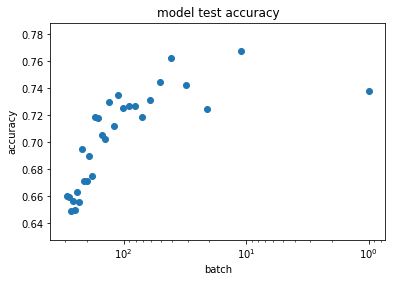

In [84]:
## First plot accuracy vs learning rate to decide on a good range 

def visualizeMetricAcc(dic): 
    plt.title('model test accuracy')
    plt.xscale('log')
    plt.ylabel('accuracy')
    plt.xlabel('batch')
    plt.scatter(list(dic.keys()),list(dic.values()))
    plt.gca().invert_xaxis()
#     plt.axvspan(2.8e-04, 2e-05, color='yellow', alpha=0.5)
#     plt.savefig("accuracy_learningrate_range.pdf")
    plt.show()

visualizeMetricAcc(batch_acc)


In [86]:
## Look at rates and decide lower/upper bound 
max_acc = max(batch_acc.values())  # maximum value
max_lr = [k for k, v in batch_acc.items() if v == max_acc] # getting all keys containing the `maximum`
print("Max test accuracy: ")
print(max_acc, max_lr)


Max test accuracy: 
(0.7672558922558923, [11])


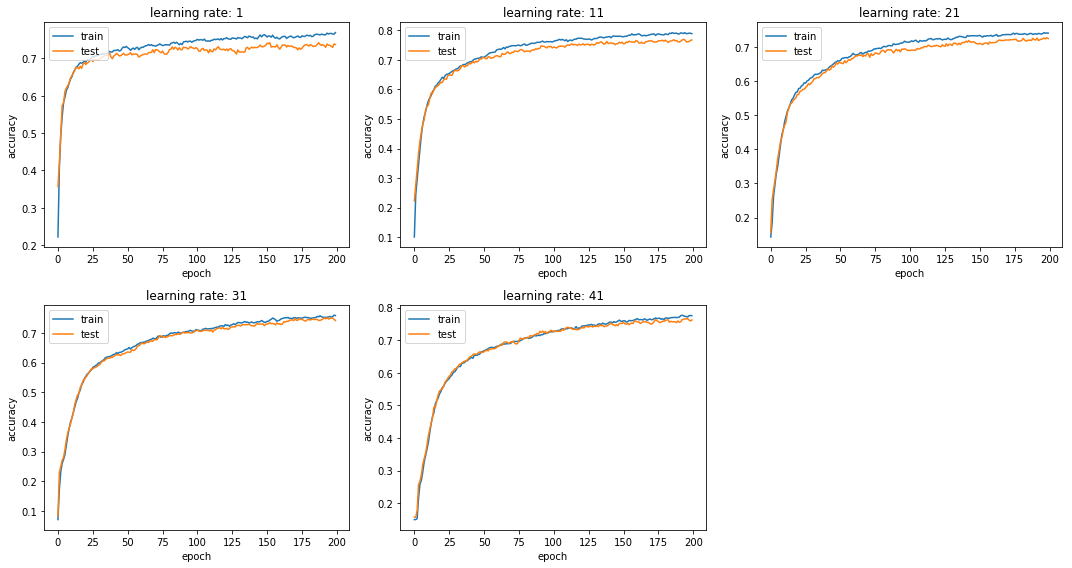

In [104]:
def visualizeEpochsGeneral(learnloss, histories):
    fig = plt.figure(figsize=(10,3))
    counter = 0
    nrRows = 2
    nrCols = 3
    for lr in learnloss: 
        if lr < 100 and lr < 50:
            ax = fig.add_subplot(nrRows, nrCols, counter+1)
            ax.plot(histories[lr]['acc'])
            ax.plot(histories[lr]['val_acc'])
            plt.title('learning rate: ' + '{:.3g}'.format(lr))
            ax.set_ylabel('accuracy')
            ax.set_xlabel('epoch')
            ax.legend(['train', 'test'], loc='upper left')
            counter +=1
    fig.set_figheight(8)
    fig.set_figwidth(15)
    plt.tight_layout()
    #plt.savefig("accuracy_epochs.pdf")
    plt.show()
            

visualizeEpochsGeneral(batch_acc, batch_hist)

In [11]:
model = tf.keras.Sequential()
model.add(layers.Dense(128, activation='sigmoid'))
model.add(layers.Dense(128, activation='sigmoid'))
model.add(layers.Dense(17, activation='softmax'))
model.compile(optimizer=tf.train.RMSPropOptimizer(5.1794746792312125e-05),
          loss='categorical_crossentropy',
          metrics=['accuracy'])

In [48]:
model.fit(train, encoded_train, validation_data=(test, encoded_test), epochs=200, batch_size=32)

Train on 5574 samples, validate on 2376 samples
Epoch 1/200
5574/5574 [==============================] - 1s 256us/step - loss: 0.8388 - acc: 0.7384 - val_loss: 0.8616 - val_acc: 0.7315
Epoch 2/200
5574/5574 [==============================] - 1s 169us/step - loss: 0.8350 - acc: 0.7363 - val_loss: 0.8543 - val_acc: 0.7319
Epoch 3/200
5574/5574 [==============================] - 1s 172us/step - loss: 0.8317 - acc: 0.7388 - val_loss: 0.8579 - val_acc: 0.7273
Epoch 4/200
5574/5574 [==============================] - 1s 170us/step - loss: 0.8313 - acc: 0.7393 - val_loss: 0.8530 - val_acc: 0.7315
Epoch 5/200
5574/5574 [==============================] - 1s 176us/step - loss: 0.8236 - acc: 0.7417 - val_loss: 0.8508 - val_acc: 0.7306
Epoch 6/200
5574/5574 [==============================] - 1s 173us/step - loss: 0.8281 - acc: 0.7404 - val_loss: 0.8445 - val_acc: 0.7344
Epoch 7/200
5574/5574 [==============================] - 1s 171us/step - loss: 0.8233 - acc: 0.7413 - val_loss: 0.8467 - val_acc: 

5574/5574 [==============================] - 1s 170us/step - loss: 0.7722 - acc: 0.7585 - val_loss: 0.8057 - val_acc: 0.7407
Epoch 61/200
5574/5574 [==============================] - 1s 168us/step - loss: 0.7736 - acc: 0.7530 - val_loss: 0.8013 - val_acc: 0.7428
Epoch 62/200
5574/5574 [==============================] - 1s 168us/step - loss: 0.7692 - acc: 0.7544 - val_loss: 0.7986 - val_acc: 0.7441
Epoch 63/200
5574/5574 [==============================] - 1s 167us/step - loss: 0.7744 - acc: 0.7537 - val_loss: 0.8065 - val_acc: 0.7445
Epoch 64/200
5574/5574 [==============================] - 1s 167us/step - loss: 0.7759 - acc: 0.7539 - val_loss: 0.8040 - val_acc: 0.7462
Epoch 65/200
5574/5574 [==============================] - 1s 170us/step - loss: 0.7732 - acc: 0.7524 - val_loss: 0.8011 - val_acc: 0.7424
Epoch 66/200
5574/5574 [==============================] - 1s 167us/step - loss: 0.7711 - acc: 0.7558 - val_loss: 0.7974 - val_acc: 0.7471
Epoch 67/200
5574/5574 [=======================

5574/5574 [==============================] - 1s 160us/step - loss: 0.6830 - acc: 0.7757 - val_loss: 0.7300 - val_acc: 0.7673
Epoch 179/200
5574/5574 [==============================] - 1s 175us/step - loss: 0.6857 - acc: 0.7781 - val_loss: 0.7277 - val_acc: 0.7681
Epoch 180/200
5574/5574 [==============================] - 1s 187us/step - loss: 0.6854 - acc: 0.7784 - val_loss: 0.7351 - val_acc: 0.7664
Epoch 181/200
5574/5574 [==============================] - 1s 187us/step - loss: 0.6842 - acc: 0.7783 - val_loss: 0.7317 - val_acc: 0.7652
Epoch 182/200
5574/5574 [==============================] - 1s 178us/step - loss: 0.6850 - acc: 0.7797 - val_loss: 0.7367 - val_acc: 0.7639
Epoch 183/200
5574/5574 [==============================] - 1s 176us/step - loss: 0.6889 - acc: 0.7783 - val_loss: 0.7395 - val_acc: 0.7605
Epoch 184/200
5574/5574 [==============================] - 1s 221us/step - loss: 0.6884 - acc: 0.7777 - val_loss: 0.7391 - val_acc: 0.7601
Epoch 185/200
5574/5574 [================

In [49]:
model.summary()

_________________________________________________________________
Layer (type)                 Output Shape              Param #   
dense_3 (Dense)              multiple                  307712    
_________________________________________________________________
dense_4 (Dense)              multiple                  16512     
_________________________________________________________________
dense_5 (Dense)              multiple                  2193      
Total params: 326,417
Trainable params: 326,417
Non-trainable params: 0
_________________________________________________________________


In [47]:
data

hsa_let_7a_2_3p  hsa_let_7a_3p  \
7bbdea1b.c0e1.4d89.a680.8308b91a71e2         0.000000     132.000000   
996880c0.7892.4765.8ed3.f42ef60d248e        10.297901      30.321598   
1d026d7a.c963.4c32.b821.b0d15fb2d2df         5.000000      55.000000   
a60fd4de.1ed4.475b.89a4.b9b54addf30c        63.000000      84.000000   
f282702a.0681.40e2.8bd3.c3c9aa5daecb         1.181770      14.772129   
387af269.0ac3.44b1.b7cf.67d19ca664e0         8.000000      77.000000   
71e9e746.b78f.4c07.8afb.acc3da378d88        41.000000     266.000000   
21847061.2f16.42b2.b636.0b7e4b6cbe2a         5.553707      32.784783   
450198c1.92fc.4460.9430.eb9ab8458b50        17.000000      69.000000   
3a52c147.c498.477f.8c2a.35b4240b3364       110.000000     181.000000   
d1d4a7a2.ae22.425a.9893.806dcd0afec9         0.000000      35.143815   
ad2ba637.bb29.4f9a.b391.327723defd73        12.000000      71.000000   
1bc1926c.1269.4189.8e3b.c371a7797911        32.000000      40.000000   
be18c3df.4d80.4e08.9243.39c455348b69       165.000000     242.000000   
fffa6e8d.615e.483c.99a0.4705ccde8dc6       325.000000     213.000000   
5cf0ff95.60be.4894.8eef.5f0ec17da1e8        12.000000      53.000000   
2d9e4aca.631e.4921.992b.039b902493eb        59.000000     213.000000   
062184e2.d589.42de.966b.d88ad1773828        12.000000       4.000000   
c5580440.b191.46c0.baae.cf00393ab3fa        31.000000      16.000000   
336b6bb7.5830.4950.8e7c.4472741dd05a        10.000000     118.000000   
1acf70a4.e2da.4daf.9c50.80c96deca6dc         1.000000      58.000000   
e79c63db.7a28.4079.b4c3.c3b511c92934        72.000000      14.000000   
95ea1f66.3ab0.4565.ac6f.23fbc1033486        34.000000     242.000000   
3ec71687.7091.4bc3.9d68.eb400ee34eb8         2.000000      43.000000   
b95ce818.de70.49d2.98bb.a11c0cc20ddc        29.000000      76.000000   
c38cbfca.3243.4092.9c4d.91dca8053247        29.000000      47.000000   
75ca17e3.40bc.447a.9739.9fe8b3434e83        18.000000      56.000000   
60f64a46.4fa7.46cd.ae0f.020b31af2720         0.952708      39.378608   
3f9ef3f0.5fb9.4b0c.be7d.7334bfb82ea8         9.479728      36.733946   
5226ccc5.b13c.43a3.938b.e70467f2d333        29.000000     232.000000   
...                                               ...            ...   
afee3573.36b2.4f48.9945.e8521d184b15        20.000000      72.000000   
addc4f43.0b30.4d13.b14f.4bc94451a7d2        17.000000     119.000000   
ba61393c.391e.408d.aaee.6c7c293a2cf2         8.000000      45.000000   
aaeda6de.d341.4527.9e4b.1b5824fccb93        11.000000     121.000000   
290a01d5.0516.4430.97e3.7f347e414664        17.000000      62.000000   
95e36a21.aee9.4fd8.a2dc.cde44e2adaf7         0.000000     130.000000   
576935e7.9c4c.4e30.912b.27e4429ffeae        11.000000      85.000000   
f398cdd2.ccce.4818.a5ea.9048f22a6163        13.000000      97.000000   
d91f1bf0.3d7b.418e.88fa.821cbd6cea79         0.000000      85.000000   
e24ea871.eff4.4243.82d3.86cc50269182        57.000000     682.000000   
171c50b8.571a.47cf.8022.0d2c25583fe6         2.351060      15.904231   
4a6caafc.4cc1.4388.a3ff.eaa3b2d221c0         1.000000      65.000000   
faa20bec.80db.4b29.b9da.4c519c53f85e         3.000000      10.000000   
545ca23f.a226.4ee8.a5c9.d008968bbbc1         3.000000      82.000000   
be6acff6.951b.47b2.bbbc.9e267b000014         6.000000      30.000000   
b040c5ae.c2bd.42cc.b94f.784d57ecbfaf        71.000000     225.000000   
9947016f.4c83.4820.bb60.b476ebc3fd77       189.000000     661.000000   
f1ecf7a0.e863.48e5.a7e0.d7c966736be8        12.000000      71.000000   
36c345c7.afc3.4d61.8703.1cc20d3d8951        24.000000      77.000000   
90410533.bd13.4014.a9cb.dc276b254067        39.000000     136.000000   
53712dd3.e7f5.4888.be75.911d5b9dcd3b         3.000000     110.000000   
28aeff63.ff53.417c.868c.156b9ee973c9         8.000000     105.000000   
4d9c0eed.fd43.4616.bc15.a48aced87762        29.000000      64.000000   
b2a0a10e.1506.427a.ba3d.bdc640f136d4         3.000000     185.000000   
b0a89d

In [59]:
## Try cross validation 

# Load libraries
import numpy as np
from tensorflow.keras import models
from tensorflow.keras import layers
from tensorflow.keras.wrappers.scikit_learn import KerasClassifier
from sklearn.model_selection import cross_val_score
from sklearn.datasets import make_classification

In [63]:
# Create function returning a compiled network
def create_network():
#     # Start neural network
#     network = models.Sequential()

#     # Add fully connected layer with a ReLU activation function
#     network.add(layers.Dense(units=16, activation='relu', input_shape=(number_of_features,)))

#     # Add fully connected layer with a ReLU activation function
#     network.add(layers.Dense(units=16, activation='relu'))

#     # Add fully connected layer with a sigmoid activation function
#     network.add(layers.Dense(units=1, activation='sigmoid'))

#     # Compile neural network
#     network.compile(loss='binary_crossentropy', # Cross-entropy
#                     optimizer='rmsprop', # Root Mean Square Propagation
#                     metrics=['accuracy']) # Accuracy performance metric
    model = tf.keras.Sequential()
    model.add(layers.Dense(128, activation='sigmoid'))
    model.add(layers.Dense(128, activation='sigmoid'))
    model.add(layers.Dense(17, activation='softmax'))
    model.compile(optimizer=tf.train.RMSPropOptimizer(5.1794746792312125e-05),
              loss='categorical_crossentropy',
              metrics=['accuracy'])
    # Return compiled network
    return model

In [67]:
# Wrap Keras model so it can be used by scikit-learn
neural_network = KerasClassifier(build_fn=create_network, 
                                 epochs=100, 
                                 batch_size=32, 
                                 verbose=0)

In [68]:
# Evaluate neural network using three-fold cross-validation
cross_val_score(neural_network, train, encoded_train, cv=3)

array([0.65285253, 0.66469322, 0.66953714])